#House Price Estimation from Visual and Textual Features

**Author**: Tyler Burguillos, Austin Nolte, Alan Lei, Nishan Majarjan  
**Course**: CSC 180 - Intelligent Systems (Fall 2024)  
**Assignment**: Project 3 - House Price Prediction  
**Due Date**: October 23, 2024  

Problem Statement

In this project, the goal is to predict house prices using a combination of visual and textual features. The dataset includes images of houses (bedroom, bathroom, kitchen, and frontal views) along with numerical data such as the number of bedrooms, bathrooms, area, and zip code. We will build models that integrate both Convolutional Neural Networks (CNN) for image data and Fully-Connected Neural Networks (FNN) for numerical data to estimate house prices. Hyperparameter tuning and evaluation will be conducted to optimize the models, using metrics such as Root Mean Square Error (RMSE). Optionally, we may explore categorizing house prices into ranges to add a classification component to the project.


## Loading Data for House Price Prediction

Set up the notebook for house price prediction by loading both textual and image data, using techniques from Dr. Haiquan Chen's cheatsheet. OpenCV is used for image processing to prepare the data for training.

*CSC 180 - Intelligent Systems, California State University, Sacramento*

In [ ]:
import seaborn as sns
import os
import pandas as pd
import matplotlib.pyplot as plt

import csv
import numpy as np
%matplotlib inline

import cv2
import glob
from IPython.display import Image

In [ ]:
from google.colab import drive

# Force Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set up file paths
# filename_read = ("/content/drive/My Drive/Project3/HousesInfo.txt")
# cols=["Bedrooms", "Bathrooms", "area", "zipcode", "price"]
# df = pd.read_csv(filename_read , sep=" ", header=None , names=cols)
# df.head()

In [ ]:
# df.shape

###Handling Images dataset

In [ ]:
## Bathroom.jpg
# new_images=[]
# for number in range(1, 536):
#   for path in glob.glob("/content/drive/My Drive/Project3/" + str(number) + "_bathroom.jpg"):
#     if os.path.isfile(path):
#       new_images.append(path)

In [ ]:
# new_images

In [ ]:
# img= pd.DataFrame(new_images,columns = ['bathroom_img'])

In [ ]:
## bedroom images
# bedroom_images = []
# for number in range(1, 536):
#     for path in glob.glob("/content/drive/My Drive/Project3/" + str(number) + "_bedroom.jpg"):
#         if os.path.isfile(path):
#             bedroom_images.append(path)

In [ ]:
# img['bedroom_img']=bedroom_images

In [ ]:
# frontal_images = []
# for number in range(1, 536):
#     for path in glob.glob("/content/drive/My Drive/Project3/" + str(number) + "_frontal.jpg"):
#         if os.path.isfile(path):
#             frontal_images.append(path)

In [ ]:
# img['frontal_img']=frontal_images

In [ ]:
# kitchen_images = []
# for number in range(1, 536):
#     for path in glob.glob("/content/drive/My Drive/Project3/" + str(number) + "_kitchen.jpg"):
#         if os.path.isfile(path):
#             kitchen_images.append(path)

In [ ]:
# img['kitchen_img']=kitchen_images

In [ ]:
# img.head()

In [ ]:
# img.shape

### Concatenate houses images into one image for each house

In [ ]:
# images_output=[]
# for row_index,row in img.iterrows():
#             inputImages=[]
#             outputImage = np.zeros((128, 128, 3), dtype="uint8")
#             image_temp1 = cv2.imread(row.bathroom_img)
#             image1 = cv2.resize(image_temp1, (64 , 64))

#             image_temp2 = cv2.imread(row.bedroom_img)
#             image2 = cv2.resize(image_temp2, (64 , 64))

#             image_temp3 = cv2.imread(row.frontal_img)
#             image3 = cv2.resize(image_temp3, (64 , 64))

#             image_temp4 = cv2.imread(row.kitchen_img)
#             image4 = cv2.resize(image_temp4, (64 , 64))

#             inputImages.append(image1)
#             inputImages.append(image2)
#             inputImages.append(image3)
#             inputImages.append(image4)

#             outputImage[0:64, 0:64] = inputImages[0]
#             outputImage[0:64, 64:128] = inputImages[1]
#             outputImage[64:128, 64:128] = inputImages[2]
#             outputImage[64:128, 0:64] = inputImages[3]

#             images_output.append(outputImage)

### Create numpy arrays of images

In [ ]:
# from matplotlib import pyplot as plt

# for i in images_output:
#      plt.figure(figsize=(8,8))
#      plt.imshow(i, interpolation='nearest')
#      plt.show()

In [ ]:
# img_arr=np.asarray(images_output)

In [ ]:
# img_arr.shape

## Data Preprocessing: Normalization, Encoding, and Splitting

Basic steps to prepare the data, including normalizing features, one-hot encoding zip codes, saving/loading processed data, and splitting into training/testing sets.


### Checking Original Numerical Feature Ranges

Print the minimum and maximum values for each numerical feature before normalization.


In [ ]:
# Filter the dataset to keep only houses with prices between 100K and 900K

# Define the price filter condition
# price_filter = (df['price'] >= 100000) & (df['price'] <= 900000)

# Apply the filter to the textual data (df)
# df = df[price_filter]

# Apply the same filter to the image data (img_arr)
# img_arr = img_arr[price_filter.values]  # Filter image data based on the same condition

# Display the new shapes to confirm the alignment
# print(f"Textual data shape after filtering: {df.shape}")
# print(f"Image data shape after filtering: {img_arr.shape}")

# Tyler Burguillos 10/11/24

In [ ]:
# Verify the range of prices after filtering
# print(f"Minimum house price: {df['price'].min()}")
# print(f"Maximum house price: {df['price'].max()}")

# Tyler Burguillos 10/11/24

In [ ]:
# print("Before Normalization: ")
# for col in ["Bedrooms", "Bathrooms", "area"]:
#   print(f"{col} - min: {df[col].min()}, max: {df[col].max()}")

# Tyler Burguillos 10/11/24

### Normalizing Numerical Features to [0, 1]

Here’s how we normalize the numerical features (`Bedrooms`, `Bathrooms`, `area`) to the range [0, 1] and check the new min and max values afterward.

In [ ]:
# from sklearn import preprocessing

# Encode a column to a range between normalized_low and normalized_high.
# def encode_numeric_range(df, name, normalized_low=-1, normalized_high=1,
#                          data_low=None, data_high=None):
#     if data_low is None:
#         data_low = min(df[name])
#         data_high = max(df[name])

#     df[name] = ((df[name] - data_low) / (data_high - data_low)) \
#               * (normalized_high - normalized_low) + normalized_low

# for col in ["Bedrooms", "Bathrooms", "area"]:
#   encode_numeric_range(df, col, normalized_low=0, normalized_high=1)

# Checking normalized numerical feature ranges
# print("\nAfter Normalization:")
# for col in ["Bedrooms", "Bathrooms", "area"]:
#     print(f"{col} - min: {df[col].min()}, max: {df[col].max()}")

# Tyler Burguillos 10/11/24

### Checking Original Zip Code Column

Display the distribution of zip codes before applying one-hot encoding.

In [ ]:
# print("\nBefore One-Hot Encoding:")
# print(df["zipcode"].value_counts())

# Tyler Burguillos 10/11/24

### One-Hot Encoding the Zip Code

Convert the `zipcode` column into dummy variables, and then check the distribution of the newly created one-hot encoded columns.

In [ ]:
# import pandas as pd

# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
# def encode_text_dummy(df, name):
#     dummies = pd.get_dummies(df[name])
#     for x in dummies.columns:
#         dummy_name = "{}-{}".format(name, x)
#         df[dummy_name] = dummies[x]
#     df.drop(name, axis=1, inplace=True)

# encode_text_dummy(df, "zipcode")

# Checking one-hot encoded columns
# print("\nAfter One-Hot Encoding:")
# zip_columns = [col for col in df.columns if col.startswith("zipcode-")]
# print(df[zip_columns].value_counts())

# Tyler Burguillos 10/11/24

### Saving Processed Data for Faster Experimentation

Save the processed image and textual data to files to avoid reprocessing and speed up experimentation.

In [ ]:
# np.save('/content/drive/My Drive/Project3/processed_images.npy', img_arr)
# df.to_csv('/content/drive/My Drive/Project3/processed_text.csv', index=False)

# Tyler Burguillos 10/11/24

### Loading Preprocessed Data (ReLu & Sigmoid  Normalized to [0,1])

The preprocessing steps are commented out because the data has already been processed and saved. Uncomment and run these steps only if you need to preprocess the raw data again. Here, we load the preprocessed data to save time.

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive

# Force Mount Google Drive
drive.mount('/content/drive')

# Load the preprocessed data
img_arr = np.load('/content/drive/My Drive/Project3/processed_images.npy')
df = pd.read_csv('/content/drive/My Drive/Project3/processed_text.csv')

# Tyler Burguillos 10/11/24

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Checking the Spread of House Prices

We print out the summary stats for house prices and plot a histogram to visualize the distribution.


count       406.000000
mean     484984.995074
std      216654.567426
min      100000.000000
25%      310000.000000
50%      519550.000000
75%      629000.000000
max      899900.000000
Name: price, dtype: float64


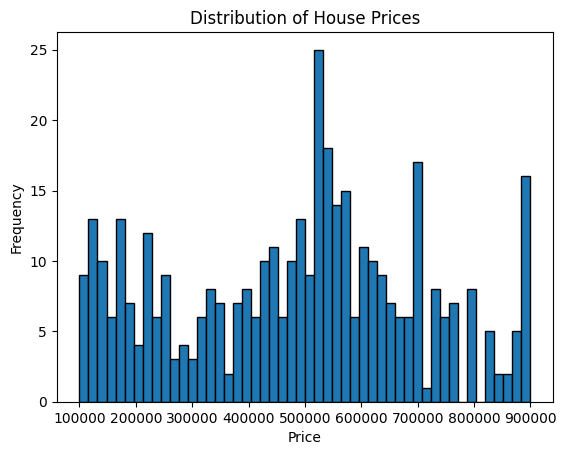

In [ ]:
import matplotlib.pyplot as plt

# Display summary statistics for the 'price' column
print(df['price'].describe())

# Plot a histogram of house prices
plt.hist(df['price'], bins=50, edgecolor='black')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Tyler Burguillos 10/11/24

#### **Estimating a Good RMSE for House Price Prediction**

Based on the data, with a mean house price around \$485K and a standard deviation of \$216K, a good RMSE should be somewhere between **\$70,000 and \$100,000**. If we can get the RMSE closer to **\$50,000**, that would be excellent. Since the house prices range from \$100K to \$900K, keeping the RMSE significantly lower than the standard deviation means the model is performing well.

#### Target Normalization and Reversion Functions

In this section, we define two functions that will help normalize the target variable (`price`) before model training and then revert it to its original scale after predictions.

- **`encode_numeric_range`**: This function normalizes the target variable (`price`) to a [0, 1] range using Min-Max normalization. This ensures that our target is on a similar scale as our input features, which can improve model convergence and performance during training.

- **`decode_numeric_range`**: After training, we'll use this function to revert the model's predictions back to the original `price` range. This allows us to accurately calculate the RMSE (Root Mean Square Error) and evaluate model performance.


In [ ]:
# Function to encode a numeric column to a range between normalized_low and normalized_high
def encode_numeric_range(df, name, normalized_low=0, normalized_high=1, data_low=None, data_high=None):
    if data_low is None:
        data_low = min(df[name])
        data_high = max(df[name])

    # Normalize the column using Min-Max normalization
    df[name] = ((df[name] - data_low) / (data_high - data_low)) \
               * (normalized_high - normalized_low) + normalized_low

    return data_low, data_high  # Return original min and max for decoding later

# Function to decode a numeric column back to its original range
def decode_numeric_range(preds, original_low, original_high, normalized_low=0, normalized_high=1):
    # Inverse transform using the original min and max
    return ((preds - normalized_low) / (normalized_high - normalized_low)) \
           * (original_high - original_low) + original_low


#### Splitting the Data into Training and Testing Sets

Split the processed data (textual and image) into an 80-20 training and testing split to prepare for model training. The target variable (`price`) is separated as well.

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from collections.abc import Sequence  # This is used in the professor's code

# Convert the entire dataframe (except non-numeric columns) to float32
df = df.astype({col: np.float32 for col in df.select_dtypes(include=[np.number]).columns})

# Convert a Pandas dataframe to the x, y inputs that TensorFlow needs
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column.
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

# Define the features (textual data) and target (price)
X_text = df.drop(columns=['price'])  # Drop the target column from the features
y = df['price']  # Target variable

# Split the textual data and image data
X_text_train, X_text_test, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42)
img_arr_train, img_arr_test = train_test_split(img_arr, test_size=0.2, random_state=42)

# Encode target variable (price) to [0, 1] range
price_low, price_high = encode_numeric_range(df, 'price', normalized_low=0, normalized_high=1)

# Convert Pandas dataframe to X, y for TensorFlow (for textual data)
X_text_train, y_train = to_xy(df[df.index.isin(X_text_train.index)], 'price')
X_text_test, y_test = to_xy(df[df.index.isin(X_text_test.index)], 'price')

print("Textual data training set shape:", X_text_train.shape)
print("Textual data testing set shape:", X_text_test.shape)
print("Image data training set shape:", img_arr_train.shape)
print("Image data testing set shape:", img_arr_test.shape)
print("Target training set shape:", y_train.shape)
print("Target testing set shape:", y_test.shape)


Textual data training set shape: (324, 43)
Textual data testing set shape: (82, 43)
Image data training set shape: (324, 128, 128, 3)
Image data testing set shape: (82, 128, 128, 3)
Target training set shape: (324,)
Target testing set shape: (82,)


### Loading Preprocessed Data (Tanh  Normalized to [-1,1])

The preprocessing steps are commented out because the data has already been processed and saved. Uncomment and run these steps only if you need to preprocess the raw data again. Here, we load the preprocessed data to save time.

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive

# Force Mount Google Drive
drive.mount('/content/drive')

# Load the preprocessed data
img_arr = np.load('/content/drive/My Drive/Project3/processed_images_tanh.npy')
df = pd.read_csv('/content/drive/My Drive/Project3/processed_text_tanh.csv')

# Tyler Burguillos 10/11/24

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Checking the Spread of House Prices

We print out the summary stats for house prices and plot a histogram to visualize the distribution.


count       406.000000
mean     484984.995074
std      216654.567426
min      100000.000000
25%      310000.000000
50%      519550.000000
75%      629000.000000
max      899900.000000
Name: price, dtype: float64


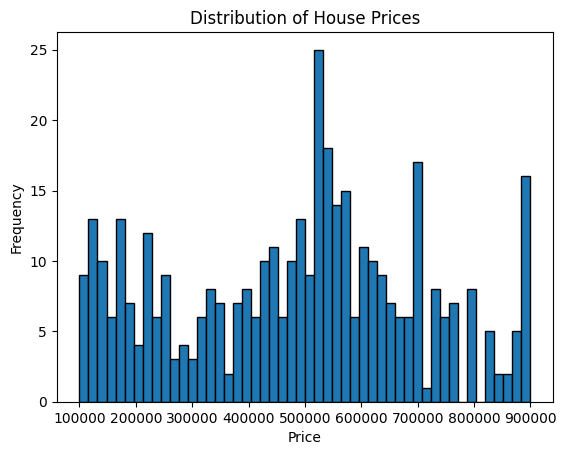

In [ ]:
import matplotlib.pyplot as plt

# Display summary statistics for the 'price' column
print(df['price'].describe())

# Plot a histogram of house prices
plt.hist(df['price'], bins=50, edgecolor='black')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Tyler Burguillos 10/11/24

#### **Estimating a Good RMSE for House Price Prediction**

Based on the data, with a mean house price around \$485K and a standard deviation of \$216K, a good RMSE should be somewhere between **\$70,000 and \$100,000**. If we can get the RMSE closer to **\$50,000**, that would be excellent. Since the house prices range from \$100K to \$900K, keeping the RMSE significantly lower than the standard deviation means the model is performing well.

#### Target Normalization and Reversion Functions

In this section, we define two functions that will help normalize the target variable (`price`) before model training and then revert it to its original scale after predictions.

- **`encode_numeric_range`**: This function normalizes the target variable (`price`) to a [0, 1] range using Min-Max normalization. This ensures that our target is on a similar scale as our input features, which can improve model convergence and performance during training.

- **`decode_numeric_range`**: After training, we'll use this function to revert the model's predictions back to the original `price` range. This allows us to accurately calculate the RMSE (Root Mean Square Error) and evaluate model performance.


In [ ]:
# Function to encode a numeric column to a range between normalized_low and normalized_high
def encode_numeric_range(df, name, normalized_low=-1, normalized_high=1, data_low=None, data_high=None):
    if data_low is None:
        data_low = min(df[name])
        data_high = max(df[name])

    # Normalize the column using Min-Max normalization
    df[name] = ((df[name] - data_low) / (data_high - data_low)) \
               * (normalized_high - normalized_low) + normalized_low

    return data_low, data_high  # Return original min and max for decoding later

# Function to decode a numeric column back to its original range
def decode_numeric_range(preds, original_low, original_high, normalized_low=-1, normalized_high=1):
    # Inverse transform using the original min and max
    return ((preds - normalized_low) / (normalized_high - normalized_low)) \
           * (original_high - original_low) + original_low


#### Splitting the Data into Training and Testing Sets

Split the processed data (textual and image) into an 80-20 training and testing split to prepare for model training. The target variable (`price`) is separated as well.

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from collections.abc import Sequence  # This is used in the professor's code

# Convert the entire dataframe (except non-numeric columns) to float32
df = df.astype({col: np.float32 for col in df.select_dtypes(include=[np.number]).columns})

# Convert a Pandas dataframe to the x, y inputs that TensorFlow needs
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column.
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

# Define the features (textual data) and target (price)
X_text = df.drop(columns=['price'])  # Drop the target column from the features
y = df['price']  # Target variable

# Split the textual data and image data
X_text_train, X_text_test, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42)
img_arr_train, img_arr_test = train_test_split(img_arr, test_size=0.2, random_state=42)

# Encode target variable (price) to [-1, 1] range
price_low, price_high = encode_numeric_range(df, 'price', normalized_low=-1, normalized_high=1)

# Convert Pandas dataframe to X, y for TensorFlow (for textual data)
X_text_train, y_train = to_xy(df[df.index.isin(X_text_train.index)], 'price')
X_text_test, y_test = to_xy(df[df.index.isin(X_text_test.index)], 'price')

print("Textual data training set shape:", X_text_train.shape)
print("Textual data testing set shape:", X_text_test.shape)
print("Image data training set shape:", img_arr_train.shape)
print("Image data testing set shape:", img_arr_test.shape)
print("Target training set shape:", y_train.shape)
print("Target testing set shape:", y_test.shape)


Textual data training set shape: (324, 43)
Textual data testing set shape: (82, 43)
Image data training set shape: (324, 128, 128, 3)
Image data testing set shape: (82, 128, 128, 3)
Target training set shape: (324,)
Target testing set shape: (82,)


## Building and Training the FNN Models

Each teammate will create and train their own version of a Fully-Connected Neural Network (FNN) for predicting house prices. We'll experiment with different configurations by varying the number of layers, activation functions, optimizers, and other hyperparameters. The results from each model will be tabulated and compared to identify the best-performing setup.

### Steps:

1. **Design FNN Architectures**:
   - Vary the number of layers (e.g., 2, 3, 4 layers) and neurons per layer.
   - Experiment with different activation functions (e.g., ReLU, tanh, sigmoid).

2. **Train Each Model**:
   - Use different optimizers like Adam or SGD.
   - Apply early stopping to prevent overfitting.
   - Implement model checkpointing to save the best-performing model during training.

3. **Evaluate the Models**:
   - Compare metrics like RMSE and Lift chart.
   - Tabulate results to analyze the impact of different configurations.
   - Use the saved model checkpoints to assess the best results for each configuration.


### FNN Model Design and Testing (Tyler Burguillos)



#### Model 1: Baseline Fully-Connected Neural Network (FNN)

This is our first model, a simple Fully-Connected Neural Network (FNN) with one hidden layer consisting of 25 neurons and a ReLU activation function. We also implement **early stopping** to prevent overfitting and **model checkpointing** to save the best-performing model during training.

##### Key Features:
- **Hidden Layer**: 25 neurons with ReLU activation.
- **Output Layer**: Single neuron for regression (predicting house prices).
- **Optimizer**: Adam optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
model.add(Input(shape=(X_text_train.shape[1],)))
model.add(Dense(25, activation='relu')) # Hidden layer
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Tyler Burguillos 10/11/24

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_tyler_1.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Tyler Burguillos 10/11/24

**Training the FNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    X_text_train, y_train,
    validation_data=(X_text_test, y_test), # Use validation data to monitor the training
    epochs=100,       # Maximum number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback] # Include both callbacks
)

# Tyler Burguillos 10/11/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.12261, saving model to fnn_model_tyler_1.keras
11/11 - 6s - 532ms/step - loss: 0.1659 - val_loss: 0.1226
Epoch 2/100

Epoch 2: val_loss improved from 0.12261 to 0.08204, saving model to fnn_model_tyler_1.keras
11/11 - 2s - 151ms/step - loss: 0.1060 - val_loss: 0.0820
Epoch 3/100

Epoch 3: val_loss improved from 0.08204 to 0.06559, saving model to fnn_model_tyler_1.keras
11/11 - 1s - 65ms/step - loss: 0.0777 - val_loss: 0.0656
Epoch 4/100

Epoch 4: val_loss improved from 0.06559 to 0.05636, saving model to fnn_model_tyler_1.keras
11/11 - 1s - 100ms/step - loss: 0.0636 - val_loss: 0.0564
Epoch 5/100

Epoch 5: val_loss improved from 0.05636 to 0.04918, saving model to fnn_model_tyler_1.keras
11/11 - 0s - 44ms/step - loss: 0.0535 - val_loss: 0.0492
Epoch 6/100

Epoch 6: val_loss improved from 0.04918 to 0.04375, saving model to fnn_model_tyler_1.keras
11/11 - 1s - 52ms/step - loss: 0.0465 - val_loss: 0.0437
Epoch 7/100

Epoch 7: val_los

**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

# Tyler Burguillos 10/11/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Test RMSE: 133908.75


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')

# Tyler Burguillos 10/11/24

R-squared Score: 0.58


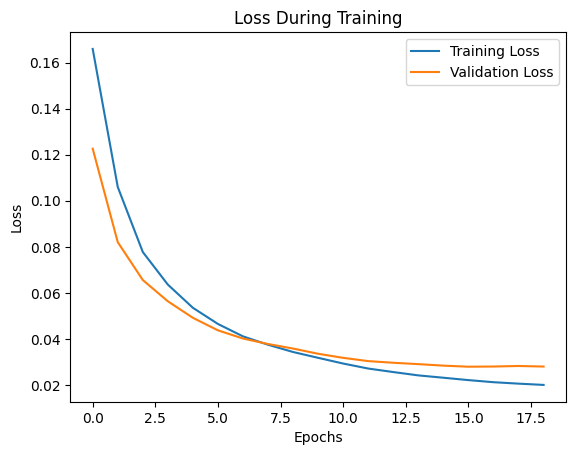

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tyler Burguillos 10/11/24

#### Model 2: Two Layer Fully-Connected Neural Network (FNN)

This is our second model, a simple Fully-Connected Neural Network (FNN) with two hidden layers consisting of 50 neruons, 25 neurons, and a ReLU activation function. We also implement **early stopping** to prevent overfitting and **model checkpointing** to save the best-performing model during training.

##### Key Features:
- **Hidden Layer 1**: 50 neurons with ReLU activation.
- **Hidden Layer 2**: 25 neurons with ReLU activation.
- **Output Layer**: Single neuron for regression (predicting house prices).
- **Optimizer**: Adam optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
model.add(Input(shape=(X_text_train.shape[1],)))
model.add(Dense(50, activation='relu')) # Hidden layer 1
model.add(Dense(25, activation='relu')) # Hidden Layer 2
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Tyler Burguillos 10/11/24

**Implementing Early Stopping and Model Checkpointing**

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_tyler_2.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Tyler Burguillos 10/11/24

**Training the FNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    X_text_train, y_train,
    validation_data=(X_text_test, y_test), # Use validation data to monitor the training
    epochs=100,       # Maximum number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback] # Include both callbacks
)

# Tyler Burguillos 10/11/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.19581, saving model to fnn_model_tyler_2.keras
11/11 - 2s - 151ms/step - loss: 0.2828 - val_loss: 0.1958
Epoch 2/100

Epoch 2: val_loss improved from 0.19581 to 0.09863, saving model to fnn_model_tyler_2.keras
11/11 - 0s - 12ms/step - loss: 0.1400 - val_loss: 0.0986
Epoch 3/100

Epoch 3: val_loss improved from 0.09863 to 0.06738, saving model to fnn_model_tyler_2.keras
11/11 - 0s - 27ms/step - loss: 0.0755 - val_loss: 0.0674
Epoch 4/100

Epoch 4: val_loss improved from 0.06738 to 0.05526, saving model to fnn_model_tyler_2.keras
11/11 - 0s - 12ms/step - loss: 0.0592 - val_loss: 0.0553
Epoch 5/100

Epoch 5: val_loss improved from 0.05526 to 0.04639, saving model to fnn_model_tyler_2.keras
11/11 - 0s - 8ms/step - loss: 0.0476 - val_loss: 0.0464
Epoch 6/100

Epoch 6: val_loss improved from 0.04639 to 0.04034, saving model to fnn_model_tyler_2.keras
11/11 - 0s - 9ms/step - loss: 0.0393 - val_loss: 0.0403
Epoch 7/100

Epoch 7: val_loss im

**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

# Tyler Burguillos 10/11/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Test RMSE: 130523.046875


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')

# Tyler Burguillos 10/11/24

R-squared Score: 0.60


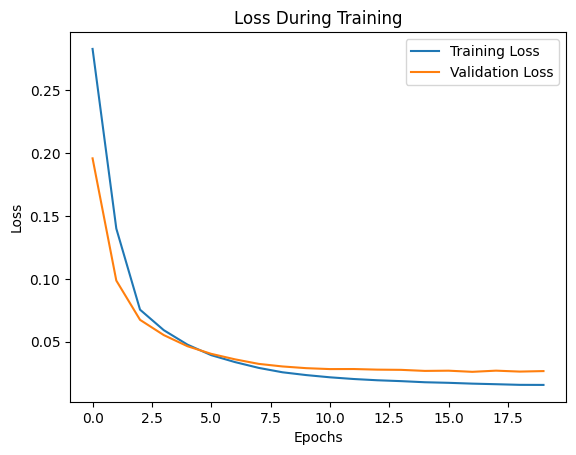

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tyler Burguillos 10/11/24

#### Model 3: Three Layer Fully-Connected Neural Network (FNN)

This is our third model, a simple Fully-Connected Neural Network (FNN) with three hidden layers consisting of 50 neurons, 25 neurons, 15 neurons, and a ReLU activation function. We also implement **early stopping** to prevent overfitting and **model checkpointing** to save the best-performing model during training.

##### Key Features:
- **Hidden Layer 1**: 50 neurons with ReLU activation.
- **Hidden Layer 2**: 25 neurons with ReLU activation.
- **Hidden Layer 3**: 15 neurons with ReLU activation.
- **Output Layer**: Single neuron for regression (predicting house prices).
- **Optimizer**: Adam optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
model.add(Input(shape=(X_text_train.shape[1],)))
model.add(Dense(50, activation='relu')) # Hidden layer 1
model.add(Dense(25, activation='relu')) # Hidden Layer 2
model.add(Dense(15, activation='relu')) # Hidden Layer 3
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Tyler Burguillos 10/11/24

**Implementing Early Stopping and Model Checkpointing**

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_tyler_3.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Tyler Burguillos 10/11/24

**Training the FNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    X_text_train, y_train,
    validation_data=(X_text_test, y_test), # Use validation data to monitor the training
    epochs=100,       # Maximum number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback] # Include both callbacks
)

# Tyler Burguillos 10/11/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.15287, saving model to fnn_model_tyler_3.keras
11/11 - 1s - 129ms/step - loss: 0.2292 - val_loss: 0.1529
Epoch 2/100

Epoch 2: val_loss improved from 0.15287 to 0.07983, saving model to fnn_model_tyler_3.keras
11/11 - 0s - 13ms/step - loss: 0.1119 - val_loss: 0.0798
Epoch 3/100

Epoch 3: val_loss improved from 0.07983 to 0.06479, saving model to fnn_model_tyler_3.keras
11/11 - 0s - 14ms/step - loss: 0.0698 - val_loss: 0.0648
Epoch 4/100

Epoch 4: val_loss improved from 0.06479 to 0.05213, saving model to fnn_model_tyler_3.keras
11/11 - 0s - 13ms/step - loss: 0.0580 - val_loss: 0.0521
Epoch 5/100

Epoch 5: val_loss improved from 0.05213 to 0.04266, saving model to fnn_model_tyler_3.keras
11/11 - 0s - 10ms/step - loss: 0.0443 - val_loss: 0.0427
Epoch 6/100

Epoch 6: val_loss improved from 0.04266 to 0.03749, saving model to fnn_model_tyler_3.keras
11/11 - 0s - 10ms/step - loss: 0.0377 - val_loss: 0.0375
Epoch 7/100

Epoch 7: val_loss 

**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

# Tyler Burguillos 10/11/24

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Test RMSE: 125753.4765625


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')

# Tyler Burguillos 10/11/24

R-squared Score: 0.63


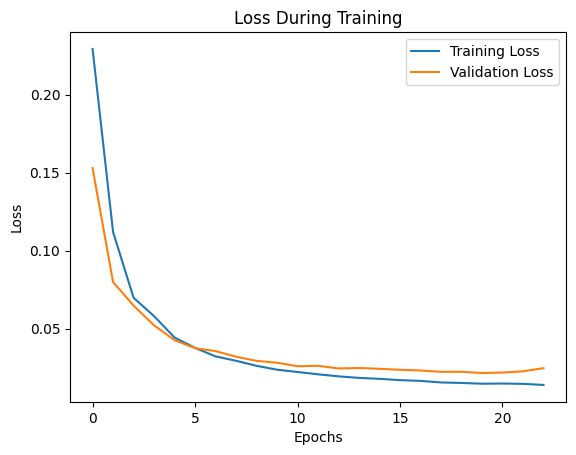

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tyler Burguillos 10/11/24

#### Model 4: Four Layer Fully-Connected Neural Network (FNN)

This is our fourth model, a simple Fully-Connected Neural Network (FNN) with one hidden layer consisting of 50 neurons, 25 neurons, 15 neurons, 5 neurons, and a ReLU activation function. We also implement **early stopping** to prevent overfitting and **model checkpointing** to save the best-performing model during training.

##### Key Features:
- **Hidden Layer 1**: 50 neurons with ReLU activation.
- **Hidden Layer 2**: 25 neurons with ReLU activation.
- **Hidden Layer 3**: 15 neurons with ReLU activation.
- **Hidden Layer 4**: 5 neurons with ReLU activation.
- **Output Layer**: Single neuron for regression (predicting house prices).
- **Optimizer**: Adam optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
model.add(Input(shape=(X_text_train.shape[1],)))
model.add(Dense(50, activation='relu')) # Hidden layer 1
model.add(Dense(25, activation='relu')) # Hidden Layer 2
model.add(Dense(15, activation='relu')) # Hidden Layer 3
model.add(Dense(5, activation='relu')) # Hidden Layer 4
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Tyler Burguillos 10/11/24

**Implementing Early Stopping and Model Checkpointing**

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_tyler_4.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Tyler Burguillos 10/11/24

**Training the FNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    X_text_train, y_train,
    validation_data=(X_text_test, y_test), # Use validation data to monitor the training
    epochs=100,       # Maximum number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback] # Include both callbacks
)

# Tyler Burguillos 10/11/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.06627, saving model to fnn_model_tyler_4.keras
11/11 - 2s - 152ms/step - loss: 0.1510 - val_loss: 0.0663
Epoch 2/100

Epoch 2: val_loss improved from 0.06627 to 0.04555, saving model to fnn_model_tyler_4.keras
11/11 - 0s - 13ms/step - loss: 0.0540 - val_loss: 0.0455
Epoch 3/100

Epoch 3: val_loss improved from 0.04555 to 0.03493, saving model to fnn_model_tyler_4.keras
11/11 - 0s - 13ms/step - loss: 0.0445 - val_loss: 0.0349
Epoch 4/100

Epoch 4: val_loss improved from 0.03493 to 0.03041, saving model to fnn_model_tyler_4.keras
11/11 - 0s - 14ms/step - loss: 0.0341 - val_loss: 0.0304
Epoch 5/100

Epoch 5: val_loss improved from 0.03041 to 0.02837, saving model to fnn_model_tyler_4.keras
11/11 - 0s - 11ms/step - loss: 0.0299 - val_loss: 0.0284
Epoch 6/100

Epoch 6: val_loss did not improve from 0.02837
11/11 - 0s - 10ms/step - loss: 0.0262 - val_loss: 0.0285
Epoch 7/100

Epoch 7: val_loss improved from 0.02837 to 0.02666, saving mode

**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

# Tyler Burguillos 10/11/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Test RMSE: 122318.8125


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')

# Tyler Burguillos 10/11/24

R-squared Score: 0.65


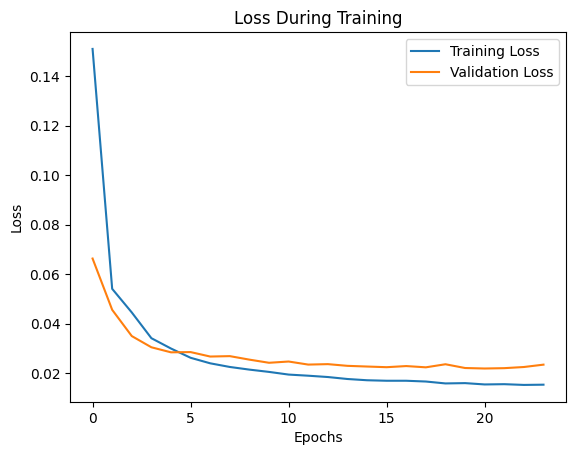

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tyler Burguillos 10/11/24

#### Model 5: Four Layer Fully-Connected Neural Network (FNN) with Dropout Layers

This is our fifth model, a simple Fully-Connected Neural Network (FNN) with four hidden layers consisting of 50 neurons, 25 neurons, 15 neurons, 5 neurons, and a ReLU activation function. In between the first - third dense layers we added 20% dropout layers.  We also implement **early stopping** to prevent overfitting and **model checkpointing** to save the best-performing model during training.

##### Key Features:
- **Hidden Layer 1**: 50 neurons with ReLU activation.
- **Dropout Layer 1** 20% dropout rate for regularization.
- **Hidden Layer 2**: 25 neurons with ReLU activation.
- **Dropout Layer 2** 20% dropout rate for regularization.
- **Hidden Layer 3**: 15 neurons with ReLU activation.
- **Hidden Layer 4**: 5 neurons with ReLU activation.
- **Output Layer**: Single neuron for regression (predicting house prices).
- **Optimizer**: Adam optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
model.add(Input(shape=(X_text_train.shape[1],)))
model.add(Dense(50, activation='relu')) # Hidden layer 1
model.add(Dropout(0.2)) # Dropout Layer 1
model.add(Dense(25, activation='relu')) # Hidden Layer 2
model.add(Dropout(0.2)) # Dropout Layer 2
model.add(Dense(15, activation='relu')) # Hidden Layer 3
model.add(Dense(5, activation='relu')) # Hidden Layer 4
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Tyler Burguillos 10/11/24

**Implementing Early Stopping and Model Checkpointing**

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_tyler_5.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Tyler Burguillos 10/11/24

**Training the FNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    X_text_train, y_train,
    validation_data=(X_text_test, y_test), # Use validation data to monitor the training
    epochs=100,       # Maximum number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback] # Include both callbacks
)

# Tyler Burguillos 10/11/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.08100, saving model to fnn_model_tyler_5.keras
11/11 - 2s - 167ms/step - loss: 0.1547 - val_loss: 0.0810
Epoch 2/100

Epoch 2: val_loss improved from 0.08100 to 0.05650, saving model to fnn_model_tyler_5.keras
11/11 - 0s - 8ms/step - loss: 0.0905 - val_loss: 0.0565
Epoch 3/100

Epoch 3: val_loss improved from 0.05650 to 0.04699, saving model to fnn_model_tyler_5.keras
11/11 - 0s - 13ms/step - loss: 0.0738 - val_loss: 0.0470
Epoch 4/100

Epoch 4: val_loss improved from 0.04699 to 0.04346, saving model to fnn_model_tyler_5.keras
11/11 - 0s - 10ms/step - loss: 0.0556 - val_loss: 0.0435
Epoch 5/100

Epoch 5: val_loss improved from 0.04346 to 0.03982, saving model to fnn_model_tyler_5.keras
11/11 - 0s - 9ms/step - loss: 0.0546 - val_loss: 0.0398
Epoch 6/100

Epoch 6: val_loss improved from 0.03982 to 0.03683, saving model to fnn_model_tyler_5.keras
11/11 - 0s - 14ms/step - loss: 0.0474 - val_loss: 0.0368
Epoch 7/100

Epoch 7: val_loss im

**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

# Tyler Burguillos 10/11/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Test RMSE: 124156.6796875


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')

# Tyler Burguillos 10/11/24

R-squared Score: 0.64


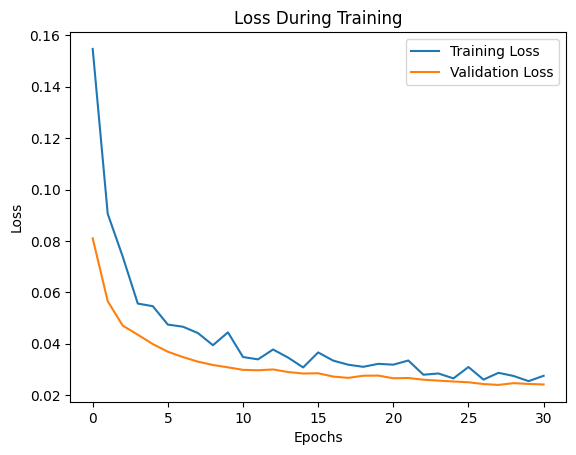

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tyler Burguillos 10/11/24

#### Model 6: Four Layer Fully-Connected Neural Network (FNN) with Dropout Layers

This is our sixth model, a simple Fully-Connected Neural Network (FNN) with four hidden layers consisting of 50 neurons, 25 neurons, 15 neurons, 5 neurons, and a ReLU activation function. In between the first - third dense layers we added 10% dropout layers.  We also implement **early stopping** to prevent overfitting and **model checkpointing** to save the best-performing model during training.

##### Key Features:
- **Hidden Layer 1**: 50 neurons with ReLU activation.
- **Dropout Layer 1** 10% dropout rate for regularization.
- **Hidden Layer 2**: 25 neurons with ReLU activation.
- **Dropout Layer 2** 10% dropout rate for regularization.
- **Hidden Layer 3**: 15 neurons with ReLU activation.
- **Hidden Layer 4**: 5 neurons with ReLU activation.
- **Output Layer**: Single neuron for regression (predicting house prices).
- **Optimizer**: Adam optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
model.add(Input(shape=(X_text_train.shape[1],)))
model.add(Dense(50, activation='relu')) # Hidden layer 1
model.add(Dropout(0.1)) # Dropout Layer 1
model.add(Dense(25, activation='relu')) # Hidden Layer 2
model.add(Dropout(0.1)) # Dropout Layer 2
model.add(Dense(15, activation='relu')) # Hidden Layer 3
model.add(Dense(5, activation='relu')) # Hidden Layer 4
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Tyler Burguillos 10/12/24

**Implementing Early Stopping and Model Checkpointing**

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_tyler_6.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Tyler Burguillos 10/12/24

**Training the FNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    X_text_train, y_train,
    validation_data=(X_text_test, y_test), # Use validation data to monitor the training
    epochs=100,       # Maximum number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback] # Include both callbacks
)

# Tyler Burguillos 10/12/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.05702, saving model to fnn_model_tyler_6.keras
11/11 - 2s - 165ms/step - loss: 0.1289 - val_loss: 0.0570
Epoch 2/100

Epoch 2: val_loss improved from 0.05702 to 0.04644, saving model to fnn_model_tyler_6.keras
11/11 - 0s - 8ms/step - loss: 0.0811 - val_loss: 0.0464
Epoch 3/100

Epoch 3: val_loss improved from 0.04644 to 0.04297, saving model to fnn_model_tyler_6.keras
11/11 - 0s - 10ms/step - loss: 0.0622 - val_loss: 0.0430
Epoch 4/100

Epoch 4: val_loss improved from 0.04297 to 0.03265, saving model to fnn_model_tyler_6.keras
11/11 - 0s - 8ms/step - loss: 0.0544 - val_loss: 0.0327
Epoch 5/100

Epoch 5: val_loss improved from 0.03265 to 0.02864, saving model to fnn_model_tyler_6.keras
11/11 - 0s - 10ms/step - loss: 0.0470 - val_loss: 0.0286
Epoch 6/100

Epoch 6: val_loss improved from 0.02864 to 0.02783, saving model to fnn_model_tyler_6.keras
11/11 - 0s - 12ms/step - loss: 0.0412 - val_loss: 0.0278
Epoch 7/100

Epoch 7: val_loss im

**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

# Tyler Burguillos 10/12/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Test RMSE: 126528.8984375


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')

# Tyler Burguillos 10/12/24

R-squared Score: 0.63


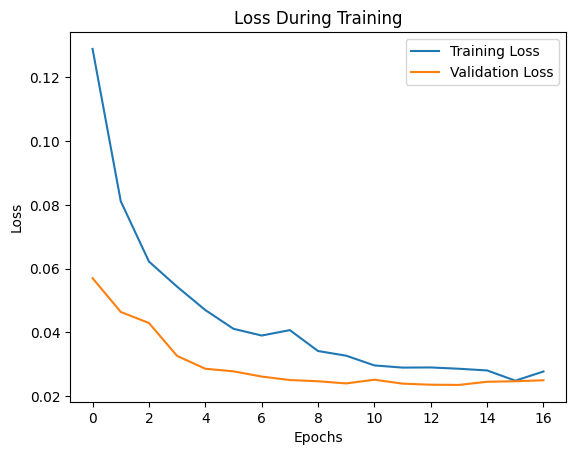

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tyler Burguillos 10/12/24

#### Model 7: Four Layer Fully-Connected Neural Network (FNN) with Dropout Layer

This is our seventh model, a simple Fully-Connected Neural Network (FNN) with four hidden layers consisting of 50 neurons, 25 neurons, 15 neurons, 5 neurons, and a ReLU activation function. In between the first and second dense layers we added a 10% dropout layer.  We also implement **early stopping** to prevent overfitting and **model checkpointing** to save the best-performing model during training.

##### Key Features:
- **Hidden Layer 1**: 50 neurons with ReLU activation.
- **Dropout Layer 1** 10% dropout rate for regularization.
- **Hidden Layer 2**: 25 neurons with ReLU activation.
- **Hidden Layer 3**: 15 neurons with ReLU activation.
- **Hidden Layer 4**: 5 neurons with ReLU activation.
- **Output Layer**: Single neuron for regression (predicting house prices).
- **Optimizer**: Adam optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
model.add(Input(shape=(X_text_train.shape[1],)))
model.add(Dense(50, activation='relu')) # Hidden layer 1
model.add(Dropout(0.1)) # Dropout Layer 1
model.add(Dense(25, activation='relu')) # Hidden Layer 2
model.add(Dense(15, activation='relu')) # Hidden Layer 3
model.add(Dense(5, activation='relu')) # Hidden Layer 4
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Tyler Burguillos 10/12/24

**Implementing Early Stopping and Model Checkpointing**

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_tyler_7.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Tyler Burguillos 10/12/24

**Training the FNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    X_text_train, y_train,
    validation_data=(X_text_test, y_test), # Use validation data to monitor the training
    epochs=100,       # Maximum number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback] # Include both callbacks
)

# Tyler Burguillos 10/12/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.12676, saving model to fnn_model_tyler_7.keras
11/11 - 2s - 225ms/step - loss: 0.2134 - val_loss: 0.1268
Epoch 2/100

Epoch 2: val_loss improved from 0.12676 to 0.05377, saving model to fnn_model_tyler_7.keras
11/11 - 0s - 17ms/step - loss: 0.0976 - val_loss: 0.0538
Epoch 3/100

Epoch 3: val_loss improved from 0.05377 to 0.04661, saving model to fnn_model_tyler_7.keras
11/11 - 0s - 24ms/step - loss: 0.0593 - val_loss: 0.0466
Epoch 4/100

Epoch 4: val_loss improved from 0.04661 to 0.03626, saving model to fnn_model_tyler_7.keras
11/11 - 0s - 25ms/step - loss: 0.0469 - val_loss: 0.0363
Epoch 5/100

Epoch 5: val_loss improved from 0.03626 to 0.03312, saving model to fnn_model_tyler_7.keras
11/11 - 0s - 9ms/step - loss: 0.0375 - val_loss: 0.0331
Epoch 6/100

Epoch 6: val_loss improved from 0.03312 to 0.03107, saving model to fnn_model_tyler_7.keras
11/11 - 0s - 13ms/step - loss: 0.0352 - val_loss: 0.0311
Epoch 7/100

Epoch 7: val_loss i

**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

# Tyler Burguillos 10/12/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Test RMSE: 128223.78125


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')

# Tyler Burguillos 10/12/24

R-squared Score: 0.62


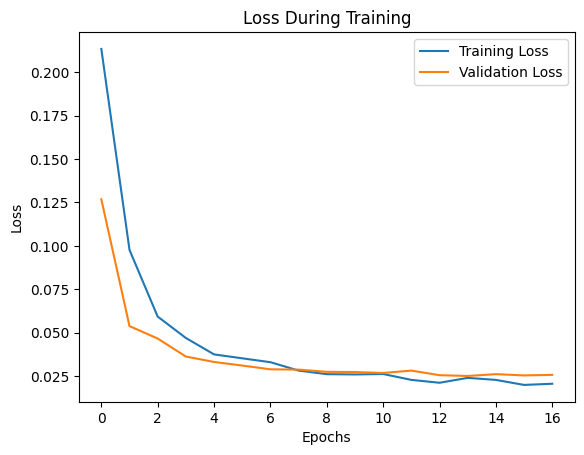

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tyler Burguillos 10/12/24

#### Model 8: Four Layer Fully-Connected Neural Network (FNN) with Dropout Layer

This is our eighth model, a simple Fully-Connected Neural Network (FNN) with four hidden layers consisting of 50 neurons, 25 neurons, 15 neurons, 5 neurons, and a ReLU activation function. In between the first and second dense layers we added a 5% dropout layer.  We also implement **early stopping** to prevent overfitting and **model checkpointing** to save the best-performing model during training.

##### Key Features:
- **Hidden Layer 1**: 50 neurons with ReLU activation.
- **Dropout Layer 1** 5% dropout rate for regularization.
- **Hidden Layer 2**: 25 neurons with ReLU activation.
- **Hidden Layer 3**: 15 neurons with ReLU activation.
- **Hidden Layer 4**: 5 neurons with ReLU activation.
- **Output Layer**: Single neuron for regression (predicting house prices).
- **Optimizer**: Adam optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
model.add(Input(shape=(X_text_train.shape[1],)))
model.add(Dense(50, activation='relu')) # Hidden layer 1
model.add(Dropout(0.05)) # Dropout Layer 1
model.add(Dense(25, activation='relu')) # Hidden Layer 2
model.add(Dense(15, activation='relu')) # Hidden Layer 3
model.add(Dense(5, activation='relu')) # Hidden Layer 4
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Tyler Burguillos 10/12/24

**Implementing Early Stopping and Model Checkpointing**

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_tyler_8.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Tyler Burguillos 10/12/24

**Training the FNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    X_text_train, y_train,
    validation_data=(X_text_test, y_test), # Use validation data to monitor the training
    epochs=100,       # Maximum number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback] # Include both callbacks
)

# Tyler Burguillos 10/12/24

**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

# Tyler Burguillos 10/12/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Test RMSE: 131097.625


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')

# Tyler Burguillos 10/12/24

R-squared Score: 0.60


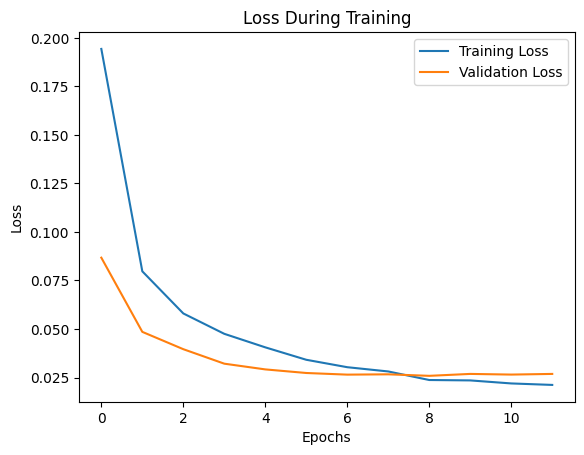

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tyler Burguillos 10/12/24

#### Model 9: Four Layer Fully-Connected Neural Network (FNN) with Dropout Layer and Batch Normalization

This is our ninth model, a simple Fully-Connected Neural Network (FNN) with four hidden layers consisting of 50 neurons, 25 neurons, 15 neurons, 5 neurons, and a ReLU activation function. In between the first and second dense layers we added a batch normalization layer and 10% dropout layer.  We also implement **early stopping** to prevent overfitting and **model checkpointing** to save the best-performing model during training.

##### Key Features:
- **Hidden Layer 1**: 50 neurons with ReLU activation.
- **Batch Normalization Layer 1**: added for normalization
- **Dropout Layer 1** 10% dropout rate for regularization.
- **Hidden Layer 2**: 25 neurons with ReLU activation.
- **Hidden Layer 3**: 15 neurons with ReLU activation.
- **Hidden Layer 4**: 5 neurons with ReLU activation.
- **Output Layer**: Single neuron for regression (predicting house prices).
- **Optimizer**: Adam optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
model.add(Input(shape=(X_text_train.shape[1],)))
model.add(Dense(50, activation='relu')) # Hidden layer 1
model.add(BatchNormalization()) # Batch Normalization Layer 1
model.add(Dropout(0.1)) # Dropout Layer 1
model.add(Dense(25, activation='relu')) # Hidden Layer 2
model.add(Dense(15, activation='relu')) # Hidden Layer 3
model.add(Dense(5, activation='relu')) # Hidden Layer 4
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Tyler Burguillos 10/12/24

**Implementing Early Stopping and Model Checkpointing**

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_tyler_9.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Tyler Burguillos 10/12/24

**Training the FNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    X_text_train, y_train,
    validation_data=(X_text_test, y_test), # Use validation data to monitor the training
    epochs=100,       # Maximum number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback] # Include both callbacks
)

# Tyler Burguillos 10/12/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.29259, saving model to fnn_model_tyler_9.keras
11/11 - 2s - 193ms/step - loss: 1.5397 - val_loss: 0.2926
Epoch 2/100

Epoch 2: val_loss improved from 0.29259 to 0.28088, saving model to fnn_model_tyler_9.keras
11/11 - 0s - 11ms/step - loss: 0.6307 - val_loss: 0.2809
Epoch 3/100

Epoch 3: val_loss improved from 0.28088 to 0.26709, saving model to fnn_model_tyler_9.keras
11/11 - 0s - 12ms/step - loss: 0.3456 - val_loss: 0.2671
Epoch 4/100

Epoch 4: val_loss improved from 0.26709 to 0.25001, saving model to fnn_model_tyler_9.keras
11/11 - 0s - 9ms/step - loss: 0.2716 - val_loss: 0.2500
Epoch 5/100

Epoch 5: val_loss improved from 0.25001 to 0.23149, saving model to fnn_model_tyler_9.keras
11/11 - 0s - 13ms/step - loss: 0.2258 - val_loss: 0.2315
Epoch 6/100

Epoch 6: val_loss improved from 0.23149 to 0.21093, saving model to fnn_model_tyler_9.keras
11/11 - 0s - 13ms/step - loss: 0.1761 - val_loss: 0.2109
Epoch 7/100

Epoch 7: val_loss i

**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

# Tyler Burguillos 10/12/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Test RMSE: 115874.2265625


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')

# Tyler Burguillos 10/12/24

R-squared Score: 0.69


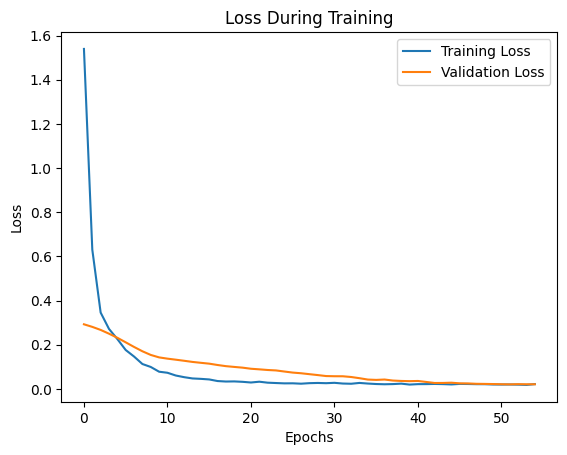

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tyler Burguillos 10/12/24

#### Model 10: Four Layer Fully-Connected Neural Network (FNN) with Batch Normalization

This is our tenth model, a simple Fully-Connected Neural Network (FNN) with four hidden layers consisting of 50 neurons, 25 neurons, 15 neurons, 5 neurons, and a ReLU activation function. In between the first and second dense layers we added a batch normalization layer.  We also implement **early stopping** to prevent overfitting and **model checkpointing** to save the best-performing model during training.

##### Key Features:
- **Hidden Layer 1**: 50 neurons with ReLU activation.
- **Batch Normalization Layer 1**: added for normalization
- **Hidden Layer 2**: 25 neurons with ReLU activation.
- **Hidden Layer 3**: 15 neurons with ReLU activation.
- **Hidden Layer 4**: 5 neurons with ReLU activation.
- **Output Layer**: Single neuron for regression (predicting house prices).
- **Optimizer**: Adam optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
model.add(Input(shape=(X_text_train.shape[1],)))
model.add(Dense(50, activation='relu')) # Hidden layer 1
model.add(BatchNormalization()) # Batch Normalization Layer 1
model.add(Dense(25, activation='relu')) # Hidden Layer 2
model.add(Dense(15, activation='relu')) # Hidden Layer 3
model.add(Dense(5, activation='relu')) # Hidden Layer 4
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Tyler Burguillos 10/12/24

**Implementing Early Stopping and Model Checkpointing**

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_tyler_10.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Tyler Burguillos 10/12/24

**Training the FNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    X_text_train, y_train,
    validation_data=(X_text_test, y_test), # Use validation data to monitor the training
    epochs=100,       # Maximum number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback] # Include both callbacks
)

# Tyler Burguillos 10/12/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.23738, saving model to fnn_model_tyler_10.keras
11/11 - 2s - 189ms/step - loss: 0.2167 - val_loss: 0.2374
Epoch 2/100

Epoch 2: val_loss improved from 0.23738 to 0.19348, saving model to fnn_model_tyler_10.keras
11/11 - 0s - 11ms/step - loss: 0.1012 - val_loss: 0.1935
Epoch 3/100

Epoch 3: val_loss improved from 0.19348 to 0.18191, saving model to fnn_model_tyler_10.keras
11/11 - 0s - 9ms/step - loss: 0.0725 - val_loss: 0.1819
Epoch 4/100

Epoch 4: val_loss improved from 0.18191 to 0.17923, saving model to fnn_model_tyler_10.keras
11/11 - 0s - 9ms/step - loss: 0.0546 - val_loss: 0.1792
Epoch 5/100

Epoch 5: val_loss improved from 0.17923 to 0.17093, saving model to fnn_model_tyler_10.keras
11/11 - 0s - 10ms/step - loss: 0.0508 - val_loss: 0.1709
Epoch 6/100

Epoch 6: val_loss improved from 0.17093 to 0.15985, saving model to fnn_model_tyler_10.keras
11/11 - 0s - 10ms/step - loss: 0.0431 - val_loss: 0.1599
Epoch 7/100

Epoch 7: val_l

**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

# Tyler Burguillos 10/12/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Test RMSE: 127352.125


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')

# Tyler Burguillos 10/12/24

R-squared Score: 0.62


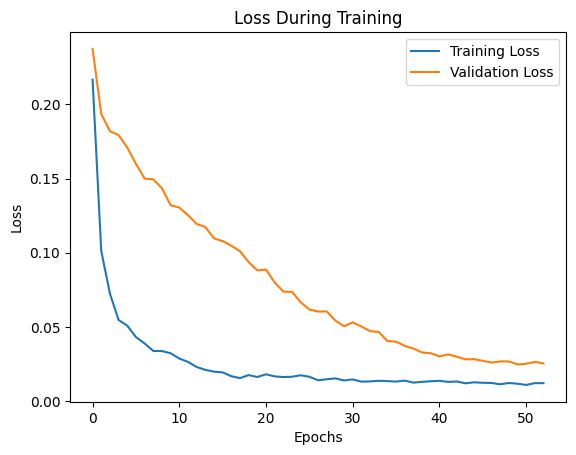

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tyler Burguillos 10/12/24

#### Model 11: Four Layer Fully-Connected Neural Network (FNN) with Dropout Layer

This is our eleventh model, which is the same as the seventh model, but trained on 200 epochs rather than 100 epochs.

##### Key Features:
- **Hidden Layer 1**: 75 neurons with ReLU activation.
- **Dropout Layer 1** 10% dropout rate for regularization.
- **Hidden Layer 2**: 50 neurons with ReLU activation.
- **Hidden Layer 3**: 25 neurons with ReLU activation.
- **Hidden Layer 4**: 15 neurons with ReLU activation.
- **Output Layer**: Single neuron for regression (predicting house prices).
- **Optimizer**: Adam optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
model.add(Input(shape=(X_text_train.shape[1],)))
model.add(Dense(75, activation='relu')) # Hidden layer 1
model.add(Dropout(0.1)) # Dropout Layer 1
model.add(Dense(50, activation='relu')) # Hidden Layer 2
model.add(Dense(25, activation='relu')) # Hidden Layer 3
model.add(Dense(15, activation='relu')) # Hidden Layer 4
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Tyler Burguillos 10/13/24

**Implementing Early Stopping and Model Checkpointing**

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_tyler_11.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Tyler Burguillos 10/13/24

**Training the FNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    X_text_train, y_train,
    validation_data=(X_text_test, y_test), # Use validation data to monitor the training
    epochs=200,       # Maximum number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback] # Include both callbacks
)

# Tyler Burguillos 10/13/24

Epoch 1/200

Epoch 1: val_loss improved from inf to 0.13087, saving model to fnn_model_tyler_11.keras
11/11 - 3s - 302ms/step - loss: 0.2237 - val_loss: 0.1309
Epoch 2/200

Epoch 2: val_loss improved from 0.13087 to 0.05887, saving model to fnn_model_tyler_11.keras
11/11 - 0s - 11ms/step - loss: 0.0876 - val_loss: 0.0589
Epoch 3/200

Epoch 3: val_loss improved from 0.05887 to 0.04764, saving model to fnn_model_tyler_11.keras
11/11 - 0s - 11ms/step - loss: 0.0604 - val_loss: 0.0476
Epoch 4/200

Epoch 4: val_loss improved from 0.04764 to 0.04125, saving model to fnn_model_tyler_11.keras
11/11 - 0s - 10ms/step - loss: 0.0450 - val_loss: 0.0412
Epoch 5/200

Epoch 5: val_loss improved from 0.04125 to 0.03524, saving model to fnn_model_tyler_11.keras
11/11 - 0s - 10ms/step - loss: 0.0386 - val_loss: 0.0352
Epoch 6/200

Epoch 6: val_loss improved from 0.03524 to 0.03179, saving model to fnn_model_tyler_11.keras
11/11 - 0s - 11ms/step - loss: 0.0318 - val_loss: 0.0318
Epoch 7/200

Epoch 7: val

**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

# Tyler Burguillos 10/13/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Test RMSE: 124265.8203125


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')

# Tyler Burguillos 10/13/24

R-squared Score: 0.64


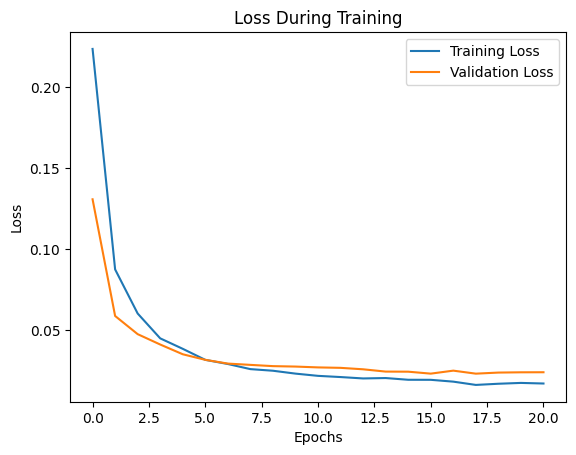

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tyler Burguillos 10/13/24

#### Model 12: Five Layer Fully-Connected Neural Network (FNN) with Dropout Layer

This is our twelfth model, a simple Fully-Connected Neural Network (FNN) with five hidden layers consisting of 75 neurons, 50 neurons, 25 neurons, 15 neurons, 5 neurons, and a ReLU activation function. In between the first and second dense layers we added a 10% dropout layer.  We also implement **early stopping** to prevent overfitting and **model checkpointing** to save the best-performing model during training.

##### Key Features:
- **Hidden Layer 1**: 75 neurons with ReLU activation.
- **Dropout Layer 1** 10% dropout rate for regularization.
- **Hidden Layer 2**: 50 neurons with ReLU activation.
- **Hidden Layer 3**: 25 neurons with ReLU activation.
- **Hidden Layer 4**: 15 neurons with ReLU activation.
- **Hidden Layer 5**: 5 neurons with ReLU activation.
- **Output Layer**: Single neuron for regression (predicting house prices).
- **Optimizer**: Adam optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
model.add(Input(shape=(X_text_train.shape[1],)))
model.add(Dense(75, activation='relu')) # Hidden layer 1
model.add(Dropout(0.1)) # Dropout Layer 1
model.add(Dense(50, activation='relu')) # Hidden Layer 2
model.add(Dense(25, activation='relu')) # Hidden Layer 3
model.add(Dense(15, activation='relu')) # Hidden Layer 4
model.add(Dense(5, activation='relu')) # Hidden Layer 5
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Tyler Burguillos 10/13/24

**Implementing Early Stopping and Model Checkpointing**

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_tyler_12.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Tyler Burguillos 10/13/24

**Training the FNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    X_text_train, y_train,
    validation_data=(X_text_test, y_test), # Use validation data to monitor the training
    epochs=200,       # Maximum number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback] # Include both callbacks
)

# Tyler Burguillos 10/13/24

Epoch 1/200

Epoch 1: val_loss improved from inf to 0.28896, saving model to fnn_model_tyler_12.keras
11/11 - 3s - 238ms/step - loss: 0.3150 - val_loss: 0.2890
Epoch 2/200

Epoch 2: val_loss improved from 0.28896 to 0.26531, saving model to fnn_model_tyler_12.keras
11/11 - 1s - 59ms/step - loss: 0.2823 - val_loss: 0.2653
Epoch 3/200

Epoch 3: val_loss improved from 0.26531 to 0.23775, saving model to fnn_model_tyler_12.keras
11/11 - 1s - 66ms/step - loss: 0.2572 - val_loss: 0.2378
Epoch 4/200

Epoch 4: val_loss improved from 0.23775 to 0.19311, saving model to fnn_model_tyler_12.keras
11/11 - 0s - 41ms/step - loss: 0.2234 - val_loss: 0.1931
Epoch 5/200

Epoch 5: val_loss improved from 0.19311 to 0.12107, saving model to fnn_model_tyler_12.keras
11/11 - 0s - 44ms/step - loss: 0.1699 - val_loss: 0.1211
Epoch 6/200

Epoch 6: val_loss improved from 0.12107 to 0.05236, saving model to fnn_model_tyler_12.keras
11/11 - 0s - 33ms/step - loss: 0.0922 - val_loss: 0.0524
Epoch 7/200

Epoch 7: val

**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

# Tyler Burguillos 10/13/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Test RMSE: 128641.9453125


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')

# Tyler Burguillos 10/13/24

R-squared Score: 0.61


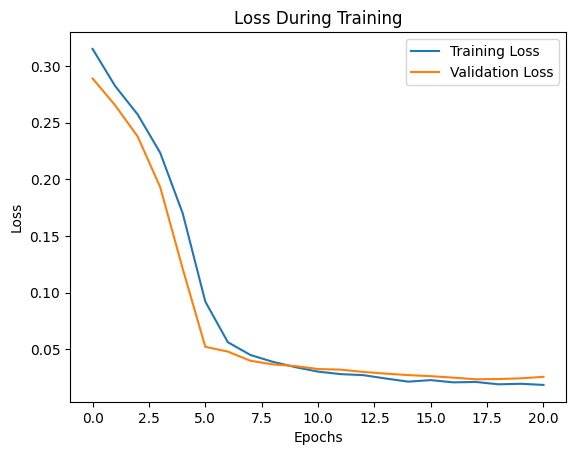

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tyler Burguillos 10/13/24

#### Model 13: Five Layer Fully-Connected Neural Network (FNN) with Dropout Layer and Reduced Learning Rate

This is our thirteenth model, which is the same as the twelfth model, but with an adjusted learning rate of 0.0005.

##### Key Features:
- **Hidden Layer 1**: 75 neurons with ReLU activation.
- **Dropout Layer 1** 10% dropout rate for regularization.
- **Hidden Layer 2**: 50 neurons with ReLU activation.
- **Hidden Layer 3**: 25 neurons with ReLU activation.
- **Hidden Layer 4**: 15 neurons with ReLU activation.
- **Hidden Layer 5**: 5 neurons with ReLU activation.
- **Learning Rate**: Reduced learning rate to 0.0005
- **Output Layer**: Single neuron for regression (predicting house prices).
- **Optimizer**: Adam optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
model.add(Input(shape=(X_text_train.shape[1],)))
model.add(Dense(75, activation='relu')) # Hidden layer 1
model.add(Dropout(0.1)) # Dropout Layer 1
model.add(Dense(50, activation='relu')) # Hidden Layer 2
model.add(Dense(25, activation='relu')) # Hidden Layer 3
model.add(Dense(15, activation='relu')) # Hidden Layer 4
model.add(Dense(5, activation='relu')) # Hidden Layer 5
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Adjust the learning rate for the optimizer
optimizer = Adam(learning_rate=0.0005)  # Reduced learning rate
# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer=optimizer)

# Tyler Burguillos 10/13/24

**Implementing Early Stopping and Model Checkpointing**

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_tyler_13.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Tyler Burguillos 10/13/24

**Training the FNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    X_text_train, y_train,
    validation_data=(X_text_test, y_test), # Use validation data to monitor the training
    epochs=300,       # Maximum number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback] # Include both callbacks
)

# Tyler Burguillos 10/13/24

Epoch 1/300

Epoch 1: val_loss improved from inf to 0.22198, saving model to fnn_model_tyler_13.keras
11/11 - 2s - 179ms/step - loss: 0.2620 - val_loss: 0.2220
Epoch 2/300

Epoch 2: val_loss improved from 0.22198 to 0.15986, saving model to fnn_model_tyler_13.keras
11/11 - 0s - 11ms/step - loss: 0.2009 - val_loss: 0.1599
Epoch 3/300

Epoch 3: val_loss improved from 0.15986 to 0.10044, saving model to fnn_model_tyler_13.keras
11/11 - 0s - 11ms/step - loss: 0.1416 - val_loss: 0.1004
Epoch 4/300

Epoch 4: val_loss improved from 0.10044 to 0.05928, saving model to fnn_model_tyler_13.keras
11/11 - 0s - 10ms/step - loss: 0.0876 - val_loss: 0.0593
Epoch 5/300

Epoch 5: val_loss improved from 0.05928 to 0.05178, saving model to fnn_model_tyler_13.keras
11/11 - 0s - 9ms/step - loss: 0.0565 - val_loss: 0.0518
Epoch 6/300

Epoch 6: val_loss improved from 0.05178 to 0.04436, saving model to fnn_model_tyler_13.keras
11/11 - 0s - 13ms/step - loss: 0.0495 - val_loss: 0.0444
Epoch 7/300

Epoch 7: val_

**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

# Tyler Burguillos 10/13/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Test RMSE: 125125.6953125


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')

# Tyler Burguillos 10/13/24

R-squared Score: 0.63


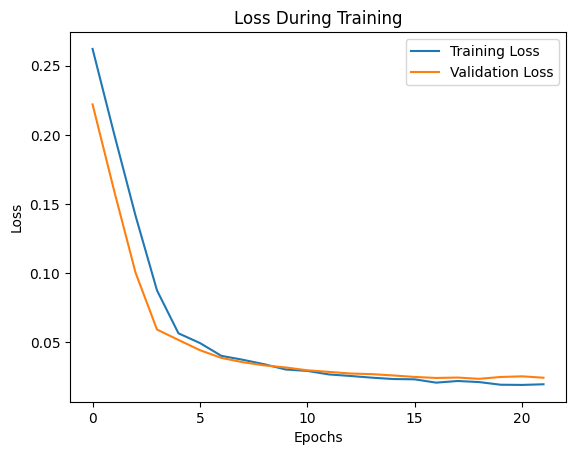

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tyler Burguillos 10/13/24

#### Model 14: Five Layer Fully-Connected Neural Network (FNN) with Dropout Layer and Increased Learning Rate

This is our fourteenth model, which is the same as the twelfth model, but with an adjusted learning rate of 0.005.

##### Key Features:
- **Hidden Layer 1**: 75 neurons with ReLU activation.
- **Dropout Layer 1** 10% dropout rate for regularization.
- **Hidden Layer 2**: 50 neurons with ReLU activation.
- **Hidden Layer 3**: 25 neurons with ReLU activation.
- **Hidden Layer 4**: 15 neurons with ReLU activation.
- **Hidden Layer 5**: 5 neurons with ReLU activation.
- **Learning Rate**: Increased learning rate to 0.005
- **Output Layer**: Single neuron for regression (predicting house prices).
- **Optimizer**: Adam optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
model.add(Input(shape=(X_text_train.shape[1],)))
model.add(Dense(75, activation='relu')) # Hidden layer 1
model.add(Dropout(0.1)) # Dropout Layer 1
model.add(Dense(50, activation='relu')) # Hidden Layer 2
model.add(Dense(25, activation='relu')) # Hidden Layer 3
model.add(Dense(15, activation='relu')) # Hidden Layer 4
model.add(Dense(5, activation='relu')) # Hidden Layer 5
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Adjust the learning rate for the optimizer
optimizer = Adam(learning_rate=0.005)  # Increased learning rate
# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer=optimizer)

# Tyler Burguillos 10/13/24

**Implementing Early Stopping and Model Checkpointing**

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_tyler_14.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Tyler Burguillos 10/13/24

**Training the FNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    X_text_train, y_train,
    validation_data=(X_text_test, y_test), # Use validation data to monitor the training
    epochs=200,       # Maximum number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback] # Include both callbacks
)

# Tyler Burguillos 10/13/24

Epoch 1/200

Epoch 1: val_loss improved from inf to 0.04668, saving model to fnn_model_tyler_14.keras
11/11 - 2s - 220ms/step - loss: 0.1100 - val_loss: 0.0467
Epoch 2/200

Epoch 2: val_loss improved from 0.04668 to 0.04246, saving model to fnn_model_tyler_14.keras
11/11 - 0s - 14ms/step - loss: 0.0456 - val_loss: 0.0425
Epoch 3/200

Epoch 3: val_loss improved from 0.04246 to 0.02674, saving model to fnn_model_tyler_14.keras
11/11 - 0s - 25ms/step - loss: 0.0343 - val_loss: 0.0267
Epoch 4/200

Epoch 4: val_loss improved from 0.02674 to 0.02468, saving model to fnn_model_tyler_14.keras
11/11 - 0s - 17ms/step - loss: 0.0234 - val_loss: 0.0247
Epoch 5/200

Epoch 5: val_loss improved from 0.02468 to 0.02295, saving model to fnn_model_tyler_14.keras
11/11 - 0s - 13ms/step - loss: 0.0203 - val_loss: 0.0230
Epoch 6/200

Epoch 6: val_loss did not improve from 0.02295
11/11 - 0s - 25ms/step - loss: 0.0188 - val_loss: 0.0240
Epoch 7/200

Epoch 7: val_loss did not improve from 0.02295
11/11 - 0s 

**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

# Tyler Burguillos 10/13/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Test RMSE: 140079.09375


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')

# Tyler Burguillos 10/13/24

R-squared Score: 0.54


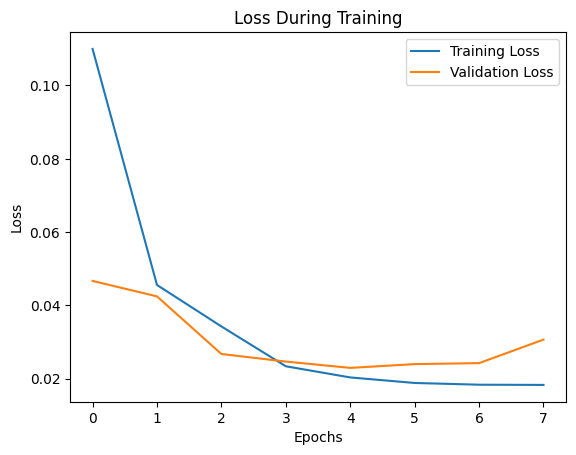

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tyler Burguillos 10/13/24

#### Model 15: Six Layer Fully-Connected Neural Network (FNN) with Dropout Layer

This is our fifteenth model, a simple Fully-Connected Neural Network (FNN) with six hidden layers consisting of 100 neurons, 75 neurons, 50 neurons, 25 neurons, 15 neurons, 5 neurons, and a ReLU activation function. In between the first and second dense layers we added a 10% dropout layer.  We also implement **early stopping** to prevent overfitting and **model checkpointing** to save the best-performing model during training.

##### Key Features:
- **Hidden Layer 1**: 100 neurons with ReLU activation.
- **Dropout Layer 1** 10% dropout rate for regularization.
- **Hidden Layer 2**: 75 neurons with ReLU activation.
- **Hidden Layer 3**: 50 neurons with ReLU activation.
- **Hidden Layer 4**: 25 neurons with ReLU activation.
- **Hidden Layer 5**: 15 neurons with ReLU activation.
- **Hidden Layer 6**: 5 neurons with ReLU activation.
- **Output Layer**: Single neuron for regression (predicting house prices).
- **Optimizer**: Adam optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
model.add(Input(shape=(X_text_train.shape[1],)))
model.add(Dense(100, activation='relu')) # Hidden layer 1
model.add(Dropout(0.1)) # Dropout Layer 1
model.add(Dense(75, activation='relu')) # Hidden Layer 2
model.add(Dense(50, activation='relu')) # Hidden Layer 3
model.add(Dense(25, activation='relu')) # Hidden Layer 4
model.add(Dense(15, activation='relu')) # Hidden Layer 5
model.add(Dense(5, activation='relu')) # Hidden Layer 6
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Tyler Burguillos 10/13/24

**Implementing Early Stopping and Model Checkpointing**

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_tyler_15.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Tyler Burguillos 10/13/24

**Training the FNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    X_text_train, y_train,
    validation_data=(X_text_test, y_test), # Use validation data to monitor the training
    epochs=200,       # Maximum number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback] # Include both callbacks
)

# Tyler Burguillos 10/13/24

Epoch 1/200

Epoch 1: val_loss improved from inf to 0.18231, saving model to fnn_model_tyler_15.keras
11/11 - 2s - 219ms/step - loss: 0.2591 - val_loss: 0.1823
Epoch 2/200

Epoch 2: val_loss improved from 0.18231 to 0.06136, saving model to fnn_model_tyler_15.keras
11/11 - 0s - 10ms/step - loss: 0.1266 - val_loss: 0.0614
Epoch 3/200

Epoch 3: val_loss improved from 0.06136 to 0.05064, saving model to fnn_model_tyler_15.keras
11/11 - 0s - 13ms/step - loss: 0.0668 - val_loss: 0.0506
Epoch 4/200

Epoch 4: val_loss improved from 0.05064 to 0.04382, saving model to fnn_model_tyler_15.keras
11/11 - 0s - 10ms/step - loss: 0.0509 - val_loss: 0.0438
Epoch 5/200

Epoch 5: val_loss improved from 0.04382 to 0.03454, saving model to fnn_model_tyler_15.keras
11/11 - 0s - 10ms/step - loss: 0.0412 - val_loss: 0.0345
Epoch 6/200

Epoch 6: val_loss improved from 0.03454 to 0.02980, saving model to fnn_model_tyler_15.keras
11/11 - 0s - 11ms/step - loss: 0.0343 - val_loss: 0.0298
Epoch 7/200

Epoch 7: val

**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

# Tyler Burguillos 10/13/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Test RMSE: 124470.2890625


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')

# Tyler Burguillos 10/13/24

R-squared Score: 0.64


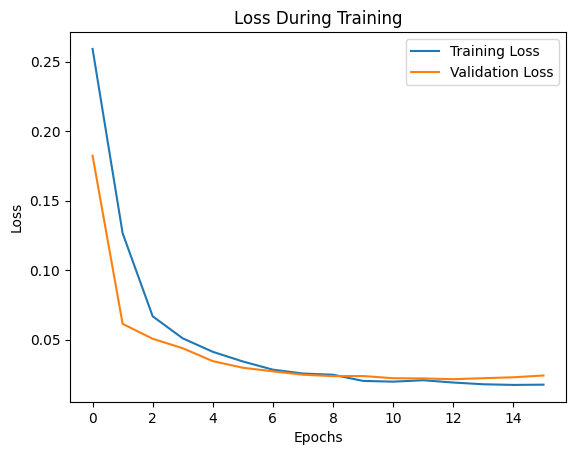

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tyler Burguillos 10/13/24

#### Model 16: Baseline Fully-Connected Neural Network (FNN) with Sigmoid Activation

This is our sixteenth model, a simple Fully-Connected Neural Network (FNN) with one hidden layer consisting of 25 neurons and a Sigmoid activation function. We also implement **early stopping** to prevent overfitting and **model checkpointing** to save the best-performing model during training.

##### Key Features:
- **Hidden Layer**: 25 neurons with Sigmoid activation.
- **Output Layer**: Single neuron for regression (predicting house prices).
- **Optimizer**: Adam optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
model.add(Input(shape=(X_text_train.shape[1],)))
model.add(Dense(25, activation='sigmoid')) # Hidden layer
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Tyler Burguillos 10/14/24

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_tyler_16.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Tyler Burguillos 10/14/24

**Training the FNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    X_text_train, y_train,
    validation_data=(X_text_test, y_test), # Use validation data to monitor the training
    epochs=200,       # Maximum number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback] # Include both callbacks
)

# Tyler Burguillos 10/14/24

Epoch 1/200

Epoch 1: val_loss improved from inf to 0.07318, saving model to fnn_model_tyler_16.keras
11/11 - 2s - 181ms/step - loss: 0.0875 - val_loss: 0.0732
Epoch 2/200

Epoch 2: val_loss improved from 0.07318 to 0.06845, saving model to fnn_model_tyler_16.keras
11/11 - 0s - 34ms/step - loss: 0.0802 - val_loss: 0.0684
Epoch 3/200

Epoch 3: val_loss improved from 0.06845 to 0.06415, saving model to fnn_model_tyler_16.keras
11/11 - 0s - 13ms/step - loss: 0.0744 - val_loss: 0.0641
Epoch 4/200

Epoch 4: val_loss improved from 0.06415 to 0.06040, saving model to fnn_model_tyler_16.keras
11/11 - 0s - 25ms/step - loss: 0.0692 - val_loss: 0.0604
Epoch 5/200

Epoch 5: val_loss improved from 0.06040 to 0.05685, saving model to fnn_model_tyler_16.keras
11/11 - 0s - 14ms/step - loss: 0.0651 - val_loss: 0.0569
Epoch 6/200

Epoch 6: val_loss improved from 0.05685 to 0.05361, saving model to fnn_model_tyler_16.keras
11/11 - 0s - 10ms/step - loss: 0.0609 - val_loss: 0.0536
Epoch 7/200

Epoch 7: val

**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

# Tyler Burguillos 10/14/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Test RMSE: 119208.125


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')

# Tyler Burguillos 10/14/24

R-squared Score: 0.67


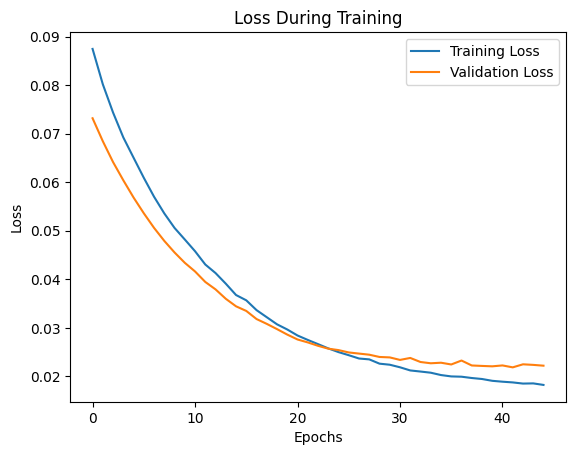

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tyler Burguillos 10/14/24

#### Model 17: Two Layer Fully-Connected Neural Network (FNN) with Sigmoid Activation

This is our seventeenth model, a simple Fully-Connected Neural Network (FNN) with two hidden layers consisting of 50 neurons, 25 neurons, and a Sigmoid activation function. We also implement **early stopping** to prevent overfitting and **model checkpointing** to save the best-performing model during training.

##### Key Features:
- **Hidden Layer 1**: 50 neurons with Sigmoid activation.
- **Hidden Layer 2**: 25 neurons with Sigmoid activation.
- **Output Layer**: Single neuron for regression (predicting house prices).
- **Optimizer**: Adam optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
model.add(Input(shape=(X_text_train.shape[1],)))
model.add(Dense(50, activation='sigmoid')) # Hidden layer 1
model.add(Dense(25, activation='sigmoid')) # Hidden Layer 2
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Tyler Burguillos 10/14/24

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_tyler_17.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Tyler Burguillos 10/14/24

**Training the FNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    X_text_train, y_train,
    validation_data=(X_text_test, y_test), # Use validation data to monitor the training
    epochs=1000,       # Maximum number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback] # Include both callbacks
)

# Tyler Burguillos 10/14/24

Epoch 1/1000

Epoch 1: val_loss improved from inf to 0.11988, saving model to fnn_model_tyler_17.keras
11/11 - 1s - 109ms/step - loss: 0.3957 - val_loss: 0.1199
Epoch 2/1000

Epoch 2: val_loss improved from 0.11988 to 0.07643, saving model to fnn_model_tyler_17.keras
11/11 - 0s - 9ms/step - loss: 0.0850 - val_loss: 0.0764
Epoch 3/1000

Epoch 3: val_loss improved from 0.07643 to 0.07332, saving model to fnn_model_tyler_17.keras
11/11 - 0s - 7ms/step - loss: 0.0915 - val_loss: 0.0733
Epoch 4/1000

Epoch 4: val_loss improved from 0.07332 to 0.06153, saving model to fnn_model_tyler_17.keras
11/11 - 0s - 14ms/step - loss: 0.0763 - val_loss: 0.0615
Epoch 5/1000

Epoch 5: val_loss did not improve from 0.06153
11/11 - 0s - 7ms/step - loss: 0.0693 - val_loss: 0.0620
Epoch 6/1000

Epoch 6: val_loss improved from 0.06153 to 0.06037, saving model to fnn_model_tyler_17.keras
11/11 - 0s - 13ms/step - loss: 0.0690 - val_loss: 0.0604
Epoch 7/1000

Epoch 7: val_loss improved from 0.06037 to 0.05842, sa

**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

# Tyler Burguillos 10/14/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Test RMSE: 122770.84375


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')

# Tyler Burguillos 10/14/24

R-squared Score: 0.65


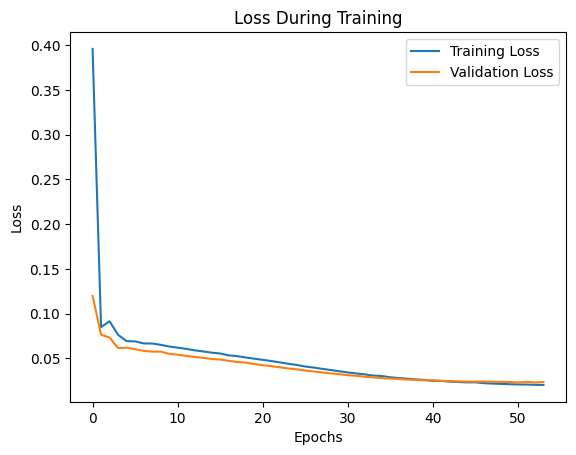

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tyler Burguillos 10/14/24

#### Model 18: Baseline Fully-Connected Neural Network (FNN) with Tanh Activation

This is our eighteenth model, a simple Fully-Connected Neural Network (FNN) with one hidden layer consisting of 25 neurons and a Tanh activation function. We also implement **early stopping** to prevent overfitting and **model checkpointing** to save the best-performing model during training.

##### Key Features:
- **Hidden Layer**: 25 neurons with Tanh activation.
- **Output Layer**: Single neuron for regression (predicting house prices).
- **Optimizer**: Adam optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
model.add(Input(shape=(X_text_train.shape[1],)))
model.add(Dense(25, activation='tanh')) # Hidden layer
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Tyler Burguillos 10/11/24

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_tyler_18.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Tyler Burguillos 10/11/24

**Training the FNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    X_text_train, y_train,
    validation_data=(X_text_test, y_test), # Use validation data to monitor the training
    epochs=100,       # Maximum number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback] # Include both callbacks
)

# Tyler Burguillos 10/11/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.26737, saving model to fnn_model_tyler_18.keras
11/11 - 2s - 138ms/step - loss: 0.3168 - val_loss: 0.2674
Epoch 2/100

Epoch 2: val_loss improved from 0.26737 to 0.23539, saving model to fnn_model_tyler_18.keras
11/11 - 0s - 27ms/step - loss: 0.2710 - val_loss: 0.2354
Epoch 3/100

Epoch 3: val_loss improved from 0.23539 to 0.20811, saving model to fnn_model_tyler_18.keras
11/11 - 0s - 26ms/step - loss: 0.2353 - val_loss: 0.2081
Epoch 4/100

Epoch 4: val_loss improved from 0.20811 to 0.18543, saving model to fnn_model_tyler_18.keras
11/11 - 0s - 13ms/step - loss: 0.2082 - val_loss: 0.1854
Epoch 5/100

Epoch 5: val_loss improved from 0.18543 to 0.16726, saving model to fnn_model_tyler_18.keras
11/11 - 0s - 13ms/step - loss: 0.1854 - val_loss: 0.1673
Epoch 6/100

Epoch 6: val_loss improved from 0.16726 to 0.15259, saving model to fnn_model_tyler_18.keras
11/11 - 0s - 12ms/step - loss: 0.1662 - val_loss: 0.1526
Epoch 7/100

Epoch 7: val

**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

# Tyler Burguillos 10/11/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Test RMSE: 119533.8984375


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')

# Tyler Burguillos 10/11/24

R-squared Score: 0.67


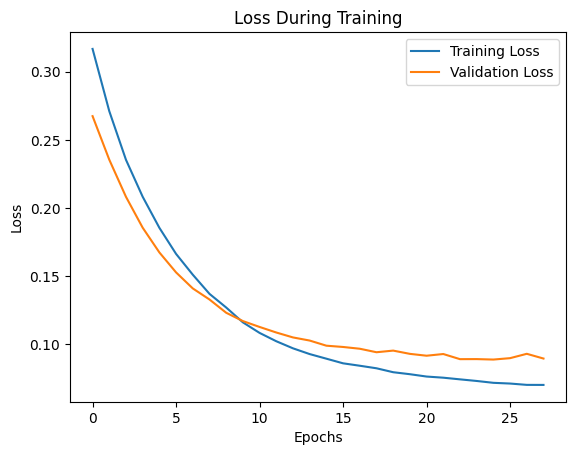

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tyler Burguillos 10/11/24

#### Model 19: Two Layer Fully-Connected Neural Network (FNN) with Tanh Activation

This is our ninteenth model, a simple Fully-Connected Neural Network (FNN) with two hidden layers consisting of 50 neurons, 25 neurons, and a Tanh activation function. We also implement **early stopping** to prevent overfitting and **model checkpointing** to save the best-performing model during training.

##### Key Features:
- **Hidden Layer 1**: 50 neurons with Tanh activation.
- **Hidden Layer 2**: 25 neurons with Tanh activation.
- **Output Layer**: Single neuron for regression (predicting house prices).
- **Optimizer**: Adam optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
model.add(Input(shape=(X_text_train.shape[1],)))
model.add(Dense(50, activation='tanh')) # Hidden layer 1
model.add(Dense(25, activation='tanh')) # Hidden Layer 2
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Tyler Burguillos 10/11/24

**Implementing Early Stopping and Model Checkpointing**

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_tyler_19.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Tyler Burguillos 10/11/24

**Training the FNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    X_text_train, y_train,
    validation_data=(X_text_test, y_test), # Use validation data to monitor the training
    epochs=100,       # Maximum number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback] # Include both callbacks
)

# Tyler Burguillos 10/11/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.23213, saving model to fnn_model_tyler_19.keras
11/11 - 1s - 130ms/step - loss: 0.3239 - val_loss: 0.2321
Epoch 2/100

Epoch 2: val_loss improved from 0.23213 to 0.17546, saving model to fnn_model_tyler_19.keras
11/11 - 0s - 9ms/step - loss: 0.2337 - val_loss: 0.1755
Epoch 3/100

Epoch 3: val_loss improved from 0.17546 to 0.13723, saving model to fnn_model_tyler_19.keras
11/11 - 0s - 11ms/step - loss: 0.1798 - val_loss: 0.1372
Epoch 4/100

Epoch 4: val_loss improved from 0.13723 to 0.11566, saving model to fnn_model_tyler_19.keras
11/11 - 0s - 14ms/step - loss: 0.1447 - val_loss: 0.1157
Epoch 5/100

Epoch 5: val_loss improved from 0.11566 to 0.10199, saving model to fnn_model_tyler_19.keras
11/11 - 0s - 9ms/step - loss: 0.1230 - val_loss: 0.1020
Epoch 6/100

Epoch 6: val_loss improved from 0.10199 to 0.09587, saving model to fnn_model_tyler_19.keras
11/11 - 0s - 9ms/step - loss: 0.1062 - val_loss: 0.0959
Epoch 7/100

Epoch 7: val_lo

**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

# Tyler Burguillos 10/11/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Test RMSE: 119208.1171875


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')

# Tyler Burguillos 10/11/24

R-squared Score: 0.67


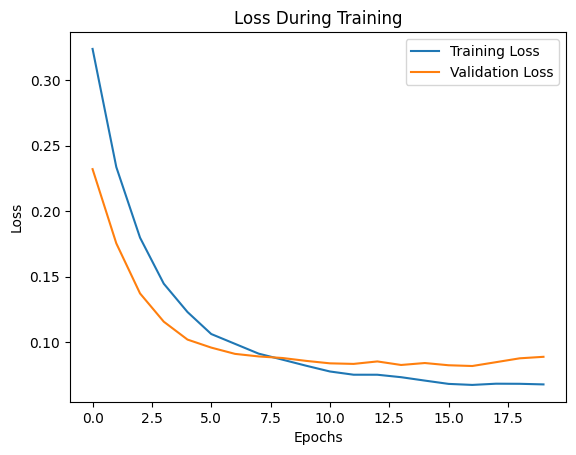

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tyler Burguillos 10/11/24

#### Model 3: Three Layer Fully-Connected Neural Network (FNN)

This is our third model, a simple Fully-Connected Neural Network (FNN) with three hidden layers consisting of 50 neurons, 25 neurons, 15 neurons, and a ReLU activation function. We also implement **early stopping** to prevent overfitting and **model checkpointing** to save the best-performing model during training.

##### Key Features:
- **Hidden Layer 1**: 50 neurons with ReLU activation.
- **Hidden Layer 2**: 25 neurons with ReLU activation.
- **Hidden Layer 3**: 15 neurons with ReLU activation.
- **Output Layer**: Single neuron for regression (predicting house prices).
- **Optimizer**: Adam optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
model.add(Input(shape=(X_text_train.shape[1],)))
model.add(Dense(50, activation='tanh')) # Hidden layer 1
model.add(Dense(25, activation='tanh')) # Hidden Layer 2
model.add(Dense(15, activation='tanh')) # Hidden Layer 3
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Tyler Burguillos 10/11/24

**Implementing Early Stopping and Model Checkpointing**

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_tyler_20.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Tyler Burguillos 10/11/24

**Training the FNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    X_text_train, y_train,
    validation_data=(X_text_test, y_test), # Use validation data to monitor the training
    epochs=100,       # Maximum number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback] # Include both callbacks
)

# Tyler Burguillos 10/11/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.16694, saving model to fnn_model_tyler_20.keras
11/11 - 2s - 171ms/step - loss: 0.2379 - val_loss: 0.1669
Epoch 2/100

Epoch 2: val_loss improved from 0.16694 to 0.12735, saving model to fnn_model_tyler_20.keras
11/11 - 0s - 11ms/step - loss: 0.1795 - val_loss: 0.1273
Epoch 3/100

Epoch 3: val_loss improved from 0.12735 to 0.10645, saving model to fnn_model_tyler_20.keras
11/11 - 0s - 9ms/step - loss: 0.1414 - val_loss: 0.1064
Epoch 4/100

Epoch 4: val_loss improved from 0.10645 to 0.09943, saving model to fnn_model_tyler_20.keras
11/11 - 0s - 13ms/step - loss: 0.1164 - val_loss: 0.0994
Epoch 5/100

Epoch 5: val_loss improved from 0.09943 to 0.09438, saving model to fnn_model_tyler_20.keras
11/11 - 0s - 9ms/step - loss: 0.1031 - val_loss: 0.0944
Epoch 6/100

Epoch 6: val_loss improved from 0.09438 to 0.09270, saving model to fnn_model_tyler_20.keras
11/11 - 0s - 9ms/step - loss: 0.0913 - val_loss: 0.0927
Epoch 7/100

Epoch 7: val_lo

**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

# Tyler Burguillos 10/11/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Test RMSE: 120571.03125


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')

# Tyler Burguillos 10/11/24

R-squared Score: 0.66


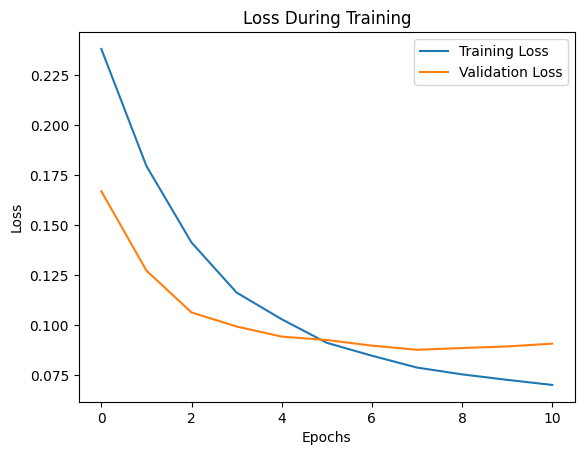

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tyler Burguillos 10/11/24

#### Model 3: Three Layer Fully-Connected Neural Network (FNN)

This is our third model, a simple Fully-Connected Neural Network (FNN) with three hidden layers consisting of 50 neurons, 25 neurons, 15 neurons, and a ReLU activation function. We also implement **early stopping** to prevent overfitting and **model checkpointing** to save the best-performing model during training.

##### Key Features:
- **Hidden Layer 1**: 50 neurons with ReLU activation.
- **Hidden Layer 2**: 25 neurons with ReLU activation.
- **Hidden Layer 3**: 15 neurons with ReLU activation.
- **Output Layer**: Single neuron for regression (predicting house prices).
- **Optimizer**: Adam optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
model.add(Input(shape=(X_text_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dense(50, activation='tanh')) # Hidden layer 1
#model.add(BatchNormalization())
model.add(Dense(25, activation='tanh')) # Hidden Layer 2
#model.add(BatchNormalization())
model.add(Dense(15, activation='tanh')) # Hidden Layer 3
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Tyler Burguillos 10/11/24

**Implementing Early Stopping and Model Checkpointing**

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_tyler_3.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Tyler Burguillos 10/11/24

**Training the FNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    X_text_train, y_train,
    validation_data=(X_text_test, y_test), # Use validation data to monitor the training
    epochs=100,       # Maximum number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback] # Include both callbacks
)

# Tyler Burguillos 10/11/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.21545, saving model to fnn_model_tyler_3.keras
11/11 - 3s - 299ms/step - loss: 0.5274 - val_loss: 0.2154
Epoch 2/100

Epoch 2: val_loss improved from 0.21545 to 0.21188, saving model to fnn_model_tyler_3.keras
11/11 - 0s - 29ms/step - loss: 0.1673 - val_loss: 0.2119
Epoch 3/100

Epoch 3: val_loss improved from 0.21188 to 0.16025, saving model to fnn_model_tyler_3.keras
11/11 - 0s - 30ms/step - loss: 0.1232 - val_loss: 0.1602
Epoch 4/100

Epoch 4: val_loss improved from 0.16025 to 0.14260, saving model to fnn_model_tyler_3.keras
11/11 - 0s - 15ms/step - loss: 0.1042 - val_loss: 0.1426
Epoch 5/100

Epoch 5: val_loss improved from 0.14260 to 0.13616, saving model to fnn_model_tyler_3.keras
11/11 - 0s - 15ms/step - loss: 0.0946 - val_loss: 0.1362
Epoch 6/100

Epoch 6: val_loss improved from 0.13616 to 0.12413, saving model to fnn_model_tyler_3.keras
11/11 - 0s - 27ms/step - loss: 0.0871 - val_loss: 0.1241
Epoch 7/100

Epoch 7: val_loss 

**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

# Tyler Burguillos 10/11/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Test RMSE: 109457.34375


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')

# Tyler Burguillos 10/11/24

R-squared Score: 0.72


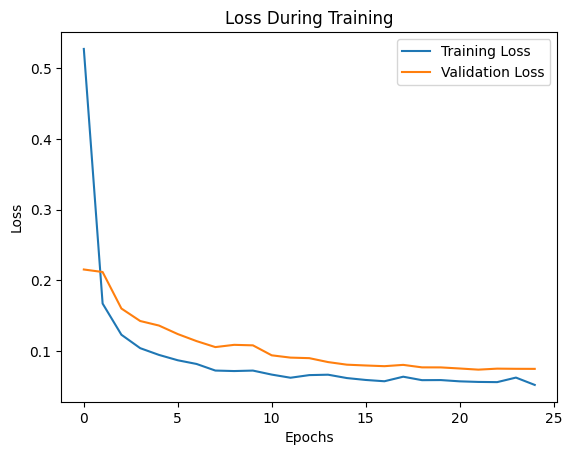

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tyler Burguillos 10/11/24

#### Model 3: Three Layer Fully-Connected Neural Network (FNN)

This is our third model, a simple Fully-Connected Neural Network (FNN) with three hidden layers consisting of 50 neurons, 25 neurons, 15 neurons, and a ReLU activation function. We also implement **early stopping** to prevent overfitting and **model checkpointing** to save the best-performing model during training.

##### Key Features:
- **Hidden Layer 1**: 50 neurons with ReLU activation.
- **Hidden Layer 2**: 25 neurons with ReLU activation.
- **Hidden Layer 3**: 15 neurons with ReLU activation.
- **Output Layer**: Single neuron for regression (predicting house prices).
- **Optimizer**: Adam optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
model.add(Input(shape=(X_text_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dense(75, activation='tanh'))
model.add(Dropout(0.1)) # Dropout Layer 1
model.add(Dense(50, activation='tanh')) # Hidden layer 1
#model.add(BatchNormalization())
model.add(Dense(25, activation='tanh')) # Hidden Layer 2
#model.add(BatchNormalization())
model.add(Dense(15, activation='tanh')) # Hidden Layer 3
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Tyler Burguillos 10/11/24

**Implementing Early Stopping and Model Checkpointing**

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_tyler_22.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Tyler Burguillos 10/11/24

**Training the FNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    X_text_train, y_train,
    validation_data=(X_text_test, y_test), # Use validation data to monitor the training
    epochs=100,       # Maximum number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback] # Include both callbacks
)

# Tyler Burguillos 10/11/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.31041, saving model to fnn_model_tyler_22.keras
11/11 - 4s - 324ms/step - loss: 0.3366 - val_loss: 0.3104
Epoch 2/100

Epoch 2: val_loss improved from 0.31041 to 0.18423, saving model to fnn_model_tyler_22.keras
11/11 - 0s - 30ms/step - loss: 0.1572 - val_loss: 0.1842
Epoch 3/100

Epoch 3: val_loss did not improve from 0.18423
11/11 - 0s - 21ms/step - loss: 0.1105 - val_loss: 0.1960
Epoch 4/100

Epoch 4: val_loss improved from 0.18423 to 0.18048, saving model to fnn_model_tyler_22.keras
11/11 - 0s - 12ms/step - loss: 0.0889 - val_loss: 0.1805
Epoch 5/100

Epoch 5: val_loss improved from 0.18048 to 0.13797, saving model to fnn_model_tyler_22.keras
11/11 - 0s - 11ms/step - loss: 0.0886 - val_loss: 0.1380
Epoch 6/100

Epoch 6: val_loss improved from 0.13797 to 0.12808, saving model to fnn_model_tyler_22.keras
11/11 - 0s - 12ms/step - loss: 0.0940 - val_loss: 0.1281
Epoch 7/100

Epoch 7: val_loss did not improve from 0.12808
11/11 - 0s 

**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

# Tyler Burguillos 10/11/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Test RMSE: 120633.5390625


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')

# Tyler Burguillos 10/11/24

R-squared Score: 0.66


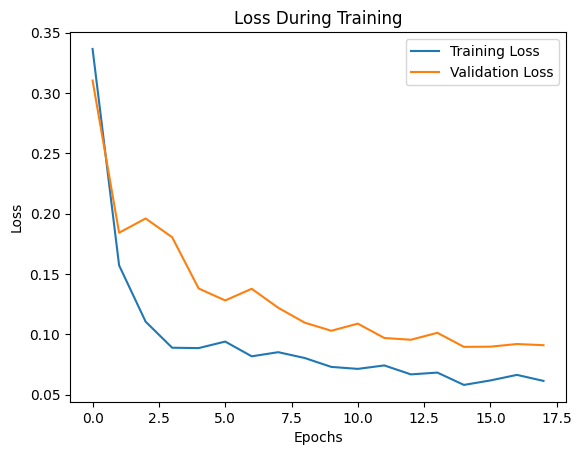

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tyler Burguillos 10/11/24

### FNN Model Design and Testing (Sigmoid and Adam) (Austin Nolte)

#### Model 1: Fully-Connected Neural Network for sigmoid and adam (FNN)

This is our first model, a simple Fully-Connected Neural Network (FNN) with one hidden layer consisting of 128 neurons and a Sigmoid activation function. We also implement **early stopping** to prevent overfitting and **model checkpointing** to save the best-performing model during training.

##### Key Features:
- **Hidden Layer**: 128 neurons with Sigmoid activation.
- **Output Layer**: Single neuron for regression (predicting house prices).
- **Optimizer**: Adam optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
# Input
model.add(Input(shape=(X_text_train.shape[1],)))

model.add(Dense(128, activation='sigmoid'))

# Output
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

# Austin Nolte 10/19/24

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_Austin_sigmoidAdam_1.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Austin Nolte 10/19/24

In [ ]:
# Fitting model

history = model.fit(X_text_train, y_train,validation_data=(X_text_test, y_test),epochs=100,batch_size=32,verbose=2,callbacks=[early_stopping_callback, checkpoint_callback])

# Austin Nolte 10/19/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.26732, saving model to fnn_model_Austin_sigmoidAdam_1.keras
11/11 - 3s - 273ms/step - loss: 0.2991 - val_loss: 0.2673
Epoch 2/100

Epoch 2: val_loss improved from 0.26732 to 0.23128, saving model to fnn_model_Austin_sigmoidAdam_1.keras
11/11 - 0s - 27ms/step - loss: 0.2717 - val_loss: 0.2313
Epoch 3/100

Epoch 3: val_loss improved from 0.23128 to 0.21260, saving model to fnn_model_Austin_sigmoidAdam_1.keras
11/11 - 0s - 16ms/step - loss: 0.2536 - val_loss: 0.2126
Epoch 4/100

Epoch 4: val_loss improved from 0.21260 to 0.20138, saving model to fnn_model_Austin_sigmoidAdam_1.keras
11/11 - 0s - 24ms/step - loss: 0.2324 - val_loss: 0.2014
Epoch 5/100

Epoch 5: val_loss improved from 0.20138 to 0.18514, saving model to fnn_model_Austin_sigmoidAdam_1.keras
11/11 - 0s - 27ms/step - loss: 0.2102 - val_loss: 0.1851
Epoch 6/100

Epoch 6: val_loss improved from 0.18514 to 0.17279, saving model to fnn_model_Austin_sigmoidAdam_1.keras
11/11 - 0s

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

# Austin Nolte 10/19/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Test RMSE: 123680.4765625


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.8f}')

# Austin Nolte 10/19/24

R-squared Score: 0.64314324


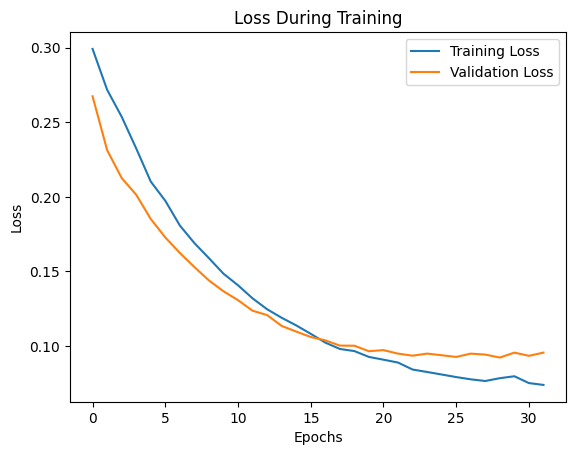

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Ausitn Nolte 10/19/24

#### Model 2: Baseline Fully-Connected Neural Network for sigmoid and adam (FNN)

This is our second model, a simple Fully-Connected Neural Network (FNN) with one hidden layer consisting of 64 neurons and a sigmoid activation function. We also implement **early stopping** to prevent overfitting and **model checkpointing** to save the best-performing model during training.

##### Key Features:
- **Hidden Layer**: 64 neurons with Sigmoid activation.
- **Output Layer**: Single neuron for regression (predicting house prices).
- **Optimizer**: adam optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
# Input
model.add(Input(shape=(X_text_train.shape[1],)))

model.add(Dense(64, activation='sigmoid'))

# Output
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

# Austin Nolte 10/19/24

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_Austin_sigmoidAdam_2.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Austin Nolte 10/19/24

In [ ]:
# Fitting model

history = model.fit(X_text_train, y_train,validation_data=(X_text_test, y_test),epochs=100,batch_size=32,verbose=2,callbacks=[early_stopping_callback, checkpoint_callback])

# Austin Nolte 10/19/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.24212, saving model to fnn_model_Austin_sigmoidAdam_2.keras
11/11 - 3s - 317ms/step - loss: 0.3023 - val_loss: 0.2421
Epoch 2/100

Epoch 2: val_loss improved from 0.24212 to 0.23195, saving model to fnn_model_Austin_sigmoidAdam_2.keras
11/11 - 1s - 63ms/step - loss: 0.2751 - val_loss: 0.2319
Epoch 3/100

Epoch 3: val_loss improved from 0.23195 to 0.21575, saving model to fnn_model_Austin_sigmoidAdam_2.keras
11/11 - 0s - 14ms/step - loss: 0.2548 - val_loss: 0.2157
Epoch 4/100

Epoch 4: val_loss improved from 0.21575 to 0.20214, saving model to fnn_model_Austin_sigmoidAdam_2.keras
11/11 - 0s - 7ms/step - loss: 0.2369 - val_loss: 0.2021
Epoch 5/100

Epoch 5: val_loss improved from 0.20214 to 0.19678, saving model to fnn_model_Austin_sigmoidAdam_2.keras
11/11 - 0s - 7ms/step - loss: 0.2255 - val_loss: 0.1968
Epoch 6/100

Epoch 6: val_loss improved from 0.19678 to 0.18252, saving model to fnn_model_Austin_sigmoidAdam_2.keras
11/11 - 0s -

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

# Austin Nolte 10/19/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Test RMSE: 121361.8359375


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.8f}')

# Austin Nolte 10/19/24

R-squared Score: 0.65639782


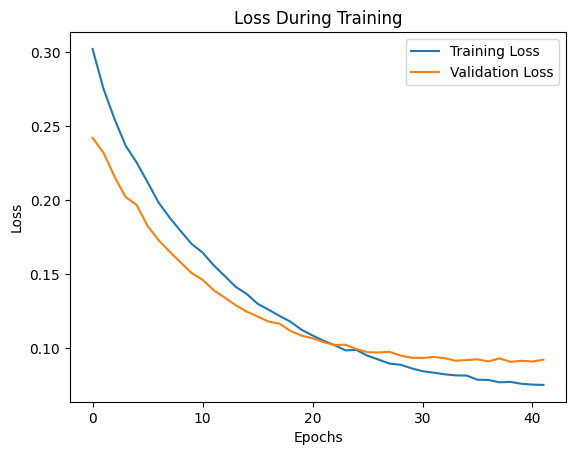

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Ausitn Nolte 10/19/24

#### Model 3: Baseline Fully-Connected Neural Network for sigmoid and adam (FNN)

This is our third model, a simple Fully-Connected Neural Network (FNN) with one hidden layer consisting of 32 neurons and a sigmoid activation function. We also implement **early stopping** to prevent overfitting and **model checkpointing** to save the best-performing model during training.

##### Key Features:
- **Hidden Layer**: 32 neurons with sigmoid activation.
- **Output Layer**: Single neuron for regression (predicting house prices).
- **Optimizer**: adam optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
# Input
model.add(Input(shape=(X_text_train.shape[1],)))

model.add(Dense(32, activation='sigmoid'))

# Output
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

# Austin Nolte 10/19/24

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_Austin_sigmoidAdam_3.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Austin Nolte 10/19/24

In [ ]:
# Fitting model

history = model.fit(X_text_train, y_train,validation_data=(X_text_test, y_test),epochs=100,batch_size=32,verbose=2,callbacks=[early_stopping_callback, checkpoint_callback])

# Austin Nolte 10/19/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.24268, saving model to fnn_model_Austin_sigmoidAdam_3.keras
11/11 - 2s - 174ms/step - loss: 0.2842 - val_loss: 0.2427
Epoch 2/100

Epoch 2: val_loss improved from 0.24268 to 0.23148, saving model to fnn_model_Austin_sigmoidAdam_3.keras
11/11 - 1s - 119ms/step - loss: 0.2595 - val_loss: 0.2315
Epoch 3/100

Epoch 3: val_loss improved from 0.23148 to 0.22041, saving model to fnn_model_Austin_sigmoidAdam_3.keras
11/11 - 0s - 13ms/step - loss: 0.2470 - val_loss: 0.2204
Epoch 4/100

Epoch 4: val_loss improved from 0.22041 to 0.21107, saving model to fnn_model_Austin_sigmoidAdam_3.keras
11/11 - 0s - 14ms/step - loss: 0.2348 - val_loss: 0.2111
Epoch 5/100

Epoch 5: val_loss improved from 0.21107 to 0.20229, saving model to fnn_model_Austin_sigmoidAdam_3.keras
11/11 - 0s - 7ms/step - loss: 0.2238 - val_loss: 0.2023
Epoch 6/100

Epoch 6: val_loss improved from 0.20229 to 0.19302, saving model to fnn_model_Austin_sigmoidAdam_3.keras
11/11 - 0s

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

# Austin Nolte 10/19/24

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Test RMSE: 122848.7734375


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.8f}')

# Austin Nolte 10/19/24

R-squared Score: 0.64792657


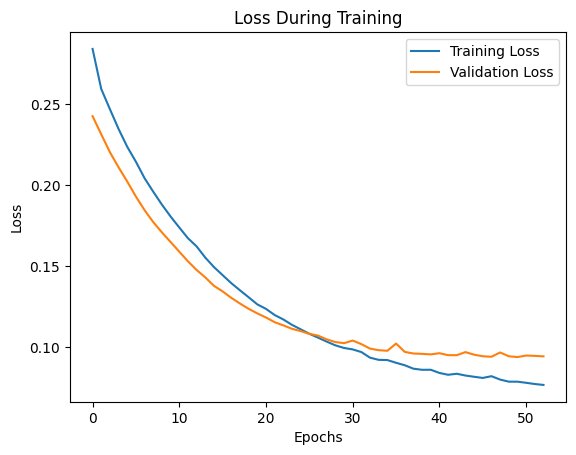

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Ausitn Nolte 10/19/24

#### Model 4: Baseline Fully-Connected Neural Network for sigmoid and adam (FNN)

This is our fourth model, a simple Fully-Connected Neural Network (FNN) with one hidden layer consisting of 16 neurons and a sigmoid activation function. We also implement **early stopping** to prevent overfitting and **model checkpointing** to save the best-performing model during training.

##### Key Features:
- **Hidden Layer**: 16 neurons with sigmoid activation.
- **Output Layer**: Single neuron for regression (predicting house prices).
- **Optimizer**: adam optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
# Input
model.add(Input(shape=(X_text_train.shape[1],)))

model.add(Dense(16, activation='sigmoid'))

# Output
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

# Austin Nolte 10/19/24

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_Austin_sigmoidAdam_4.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Austin Nolte 10/19/24

In [ ]:
# Fitting model

history = model.fit(X_text_train, y_train,validation_data=(X_text_test, y_test),epochs=100,batch_size=32,verbose=2,callbacks=[early_stopping_callback, checkpoint_callback])

# Austin Nolte 10/19/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.24043, saving model to fnn_model_Austin_sigmoidAdam_4.keras
11/11 - 2s - 203ms/step - loss: 0.2800 - val_loss: 0.2404
Epoch 2/100

Epoch 2: val_loss improved from 0.24043 to 0.23386, saving model to fnn_model_Austin_sigmoidAdam_4.keras
11/11 - 1s - 113ms/step - loss: 0.2718 - val_loss: 0.2339
Epoch 3/100

Epoch 3: val_loss improved from 0.23386 to 0.22734, saving model to fnn_model_Austin_sigmoidAdam_4.keras
11/11 - 0s - 12ms/step - loss: 0.2640 - val_loss: 0.2273
Epoch 4/100

Epoch 4: val_loss improved from 0.22734 to 0.22139, saving model to fnn_model_Austin_sigmoidAdam_4.keras
11/11 - 0s - 6ms/step - loss: 0.2572 - val_loss: 0.2214
Epoch 5/100

Epoch 5: val_loss improved from 0.22139 to 0.21631, saving model to fnn_model_Austin_sigmoidAdam_4.keras
11/11 - 0s - 15ms/step - loss: 0.2506 - val_loss: 0.2163
Epoch 6/100

Epoch 6: val_loss improved from 0.21631 to 0.21073, saving model to fnn_model_Austin_sigmoidAdam_4.keras
11/11 - 0s

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

# Austin Nolte 10/19/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Test RMSE: 123698.578125


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.8f}')

# Austin Nolte 10/19/24

R-squared Score: 0.64303875


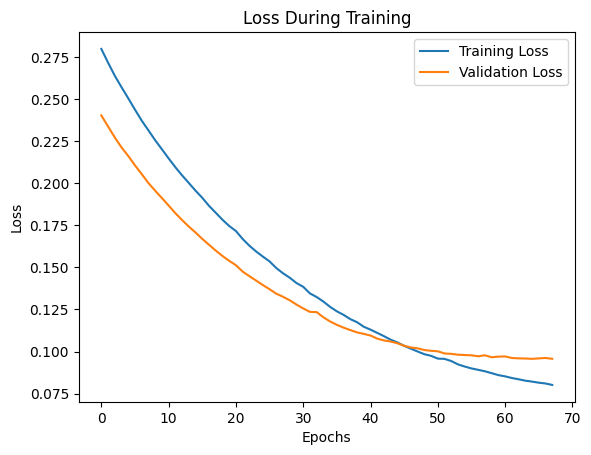

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Ausitn Nolte 10/19/24

#### Model 5: Baseline Fully-Connected Neural Network for Sigmoid and Adam (FNN)

This is our fifth model, a simple Fully-Connected Neural Network (FNN) with one hidden layer consisting of 8 neurons and a sigmoid activation function. We also implement **early stopping** to prevent overfitting and **model checkpointing** to save the best-performing model during training.

##### Key Features:
- **Hidden Layer**: 8 neurons with sigmoid activation.
- **Output Layer**: Single neuron for regression (predicting house prices).
- **Optimizer**: adam optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
# Input
model.add(Input(shape=(X_text_train.shape[1],)))

model.add(Dense(8, activation='sigmoid'))

# Output
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

# Austin Nolte 10/19/24

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_Austin_sigmoidAdam_5.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Austin Nolte 10/19/24

In [ ]:
# Fitting model

history = model.fit(X_text_train, y_train,validation_data=(X_text_test, y_test),epochs=100,batch_size=32,verbose=2,callbacks=[early_stopping_callback, checkpoint_callback])

# Austin Nolte 10/19/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.48766, saving model to fnn_model_Austin_sigmoidAdam_5.keras
11/11 - 4s - 386ms/step - loss: 0.5699 - val_loss: 0.4877
Epoch 2/100

Epoch 2: val_loss improved from 0.48766 to 0.42913, saving model to fnn_model_Austin_sigmoidAdam_5.keras
11/11 - 0s - 21ms/step - loss: 0.5016 - val_loss: 0.4291
Epoch 3/100

Epoch 3: val_loss improved from 0.42913 to 0.38330, saving model to fnn_model_Austin_sigmoidAdam_5.keras
11/11 - 0s - 26ms/step - loss: 0.4443 - val_loss: 0.3833
Epoch 4/100

Epoch 4: val_loss improved from 0.38330 to 0.34651, saving model to fnn_model_Austin_sigmoidAdam_5.keras
11/11 - 0s - 20ms/step - loss: 0.4021 - val_loss: 0.3465
Epoch 5/100

Epoch 5: val_loss improved from 0.34651 to 0.31985, saving model to fnn_model_Austin_sigmoidAdam_5.keras
11/11 - 0s - 20ms/step - loss: 0.3690 - val_loss: 0.3198
Epoch 6/100

Epoch 6: val_loss improved from 0.31985 to 0.30227, saving model to fnn_model_Austin_sigmoidAdam_5.keras
11/11 - 0s

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

# Austin Nolte 10/19/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Test RMSE: 122809.6015625


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.8f}')

# Austin Nolte 10/19/24

R-squared Score: 0.64815104


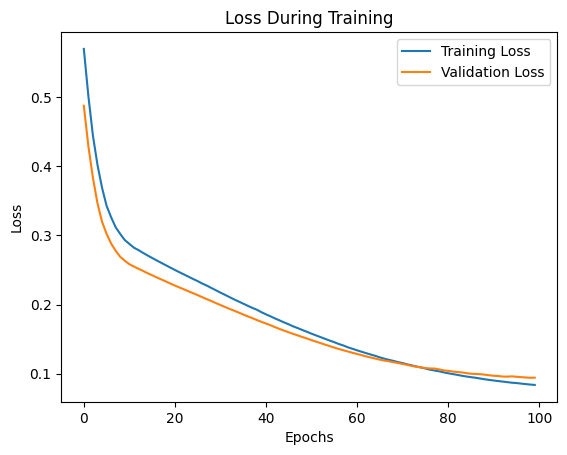

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Ausitn Nolte 10/19/24

#### Model 6: Baseline Fully-Connected Neural Network for Sigmoid and Adam (FNN)

This is our sixth model, a simple Fully-Connected Neural Network (FNN) with one hidden layer consisting of 4 neurons and a Sigmoid activation function. We also implement **early stopping** to prevent overfitting and **model checkpointing** to save the best-performing model during training.

##### Key Features:
- **Hidden Layer**: 4 neurons with Sigmoid activation.
- **Output Layer**: Single neuron for regression (predicting house prices).
- **Optimizer**: Adam optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
# Input
model.add(Input(shape=(X_text_train.shape[1],)))

model.add(Dense(4, activation='sigmoid'))

# Output
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

# Austin Nolte 10/19/24

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_Austin_sigmoidAdam_6.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Austin Nolte 10/19/24

In [ ]:
# Fitting model

history = model.fit(X_text_train, y_train,validation_data=(X_text_test, y_test),epochs=100,batch_size=32,verbose=2,callbacks=[early_stopping_callback, checkpoint_callback])

# Austin Nolte 10/19/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.78107, saving model to fnn_model_Austin_sigmoidAdam_6.keras
11/11 - 2s - 224ms/step - loss: 0.8440 - val_loss: 0.7811
Epoch 2/100

Epoch 2: val_loss improved from 0.78107 to 0.71442, saving model to fnn_model_Austin_sigmoidAdam_6.keras
11/11 - 1s - 89ms/step - loss: 0.7733 - val_loss: 0.7144
Epoch 3/100

Epoch 3: val_loss improved from 0.71442 to 0.65526, saving model to fnn_model_Austin_sigmoidAdam_6.keras
11/11 - 0s - 12ms/step - loss: 0.7111 - val_loss: 0.6553
Epoch 4/100

Epoch 4: val_loss improved from 0.65526 to 0.60218, saving model to fnn_model_Austin_sigmoidAdam_6.keras
11/11 - 0s - 6ms/step - loss: 0.6547 - val_loss: 0.6022
Epoch 5/100

Epoch 5: val_loss improved from 0.60218 to 0.55485, saving model to fnn_model_Austin_sigmoidAdam_6.keras
11/11 - 0s - 8ms/step - loss: 0.6045 - val_loss: 0.5549
Epoch 6/100

Epoch 6: val_loss improved from 0.55485 to 0.51250, saving model to fnn_model_Austin_sigmoidAdam_6.keras
11/11 - 0s -

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

# Austin Nolte 10/19/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
Test RMSE: 139241.796875


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.8f}')

# Austin Nolte 10/19/24

R-squared Score: 0.54769552


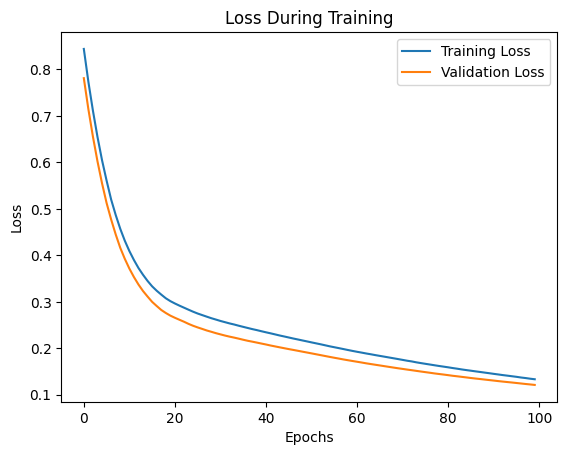

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Ausitn Nolte 10/19/24

#### Model 7: Baseline Fully-Connected Neural Network for sigmoid and adam (FNN)

This is our seventh model, a simple Fully-Connected Neural Network (FNN) with four hidden layers consisting of 64,48,32 neurons and a sigmoid activation function. We also implement **early stopping** to prevent overfitting and **model checkpointing** to save the best-performing model during training.

##### Key Features:
- **Hidden Layers**: (1):64 neurons with Sigmoid activation. (2): 48 neurons. (3): Dropout at 0.1 rate. (4): 32 neurons with Sigmoid activation
- **Output Layer**: Single neuron for regression (predicting house prices).
- **Optimizer**: adam optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
# Input
model.add(Input(shape=(X_text_train.shape[1],)))

model.add(Dense(64, activation='sigmoid'))
model.add(Dense(48))
model.add(Dropout(0.1))
model.add(Dense(32,activation='sigmoid'))

# Output
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

# Austin Nolte 10/19/24

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_Austin_sigmoidAdam_7.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Austin Nolte 10/19/24

In [ ]:
# Fitting model

history = model.fit(X_text_train, y_train,validation_data=(X_text_test, y_test),epochs=100,batch_size=32,verbose=2,callbacks=[early_stopping_callback, checkpoint_callback])

# Austin Nolte 10/19/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 1.28929, saving model to fnn_model_Austin_sigmoidAdam_7.keras
11/11 - 7s - 641ms/step - loss: 3.3648 - val_loss: 1.2893
Epoch 2/100

Epoch 2: val_loss improved from 1.28929 to 0.28157, saving model to fnn_model_Austin_sigmoidAdam_7.keras
11/11 - 0s - 29ms/step - loss: 0.7750 - val_loss: 0.2816
Epoch 3/100

Epoch 3: val_loss did not improve from 0.28157
11/11 - 0s - 27ms/step - loss: 0.3178 - val_loss: 0.3183
Epoch 4/100

Epoch 4: val_loss did not improve from 0.28157
11/11 - 0s - 25ms/step - loss: 0.3470 - val_loss: 0.2997
Epoch 5/100

Epoch 5: val_loss improved from 0.28157 to 0.25890, saving model to fnn_model_Austin_sigmoidAdam_7.keras
11/11 - 0s - 43ms/step - loss: 0.3039 - val_loss: 0.2589
Epoch 6/100

Epoch 6: val_loss improved from 0.25890 to 0.25588, saving model to fnn_model_Austin_sigmoidAdam_7.keras
11/11 - 1s - 48ms/step - loss: 0.2914 - val_loss: 0.2559
Epoch 7/100

Epoch 7: val_loss improved from 0.25588 to 0.25239, savi

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

# Austin Nolte 10/19/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step
Test RMSE: 120894.203125


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.8f}')

# Austin Nolte 10/19/24

R-squared Score: 0.65904069


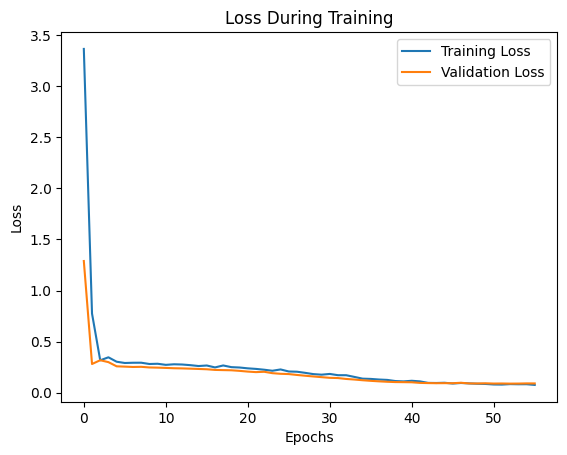

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Ausitn Nolte 10/19/24

#### Model 8: Baseline Fully-Connected Neural Network for sigmoid and adam (FNN)

This is our eigth model, a simple Fully-Connected Neural Network (FNN) with five hidden layers consisting of 64,48,32,16 neurons and a sigmoid activation function. We also implement **early stopping** to prevent overfitting and **model checkpointing** to save the best-performing model during training.

##### Key Features:
- **Hidden Layers**: (1):64 neurons with Sigmoid activation. (2): 48 neurons. (3): Dropout at 0.1 rate. (4): 32 neurons with Sigmoid activation. (5): 16 neurons
- **Output Layer**: Single neuron for regression (predicting house prices).
- **Optimizer**: adam optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
# Input
model.add(Input(shape=(X_text_train.shape[1],)))

model.add(Dense(64, activation='sigmoid'))
model.add(Dense(48))
model.add(Dropout(0.1))
model.add(Dense(32,activation='sigmoid'))
model.add(Dense(16))


# Output
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

# Austin Nolte 10/19/24

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_Austin_sigmoidAdam_8.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Austin Nolte 10/19/24

In [ ]:
# Fitting model

history = model.fit(X_text_train, y_train,validation_data=(X_text_test, y_test),epochs=100,batch_size=32,verbose=2,callbacks=[early_stopping_callback, checkpoint_callback])

# Austin Nolte 10/19/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.25662, saving model to fnn_model_Austin_sigmoidAdam_8.keras
11/11 - 3s - 305ms/step - loss: 0.2989 - val_loss: 0.2566
Epoch 2/100

Epoch 2: val_loss improved from 0.25662 to 0.24803, saving model to fnn_model_Austin_sigmoidAdam_8.keras
11/11 - 0s - 8ms/step - loss: 0.2851 - val_loss: 0.2480
Epoch 3/100

Epoch 3: val_loss improved from 0.24803 to 0.23754, saving model to fnn_model_Austin_sigmoidAdam_8.keras
11/11 - 0s - 14ms/step - loss: 0.2742 - val_loss: 0.2375
Epoch 4/100

Epoch 4: val_loss improved from 0.23754 to 0.23522, saving model to fnn_model_Austin_sigmoidAdam_8.keras
11/11 - 0s - 9ms/step - loss: 0.2617 - val_loss: 0.2352
Epoch 5/100

Epoch 5: val_loss improved from 0.23522 to 0.21672, saving model to fnn_model_Austin_sigmoidAdam_8.keras
11/11 - 0s - 8ms/step - loss: 0.2572 - val_loss: 0.2167
Epoch 6/100

Epoch 6: val_loss improved from 0.21672 to 0.20584, saving model to fnn_model_Austin_sigmoidAdam_8.keras
11/11 - 0s - 

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

# Austin Nolte 10/19/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Test RMSE: 127479.765625


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.8f}')

# Austin Nolte 10/19/24

R-squared Score: 0.62088221


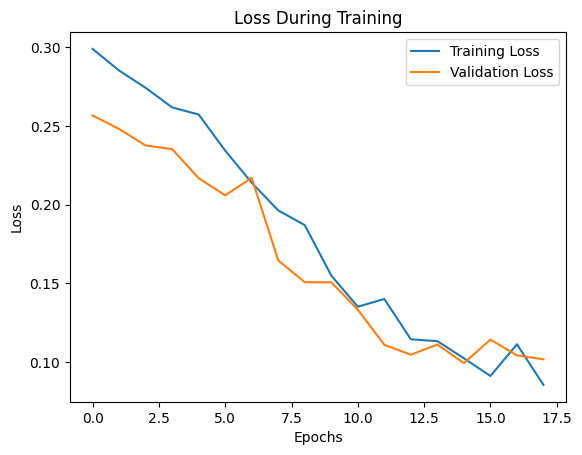

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Ausitn Nolte 10/19/24

#### Model 9: Baseline Fully-Connected Neural Network for sigmoid and adam (FNN)

This is our ninth model, a simple Fully-Connected Neural Network (FNN) with four hidden layers consisting of 64,48,32 neurons and a sigmoid activation function with adjusted learning rate of adam optimizer. We also implement **early stopping** to prevent overfitting and **model checkpointing** to save the best-performing model during training.

##### Key Features:
- **Hidden Layers**: (1):64 neurons with Sigmoid activation. (2): 48 neurons. (3): Dropout at 0.1 rate. (4): 32 neurons with Sigmoid activation
- **Output Layer**: Single neuron for regression (predicting house prices).
- **Optimizer**: adam optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
# Input
model.add(Input(shape=(X_text_train.shape[1],)))

model.add(Dense(64, activation='sigmoid'))
model.add(Dense(48))
model.add(Dropout(0.1))
model.add(Dense(32,activation='sigmoid'))

# Optimizer with increased learning rate
adam = Adam(learning_rate=0.01)

# Output
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer=adam)

# Austin Nolte 10/19/24

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_Austin_sigmoidAdam_9.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Austin Nolte 10/19/24

In [ ]:
# Fitting model

history = model.fit(X_text_train, y_train,validation_data=(X_text_test, y_test),epochs=100,batch_size=32,verbose=2,callbacks=[early_stopping_callback, checkpoint_callback])

# Austin Nolte 10/19/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.25631, saving model to fnn_model_Austin_sigmoidAdam_9.keras
11/11 - 8s - 698ms/step - loss: 0.3492 - val_loss: 0.2563
Epoch 2/100

Epoch 2: val_loss improved from 0.25631 to 0.21416, saving model to fnn_model_Austin_sigmoidAdam_9.keras
11/11 - 0s - 19ms/step - loss: 0.2753 - val_loss: 0.2142
Epoch 3/100

Epoch 3: val_loss improved from 0.21416 to 0.13079, saving model to fnn_model_Austin_sigmoidAdam_9.keras
11/11 - 0s - 26ms/step - loss: 0.1965 - val_loss: 0.1308
Epoch 4/100

Epoch 4: val_loss did not improve from 0.13079
11/11 - 0s - 22ms/step - loss: 0.1796 - val_loss: 0.1424
Epoch 5/100

Epoch 5: val_loss improved from 0.13079 to 0.10062, saving model to fnn_model_Austin_sigmoidAdam_9.keras
11/11 - 0s - 21ms/step - loss: 0.1046 - val_loss: 0.1006
Epoch 6/100

Epoch 6: val_loss did not improve from 0.10062
11/11 - 0s - 22ms/step - loss: 0.0880 - val_loss: 0.1261
Epoch 7/100

Epoch 7: val_loss did not improve from 0.10062
11/11 - 0

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

# Austin Nolte 10/19/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step
Test RMSE: 135202.78125


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.8f}')

# Austin Nolte 10/19/24

R-squared Score: 0.57355511


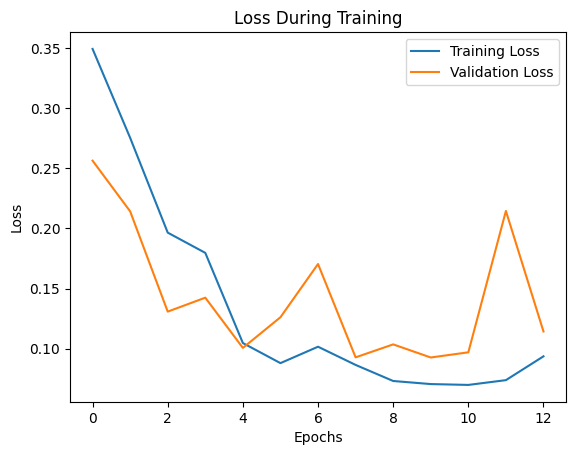

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Ausitn Nolte 10/19/24

#### Model 10: Baseline Fully-Connected Neural Network for sigmoid and adam (FNN)

This is our tenth model, a simple Fully-Connected Neural Network (FNN) with eight hidden layers consisting of 64,48,32,16,8,2 neurons with two dropout layers and a sigmoid activation function. We also implement **early stopping** to prevent overfitting and **model checkpointing** to save the best-performing model during training.

##### Key Features:
- **Hidden Layers**: (1):64 neurons with Sigmoid activation. (2): 48 neurons. (3): Dropout at 0.1 rate. (4): 32 neurons with Sigmoid activation. (5): 16 neurons. (6): 8 neurons with sigmoid activation. (7): Dropout at 0.01 rate. (8): 2 neurons
- **Output Layer**: Single neuron for regression (predicting house prices).
- **Optimizer**: adam optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
# Input
model.add(Input(shape=(X_text_train.shape[1],)))

model.add(Dense(64, activation='sigmoid'))
model.add(Dense(48))
model.add(Dropout(0.1))
model.add(Dense(32,activation='sigmoid'))
model.add(Dense(16))
model.add(Dense(8, activation ='sigmoid'))
model.add(Dropout(0.01))
model.add(Dense(2))


# Output
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

# Austin Nolte 10/19/24

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_Austin_sigmoidAdam_10.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Austin Nolte 10/19/24

In [ ]:
# Fitting model

history = model.fit(X_text_train, y_train,validation_data=(X_text_test, y_test),epochs=100,batch_size=32,verbose=2,callbacks=[early_stopping_callback, checkpoint_callback])

# Austin Nolte 10/19/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.26741, saving model to fnn_model_Austin_sigmoidAdam_10.keras
11/11 - 10s - 930ms/step - loss: 0.3075 - val_loss: 0.2674
Epoch 2/100

Epoch 2: val_loss did not improve from 0.26741
11/11 - 3s - 239ms/step - loss: 0.2998 - val_loss: 0.2696
Epoch 3/100

Epoch 3: val_loss improved from 0.26741 to 0.26524, saving model to fnn_model_Austin_sigmoidAdam_10.keras
11/11 - 0s - 34ms/step - loss: 0.2998 - val_loss: 0.2652
Epoch 4/100

Epoch 4: val_loss improved from 0.26524 to 0.26281, saving model to fnn_model_Austin_sigmoidAdam_10.keras
11/11 - 0s - 28ms/step - loss: 0.2999 - val_loss: 0.2628
Epoch 5/100

Epoch 5: val_loss improved from 0.26281 to 0.26101, saving model to fnn_model_Austin_sigmoidAdam_10.keras
11/11 - 0s - 25ms/step - loss: 0.2927 - val_loss: 0.2610
Epoch 6/100

Epoch 6: val_loss improved from 0.26101 to 0.25724, saving model to fnn_model_Austin_sigmoidAdam_10.keras
11/11 - 0s - 27ms/step - loss: 0.2949 - val_loss: 0.2572
Epoc

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

# Austin Nolte 10/19/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step
Test RMSE: 142573.765625


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.8f}')

# Austin Nolte 10/19/24

R-squared Score: 0.52578980


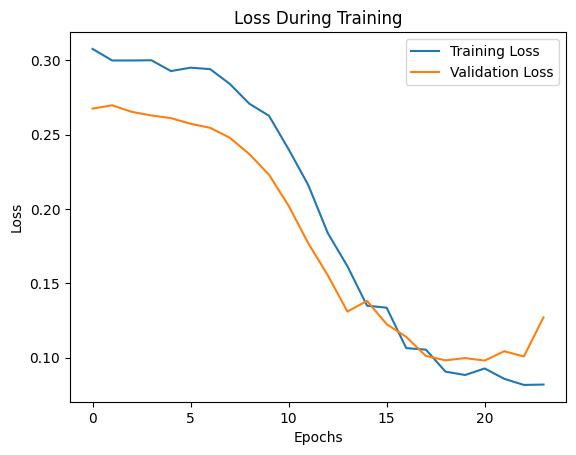

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Ausitn Nolte 10/19/24

# Best Sigmoid and Adam combo was Model 7 with R score of: 0.65904069 (Austin Nolte)

### FNN Model Design and Testing (Sigmoid and SGD) (Austin Nolte)

#### Model 1: Fully-Connected Neural Network for sigmoid and SGD (FNN)

This is our first model, a simple Fully-Connected Neural Network (FNN) with one hidden layer consisting of 128 neurons and a Sigmoid activation function. We also implement **early stopping** to prevent overfitting and **model checkpointing** to save the best-performing model during training.

##### Key Features:
- **Hidden Layer**: 128 neurons with Sigmoid activation.
- **Output Layer**: Single neuron for regression (predicting house prices).
- **Optimizer**: SGD optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
# Input
model.add(Input(shape=(X_text_train.shape[1],)))

model.add(Dense(128, activation='sigmoid'))

# Output
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer='sgd')

# Austin Nolte 10/20/24

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_Austin_sigmoidSGD_1.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Austin Nolte 10/20/24

In [ ]:
# Fitting model

history = model.fit(X_text_train, y_train,validation_data=(X_text_test, y_test),epochs=100,batch_size=32,verbose=2,callbacks=[early_stopping_callback, checkpoint_callback])

# Austin Nolte 10/20/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.42007, saving model to fnn_model_Austin_sigmoidSGD_1.keras
11/11 - 3s - 269ms/step - loss: 0.4398 - val_loss: 0.4201
Epoch 2/100

Epoch 2: val_loss improved from 0.42007 to 0.26449, saving model to fnn_model_Austin_sigmoidSGD_1.keras
11/11 - 0s - 17ms/step - loss: 0.3003 - val_loss: 0.2645
Epoch 3/100

Epoch 3: val_loss did not improve from 0.26449
11/11 - 0s - 12ms/step - loss: 0.2865 - val_loss: 0.2807
Epoch 4/100

Epoch 4: val_loss improved from 0.26449 to 0.25620, saving model to fnn_model_Austin_sigmoidSGD_1.keras
11/11 - 0s - 9ms/step - loss: 0.2936 - val_loss: 0.2562
Epoch 5/100

Epoch 5: val_loss did not improve from 0.25620
11/11 - 0s - 13ms/step - loss: 0.2886 - val_loss: 0.2631
Epoch 6/100

Epoch 6: val_loss did not improve from 0.25620
11/11 - 0s - 9ms/step - loss: 0.2787 - val_loss: 0.2889
Epoch 7/100

Epoch 7: val_loss did not improve from 0.25620
11/11 - 0s - 7ms/step - loss: 0.2830 - val_loss: 0.2733
Epoch 7: early s

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

# Austin Nolte 10/19/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Test RMSE: 209104.609375


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.8f}')

# Austin Nolte 10/19/24

R-squared Score: -0.02004385


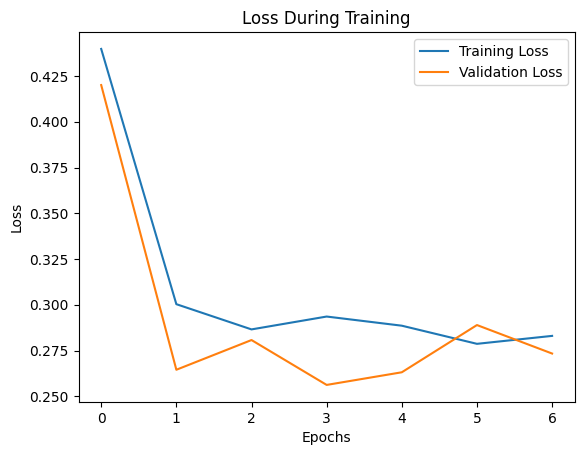

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Ausitn Nolte 10/19/24

#### Model 2: Baseline Fully-Connected Neural Network for sigmoid and SGD (FNN)

This is our second model, a simple Fully-Connected Neural Network (FNN) with one hidden layer consisting of 64 neurons and a sigmoid activation function. We also implement **early stopping** to prevent overfitting and **model checkpointing** to save the best-performing model during training.

##### Key Features:
- **Hidden Layer**: 64 neurons with Sigmoid activation.
- **Output Layer**: Single neuron for regression (predicting house prices).
- **Optimizer**: SGD optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
# Input
model.add(Input(shape=(X_text_train.shape[1],)))

model.add(Dense(64, activation='sigmoid'))

# Output
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer='sgd')

# Austin Nolte 10/20/24

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_Austin_sigmoidSGD_2.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Austin Nolte 10/20/24

In [ ]:
# Fitting model

history = model.fit(X_text_train, y_train,validation_data=(X_text_test, y_test),epochs=100,batch_size=32,verbose=2,callbacks=[early_stopping_callback, checkpoint_callback])

# Austin Nolte 10/20/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.28037, saving model to fnn_model_Austin_sigmoidSGD_2.keras
11/11 - 1s - 96ms/step - loss: 0.3365 - val_loss: 0.2804
Epoch 2/100

Epoch 2: val_loss did not improve from 0.28037
11/11 - 0s - 5ms/step - loss: 0.2978 - val_loss: 0.2820
Epoch 3/100

Epoch 3: val_loss improved from 0.28037 to 0.25734, saving model to fnn_model_Austin_sigmoidSGD_2.keras
11/11 - 0s - 6ms/step - loss: 0.2966 - val_loss: 0.2573
Epoch 4/100

Epoch 4: val_loss did not improve from 0.25734
11/11 - 0s - 5ms/step - loss: 0.2918 - val_loss: 0.2626
Epoch 5/100

Epoch 5: val_loss did not improve from 0.25734
11/11 - 0s - 14ms/step - loss: 0.2900 - val_loss: 0.2699
Epoch 6/100

Epoch 6: val_loss improved from 0.25734 to 0.25567, saving model to fnn_model_Austin_sigmoidSGD_2.keras
11/11 - 0s - 6ms/step - loss: 0.2837 - val_loss: 0.2557
Epoch 7/100

Epoch 7: val_loss did not improve from 0.25567
11/11 - 0s - 5ms/step - loss: 0.2814 - val_loss: 0.2687
Epoch 8/100

Epoch 

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

# Austin Nolte 10/20/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Test RMSE: 190234.65625


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.8f}')

# Austin Nolte 10/20/24

R-squared Score: 0.15575027


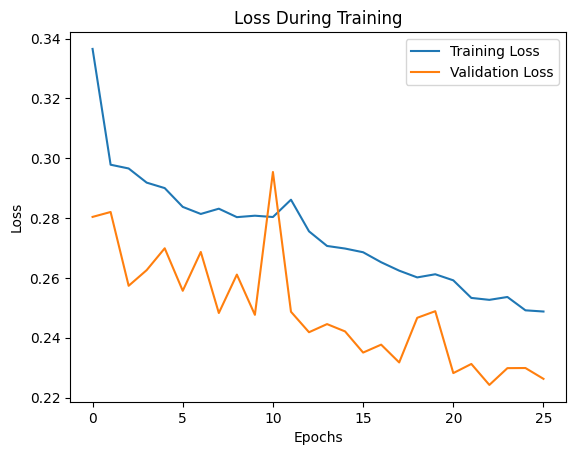

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Ausitn Nolte 10/20/24

#### Model 3: Baseline Fully-Connected Neural Network for sigmoid and SGD (FNN)

This is our third model, a simple Fully-Connected Neural Network (FNN) with one hidden layer consisting of 32 neurons and a sigmoid activation function. We also implement **early stopping** to prevent overfitting and **model checkpointing** to save the best-performing model during training.

##### Key Features:
- **Hidden Layer**: 32 neurons with sigmoid activation.
- **Output Layer**: Single neuron for regression (predicting house prices).
- **Optimizer**: SGD optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
# Input
model.add(Input(shape=(X_text_train.shape[1],)))

model.add(Dense(32, activation='sigmoid'))

# Output
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer='sgd')

# Austin Nolte 10/20/24

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_Austin_sigmoidSGD_3.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Austin Nolte 10/20/24

In [ ]:
# Fitting model

history = model.fit(X_text_train, y_train,validation_data=(X_text_test, y_test),epochs=100,batch_size=32,verbose=2,callbacks=[early_stopping_callback, checkpoint_callback])

# Austin Nolte 10/20/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.27994, saving model to fnn_model_Austin_sigmoidSGD_3.keras
11/11 - 1s - 92ms/step - loss: 0.3854 - val_loss: 0.2799
Epoch 2/100

Epoch 2: val_loss improved from 0.27994 to 0.27685, saving model to fnn_model_Austin_sigmoidSGD_3.keras
11/11 - 0s - 6ms/step - loss: 0.3200 - val_loss: 0.2768
Epoch 3/100

Epoch 3: val_loss did not improve from 0.27685
11/11 - 0s - 5ms/step - loss: 0.3178 - val_loss: 0.2774
Epoch 4/100

Epoch 4: val_loss improved from 0.27685 to 0.27334, saving model to fnn_model_Austin_sigmoidSGD_3.keras
11/11 - 0s - 8ms/step - loss: 0.3175 - val_loss: 0.2733
Epoch 5/100

Epoch 5: val_loss improved from 0.27334 to 0.27159, saving model to fnn_model_Austin_sigmoidSGD_3.keras
11/11 - 0s - 12ms/step - loss: 0.3143 - val_loss: 0.2716
Epoch 6/100

Epoch 6: val_loss improved from 0.27159 to 0.26849, saving model to fnn_model_Austin_sigmoidSGD_3.keras
11/11 - 0s - 6ms/step - loss: 0.3094 - val_loss: 0.2685
Epoch 7/100

Epoch 7:

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

# Austin Nolte 10/20/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Test RMSE: 174935.921875


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.8f}')

# Austin Nolte 10/20/24

R-squared Score: 0.28607988


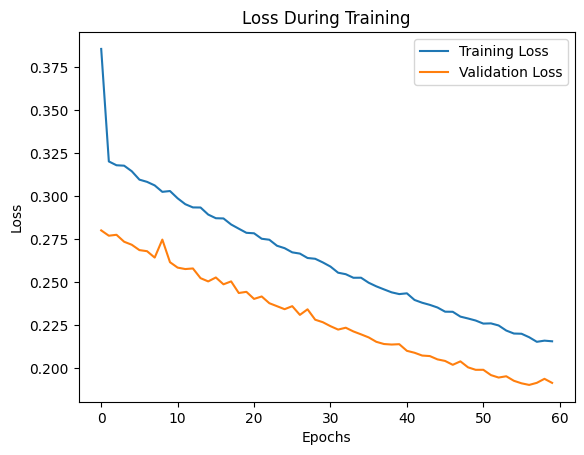

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Ausitn Nolte 10/20/24

#### Model 4: Baseline Fully-Connected Neural Network for sigmoid and SGD (FNN)

This is our fourth model, a simple Fully-Connected Neural Network (FNN) with one hidden layer consisting of 16 neurons and a sigmoid activation function. We also implement **early stopping** to prevent overfitting and **model checkpointing** to save the best-performing model during training.

##### Key Features:
- **Hidden Layer**: 16 neurons with sigmoid activation.
- **Output Layer**: Single neuron for regression (predicting house prices).
- **Optimizer**: SGD optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
# Input
model.add(Input(shape=(X_text_train.shape[1],)))

model.add(Dense(16, activation='sigmoid'))

# Output
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer='sgd')

# Austin Nolte 10/20/24

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_Austin_sigmoidSGD_4.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Austin Nolte 10/20/24

In [ ]:
# Fitting model

history = model.fit(X_text_train, y_train,validation_data=(X_text_test, y_test),epochs=100,batch_size=32,verbose=2,callbacks=[early_stopping_callback, checkpoint_callback])

# Austin Nolte 10/20/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.25973, saving model to fnn_model_Austin_sigmoidSGD_4.keras
11/11 - 1s - 88ms/step - loss: 0.2987 - val_loss: 0.2597
Epoch 2/100

Epoch 2: val_loss improved from 0.25973 to 0.25672, saving model to fnn_model_Austin_sigmoidSGD_4.keras
11/11 - 0s - 6ms/step - loss: 0.2853 - val_loss: 0.2567
Epoch 3/100

Epoch 3: val_loss improved from 0.25672 to 0.25467, saving model to fnn_model_Austin_sigmoidSGD_4.keras
11/11 - 0s - 6ms/step - loss: 0.2825 - val_loss: 0.2547
Epoch 4/100

Epoch 4: val_loss improved from 0.25467 to 0.25326, saving model to fnn_model_Austin_sigmoidSGD_4.keras
11/11 - 0s - 6ms/step - loss: 0.2811 - val_loss: 0.2533
Epoch 5/100

Epoch 5: val_loss improved from 0.25326 to 0.25285, saving model to fnn_model_Austin_sigmoidSGD_4.keras
11/11 - 0s - 8ms/step - loss: 0.2801 - val_loss: 0.2529
Epoch 6/100

Epoch 6: val_loss improved from 0.25285 to 0.25175, saving model to fnn_model_Austin_sigmoidSGD_4.keras
11/11 - 0s - 6ms/step

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

# Austin Nolte 10/20/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Test RMSE: 160755.84375


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.8f}')

# Austin Nolte 10/20/24

R-squared Score: 0.39712793


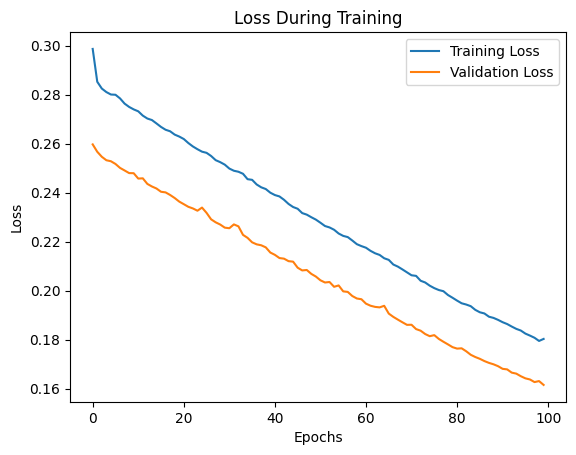

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Ausitn Nolte 10/20/24

#### Model 5: Baseline Fully-Connected Neural Network for Sigmoid and SGD (FNN)

This is our fifth model, a simple Fully-Connected Neural Network (FNN) with one hidden layer consisting of 8 neurons and a sigmoid activation function. We also implement **early stopping** to prevent overfitting and **model checkpointing** to save the best-performing model during training.

##### Key Features:
- **Hidden Layer**: 8 neurons with sigmoid activation.
- **Output Layer**: Single neuron for regression (predicting house prices).
- **Optimizer**: SGD optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
# Input
model.add(Input(shape=(X_text_train.shape[1],)))

model.add(Dense(8, activation='sigmoid'))

# Output
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer='sgd')

# Austin Nolte 10/20/24

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_Austin_sigmoiSGD_5.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Austin Nolte 10/20/24

In [ ]:
# Fitting model

history = model.fit(X_text_train, y_train,validation_data=(X_text_test, y_test),epochs=100,batch_size=32,verbose=2,callbacks=[early_stopping_callback, checkpoint_callback])

# Austin Nolte 10/20/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.30856, saving model to fnn_model_Austin_sigmoiSGD_5.keras
11/11 - 1s - 131ms/step - loss: 0.4179 - val_loss: 0.3086
Epoch 2/100

Epoch 2: val_loss improved from 0.30856 to 0.27328, saving model to fnn_model_Austin_sigmoiSGD_5.keras
11/11 - 0s - 6ms/step - loss: 0.3362 - val_loss: 0.2733
Epoch 3/100

Epoch 3: val_loss improved from 0.27328 to 0.26811, saving model to fnn_model_Austin_sigmoiSGD_5.keras
11/11 - 0s - 6ms/step - loss: 0.3122 - val_loss: 0.2681
Epoch 4/100

Epoch 4: val_loss improved from 0.26811 to 0.26731, saving model to fnn_model_Austin_sigmoiSGD_5.keras
11/11 - 0s - 7ms/step - loss: 0.3072 - val_loss: 0.2673
Epoch 5/100

Epoch 5: val_loss improved from 0.26731 to 0.26583, saving model to fnn_model_Austin_sigmoiSGD_5.keras
11/11 - 0s - 7ms/step - loss: 0.3052 - val_loss: 0.2658
Epoch 6/100

Epoch 6: val_loss improved from 0.26583 to 0.26453, saving model to fnn_model_Austin_sigmoiSGD_5.keras
11/11 - 0s - 14ms/step - l

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

# Austin Nolte 10/20/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Test RMSE: 168992.25


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.8f}')

# Austin Nolte 10/20/24

R-squared Score: 0.33376837


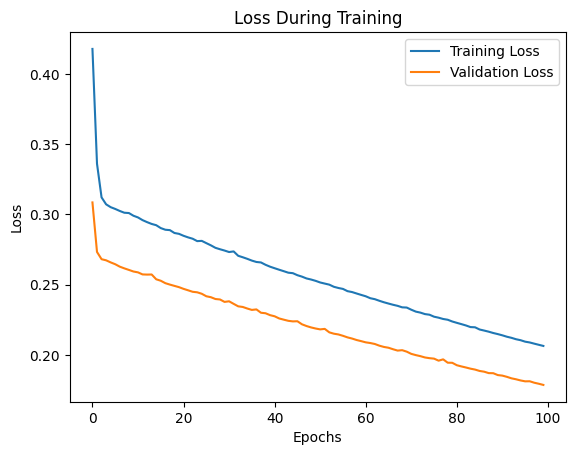

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Ausitn Nolte 10/20/24

#### Model 6: Baseline Fully-Connected Neural Network for Sigmoid and SGD (FNN)

This is our sixth model, a simple Fully-Connected Neural Network (FNN) with one hidden layer consisting of 4 neurons and a Sigmoid activation function. We also implement **early stopping** to prevent overfitting and **model checkpointing** to save the best-performing model during training.

##### Key Features:
- **Hidden Layer**: 4 neurons with Sigmoid activation.
- **Output Layer**: Single neuron for regression (predicting house prices).
- **Optimizer**: SGD optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
# Input
model.add(Input(shape=(X_text_train.shape[1],)))

model.add(Dense(4, activation='sigmoid'))

# Output
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer='sgd')

# Austin Nolte 10/20/24

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_Austin_sigmoidSGD_6.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Austin Nolte 10/20/24

In [ ]:
# Fitting model

history = model.fit(X_text_train, y_train,validation_data=(X_text_test, y_test),epochs=100,batch_size=32,verbose=2,callbacks=[early_stopping_callback, checkpoint_callback])

# Austin Nolte 10/20/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.55593, saving model to fnn_model_Austin_sigmoidSGD_6.keras
11/11 - 2s - 140ms/step - loss: 0.8643 - val_loss: 0.5559
Epoch 2/100

Epoch 2: val_loss improved from 0.55593 to 0.36022, saving model to fnn_model_Austin_sigmoidSGD_6.keras
11/11 - 0s - 13ms/step - loss: 0.4929 - val_loss: 0.3602
Epoch 3/100

Epoch 3: val_loss improved from 0.36022 to 0.28349, saving model to fnn_model_Austin_sigmoidSGD_6.keras
11/11 - 0s - 10ms/step - loss: 0.3578 - val_loss: 0.2835
Epoch 4/100

Epoch 4: val_loss improved from 0.28349 to 0.25824, saving model to fnn_model_Austin_sigmoidSGD_6.keras
11/11 - 0s - 10ms/step - loss: 0.3034 - val_loss: 0.2582
Epoch 5/100

Epoch 5: val_loss improved from 0.25824 to 0.25387, saving model to fnn_model_Austin_sigmoidSGD_6.keras
11/11 - 0s - 11ms/step - loss: 0.2858 - val_loss: 0.2539
Epoch 6/100

Epoch 6: val_loss improved from 0.25387 to 0.24529, saving model to fnn_model_Austin_sigmoidSGD_6.keras
11/11 - 0s - 8ms

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

# Austin Nolte 10/20/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Test RMSE: 175658.09375


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.8f}')

# Austin Nolte 10/20/24

R-squared Score: 0.28017330


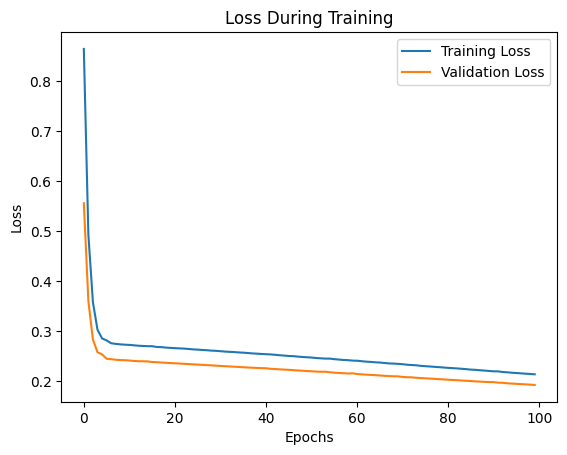

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Ausitn Nolte 10/20/24

#### Model 7: Baseline Fully-Connected Neural Network for sigmoid and SGD (FNN)

This is our seventh model, a simple Fully-Connected Neural Network (FNN) with four hidden layers consisting of 64,48,32 neurons and a sigmoid activation function. We also implement **early stopping** to prevent overfitting and **model checkpointing** to save the best-performing model during training.

##### Key Features:
- **Hidden Layers**: (1):64 neurons with Sigmoid activation. (2): 48 neurons. (3): Dropout at 0.1 rate. (4): 32 neurons with Sigmoid activation
- **Output Layer**: Single neuron for regression (predicting house prices).
- **Optimizer**: sgd optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
# Input
model.add(Input(shape=(X_text_train.shape[1],)))

model.add(Dense(64, activation='sigmoid'))
model.add(Dense(48))
model.add(Dropout(0.1))
model.add(Dense(32,activation='sigmoid'))

# Output
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer='sgd')

# Austin Nolte 10/20/24

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_Austin_sigmoidSGD_7.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Austin Nolte 10/20/24

In [ ]:
# Fitting model

history = model.fit(X_text_train, y_train,validation_data=(X_text_test, y_test),epochs=100,batch_size=32,verbose=2,callbacks=[early_stopping_callback, checkpoint_callback])

# Austin Nolte 10/20/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.27156, saving model to fnn_model_Austin_sigmoidSGD_7.keras
11/11 - 3s - 299ms/step - loss: 0.3137 - val_loss: 0.2716
Epoch 2/100

Epoch 2: val_loss improved from 0.27156 to 0.26525, saving model to fnn_model_Austin_sigmoidSGD_7.keras
11/11 - 0s - 7ms/step - loss: 0.3105 - val_loss: 0.2653
Epoch 3/100

Epoch 3: val_loss improved from 0.26525 to 0.26351, saving model to fnn_model_Austin_sigmoidSGD_7.keras
11/11 - 0s - 13ms/step - loss: 0.3048 - val_loss: 0.2635
Epoch 4/100

Epoch 4: val_loss did not improve from 0.26351
11/11 - 0s - 7ms/step - loss: 0.3099 - val_loss: 0.2651
Epoch 5/100

Epoch 5: val_loss did not improve from 0.26351
11/11 - 0s - 12ms/step - loss: 0.3138 - val_loss: 0.2650
Epoch 6/100

Epoch 6: val_loss did not improve from 0.26351
11/11 - 0s - 5ms/step - loss: 0.3072 - val_loss: 0.2690
Epoch 6: early stopping


In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

# Austin Nolte 10/20/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Test RMSE: 207422.828125


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.8f}')

# Austin Nolte 10/20/24

R-squared Score: -0.00370181


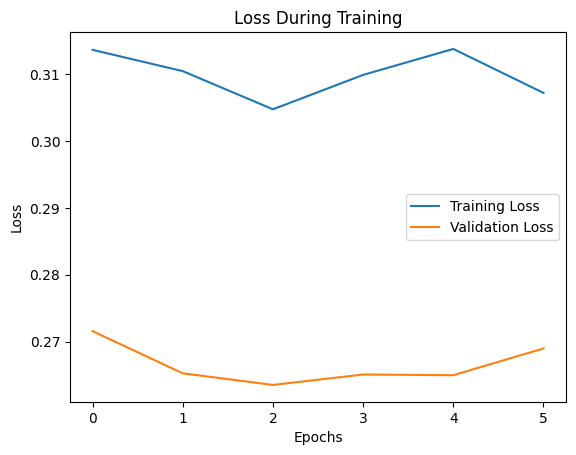

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Ausitn Nolte 10/20/24

#### Model 8: Baseline Fully-Connected Neural Network for sigmoid and SGD (FNN)

This is our eigth model, a simple Fully-Connected Neural Network (FNN) with five hidden layers consisting of 64,48,32,16 neurons and a sigmoid activation function. We also implement **early stopping** to prevent overfitting and **model checkpointing** to save the best-performing model during training.

##### Key Features:
- **Hidden Layers**: (1):64 neurons with Sigmoid activation. (2): 48 neurons. (3): Dropout at 0.1 rate. (4): 32 neurons with Sigmoid activation. (5): 16 neurons
- **Output Layer**: Single neuron for regression (predicting house prices).
- **Optimizer**: SGD optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
# Input
model.add(Input(shape=(X_text_train.shape[1],)))

model.add(Dense(64, activation='sigmoid'))
model.add(Dense(48))
model.add(Dropout(0.1))
model.add(Dense(32,activation='sigmoid'))
model.add(Dense(16))


# Output
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer='sgd')

# Austin Nolte 10/20/24

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_Austin_sigmoidSGD_8.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Austin Nolte 10/20/24

In [ ]:
# Fitting model

history = model.fit(X_text_train, y_train,validation_data=(X_text_test, y_test),epochs=100,batch_size=32,verbose=2,callbacks=[early_stopping_callback, checkpoint_callback])

# Austin Nolte 10/20/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.26671, saving model to fnn_model_Austin_sigmoidSGD_8.keras
11/11 - 2s - 190ms/step - loss: 0.3979 - val_loss: 0.2667
Epoch 2/100

Epoch 2: val_loss improved from 0.26671 to 0.26119, saving model to fnn_model_Austin_sigmoidSGD_8.keras
11/11 - 1s - 70ms/step - loss: 0.3006 - val_loss: 0.2612
Epoch 3/100

Epoch 3: val_loss did not improve from 0.26119
11/11 - 0s - 6ms/step - loss: 0.3019 - val_loss: 0.2625
Epoch 4/100

Epoch 4: val_loss improved from 0.26119 to 0.25889, saving model to fnn_model_Austin_sigmoidSGD_8.keras
11/11 - 0s - 16ms/step - loss: 0.3034 - val_loss: 0.2589
Epoch 5/100

Epoch 5: val_loss did not improve from 0.25889
11/11 - 0s - 8ms/step - loss: 0.3062 - val_loss: 0.2590
Epoch 6/100

Epoch 6: val_loss did not improve from 0.25889
11/11 - 0s - 6ms/step - loss: 0.3029 - val_loss: 0.2950
Epoch 7/100

Epoch 7: val_loss did not improve from 0.25889
11/11 - 0s - 8ms/step - loss: 0.2952 - val_loss: 0.2632
Epoch 7: early st

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

# Austin Nolte 10/20/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Test RMSE: 205203.5625


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.8f}')

# Austin Nolte 10/20/24

R-squared Score: 0.01766086


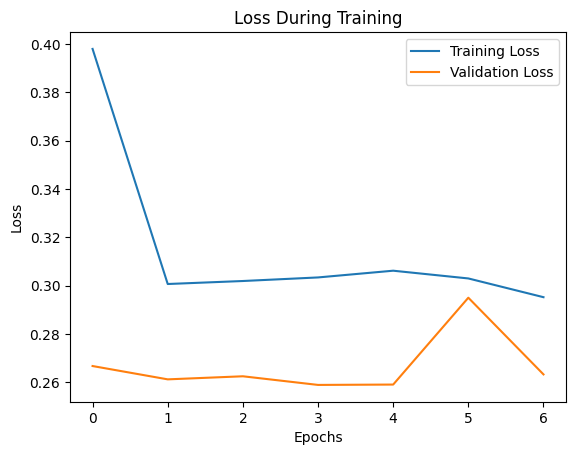

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Ausitn Nolte 10/20/24

#### Model 9: Baseline Fully-Connected Neural Network for sigmoid and SGD (FNN)

This is our ninth model, a simple Fully-Connected Neural Network (FNN) with four hidden layers consisting of 64,48,32 neurons and a sigmoid activation function with adjusted learning rate of sgd optimizer. We also implement **early stopping** to prevent overfitting and **model checkpointing** to save the best-performing model during training.

##### Key Features:
- **Hidden Layers**: (1):64 neurons with Sigmoid activation. (2): 48 neurons. (3): Dropout at 0.1 rate. (4): 32 neurons with Sigmoid activation
- **Output Layer**: Single neuron for regression (predicting house prices).
- **Optimizer**: SGD optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
# Input
model.add(Input(shape=(X_text_train.shape[1],)))

model.add(Dense(64, activation='sigmoid'))
model.add(Dense(48))
model.add(Dropout(0.1))
model.add(Dense(32,activation='sigmoid'))

# Optimizer with increased learning rate
sgd = SGD(learning_rate=0.005)

# Output
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer=sgd)

# Austin Nolte 10/20/24

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_Austin_sigmoidSGD_9.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Austin Nolte 10/20/24

In [ ]:
# Fitting model

history = model.fit(X_text_train, y_train,validation_data=(X_text_test, y_test),epochs=100,batch_size=32,verbose=2,callbacks=[early_stopping_callback, checkpoint_callback])

# Austin Nolte 10/20/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.28733, saving model to fnn_model_Austin_sigmoidSGD_9.keras
11/11 - 2s - 180ms/step - loss: 0.4054 - val_loss: 0.2873
Epoch 2/100

Epoch 2: val_loss improved from 0.28733 to 0.27588, saving model to fnn_model_Austin_sigmoidSGD_9.keras
11/11 - 1s - 80ms/step - loss: 0.3074 - val_loss: 0.2759
Epoch 3/100

Epoch 3: val_loss improved from 0.27588 to 0.26724, saving model to fnn_model_Austin_sigmoidSGD_9.keras
11/11 - 0s - 12ms/step - loss: 0.3077 - val_loss: 0.2672
Epoch 4/100

Epoch 4: val_loss improved from 0.26724 to 0.26594, saving model to fnn_model_Austin_sigmoidSGD_9.keras
11/11 - 0s - 14ms/step - loss: 0.2993 - val_loss: 0.2659
Epoch 5/100

Epoch 5: val_loss did not improve from 0.26594
11/11 - 0s - 11ms/step - loss: 0.3032 - val_loss: 0.2661
Epoch 6/100

Epoch 6: val_loss improved from 0.26594 to 0.26586, saving model to fnn_model_Austin_sigmoidSGD_9.keras
11/11 - 0s - 7ms/step - loss: 0.3071 - val_loss: 0.2659
Epoch 7/100

Epoc

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

# Austin Nolte 10/20/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Test RMSE: 207535.828125


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.8f}')

# Austin Nolte 10/20/24

R-squared Score: -0.00479579


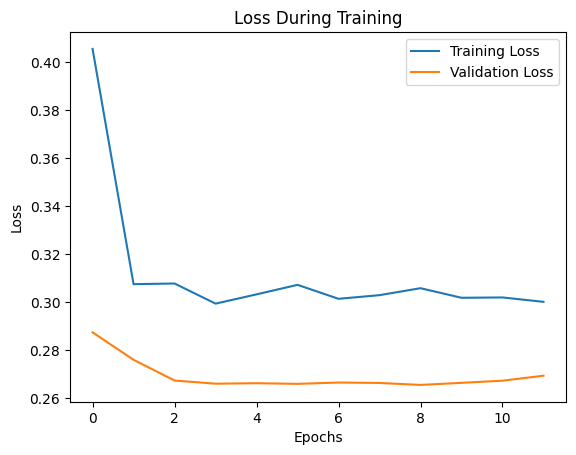

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Ausitn Nolte 10/20/24

#### Model 10: Baseline Fully-Connected Neural Network for sigmoid and SGD (FNN)

This is our tenth model, a simple Fully-Connected Neural Network (FNN) with eight hidden layers consisting of 64,48,32,16,8,2 neurons with two dropout layers and a sigmoid activation function. We also implement **early stopping** to prevent overfitting and **model checkpointing** to save the best-performing model during training.

##### Key Features:
- **Hidden Layers**: (1):64 neurons with Sigmoid activation. (2): 48 neurons. (3): Dropout at 0.1 rate. (4): 32 neurons with Sigmoid activation. (5): 16 neurons. (6): 8 neurons with sigmoid activation. (7): Dropout at 0.01 rate. (8): 2 neurons
- **Output Layer**: Single neuron for regression (predicting house prices).
- **Optimizer**: SGD optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
# Input
model.add(Input(shape=(X_text_train.shape[1],)))

model.add(Dense(64, activation='sigmoid'))
model.add(Dense(48))
model.add(Dropout(0.1))
model.add(Dense(32,activation='sigmoid'))
model.add(Dense(16))
model.add(Dense(8, activation ='sigmoid'))
model.add(Dropout(0.01))
model.add(Dense(2))


# Output
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer='sgd')

# Austin Nolte 10/20/24

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_Austin_sigmoidSGD_10.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Austin Nolte 10/20/24

In [ ]:
# Fitting model

history = model.fit(X_text_train, y_train,validation_data=(X_text_test, y_test),epochs=100,batch_size=32,verbose=2,callbacks=[early_stopping_callback, checkpoint_callback])

# Austin Nolte 10/20/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.27938, saving model to fnn_model_Austin_sigmoidSGD_10.keras
11/11 - 4s - 358ms/step - loss: 0.3294 - val_loss: 0.2794
Epoch 2/100

Epoch 2: val_loss improved from 0.27938 to 0.27104, saving model to fnn_model_Austin_sigmoidSGD_10.keras
11/11 - 0s - 7ms/step - loss: 0.3086 - val_loss: 0.2710
Epoch 3/100

Epoch 3: val_loss improved from 0.27104 to 0.27056, saving model to fnn_model_Austin_sigmoidSGD_10.keras
11/11 - 0s - 7ms/step - loss: 0.3051 - val_loss: 0.2706
Epoch 4/100

Epoch 4: val_loss improved from 0.27056 to 0.26960, saving model to fnn_model_Austin_sigmoidSGD_10.keras
11/11 - 0s - 9ms/step - loss: 0.3015 - val_loss: 0.2696
Epoch 5/100

Epoch 5: val_loss improved from 0.26960 to 0.26837, saving model to fnn_model_Austin_sigmoidSGD_10.keras
11/11 - 0s - 10ms/step - loss: 0.3045 - val_loss: 0.2684
Epoch 6/100

Epoch 6: val_loss did not improve from 0.26837
11/11 - 0s - 8ms/step - loss: 0.3036 - val_loss: 0.2715
Epoch 7/100

Ep

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

# Austin Nolte 10/20/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Test RMSE: 207858.21875


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.8f}')

# Austin Nolte 10/20/24

R-squared Score: -0.00792003


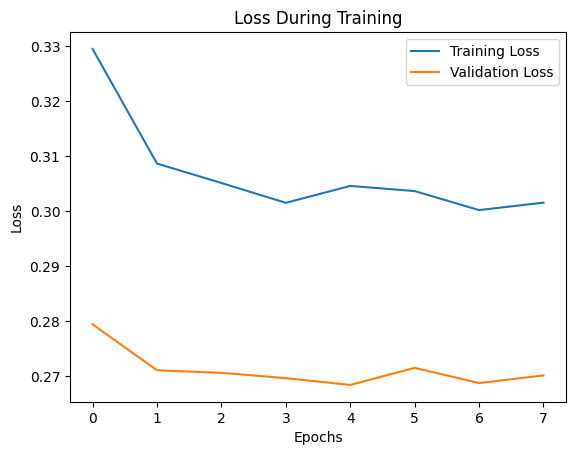

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Ausitn Nolte 10/20/24

# Best Sigmoid and SGD combo was Model 4 with R score of: 0.39712793 (Austin Nolte)

### FNN Model Design and Testing (Alan Lei)

#### Model 1: Baseline Fully-Connected Neural Network (FNN)

##### Key Features:


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
model.add(Input(shape=(X_text_train.shape[1],)))
model.add(Dense(100, activation='relu')) # Hidden layer 1
model.add(Dense(75, activation='relu')) # Hidden layer 2
model.add(Dense(50, activation='relu')) # Hidden layer 3
model.add(Dense(25, activation='relu')) # Hidden layer 4
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Alan Lei 10/17/24

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_alan_test.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

**Training the FNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    X_text_train, y_train,
    validation_data=(X_text_test, y_test), # Use validation data to monitor the training
    epochs=1000,       # Maximum number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback] # Include both callbacks
)


Epoch 1/1000

Epoch 1: val_loss improved from inf to 0.02581, saving model to fnn_model_alan_test.keras
11/11 - 0s - 42ms/step - loss: 0.0139 - val_loss: 0.0258
Epoch 2/1000

Epoch 2: val_loss improved from 0.02581 to 0.02519, saving model to fnn_model_alan_test.keras
11/11 - 0s - 33ms/step - loss: 0.0133 - val_loss: 0.0252
Epoch 3/1000

Epoch 3: val_loss did not improve from 0.02519
11/11 - 1s - 47ms/step - loss: 0.0134 - val_loss: 0.0285
Epoch 4/1000

Epoch 4: val_loss improved from 0.02519 to 0.02412, saving model to fnn_model_alan_test.keras
11/11 - 0s - 27ms/step - loss: 0.0135 - val_loss: 0.0241
Epoch 5/1000

Epoch 5: val_loss did not improve from 0.02412
11/11 - 0s - 17ms/step - loss: 0.0125 - val_loss: 0.0281
Epoch 6/1000

Epoch 6: val_loss did not improve from 0.02412
11/11 - 0s - 23ms/step - loss: 0.0130 - val_loss: 0.0248
Epoch 7/1000

Epoch 7: val_loss did not improve from 0.02412
11/11 - 0s - 11ms/step - loss: 0.0136 - val_loss: 0.0295
Epoch 7: early stopping


**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Test RMSE: 137491.859375


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')

R-squared Score: 0.56


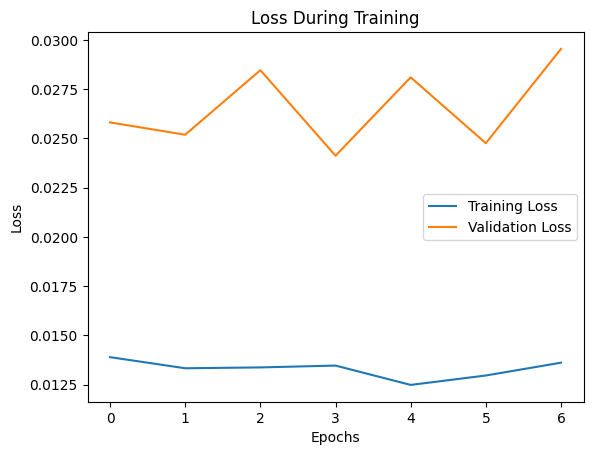

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Model 2: Fully-Connected Neural Network (FNN)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
model.add(Input(shape=(X_text_train.shape[1],)))
model.add(Dense(100, activation='relu')) # Hidden layer 1
model.add(Dense(75, activation='relu')) # Hidden layer 2
model.add(Dropout(0.1)) # Dropout Layer 1
model.add(Dense(50, activation='relu')) # Hidden layer 3
model.add(Dense(25, activation='relu')) # Hidden layer 4
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Alan Lei 10/17/24

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_alan_test2.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

**Training the FNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    X_text_train, y_train,
    validation_data=(X_text_test, y_test), # Use validation data to monitor the training
    epochs=1000,       # Maximum number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback] # Include both callbacks
)


Epoch 1/1000

Epoch 1: val_loss improved from inf to 0.07121, saving model to fnn_model_alan_test2.keras
11/11 - 4s - 330ms/step - loss: 0.1261 - val_loss: 0.0712
Epoch 2/1000

Epoch 2: val_loss improved from 0.07121 to 0.04103, saving model to fnn_model_alan_test2.keras
11/11 - 0s - 21ms/step - loss: 0.0741 - val_loss: 0.0410
Epoch 3/1000

Epoch 3: val_loss improved from 0.04103 to 0.03520, saving model to fnn_model_alan_test2.keras
11/11 - 0s - 25ms/step - loss: 0.0493 - val_loss: 0.0352
Epoch 4/1000

Epoch 4: val_loss improved from 0.03520 to 0.03315, saving model to fnn_model_alan_test2.keras
11/11 - 0s - 29ms/step - loss: 0.0336 - val_loss: 0.0331
Epoch 5/1000

Epoch 5: val_loss improved from 0.03315 to 0.02683, saving model to fnn_model_alan_test2.keras
11/11 - 0s - 18ms/step - loss: 0.0304 - val_loss: 0.0268
Epoch 6/1000

Epoch 6: val_loss did not improve from 0.02683
11/11 - 0s - 22ms/step - loss: 0.0265 - val_loss: 0.0282
Epoch 7/1000

Epoch 7: val_loss improved from 0.02683 t

**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Test RMSE: 130806.6484375


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')

R-squared Score: 0.60


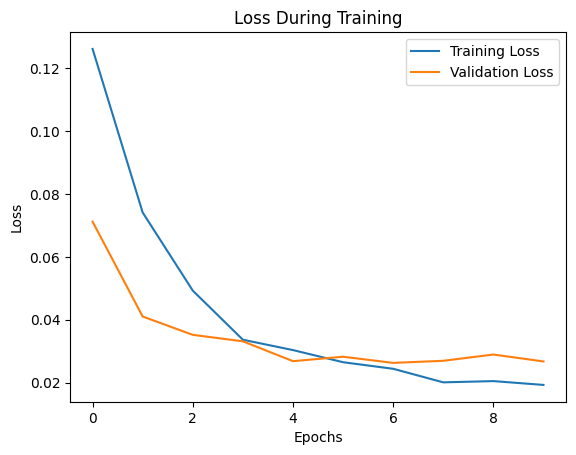

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Model 3: Fully-Connected Neural Network (FNN)



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
model.add(Input(shape=(X_text_train.shape[1],)))
model.add(Dense(100, activation='relu')) # Hidden layer 1
model.add(Dense(75, activation='relu')) # Hidden layer 2
model.add(Dropout(0.2)) # Dropout Layer 1
model.add(Dense(50, activation='relu')) # Hidden layer 3
model.add(Dense(25, activation='relu')) # Hidden layer 4
model.add(Dropout(0.1)) # Dropout Layer 2
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Alan Lei 10/17/24

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_alan_test3.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

**Training the FNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    X_text_train, y_train,
    validation_data=(X_text_test, y_test), # Use validation data to monitor the training
    epochs=1000,       # Maximum number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback] # Include both callbacks
)


Epoch 1/1000

Epoch 1: val_loss improved from inf to 0.08992, saving model to fnn_model_alan_test3.keras
11/11 - 7s - 657ms/step - loss: 0.2183 - val_loss: 0.0899
Epoch 2/1000

Epoch 2: val_loss improved from 0.08992 to 0.05077, saving model to fnn_model_alan_test3.keras
11/11 - 1s - 71ms/step - loss: 0.0704 - val_loss: 0.0508
Epoch 3/1000

Epoch 3: val_loss improved from 0.05077 to 0.03105, saving model to fnn_model_alan_test3.keras
11/11 - 0s - 25ms/step - loss: 0.0549 - val_loss: 0.0310
Epoch 4/1000

Epoch 4: val_loss improved from 0.03105 to 0.02801, saving model to fnn_model_alan_test3.keras
11/11 - 0s - 37ms/step - loss: 0.0468 - val_loss: 0.0280
Epoch 5/1000

Epoch 5: val_loss did not improve from 0.02801
11/11 - 0s - 42ms/step - loss: 0.0386 - val_loss: 0.0287
Epoch 6/1000

Epoch 6: val_loss improved from 0.02801 to 0.02710, saving model to fnn_model_alan_test3.keras
11/11 - 0s - 45ms/step - loss: 0.0317 - val_loss: 0.0271
Epoch 7/1000

Epoch 7: val_loss improved from 0.02710 t

**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step
Test RMSE: 136411.6875


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')

R-squared Score: 0.57


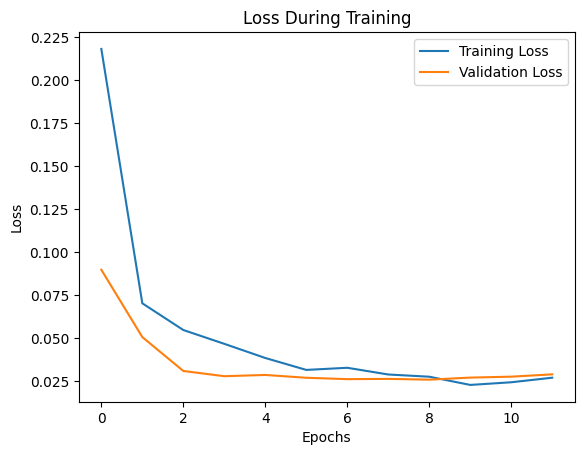

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Model 4: Fully-Connected Neural Network (FNN)



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
model.add(Input(shape=(X_text_train.shape[1],)))
model.add(Dense(100, activation='relu')) # Hidden layer 1
model.add(BatchNormalization()) # Batch Normalization Layer 1
model.add(Dense(75, activation='relu')) # Hidden layer 2
model.add(Dropout(0.2)) # Dropout Layer 1
model.add(Dense(50, activation='relu')) # Hidden layer 3
model.add(Dense(25, activation='relu')) # Hidden layer 4
model.add(Dropout(0.1)) # Dropout Layer 2
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Alan Lei 10/17/24

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_alan_test4.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

**Training the FNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    X_text_train, y_train,
    validation_data=(X_text_test, y_test), # Use validation data to monitor the training
    epochs=1000,       # Maximum number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback] # Include both callbacks
)


Epoch 1/1000

Epoch 1: val_loss improved from inf to 0.22750, saving model to fnn_model_alan_test4.keras
11/11 - 4s - 396ms/step - loss: 0.9905 - val_loss: 0.2275
Epoch 2/1000

Epoch 2: val_loss improved from 0.22750 to 0.20513, saving model to fnn_model_alan_test4.keras
11/11 - 1s - 53ms/step - loss: 0.1757 - val_loss: 0.2051
Epoch 3/1000

Epoch 3: val_loss did not improve from 0.20513
11/11 - 1s - 51ms/step - loss: 0.0958 - val_loss: 0.2207
Epoch 4/1000

Epoch 4: val_loss did not improve from 0.20513
11/11 - 0s - 19ms/step - loss: 0.0862 - val_loss: 0.2214
Epoch 5/1000

Epoch 5: val_loss did not improve from 0.20513
11/11 - 0s - 19ms/step - loss: 0.0782 - val_loss: 0.2100
Epoch 5: early stopping


**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step
Test RMSE: 366528.1875


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')

R-squared Score: -2.13


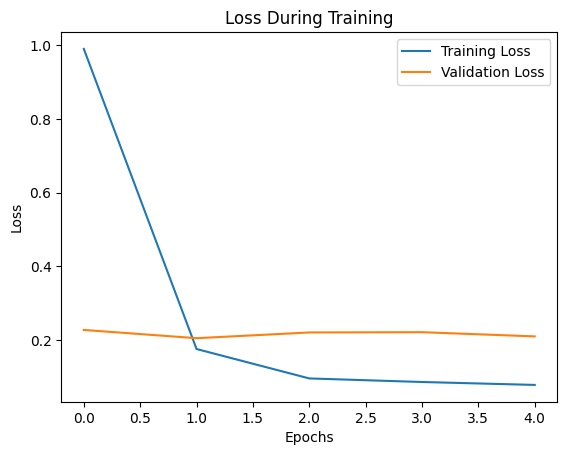

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Model 5: Fully-Connected Neural Network (FNN)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
model.add(Input(shape=(X_text_train.shape[1],)))
model.add(Dense(50, activation='relu')) # Hidden layer 1
model.add(Dropout(0.2)) # Dropout Layer 1
model.add(BatchNormalization()) # Batch Normalization Layer 1
model.add(Dense(25, activation='sigmoid')) # Hidden layer 2
model.add(Dropout(0.1)) # Dropout Layer 2
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Alan Lei 10/17/24

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_alan_test5.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

**Training the FNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    X_text_train, y_train,
    validation_data=(X_text_test, y_test), # Use validation data to monitor the training
    epochs=1000,       # Maximum number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback] # Include both callbacks
)


Epoch 1/1000

Epoch 1: val_loss improved from inf to 2.02644, saving model to fnn_model_alan_test5.keras
11/11 - 7s - 598ms/step - loss: 2.4067 - val_loss: 2.0264
Epoch 2/1000

Epoch 2: val_loss improved from 2.02644 to 1.55665, saving model to fnn_model_alan_test5.keras
11/11 - 0s - 36ms/step - loss: 1.8938 - val_loss: 1.5567
Epoch 3/1000

Epoch 3: val_loss improved from 1.55665 to 1.16698, saving model to fnn_model_alan_test5.keras
11/11 - 0s - 14ms/step - loss: 1.4380 - val_loss: 1.1670
Epoch 4/1000

Epoch 4: val_loss improved from 1.16698 to 0.84630, saving model to fnn_model_alan_test5.keras
11/11 - 0s - 16ms/step - loss: 1.0407 - val_loss: 0.8463
Epoch 5/1000

Epoch 5: val_loss improved from 0.84630 to 0.59350, saving model to fnn_model_alan_test5.keras
11/11 - 0s - 15ms/step - loss: 0.7848 - val_loss: 0.5935
Epoch 6/1000

Epoch 6: val_loss improved from 0.59350 to 0.40392, saving model to fnn_model_alan_test5.keras
11/11 - 0s - 27ms/step - loss: 0.5594 - val_loss: 0.4039
Epoch 7

**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Test RMSE: 156312.515625


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')

R-squared Score: 0.43


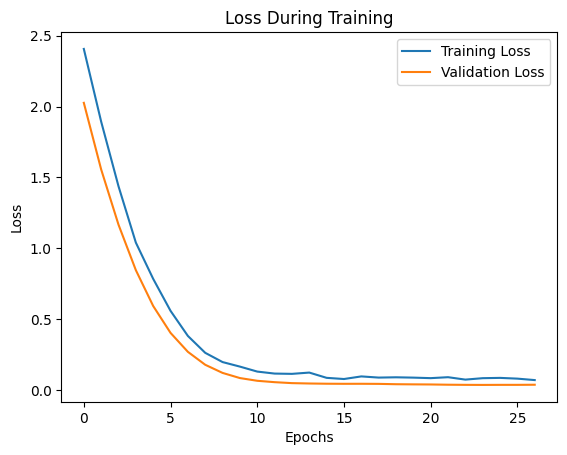

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Model 6: Fully-Connected Neural Network (FNN)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
model.add(Input(shape=(X_text_train.shape[1],)))
model.add(Dense(50, activation='relu')) # Hidden layer 1
model.add(Dense(40, activation='relu')) # Hidden layer 1
model.add(Dropout(0.2)) # Dropout Layer 1
model.add(BatchNormalization()) # Batch Normalization Layer 1
model.add(Dense(30, activation='relu')) # Hidden layer 1
model.add(Dense(20, activation='relu')) # Hidden layer 1
model.add(Dense(10, activation='sigmoid')) # Hidden layer 2
model.add(Dropout(0.1)) # Dropout Layer 2
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Alan Lei 10/17/24

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_alan_test6.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

**Training the FNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    X_text_train, y_train,
    validation_data=(X_text_test, y_test), # Use validation data to monitor the training
    epochs=1000,       # Maximum number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback] # Include both callbacks
)


Epoch 1/1000

Epoch 1: val_loss improved from inf to 0.32470, saving model to fnn_model_alan_test6.keras
11/11 - 4s - 358ms/step - loss: 0.3544 - val_loss: 0.3247
Epoch 2/1000

Epoch 2: val_loss improved from 0.32470 to 0.22846, saving model to fnn_model_alan_test6.keras
11/11 - 0s - 30ms/step - loss: 0.1908 - val_loss: 0.2285
Epoch 3/1000

Epoch 3: val_loss improved from 0.22846 to 0.17814, saving model to fnn_model_alan_test6.keras
11/11 - 0s - 25ms/step - loss: 0.1246 - val_loss: 0.1781
Epoch 4/1000

Epoch 4: val_loss improved from 0.17814 to 0.16052, saving model to fnn_model_alan_test6.keras
11/11 - 0s - 16ms/step - loss: 0.1099 - val_loss: 0.1605
Epoch 5/1000

Epoch 5: val_loss improved from 0.16052 to 0.15657, saving model to fnn_model_alan_test6.keras
11/11 - 0s - 31ms/step - loss: 0.0916 - val_loss: 0.1566
Epoch 6/1000

Epoch 6: val_loss did not improve from 0.15657
11/11 - 0s - 14ms/step - loss: 0.0878 - val_loss: 0.1649
Epoch 7/1000

Epoch 7: val_loss did not improve from 0.

**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Test RMSE: 112001.3203125


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')

R-squared Score: 0.71


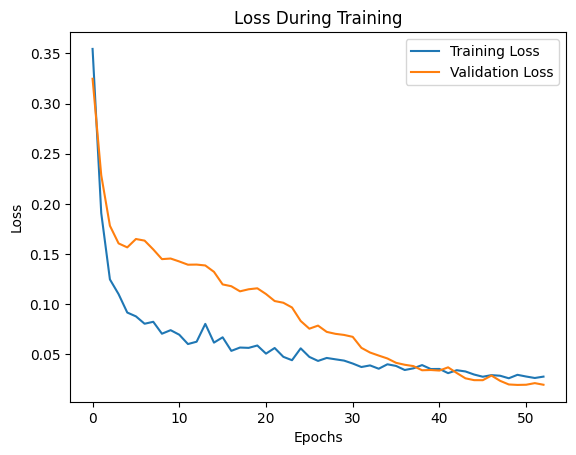

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Model 7: Fully-Connected Neural Network (FNN)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
model.add(Input(shape=(X_text_train.shape[1],)))
model.add(BatchNormalization()) # Batch Normalization Layer 1
model.add(Dense(50, activation='relu')) # Hidden layer 1
model.add(Dense(40, activation='relu')) # Hidden layer 1
model.add(Dropout(0.1)) # Dropout Layer 1
model.add(BatchNormalization()) # Batch Normalization Layer 2
model.add(Dense(30, activation='relu')) # Hidden layer 1
model.add(Dense(20, activation='relu')) # Hidden layer 1
model.add(Dense(10, activation='sigmoid')) # Hidden layer 2
model.add(Dropout(0.1)) # Dropout Layer 2
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Alan Lei 10/18/24

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_alan_test7.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

**Training the FNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    X_text_train, y_train,
    validation_data=(X_text_test, y_test), # Use validation data to monitor the training
    epochs=1000,       # Maximum number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback] # Include both callbacks
)


Epoch 1/1000

Epoch 1: val_loss improved from inf to 1.14626, saving model to fnn_model_alan_test7.keras
11/11 - 5s - 455ms/step - loss: 1.0483 - val_loss: 1.1463
Epoch 2/1000

Epoch 2: val_loss improved from 1.14626 to 0.93032, saving model to fnn_model_alan_test7.keras
11/11 - 1s - 72ms/step - loss: 0.6533 - val_loss: 0.9303
Epoch 3/1000

Epoch 3: val_loss improved from 0.93032 to 0.73214, saving model to fnn_model_alan_test7.keras
11/11 - 0s - 18ms/step - loss: 0.3915 - val_loss: 0.7321
Epoch 4/1000

Epoch 4: val_loss improved from 0.73214 to 0.57450, saving model to fnn_model_alan_test7.keras
11/11 - 0s - 21ms/step - loss: 0.2012 - val_loss: 0.5745
Epoch 5/1000

Epoch 5: val_loss improved from 0.57450 to 0.45254, saving model to fnn_model_alan_test7.keras
11/11 - 0s - 19ms/step - loss: 0.1346 - val_loss: 0.4525
Epoch 6/1000

Epoch 6: val_loss improved from 0.45254 to 0.37214, saving model to fnn_model_alan_test7.keras
11/11 - 0s - 19ms/step - loss: 0.1107 - val_loss: 0.3721
Epoch 7

**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Test RMSE: 121822.8359375


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')

R-squared Score: 0.65


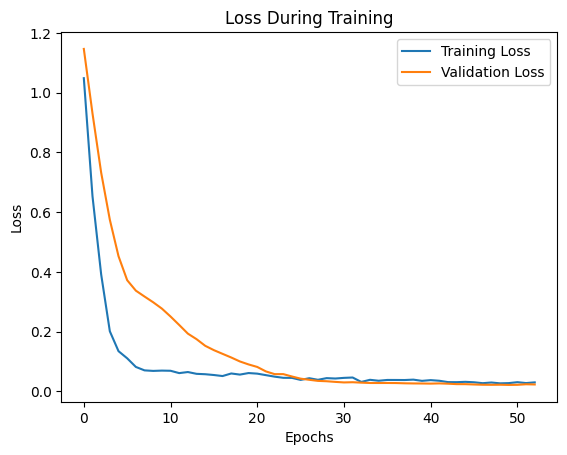

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Model 8: Fully-Connected Neural Network (FNN)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
model.add(Input(shape=(X_text_train.shape[1],)))
model.add(Dense(25, activation='relu')) # Hidden layer 1
model.add(Dense(20, activation='relu')) # Hidden layer 1
model.add(Dropout(0.1)) # Dropout Layer 1
model.add(BatchNormalization()) # Batch Normalization Layer 2
model.add(Dense(15, activation='relu')) # Hidden layer 1
model.add(Dense(10, activation='relu')) # Hidden layer 1
model.add(Dense(5, activation='sigmoid')) # Hidden layer 2
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Alan Lei 10/18/24

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_alan_test8.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

**Training the FNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    X_text_train, y_train,
    validation_data=(X_text_test, y_test), # Use validation data to monitor the training
    epochs=1000,       # Maximum number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback] # Include both callbacks
)


Epoch 1/1000

Epoch 1: val_loss improved from inf to 0.08953, saving model to fnn_model_alan_test8.keras
11/11 - 2s - 223ms/step - loss: 0.1334 - val_loss: 0.0895
Epoch 2/1000

Epoch 2: val_loss improved from 0.08953 to 0.07808, saving model to fnn_model_alan_test8.keras
11/11 - 0s - 39ms/step - loss: 0.0911 - val_loss: 0.0781
Epoch 3/1000

Epoch 3: val_loss improved from 0.07808 to 0.07118, saving model to fnn_model_alan_test8.keras
11/11 - 0s - 11ms/step - loss: 0.0709 - val_loss: 0.0712
Epoch 4/1000

Epoch 4: val_loss improved from 0.07118 to 0.06734, saving model to fnn_model_alan_test8.keras
11/11 - 0s - 13ms/step - loss: 0.0590 - val_loss: 0.0673
Epoch 5/1000

Epoch 5: val_loss improved from 0.06734 to 0.06493, saving model to fnn_model_alan_test8.keras
11/11 - 0s - 18ms/step - loss: 0.0510 - val_loss: 0.0649
Epoch 6/1000

Epoch 6: val_loss improved from 0.06493 to 0.06246, saving model to fnn_model_alan_test8.keras
11/11 - 0s - 26ms/step - loss: 0.0433 - val_loss: 0.0625
Epoch 7

**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Test RMSE: 126455.890625


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')

R-squared Score: 0.63


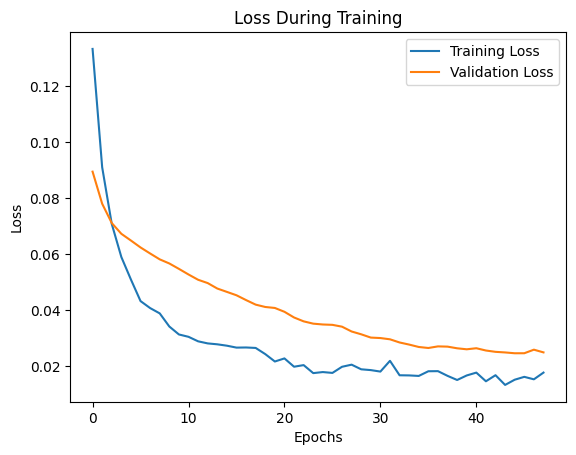

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Model 9: Fully-Connected Neural Network (FNN)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
model.add(Input(shape=(X_text_train.shape[1],)))
model.add(Dense(100, activation='sigmoid')) # Hidden layer 1
model.add(Dense(50, activation='relu')) # Hidden layer 1
model.add(Dropout(0.1)) # Dropout Layer 1
model.add(BatchNormalization()) # Batch Normalization Layer 2
model.add(Dense(25, activation='sigmoid')) # Hidden layer 1
model.add(Dense(10, activation='relu')) # Hidden layer 1
model.add(Dropout(0.1)) # Dropout Layer 1
model.add(Dense(5, activation='sigmoid')) # Hidden layer 2
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='SGD')

# Alan Lei 10/18/24

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_alan_test9.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

**Training the FNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    X_text_train, y_train,
    validation_data=(X_text_test, y_test), # Use validation data to monitor the training
    epochs=1000,       # Maximum number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback] # Include both callbacks
)


Epoch 1/1000

Epoch 1: val_loss improved from inf to 0.54527, saving model to fnn_model_alan_test9.keras
11/11 - 1s - 113ms/step - loss: 1.1071 - val_loss: 0.5453
Epoch 2/1000

Epoch 2: val_loss improved from 0.54527 to 0.22254, saving model to fnn_model_alan_test9.keras
11/11 - 0s - 28ms/step - loss: 0.3996 - val_loss: 0.2225
Epoch 3/1000

Epoch 3: val_loss improved from 0.22254 to 0.10949, saving model to fnn_model_alan_test9.keras
11/11 - 0s - 27ms/step - loss: 0.1829 - val_loss: 0.1095
Epoch 4/1000

Epoch 4: val_loss improved from 0.10949 to 0.07931, saving model to fnn_model_alan_test9.keras
11/11 - 0s - 28ms/step - loss: 0.1061 - val_loss: 0.0793
Epoch 5/1000

Epoch 5: val_loss improved from 0.07931 to 0.06924, saving model to fnn_model_alan_test9.keras
11/11 - 0s - 14ms/step - loss: 0.0848 - val_loss: 0.0692
Epoch 6/1000

Epoch 6: val_loss improved from 0.06924 to 0.06819, saving model to fnn_model_alan_test9.keras
11/11 - 0s - 25ms/step - loss: 0.0787 - val_loss: 0.0682
Epoch 7

**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Test RMSE: 207039.015625


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')

R-squared Score: 0.00


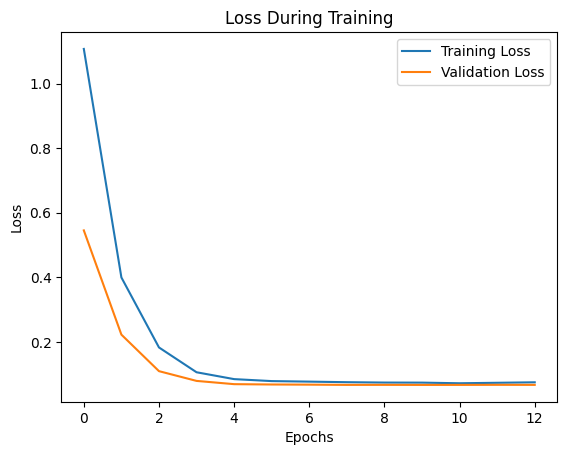

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Model 10: Fully-Connected Neural Network (FNN)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
model.add(Input(shape=(X_text_train.shape[1],)))
model.add(Dense(250, activation='sigmoid')) # Hidden layer 1
model.add(Dense(125, activation='relu')) # Hidden layer 1
model.add(Dropout(0.1)) # Dropout Layer 1
model.add(BatchNormalization()) # Batch Normalization Layer 2
model.add(Dense(75, activation='sigmoid')) # Hidden layer 1
model.add(Dense(50, activation='relu')) # Hidden layer 1
model.add(Dropout(0.1)) # Dropout Layer 1
model.add(Dense(25, activation='sigmoid')) # Hidden layer 2
model.add(Dense(10, activation='relu')) # Hidden layer 1
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='SGD')

# Alan Lei 10/18/24

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_alan_test10.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

**Training the FNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    X_text_train, y_train,
    validation_data=(X_text_test, y_test), # Use validation data to monitor the training
    epochs=1000,       # Maximum number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback] # Include both callbacks
)


Epoch 1/1000

Epoch 1: val_loss improved from inf to 0.07451, saving model to fnn_model_alan_test10.keras
11/11 - 1s - 103ms/step - loss: 0.1053 - val_loss: 0.0745
Epoch 2/1000

Epoch 2: val_loss improved from 0.07451 to 0.06842, saving model to fnn_model_alan_test10.keras
11/11 - 0s - 22ms/step - loss: 0.0799 - val_loss: 0.0684
Epoch 3/1000

Epoch 3: val_loss improved from 0.06842 to 0.06801, saving model to fnn_model_alan_test10.keras
11/11 - 0s - 13ms/step - loss: 0.0754 - val_loss: 0.0680
Epoch 4/1000

Epoch 4: val_loss improved from 0.06801 to 0.06698, saving model to fnn_model_alan_test10.keras
11/11 - 0s - 12ms/step - loss: 0.0749 - val_loss: 0.0670
Epoch 5/1000

Epoch 5: val_loss improved from 0.06698 to 0.06694, saving model to fnn_model_alan_test10.keras
11/11 - 0s - 10ms/step - loss: 0.0747 - val_loss: 0.0669
Epoch 6/1000

Epoch 6: val_loss did not improve from 0.06694
11/11 - 0s - 8ms/step - loss: 0.0745 - val_loss: 0.0669
Epoch 7/1000

Epoch 7: val_loss improved from 0.066

**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Test RMSE: 206971.875


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')

R-squared Score: 0.00


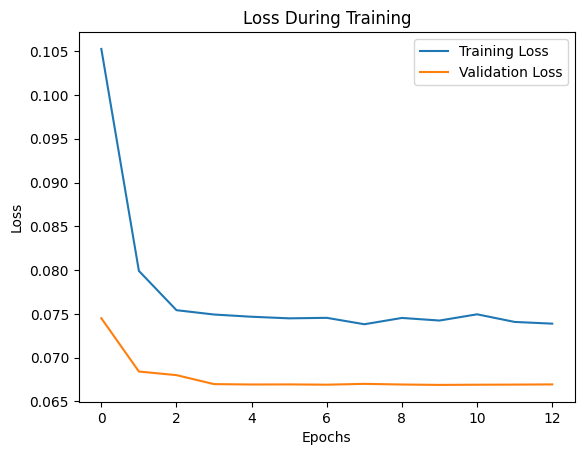

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Model 11: Fully-Connected Neural Network (FNN)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
model.add(Input(shape=(X_text_train.shape[1],)))
model.add(Dense(250, activation='relu')) # Hidden layer 1
model.add(Dense(125, activation='relu')) # Hidden layer 1
model.add(Dropout(0.15)) # Dropout Layer 1
model.add(BatchNormalization()) # Batch Normalization Layer 2
model.add(Dense(75, activation='relu')) # Hidden layer 1
model.add(Dense(50, activation='relu')) # Hidden layer 1
model.add(Dropout(0.1)) # Dropout Layer 1
model.add(Dense(25, activation='relu')) # Hidden layer 2
model.add(Dense(10, activation='relu')) # Hidden layer 1
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='SGD')

# Alan Lei 10/18/24

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_alan_test11.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

**Training the FNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    X_text_train, y_train,
    validation_data=(X_text_test, y_test), # Use validation data to monitor the training
    epochs=1000,       # Maximum number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback] # Include both callbacks
)


Epoch 1/1000

Epoch 1: val_loss improved from inf to 0.18925, saving model to fnn_model_alan_test11.keras
11/11 - 1s - 102ms/step - loss: 0.1431 - val_loss: 0.1892
Epoch 2/1000

Epoch 2: val_loss improved from 0.18925 to 0.15963, saving model to fnn_model_alan_test11.keras
11/11 - 0s - 27ms/step - loss: 0.0778 - val_loss: 0.1596
Epoch 3/1000

Epoch 3: val_loss improved from 0.15963 to 0.14508, saving model to fnn_model_alan_test11.keras
11/11 - 0s - 14ms/step - loss: 0.0656 - val_loss: 0.1451
Epoch 4/1000

Epoch 4: val_loss did not improve from 0.14508
11/11 - 0s - 6ms/step - loss: 0.0620 - val_loss: 0.1460
Epoch 5/1000

Epoch 5: val_loss improved from 0.14508 to 0.13781, saving model to fnn_model_alan_test11.keras
11/11 - 0s - 19ms/step - loss: 0.0524 - val_loss: 0.1378
Epoch 6/1000

Epoch 6: val_loss improved from 0.13781 to 0.13590, saving model to fnn_model_alan_test11.keras
11/11 - 0s - 28ms/step - loss: 0.0559 - val_loss: 0.1359
Epoch 7/1000

Epoch 7: val_loss improved from 0.135

**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Test RMSE: 258359.109375


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')

R-squared Score: -0.56


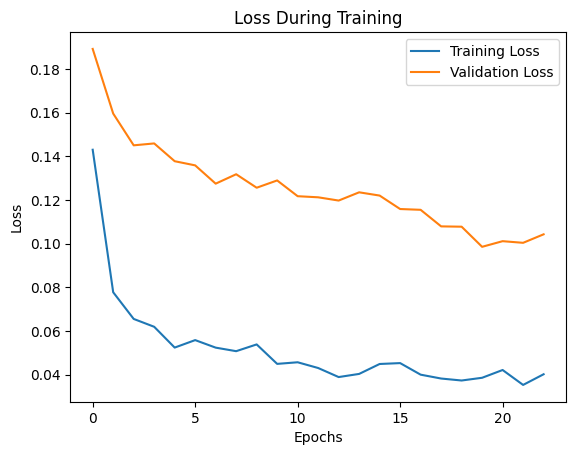

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Model 12: Fully-Connected Neural Network (FNN)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
model.add(Input(shape=(X_text_train.shape[1],)))
model.add(Dense(100, activation='relu')) # Hidden layer 1
model.add(Dense(90, activation='relu')) # Hidden layer 1
model.add(Dropout(0.1)) # Dropout Layer 1
model.add(BatchNormalization()) # Batch Normalization Layer 2
model.add(Dense(80, activation='relu')) # Hidden layer 1
model.add(Dense(70, activation='relu')) # Hidden layer 1
model.add(Dense(60, activation='relu')) # Hidden layer 2
model.add(Dense(50, activation='relu')) # Hidden layer 1
model.add(Dense(40, activation='relu')) # Hidden layer 1
model.add(BatchNormalization())
model.add(Dense(30, activation='relu')) # Hidden layer 1
model.add(Dense(20, activation='relu')) # Hidden layer 1
model.add(Dense(10, activation='relu')) # Hidden layer 1
model.add(Dense(5, activation='relu')) # Hidden layer 2
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='SGD')

# Alan Lei 10/19/24

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_alan_test11.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

**Training the FNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    X_text_train, y_train,
    validation_data=(X_text_test, y_test), # Use validation data to monitor the training
    epochs=1000,       # Maximum number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback] # Include both callbacks
)


Epoch 1/1000

Epoch 1: val_loss improved from inf to 0.18925, saving model to fnn_model_alan_test11.keras
11/11 - 1s - 102ms/step - loss: 0.1431 - val_loss: 0.1892
Epoch 2/1000

Epoch 2: val_loss improved from 0.18925 to 0.15963, saving model to fnn_model_alan_test11.keras
11/11 - 0s - 27ms/step - loss: 0.0778 - val_loss: 0.1596
Epoch 3/1000

Epoch 3: val_loss improved from 0.15963 to 0.14508, saving model to fnn_model_alan_test11.keras
11/11 - 0s - 14ms/step - loss: 0.0656 - val_loss: 0.1451
Epoch 4/1000

Epoch 4: val_loss did not improve from 0.14508
11/11 - 0s - 6ms/step - loss: 0.0620 - val_loss: 0.1460
Epoch 5/1000

Epoch 5: val_loss improved from 0.14508 to 0.13781, saving model to fnn_model_alan_test11.keras
11/11 - 0s - 19ms/step - loss: 0.0524 - val_loss: 0.1378
Epoch 6/1000

Epoch 6: val_loss improved from 0.13781 to 0.13590, saving model to fnn_model_alan_test11.keras
11/11 - 0s - 28ms/step - loss: 0.0559 - val_loss: 0.1359
Epoch 7/1000

Epoch 7: val_loss improved from 0.135

**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Test RMSE: 258359.109375


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')

R-squared Score: -0.56


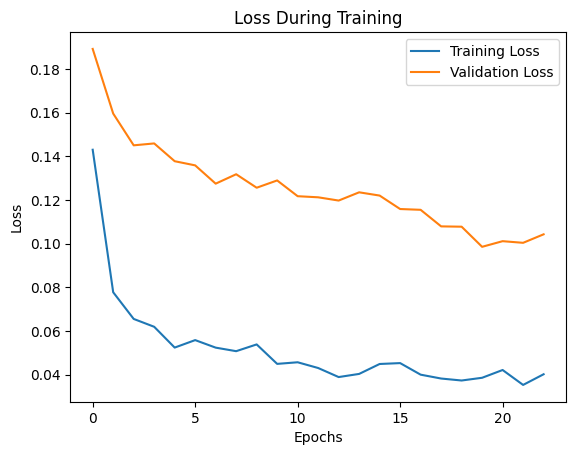

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### FNN Model Design and Testing (Nishan Majarjan)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

model = Sequential()
model.add(Input(shape=(X_text_train.shape[1],)))

# First dense layer
model.add(Dense(128, activation='relu'))  # Larger number of neurons

# Second dense layer
model.add(Dense(64, activation='relu'))   # Less neurons in subsequent layers

# Third dense layer
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

# Output layer (for regression)
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping to avoid overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=2, restore_best_weights=True)

# Model checkpoint to save the best model
checkpoint_callback = ModelCheckpoint(filepath='best_fnn_model.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           5,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,001 (62.50 KB)

 Trainable params: 16,001 (62.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    X_text_train, y_train,
    validation_data=(X_text_test, y_test),  # Validation data
    epochs=100,       # Maximum number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode
    callbacks=[early_stopping_callback, checkpoint_callback]  # Early stopping and checkpointing
)


Epoch 1/100

Epoch 1: val_loss improved from inf to 0.08606, saving model to best_fnn_model.keras
11/11 - 7s - 610ms/step - loss: 0.2261 - val_loss: 0.0861
Epoch 2/100

Epoch 2: val_loss improved from 0.08606 to 0.04516, saving model to best_fnn_model.keras
11/11 - 0s - 18ms/step - loss: 0.0874 - val_loss: 0.0452
Epoch 3/100

Epoch 3: val_loss improved from 0.04516 to 0.03263, saving model to best_fnn_model.keras
11/11 - 0s - 23ms/step - loss: 0.0528 - val_loss: 0.0326
Epoch 4/100

Epoch 4: val_loss improved from 0.03263 to 0.02961, saving model to best_fnn_model.keras
11/11 - 0s - 12ms/step - loss: 0.0465 - val_loss: 0.0296
Epoch 5/100

Epoch 5: val_loss improved from 0.02961 to 0.02906, saving model to best_fnn_model.keras
11/11 - 0s - 13ms/step - loss: 0.0395 - val_loss: 0.0291
Epoch 6/100

Epoch 6: val_loss improved from 0.02906 to 0.02800, saving model to best_fnn_model.keras
11/11 - 0s - 12ms/step - loss: 0.0372 - val_loss: 0.0280
Epoch 7/100

Epoch 7: val_loss did not improve fr

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step
Test RMSE: 117740.46875
R-squared Score: 0.68


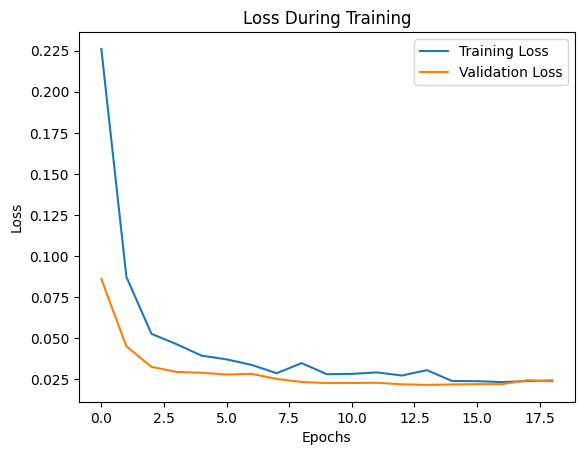

In [ ]:
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = model.predict(X_text_test)

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Building and Training the CNN Model

We will start by constructing a Convolutional Neural Network (CNN) to extract features from the image data. The goal is to experiment with different CNN configurations to find the best architecture for visual feature extraction.

### Steps:

1. **Build the CNN Model**:
   - Set up convolutional and pooling layers to extract features from the image data.
   - Experiment with different CNN architectures (e.g., varying filter sizes, number of layers, and pooling strategies).

2. **Train the CNN Model**:
   - Use different optimizers such as Adam or SGD.
   - Apply early stopping to avoid overfitting.
   - Implement model checkpointing to save the best-performing CNN during training.

3. **Evaluate the CNN Model**:
   - Assess the CNN's ability to extract useful features by evaluating metrics such as RMSE.
   - Save and document the best CNN architecture based on validation performance.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error
import numpy as np
import tensorflow.keras.backend as K

# Clear previous Keras session
K.clear_session()

### CNN Model Design and Testing (Tyler Burguillos)

#### Model 1: Baseline Convoluted Neural Network (CNN)

This is our first Convolutional Neural Network (CNN) model, designed to process image data (128x128 RGB images). The model consists of a single convolutional layer followed by a MaxPooling layer, flattening, and dense layers for regression (predicting house prices). We also implement **early stopping** to prevent overfitting and **model checkpointing** to save the best-performing model during training.

##### Key Features:
- **Conv2D Layer**: 32 filters with a 3x3 kernel and ReLU activation.
- **MaxPooling**: Reduces spatial dimensions after convolution.
- **Flattening**: Converts the 2D outputs into a 1D vector for fully connected layers.
- **Fully Connected Layer**: 64 neurons with ReLU activation.
- **Output Layer**: Single neuron for regression (predicting house prices).
Optimizer: Adam optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error
import numpy as np
import tensorflow.keras.backend as K
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the CNN model
model = Sequential()
model.add(Input(shape=(128, 128, 3))) # Input shape of image data: 128x128 images with 3 color channels (RGB)
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu')) # Conv2D Layer with MaxPooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flatten the output of the Conv2D layers to feed into dense layers
model.add(Dense(64, activation='relu')) # Fully connected (dense) layer
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Summary of the model
model.summary()

# Tyler Burguillos 10/14/24

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 127008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       8,128,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,129,537 (31.01 MB)

 Trainable params: 8,129,537 (31.01 MB)

 Non-trainable params: 0 (0.00 B)

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='cnn_model_tyler_1.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Tyler Burguillos 10/14/24

**Training the CNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    img_arr_train, y_train,  # Image data for training
    validation_data=(img_arr_test, y_test),  # Validation on the image test data
    epochs=100,       # Max number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback]  # Include both callbacks
)

# Tyler Burguillos 10/14/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.30636, saving model to cnn_model_tyler_1.keras
11/11 - 4s - 341ms/step - loss: 17263774.0000 - val_loss: 0.3064
Epoch 2/100

Epoch 2: val_loss did not improve from 0.30636
11/11 - 0s - 16ms/step - loss: 0.3094 - val_loss: 0.3078
Epoch 3/100

Epoch 3: val_loss did not improve from 0.30636
11/11 - 0s - 16ms/step - loss: 0.3102 - val_loss: 0.3083
Epoch 4/100

Epoch 4: val_loss did not improve from 0.30636
11/11 - 0s - 15ms/step - loss: 0.3105 - val_loss: 0.3084
Epoch 4: early stopping


**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Predict on the test set
y_pred = model.predict(img_arr_test)

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"CNN Test RMSE: {rmse}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
CNN Test RMSE: 444249.625


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')


R-squared Score: -3.60


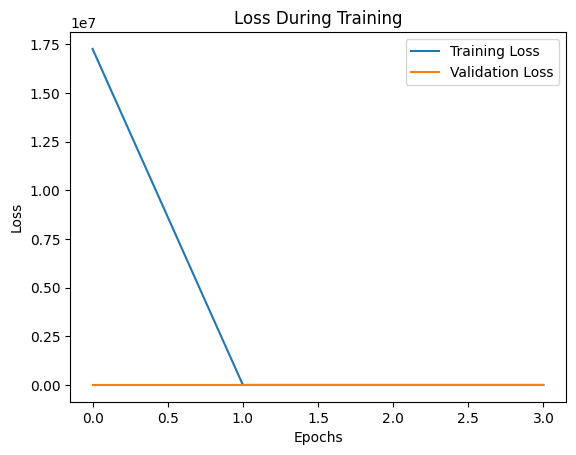

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Model 2: Two Layer Convoluted Neural Network (CNN)

This model is an extension of the previous CNN with an additional **Conv2D** layer to deepen the network and potentially improve its feature extraction abilities. We also keep **early stopping** and **model checkpointing** to save the best model.

##### Key Features:
- **Conv2D Layer 1**: 32 filters with a 3x3 kernel and ReLU activation.
- **MaxPooling**: Reduces spatial dimensions after convolution.
- **Conv2D Layer 2**: 64 filters with a 3x3 kernel and ReLU activation.
- **MaxPooling**: Reduces spatial dimensions after convolution.
- **Flattening**: Converts the 2D outputs into a 1D vector for fully connected layers.
- **Fully Connected Layer**: 128 neurons with ReLU activation.
- **Output Layer**: Single neuron for regression (predicting house prices).
Optimizer: Adam optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the CNN model
model = Sequential()
model.add(Input(shape=(128, 128, 3))) # Input shape: 128x128 images with 3 color channels (RGB)
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu')) # First Conv2D Layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu')) # Second Conv2D Layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flatten the output for the fully connected layer
model.add(Dense(128, activation='relu')) # Dense layer with 128 neurons
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Summary of the model
model.summary()

# Tyler Burguillos 10/14/24

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,392,449 (28.20 MB)

 Trainable params: 7,392,449 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='cnn_model_tyler_2.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Tyler Burguillos 10/14/24

**Training the CNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    img_arr_train, y_train,  # Image data for training
    validation_data=(img_arr_test, y_test),  # Validation on the image test data
    epochs=100,       # Max number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback]  # Include both callbacks
)

# Tyler Burguillos 10/14/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 7116.29443, saving model to cnn_model_tyler_2.keras
11/11 - 6s - 504ms/step - loss: 1436449.1250 - val_loss: 7116.2944
Epoch 2/100

Epoch 2: val_loss improved from 7116.29443 to 242.32227, saving model to cnn_model_tyler_2.keras
11/11 - 7s - 645ms/step - loss: 1657.7670 - val_loss: 242.3223
Epoch 3/100

Epoch 3: val_loss improved from 242.32227 to 15.86759, saving model to cnn_model_tyler_2.keras
11/11 - 4s - 404ms/step - loss: 100.5551 - val_loss: 15.8676
Epoch 4/100

Epoch 4: val_loss improved from 15.86759 to 2.55873, saving model to cnn_model_tyler_2.keras
11/11 - 5s - 472ms/step - loss: 7.2499 - val_loss: 2.5587
Epoch 5/100

Epoch 5: val_loss did not improve from 2.55873
11/11 - 1s - 65ms/step - loss: 3.7933 - val_loss: 4.0228
Epoch 6/100

Epoch 6: val_loss did not improve from 2.55873
11/11 - 0s - 19ms/step - loss: 2.4335 - val_loss: 2.6936
Epoch 7/100

Epoch 7: val_loss did not improve from 2.55873
11/11 - 0s - 19ms/step - loss

**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Predict on the test set
y_pred = model.predict(img_arr_test)

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"CNN Test RMSE: {rmse}")

# Tyler Burguillos 10/14/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step
CNN Test RMSE: 1976263.375


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')

# Tyler Burguillos 10/14/24

R-squared Score: -90.11


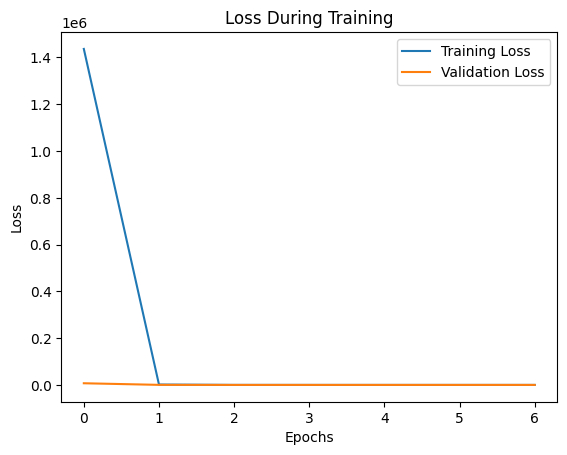

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tyler Burguillos 10/14/24

#### Model 3: Three Layer Convoluted Neural Network (CNN)

This model is an extension of the previous CNN with an additional **Conv2D** layer to deepen the network and potentially improve its feature extraction abilities. We also keep **early stopping** and **model checkpointing** to save the best model.

##### Key Features:
- **Conv2D Layer 1**: 16 filters with a 3x3 kernel and ReLU activation.
- **MaxPooling**: Reduces spatial dimensions after convolution.
- **Conv2D Layer 2**: 32 filters with a 3x3 kernel and ReLU activation.
- **MaxPooling**: Reduces spatial dimensions after convolution.
- **Conv2D Layer 3**: 64 filters with a 3x3 kernel and ReLU activation.
- **MaxPooling**: Reduces spatial dimensions after convolution.
- **Flattening**: Converts the 2D outputs into a 1D vector for fully connected layers.
- **Fully Connected Layer**: 128 neurons with ReLU activation.
- **Output Layer**: Single neuron for regression (predicting house prices).
Optimizer: Adam optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the CNN model
model = Sequential()
model.add(Input(shape=(128, 128, 3))) # Input shape: 128x128 images with 3 color channels (RGB)
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu')) # First Conv2D Layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu')) # Second Conv2D Layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu')) # Third Conv2D Layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flatten the output for the fully connected layer
model.add(Dense(128, activation='relu')) # Dense layer with 128 neurons
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Summary of the model
model.summary()

# Tyler Burguillos 10/14/24

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,629,473 (6.22 MB)

 Trainable params: 1,629,473 (6.22 MB)

 Non-trainable params: 0 (0.00 B)

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='cnn_model_tyler_3.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Tyler Burguillos 10/14/24

**Training the CNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    img_arr_train, y_train,  # Image data for training
    validation_data=(img_arr_test, y_test),  # Validation on the image test data
    epochs=100,       # Max number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback]  # Include both callbacks
)

# Tyler Burguillos 10/14/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 3557.80151, saving model to cnn_model_tyler_3.keras
11/11 - 6s - 507ms/step - loss: 449019.7500 - val_loss: 3557.8015
Epoch 2/100

Epoch 2: val_loss improved from 3557.80151 to 10.63266, saving model to cnn_model_tyler_3.keras
11/11 - 1s - 88ms/step - loss: 865.2623 - val_loss: 10.6327
Epoch 3/100

Epoch 3: val_loss did not improve from 10.63266
11/11 - 0s - 11ms/step - loss: 69.0548 - val_loss: 12.3449
Epoch 4/100

Epoch 4: val_loss did not improve from 10.63266
11/11 - 0s - 13ms/step - loss: 15.8580 - val_loss: 12.6835
Epoch 5/100

Epoch 5: val_loss improved from 10.63266 to 5.83244, saving model to cnn_model_tyler_3.keras
11/11 - 0s - 23ms/step - loss: 6.9638 - val_loss: 5.8324
Epoch 6/100

Epoch 6: val_loss improved from 5.83244 to 1.26099, saving model to cnn_model_tyler_3.keras
11/11 - 0s - 22ms/step - loss: 3.0584 - val_loss: 1.2610
Epoch 7/100

Epoch 7: val_loss did not improve from 1.26099
11/11 - 0s - 16ms/step - loss: 1.193

**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Predict on the test set
y_pred = model.predict(img_arr_test)

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"CNN Test RMSE: {rmse}")

# Tyler Burguillos 10/14/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step
CNN Test RMSE: 824166.0625


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')

# Tyler Burguillos 10/14/24

R-squared Score: -14.85


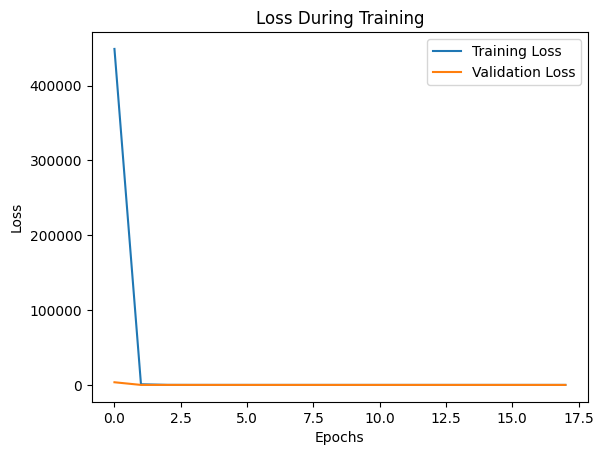

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tyler Burguillos 10/14/24

#### Model 4: Baseline Convoluted Neural Network (CNN) with Batch Normalization

This is our first Convolutional Neural Network (CNN) model, designed to process image data (128x128 RGB images). The model consists of a single convolutional layer followed by a MaxPooling layer, flattening, and dense layers for regression (predicting house prices). We also implement **early stopping** to prevent overfitting and **model checkpointing** to save the best-performing model during training.

##### Key Features:
- **Conv2D Layer**: 32 filters with a 3x3 kernel and ReLU activation.
- **Batch Normalization Layer**: added for normalization
- **MaxPooling**: Reduces spatial dimensions after convolution.
- **Flattening**: Converts the 2D outputs into a 1D vector for fully connected layers.
- **Fully Connected Layer**: 64 neurons with ReLU activation.
- **Output Layer**: Single neuron for regression (predicting house prices).
Optimizer: Adam optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error
import numpy as np
import tensorflow.keras.backend as K
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the CNN model
model = Sequential()
model.add(Input(shape=(128, 128, 3))) # Input shape of image data: 128x128 images with 3 color channels (RGB)
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu')) # Conv2D Layer with MaxPooling
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flatten the output of the Conv2D layers to feed into dense layers
model.add(Dense(64, activation='relu')) # Fully connected (dense) layer
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Summary of the model
model.summary()

# Tyler Burguillos 10/14/24

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 127008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       8,128,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,129,665 (31.01 MB)

 Trainable params: 8,129,601 (31.01 MB)

 Non-trainable params: 64 (256.00 B)

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='cnn_model_tyler_4.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Tyler Burguillos 10/14/24

**Training the CNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    img_arr_train, y_train,  # Image data for training
    validation_data=(img_arr_test, y_test),  # Validation on the image test data
    epochs=100,       # Max number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback]  # Include both callbacks
)

# Tyler Burguillos 10/14/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 17.82429, saving model to cnn_model_tyler_4.keras
11/11 - 4s - 366ms/step - loss: 560.1180 - val_loss: 17.8243
Epoch 2/100

Epoch 2: val_loss improved from 17.82429 to 5.01425, saving model to cnn_model_tyler_4.keras
11/11 - 3s - 280ms/step - loss: 273.4823 - val_loss: 5.0143
Epoch 3/100

Epoch 3: val_loss did not improve from 5.01425
11/11 - 0s - 15ms/step - loss: 9.3987 - val_loss: 362.8660
Epoch 4/100

Epoch 4: val_loss did not improve from 5.01425
11/11 - 0s - 26ms/step - loss: 1.8136 - val_loss: 736.6254
Epoch 5/100

Epoch 5: val_loss did not improve from 5.01425
11/11 - 0s - 14ms/step - loss: 1.2885 - val_loss: 630.6558
Epoch 5: early stopping


**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Predict on the test set
y_pred = model.predict(img_arr_test)

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"CNN Test RMSE: {rmse}")

# Tyler Burguillos 10/14/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
CNN Test RMSE: 20087778.0


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')

# Tyler Burguillos 10/14/24

R-squared Score: -9412.59


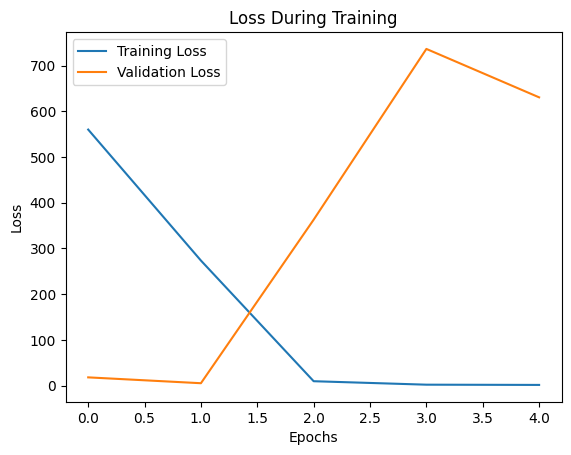

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tyler Burguillos 10/14/24

#### Model 5: Two Layer Convoluted Neural Network (CNN) with Batch Normalization

This model is an extension of the previous CNN with an additional **Conv2D** layer to deepen the network and potentially improve its feature extraction abilities. We also keep **early stopping** and **model checkpointing** to save the best model.

##### Key Features:
- **Conv2D Layer 1**: 32 filters with a 3x3 kernel and ReLU activation.
- **Batch Normalization Layer 1**: added for normalization
- **MaxPooling**: Reduces spatial dimensions after convolution.
- **Conv2D Layer 2**: 64 filters with a 3x3 kernel and ReLU activation.
- **Batch Normalization Layer 2**: added for normalization
- **MaxPooling**: Reduces spatial dimensions after convolution.
- **Flattening**: Converts the 2D outputs into a 1D vector for fully connected layers.
- **Fully Connected Layer**: 128 neurons with ReLU activation.
- **Output Layer**: Single neuron for regression (predicting house prices).
Optimizer: Adam optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the CNN model
model = Sequential()
model.add(Input(shape=(128, 128, 3))) # Input shape: 128x128 images with 3 color channels (RGB)
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu')) # First Conv2D Layer
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu')) # Second Conv2D Layer
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flatten the output for the fully connected layer
model.add(Dense(128, activation='relu')) # Dense layer with 128 neurons
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Summary of the model
model.summary()

# Tyler Burguillos 10/15/24

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,392,833 (28.20 MB)

 Trainable params: 7,392,641 (28.20 MB)

 Non-trainable params: 192 (768.00 B)

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='cnn_model_tyler_5.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Tyler Burguillos 10/15/24

**Training the CNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    img_arr_train, y_train,  # Image data for training
    validation_data=(img_arr_test, y_test),  # Validation on the image test data
    epochs=100,       # Max number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback]  # Include both callbacks
)

# Tyler Burguillos 10/15/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 158.36879, saving model to cnn_model_tyler_5.keras
11/11 - 7s - 644ms/step - loss: 448.5608 - val_loss: 158.3688
Epoch 2/100

Epoch 2: val_loss improved from 158.36879 to 0.22818, saving model to cnn_model_tyler_5.keras
11/11 - 7s - 662ms/step - loss: 77.2523 - val_loss: 0.2282
Epoch 3/100

Epoch 3: val_loss did not improve from 0.22818
11/11 - 3s - 318ms/step - loss: 0.5962 - val_loss: 0.3001
Epoch 4/100

Epoch 4: val_loss did not improve from 0.22818
11/11 - 0s - 17ms/step - loss: 0.5274 - val_loss: 0.2933
Epoch 5/100

Epoch 5: val_loss did not improve from 0.22818
11/11 - 0s - 27ms/step - loss: 0.4568 - val_loss: 0.2980
Epoch 5: early stopping


**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Predict on the test set
y_pred = model.predict(img_arr_test)

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"CNN Test RMSE: {rmse}")

# Tyler Burguillos 10/15/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step
CNN Test RMSE: 436624.15625


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')

# Tyler Burguillos 10/15/24

R-squared Score: -3.45


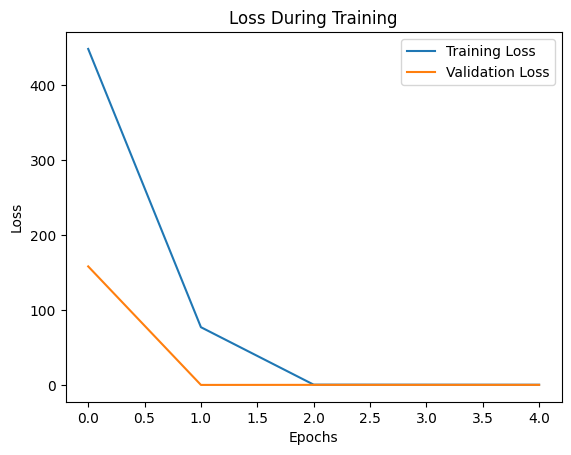

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tyler Burguillos 10/15/24

#### Model 6: Three Layer Convoluted Neural Network (CNN) with Batch Normalization

This model is an extension of the previous CNN with an additional **Conv2D** layer to deepen the network and potentially improve its feature extraction abilities. We also keep **early stopping** and **model checkpointing** to save the best model.

##### Key Features:
- **Conv2D Layer 1**: 16 filters with a 3x3 kernel and ReLU activation.
- **Batch Normalization Layer 1**: added for normalization
- **MaxPooling**: Reduces spatial dimensions after convolution.
- **Conv2D Layer 2**: 32 filters with a 3x3 kernel and ReLU activation.
- **Batch Normalization Layer 2**: added for normalization
- **MaxPooling**: Reduces spatial dimensions after convolution.
- **Conv2D Layer 3**: 64 filters with a 3x3 kernel and ReLU activation.
- **Batch Normalization Layer 3**: added for normalization
- **MaxPooling**: Reduces spatial dimensions after convolution.
- **Flattening**: Converts the 2D outputs into a 1D vector for fully connected layers.
- **Fully Connected Layer**: 128 neurons with ReLU activation.
- **Output Layer**: Single neuron for regression (predicting house prices).
Optimizer: Adam optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the CNN model
model = Sequential()
model.add(Input(shape=(128, 128, 3))) # Input shape: 128x128 images with 3 color channels (RGB)
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu')) # First Conv2D Layer
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu')) # Second Conv2D Layer
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu')) # Third Conv2D Layer
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flatten the output for the fully connected layer
model.add(Dense(128, activation='relu')) # Dense layer with 128 neurons
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Summary of the model
model.summary()

# Tyler Burguillos 10/15/24

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,629,921 (6.22 MB)

 Trainable params: 1,629,697 (6.22 MB)

 Non-trainable params: 224 (896.00 B)

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='cnn_model_tyler_6.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Tyler Burguillos 10/15/24

**Training the CNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    img_arr_train, y_train,  # Image data for training
    validation_data=(img_arr_test, y_test),  # Validation on the image test data
    epochs=100,       # Max number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback]  # Include both callbacks
)

# Tyler Burguillos 10/15/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.30908, saving model to cnn_model_tyler_6.keras
11/11 - 7s - 651ms/step - loss: 128.8495 - val_loss: 0.3091
Epoch 2/100

Epoch 2: val_loss improved from 0.30908 to 0.30038, saving model to cnn_model_tyler_6.keras
11/11 - 5s - 493ms/step - loss: 0.4848 - val_loss: 0.3004
Epoch 3/100

Epoch 3: val_loss improved from 0.30038 to 0.26119, saving model to cnn_model_tyler_6.keras
11/11 - 0s - 30ms/step - loss: 0.3214 - val_loss: 0.2612
Epoch 4/100

Epoch 4: val_loss did not improve from 0.26119
11/11 - 0s - 41ms/step - loss: 0.3135 - val_loss: 0.2987
Epoch 5/100

Epoch 5: val_loss did not improve from 0.26119
11/11 - 0s - 13ms/step - loss: 0.2947 - val_loss: 0.2886
Epoch 6/100

Epoch 6: val_loss did not improve from 0.26119
11/11 - 0s - 26ms/step - loss: 0.2020 - val_loss: 3.4650
Epoch 6: early stopping


**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Predict on the test set
y_pred = model.predict(img_arr_test)

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"CNN Test RMSE: {rmse}")

# Tyler Burguillos 10/15/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step
CNN Test RMSE: 1488971.125


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')

# Tyler Burguillos 10/15/24

R-squared Score: -50.72


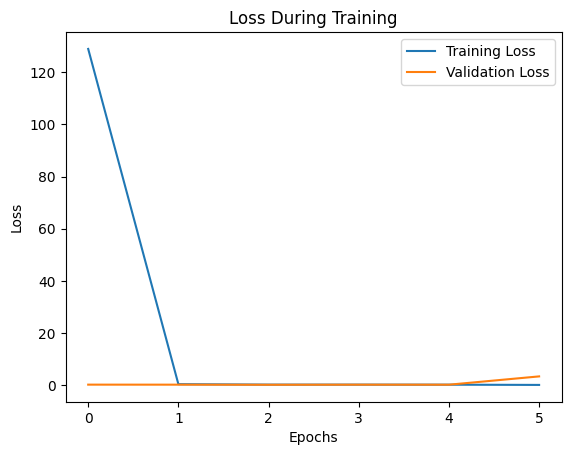

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tyler Burguillos 10/15/24

#### Model 7: Three Layer Convoluted Neural Network (CNN) with Batch Normalization

This model is an extension of the previous CNN with an additional **Conv2D** layer to deepen the network and potentially improve its feature extraction abilities. We also keep **early stopping** and **model checkpointing** to save the best model.

##### Key Features:
- **Conv2D Layer 1**: 16 filters with a 3x3 kernel and ReLU activation.
- **Batch Normalization Layer 1**: added for normalization
- **MaxPooling**: Reduces spatial dimensions after convolution.
- **Conv2D Layer 2**: 32 filters with a 3x3 kernel and ReLU activation.
- **Batch Normalization Layer 2**: added for normalization
- **MaxPooling**: Reduces spatial dimensions after convolution.
- **Conv2D Layer 3**: 64 filters with a 3x3 kernel and ReLU activation.
- **Batch Normalization Layer 3**: added for normalization
- **MaxPooling**: Reduces spatial dimensions after convolution.
- **Flattening**: Converts the 2D outputs into a 1D vector for fully connected layers.
- **Fully Connected Layer**: 256 neurons with ReLU activation.
- **Output Layer**: Single neuron for regression (predicting house prices).
Optimizer: Adam optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the CNN model
model = Sequential()
model.add(Input(shape=(128, 128, 3))) # Input shape: 128x128 images with 3 color channels (RGB)
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu')) # First Conv2D Layer
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu')) # Second Conv2D Layer
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu')) # Third Conv2D Layer
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flatten the output for the fully connected layer
model.add(Dense(128, activation='relu')) # Dense layer with 128 neurons
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Summary of the model
model.summary()

# Tyler Burguillos 10/16/24

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 124, 124, 16)        │           1,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 124, 124, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 62, 62, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 60, 60, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 60, 60, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,630,689 (6.22 MB)

 Trainable params: 1,630,465 (6.22 MB)

 Non-trainable params: 224 (896.00 B)

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='cnn_model_tyler_7.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Tyler Burguillos 10/16/24

**Training the CNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    img_arr_train, y_train,  # Image data for training
    validation_data=(img_arr_test, y_test),  # Validation on the image test data
    epochs=100,       # Max number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback]  # Include both callbacks
)

# Tyler Burguillos 10/16/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 69.63025, saving model to cnn_model_tyler_7.keras
11/11 - 10s - 864ms/step - loss: 58.3466 - val_loss: 69.6302
Epoch 2/100

Epoch 2: val_loss improved from 69.63025 to 3.85709, saving model to cnn_model_tyler_7.keras
11/11 - 0s - 24ms/step - loss: 1.5852 - val_loss: 3.8571
Epoch 3/100

Epoch 3: val_loss improved from 3.85709 to 0.32559, saving model to cnn_model_tyler_7.keras
11/11 - 0s - 24ms/step - loss: 0.5198 - val_loss: 0.3256
Epoch 4/100

Epoch 4: val_loss improved from 0.32559 to 0.30076, saving model to cnn_model_tyler_7.keras
11/11 - 0s - 28ms/step - loss: 0.3322 - val_loss: 0.3008
Epoch 5/100

Epoch 5: val_loss improved from 0.30076 to 0.29933, saving model to cnn_model_tyler_7.keras
11/11 - 0s - 28ms/step - loss: 0.3040 - val_loss: 0.2993
Epoch 6/100

Epoch 6: val_loss improved from 0.29933 to 0.29773, saving model to cnn_model_tyler_7.keras
11/11 - 0s - 24ms/step - loss: 0.2937 - val_loss: 0.2977
Epoch 7/100

Epoch 7: val_

**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Predict on the test set
y_pred = model.predict(img_arr_test)

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"CNN Test RMSE: {rmse}")

# Tyler Burguillos 10/16/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step
CNN Test RMSE: 267463.3125


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')

# Tyler Burguillos 10/16/24

R-squared Score: -0.67


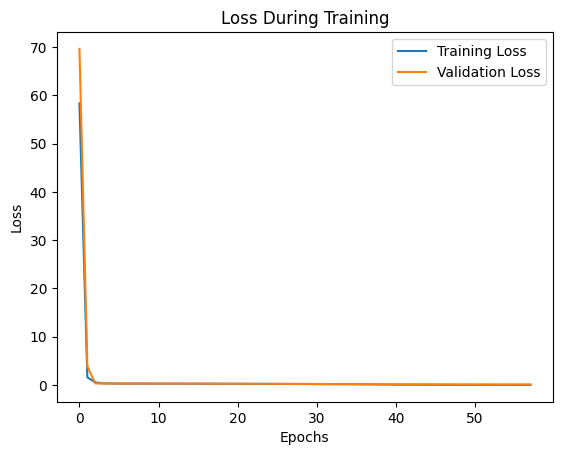

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tyler Burguillos 10/16/24

#### Model 8: Three Layer Convoluted Neural Network (CNN) with Batch Normalization

This model is an extension of the previous CNN with an additional **Conv2D** layer to deepen the network and potentially improve its feature extraction abilities. We also keep **early stopping** and **model checkpointing** to save the best model.

##### Key Features:
- **Conv2D Layer 1**: 16 filters with a 3x3 kernel and ReLU activation.
- **Batch Normalization Layer 1**: added for normalization
- **MaxPooling**: Reduces spatial dimensions after convolution.
- **Conv2D Layer 2**: 32 filters with a 3x3 kernel and ReLU activation.
- **Batch Normalization Layer 2**: added for normalization
- **MaxPooling**: Reduces spatial dimensions after convolution.
- **Conv2D Layer 3**: 64 filters with a 3x3 kernel and ReLU activation.
- **Batch Normalization Layer 3**: added for normalization
- **MaxPooling**: Reduces spatial dimensions after convolution.
- **Flattening**: Converts the 2D outputs into a 1D vector for fully connected layers.
- **Fully Connected Layer**: 256 neurons with ReLU activation.
- **Output Layer**: Single neuron for regression (predicting house prices).
Optimizer: Adam optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
import numpy as np
from sklearn.metrics import mean_squared_error

# Clear previous Keras session
K.clear_session()

# Define the CNN model
model = Sequential()
model.add(Input(shape=(128, 128, 3))) # Input shape: 128x128 images with 3 color channels (RGB)
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu')) # First Conv2D Layer
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu')) # Second Conv2D Layer
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu')) # Third Conv2D Layer
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flatten the output for the fully connected layer
model.add(Dense(128, activation='relu')) # Dense layer with 128 neurons
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Summary of the model
model.summary()

# Tyler Burguillos 10/16/24

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 59, 59, 32)          │          12,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 59, 59, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 29, 29, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 27, 27, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 27, 27, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,384,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,416,929 (5.41 MB)

 Trainable params: 1,416,705 (5.40 MB)

 Non-trainable params: 224 (896.00 B)

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='cnn_model_tyler_8.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Tyler Burguillos 10/16/24

**Training the CNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    img_arr_train, y_train,  # Image data for training
    validation_data=(img_arr_test, y_test),  # Validation on the image test data
    epochs=100,       # Max number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback]  # Include both callbacks
)

# Tyler Burguillos 10/16/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 16.93066, saving model to cnn_model_tyler_8.keras
11/11 - 10s - 898ms/step - loss: 37.7019 - val_loss: 16.9307
Epoch 2/100

Epoch 2: val_loss improved from 16.93066 to 0.57189, saving model to cnn_model_tyler_8.keras
11/11 - 3s - 256ms/step - loss: 1.5210 - val_loss: 0.5719
Epoch 3/100

Epoch 3: val_loss improved from 0.57189 to 0.17414, saving model to cnn_model_tyler_8.keras
11/11 - 0s - 27ms/step - loss: 0.3127 - val_loss: 0.1741
Epoch 4/100

Epoch 4: val_loss improved from 0.17414 to 0.16723, saving model to cnn_model_tyler_8.keras
11/11 - 0s - 25ms/step - loss: 0.2890 - val_loss: 0.1672
Epoch 5/100

Epoch 5: val_loss improved from 0.16723 to 0.14646, saving model to cnn_model_tyler_8.keras
11/11 - 0s - 25ms/step - loss: 0.2702 - val_loss: 0.1465
Epoch 6/100

Epoch 6: val_loss did not improve from 0.14646
11/11 - 0s - 16ms/step - loss: 0.2375 - val_loss: 0.1735
Epoch 7/100

Epoch 7: val_loss did not improve from 0.14646
11/11 - 0s

**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Predict on the test set
y_pred = model.predict(img_arr_test)

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"CNN Test RMSE: {rmse}")

# Tyler Burguillos 10/16/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step
CNN Test RMSE: 337679.375


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')

# Tyler Burguillos 10/16/24

R-squared Score: -1.66


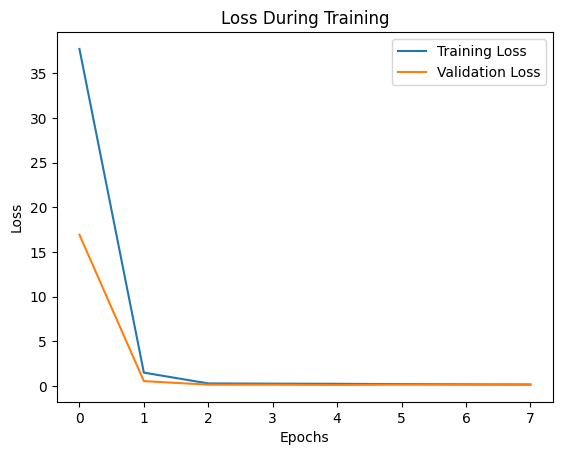

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tyler Burguillos 10/16/24

#### Model 9: Four Layer Convoluted Neural Network (CNN) with Batch Normalization

This model is an extension of the previous CNN with an additional **Conv2D** layer to deepen the network and potentially improve its feature extraction abilities. We also keep **early stopping** and **model checkpointing** to save the best model.

##### Key Features:
- **Conv2D Layer 1**: 8 filters with a 3x3 kernel and ReLU activation.
- **Batch Normalization Layer 1**: added for normalization
- **Conv2D Layer 2**: 16 filters with a 3x3 kernel and ReLU activation.
- **Batch Normalization Layer 1**: added for normalization
- **MaxPooling**: Reduces spatial dimensions after convolution.
- **Conv2D Layer 3**: 32 filters with a 3x3 kernel and ReLU activation.
- **Batch Normalization Layer 2**: added for normalization
- **MaxPooling**: Reduces spatial dimensions after convolution.
- **Conv2D Layer 4**: 64 filters with a 3x3 kernel and ReLU activation.
- **Batch Normalization Layer 3**: added for normalization
- **MaxPooling**: Reduces spatial dimensions after convolution.
- **Flattening**: Converts the 2D outputs into a 1D vector for fully connected layers.
- **Fully Connected Layer**: 128 neurons with ReLU activation.
- **Output Layer**: Single neuron for regression (predicting house prices).
Optimizer: Adam optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
import numpy as np
from sklearn.metrics import mean_squared_error


# Clear previous Keras session
K.clear_session()

# Define the CNN model
model = Sequential()
model.add(Input(shape=(128, 128, 3))) # Input shape: 128x128 images with 3 color channels (RGB)
model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu')) # First Conv2D Layer
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu')) # Second Conv2D Layer
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu')) # Third Conv2D Layer
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu')) # Fourth Conv2D Layer
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flatten the output for the fully connected layer
model.add(Dense(128, activation='relu')) # Dense layer with 128 neurons
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Summary of the model
model.summary()

# Tyler Burguillos 10/16/24

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 8)         │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 12, 12, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 320,177 (1.22 MB)

 Trainable params: 319,937 (1.22 MB)

 Non-trainable params: 240 (960.00 B)

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='cnn_model_tyler_9.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Tyler Burguillos 10/16/24

**Training the CNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    img_arr_train, y_train,  # Image data for training
    validation_data=(img_arr_test, y_test),  # Validation on the image test data
    epochs=100,       # Max number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback]  # Include both callbacks
)

# Tyler Burguillos 10/16/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 9.65415, saving model to cnn_model_tyler_9.keras
11/11 - 12s - 1s/step - loss: 16.5232 - val_loss: 9.6542
Epoch 2/100

Epoch 2: val_loss improved from 9.65415 to 0.26986, saving model to cnn_model_tyler_9.keras
11/11 - 0s - 16ms/step - loss: 1.2100 - val_loss: 0.2699
Epoch 3/100

Epoch 3: val_loss improved from 0.26986 to 0.12636, saving model to cnn_model_tyler_9.keras
11/11 - 0s - 27ms/step - loss: 0.2327 - val_loss: 0.1264
Epoch 4/100

Epoch 4: val_loss did not improve from 0.12636
11/11 - 0s - 20ms/step - loss: 0.1646 - val_loss: 0.1504
Epoch 5/100

Epoch 5: val_loss improved from 0.12636 to 0.12054, saving model to cnn_model_tyler_9.keras
11/11 - 0s - 21ms/step - loss: 0.1335 - val_loss: 0.1205
Epoch 6/100

Epoch 6: val_loss did not improve from 0.12054
11/11 - 0s - 10ms/step - loss: 0.1097 - val_loss: 0.1261
Epoch 7/100

Epoch 7: val_loss did not improve from 0.12054
11/11 - 0s - 14ms/step - loss: 0.0888 - val_loss: 0.1662
Epoch

**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Predict on the test set
y_pred = model.predict(img_arr_test)

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"CNN Test RMSE: {rmse}")

# Tyler Burguillos 10/16/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 283ms/step
CNN Test RMSE: 331740.0625


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')

# Tyler Burguillos 10/16/24

R-squared Score: -1.57


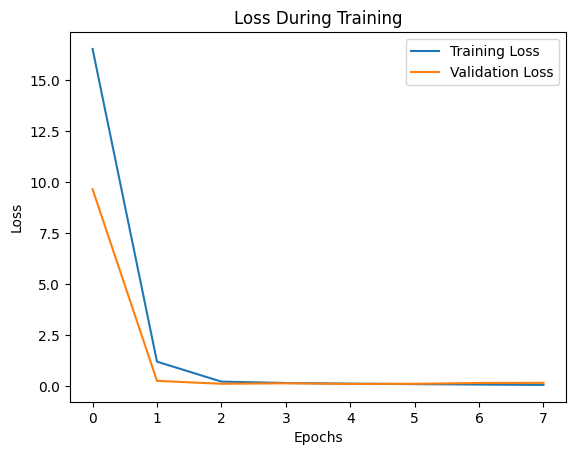

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tyler Burguillos 10/16/24

#### Model 10: Three Layer Convoluted Neural Network (CNN) with Batch Normalization

This model is an extension of the previous CNN with an additional **Conv2D** layer to deepen the network and potentially improve its feature extraction abilities. We also keep **early stopping** and **model checkpointing** to save the best model.

##### Key Features:
- **Conv2D Layer 1**: 16 filters with a 3x3 kernel and ReLU activation.
- **Batch Normalization Layer 1**: added for normalization
- **MaxPooling**: Reduces spatial dimensions after convolution.
- **Conv2D Layer 2**: 32 filters with a 3x3 kernel and ReLU activation.
- **Batch Normalization Layer 2**: added for normalization
- **MaxPooling**: Reduces spatial dimensions after convolution.
- **Conv2D Layer 3**: 64 filters with a 3x3 kernel and ReLU activation.
- **Batch Normalization Layer 3**: added for normalization
- **MaxPooling**: Reduces spatial dimensions after convolution.
- **Flattening**: Converts the 2D outputs into a 1D vector for fully connected layers.
- **Fully Connected Layer**: 128 neurons with ReLU activation.
- **Output Layer**: Single neuron for regression (predicting house prices).
Optimizer: Adam optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the CNN model
model = Sequential()
model.add(Input(shape=(128, 128, 3))) # Input shape: 128x128 images with 3 color channels (RGB)
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu')) # First Conv2D Layer
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu')) # Second Conv2D Layer
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu')) # Third Conv2D Layer
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flatten the output for the fully connected layer
model.add(Dense(128, activation='relu')) # Dense layer with 128 neurons
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Summary of the model
model.summary()

# Tyler Burguillos 10/16/24

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,629,921 (6.22 MB)

 Trainable params: 1,629,697 (6.22 MB)

 Non-trainable params: 224 (896.00 B)

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='cnn_model_tyler_10.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Tyler Burguillos 10/16/24

**Training the CNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    img_arr_train, y_train,  # Image data for training
    validation_data=(img_arr_test, y_test),  # Validation on the image test data
    epochs=100,       # Max number of epochs
    batch_size=16,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback]  # Include both callbacks
)

# Tyler Burguillos 10/16/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.09093, saving model to cnn_model_tyler_10.keras
21/21 - 9s - 451ms/step - loss: 68.8501 - val_loss: 0.0909
Epoch 2/100

Epoch 2: val_loss improved from 0.09093 to 0.07205, saving model to cnn_model_tyler_10.keras
21/21 - 0s - 14ms/step - loss: 3.3717 - val_loss: 0.0720
Epoch 3/100

Epoch 3: val_loss did not improve from 0.07205
21/21 - 0s - 23ms/step - loss: 0.7309 - val_loss: 0.0784
Epoch 4/100

Epoch 4: val_loss improved from 0.07205 to 0.07136, saving model to cnn_model_tyler_10.keras
21/21 - 0s - 21ms/step - loss: 0.2196 - val_loss: 0.0714
Epoch 5/100

Epoch 5: val_loss did not improve from 0.07136
21/21 - 0s - 8ms/step - loss: 0.1036 - val_loss: 0.0866
Epoch 6/100

Epoch 6: val_loss did not improve from 0.07136
21/21 - 0s - 14ms/step - loss: 0.0770 - val_loss: 0.1019
Epoch 7/100

Epoch 7: val_loss did not improve from 0.07136
21/21 - 0s - 8ms/step - loss: 0.0642 - val_loss: 0.1004
Epoch 7: early stopping


**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Predict on the test set
y_pred = model.predict(img_arr_test)

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"CNN Test RMSE: {rmse}")

# Tyler Burguillos 10/16/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step
CNN Test RMSE: 253393.4375


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')

# Tyler Burguillos 10/16/24

R-squared Score: -0.50


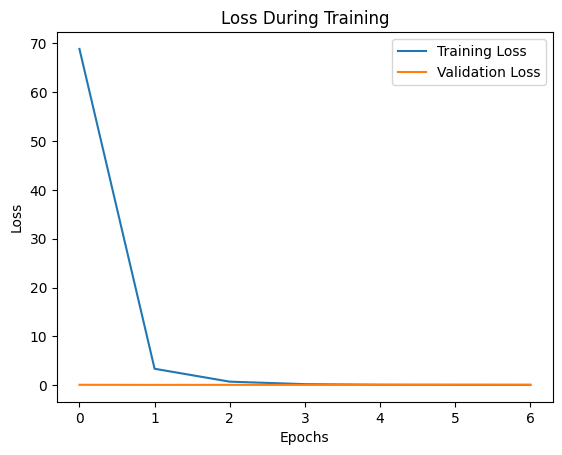

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tyler Burguillos 10/16/24

#### Hyperparameter Tuning Model 7: Three Layer Convoluted Neural Network (CNN) with Batch Normalization

This model uses Keras Tuner for **hyperparameter tuning** to find the best combination of filters, kernel sizes, dense units, and learning rates for improved feature extraction and prediction accuracy.


In [ ]:
!pip install keras-tuner --upgrade

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import r2_score

# Clear previous Keras session
K.clear_session()

def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(128, 128, 3)))

    # First Conv2D Layer
    model.add(Conv2D(
        filters=hp.Int('filters_1', min_value=16, max_value=64, step=16),
        kernel_size=(hp.Choice('kernel_size_1', values=[3, 5])),
        activation='relu'
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second Conv2D Layer
    model.add(Conv2D(
        filters=hp.Int('filters_2', min_value=32, max_value=128, step=32),
        kernel_size=(hp.Choice('kernel_size_2', values=[3, 5])),
        activation='relu'
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Third Conv2D Layer
    model.add(Conv2D(
        filters=hp.Int('filters_3', min_value=64, max_value=256, step=64),
        kernel_size=(hp.Choice('kernel_size_3', values=[3, 5])),
        activation='relu'
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten and Dense Layers
    model.add(Flatten())
    model.add(Dense(
        units=hp.Int('dense_units', min_value=128, max_value=512, step=128),
        activation='relu'
    ))

    # Output Layer
    model.add(Dense(1))  # Regression output

    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        ),
        loss='mean_squared_error'
    )

    return model

# Tyler Burguillos 10/17/24

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.1 MB/s eta 0:00:00


<ipython-input-184-d4907add00ea>:7: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import Hyperband


**Set Up Keras Tuner with Hyperband Search**

In [ ]:
from keras_tuner import Hyperband

tuner = Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=30,
    factor=3,
    directory='hyperband_dir',
    project_name='cnn_hyperband'
)

# Tyler Burguillos 10/17/24

 **Implement Early Stopping and Model Checkpointing**

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Save the best model during training
checkpoint_callback = ModelCheckpoint(
    filepath='best_cnn_model.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2
)

# Tyler Burguillos 10/17/24

**Run the Hyperparameter Search**

In [ ]:
tuner.search(
    img_arr_train, y_train,
    validation_data=(img_arr_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping_callback, checkpoint_callback],
    verbose=2
)

# Tyler Burguillos 10/17/24

Trial 86 Complete [00h 16m 40s]
val_loss: 0.1042027696967125

Best val_loss So Far: 0.07805442810058594
Total elapsed time: 01h 33m 47s

Search: Running Trial #87

Value             |Best Value So Far |Hyperparameter
64                |16                |filters_1
3                 |3                 |kernel_size_1
128               |32                |filters_2
5                 |5                 |kernel_size_2
256               |128               |filters_3
3                 |3                 |kernel_size_3
256               |512               |dense_units
0.001             |0.0001            |learning_rate
30                |4                 |tuner/epochs
0                 |2                 |tuner/initial_epoch
0                 |3                 |tuner/bracket
0                 |1                 |tuner/round

Epoch 1/30

Epoch 1: val_loss improved from inf to 72323.01562, saving model to best_cnn_model.keras
11/11 - 62s - 6s/step - loss: 3231.1787 - val_loss: 72323.0156
Epoch

KeyboardInterrupt: 

**Retrieve the Best Model and Hyperparameters**

In [ ]:
# Get the best model and hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print("Best Hyperparameters:")
for param, value in best_hyperparameters.values.items():
    print(f"{param}: {value}")

# Tyler Burguillos 10/17/24

Best Hyperparameters:
filters_1: 16
kernel_size_1: 3
filters_2: 32
kernel_size_2: 5
filters_3: 128
kernel_size_3: 3
dense_units: 512
learning_rate: 0.0001
tuner/epochs: 4
tuner/initial_epoch: 2
tuner/bracket: 3
tuner/round: 1
tuner/trial_id: 0017


**Evaluate the Best Model and Calculate R-squared**

In [ ]:
# Evaluate the best model
loss = best_model.evaluate(img_arr_test, y_test, verbose=2)
print(f"Test Loss: {loss}")

# Predict on the test set
y_pred = best_model.predict(img_arr_test)

# Decode predictions to the original range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')

# Tyler Burguillos 10/17/24

3/3 - 2s - 600ms/step - loss: 0.0781
Test Loss: 0.07805442810058594
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 271ms/step
R-squared Score: -0.17


**Visualize Training Loss**

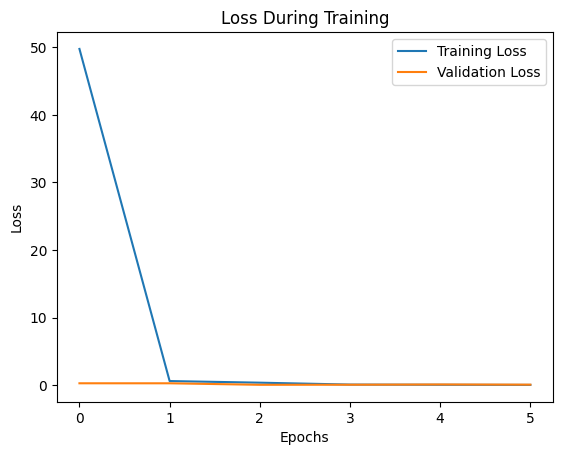

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tyler Burguillos 10/17/24

#### Hyperparameter Tuning Model 7: Three Layer Convoluted Neural Network (CNN) with Batch Normalization

This model uses Keras Tuner for **hyperparameter tuning** to find the best combination of filters, kernel sizes, dense units, and learning rates for improved feature extraction and prediction accuracy.


In [ ]:
!pip install keras-tuner --upgrade

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import r2_score

# Clear previous Keras session
K.clear_session()

def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(128, 128, 3)))

    # First Conv2D Layer
    model.add(Conv2D(
        filters=hp.Int('filters_1', min_value=16, max_value=64, step=16),
        kernel_size=(hp.Choice('kernel_size_1', values=[3, 5])),
        activation='relu'
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second Conv2D Layer
    model.add(Conv2D(
        filters=hp.Int('filters_2', min_value=32, max_value=128, step=32),
        kernel_size=(hp.Choice('kernel_size_2', values=[3, 5])),
        activation='relu'
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Third Conv2D Layer
    model.add(Conv2D(
        filters=hp.Int('filters_3', min_value=64, max_value=256, step=64),
        kernel_size=(hp.Choice('kernel_size_3', values=[3, 5])),
        activation='relu'
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten and Dense Layers
    model.add(Flatten())
    model.add(Dense(
        units=hp.Int('dense_units', min_value=128, max_value=512, step=128),
        activation='relu'
    ))

    # Output Layer
    model.add(Dense(1))  # Regression output

    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        ),
        loss='mean_squared_error'
    )

    return model

# Tyler Burguillos 10/17/24

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.6 MB/s eta 0:00:00


**Set Up Keras Tuner with Hyperband Search**

In [ ]:
from keras_tuner import Hyperband

tuner = Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=30,
    factor=3,
    directory='hyperband_dir',
    project_name='cnn_hyperband'
)

# Tyler Burguillos 10/17/24

 **Implement Early Stopping and Model Checkpointing**

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Save the best model during training
checkpoint_callback = ModelCheckpoint(
    filepath='best_cnn_model.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2
)

# Tyler Burguillos 10/17/24

**Run the Hyperparameter Search**

In [ ]:
tuner.search(
    img_arr_train, y_train,
    validation_data=(img_arr_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping_callback, checkpoint_callback],
    verbose=2
)

# Tyler Burguillos 10/17/24

Trial 90 Complete [00h 02m 12s]
val_loss: 0.22378621995449066

Best val_loss So Far: 0.07065203040838242
Total elapsed time: 01h 24m 35s


**Retrieve the Best Model and Hyperparameters**

In [ ]:
# Get the best model and hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print("Best Hyperparameters:")
for param, value in best_hyperparameters.values.items():
    print(f"{param}: {value}")

# Tyler Burguillos 10/17/24

Best Hyperparameters:
filters_1: 16
kernel_size_1: 3
filters_2: 32
kernel_size_2: 3
filters_3: 256
kernel_size_3: 3
dense_units: 384
learning_rate: 0.0001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 3
tuner/round: 2
tuner/trial_id: 0035


#### Model 7: Three Layer Convoluted Neural Network (CNN) with Batch Normalization using the Hyperparameter tuning values

This model is an extension of the previous CNN with an additional **Conv2D** layer to deepen the network and potentially improve its feature extraction abilities. We also keep **early stopping** and **model checkpointing** to save the best model.

##### Key Features:
- **Conv2D Layer 1**: 16 filters with a 3x3 kernel and ReLU activation.
- **Batch Normalization Layer 1**: added for normalization
- **MaxPooling**: Reduces spatial dimensions after convolution.
- **Conv2D Layer 2**: 32 filters with a 5x5 kernel and ReLU activation.
- **Batch Normalization Layer 2**: added for normalization
- **MaxPooling**: Reduces spatial dimensions after convolution.
- **Conv2D Layer 3**: 128 filters with a 3x3 kernel and ReLU activation.
- **Batch Normalization Layer 3**: added for normalization
- **MaxPooling**: Reduces spatial dimensions after convolution.
- **Flattening**: Converts the 2D outputs into a 1D vector for fully connected layers.
- **Fully Connected Layer**: 384 neurons with ReLU activation.
- **Output Layer**: Single neuron for regression (predicting house prices).
Optimizer: Adam optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
import numpy as np
from tensorflow.keras.optimizers import Adam

# Clear previous Keras session
K.clear_session()

# Define the CNN model
model = Sequential()
model.add(Input(shape=(128, 128, 3))) # Input shape: 128x128 images with 3 color channels (RGB)
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu')) # First Conv2D Layer
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu')) # Second Conv2D Layer
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu')) # Third Conv2D Layer
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flatten the output for the fully connected layer
model.add(Dense(384, activation='relu')) # Dense layer with 128 neurons
model.add(Dense(1)) # Output layer for regression (predicting house prices)

learning_rate = 0.0001
adam_optimizer = Adam(learning_rate=learning_rate)
model.compile(loss='mean_squared_error', optimizer=adam_optimizer)

# Summary of the model
model.summary()

# Tyler Burguillos 10/17/24

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 59, 59, 32)          │          12,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 59, 59, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 29, 29, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 27, 27, 128)         │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 27, 27, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 21632)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 384)                 │       8,307,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             385 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,358,433 (31.88 MB)

 Trainable params: 8,358,081 (31.88 MB)

 Non-trainable params: 352 (1.38 KB)

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='cnn_model_tyler_7.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Tyler Burguillos 10/17/24

**Training the CNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    img_arr_train, y_train,  # Image data for training
    validation_data=(img_arr_test, y_test),  # Validation on the image test data
    epochs=100,       # Max number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback]  # Include both callbacks
)

# Tyler Burguillos 10/17/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 36.76864, saving model to cnn_model_tyler_7.keras
11/11 - 6s - 575ms/step - loss: 38.9531 - val_loss: 36.7686
Epoch 2/100

Epoch 2: val_loss improved from 36.76864 to 2.70914, saving model to cnn_model_tyler_7.keras
11/11 - 6s - 536ms/step - loss: 4.4065 - val_loss: 2.7091
Epoch 3/100

Epoch 3: val_loss improved from 2.70914 to 0.20872, saving model to cnn_model_tyler_7.keras
11/11 - 1s - 79ms/step - loss: 1.5634 - val_loss: 0.2087
Epoch 4/100

Epoch 4: val_loss improved from 0.20872 to 0.07724, saving model to cnn_model_tyler_7.keras
11/11 - 7s - 652ms/step - loss: 0.2766 - val_loss: 0.0772
Epoch 5/100

Epoch 5: val_loss improved from 0.07724 to 0.07380, saving model to cnn_model_tyler_7.keras
11/11 - 1s - 98ms/step - loss: 0.1312 - val_loss: 0.0738
Epoch 6/100

Epoch 6: val_loss did not improve from 0.07380
11/11 - 0s - 33ms/step - loss: 0.1065 - val_loss: 0.0752
Epoch 7/100

Epoch 7: val_loss did not improve from 0.07380
11/11 - 0s

**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
from sklearn.metrics import mean_squared_error

# Predict on the test set
y_pred = model.predict(img_arr_test)

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"CNN Test RMSE: {rmse}")

# Tyler Burguillos 10/17/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 210ms/step
CNN Test RMSE: 240200.421875


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')

# Tyler Burguillos 10/17/24

R-squared Score: -0.35


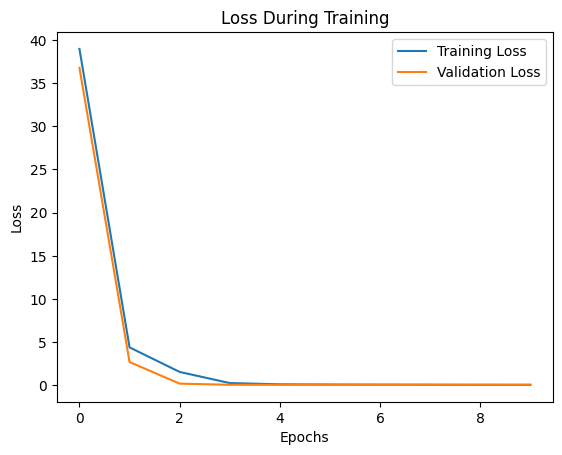

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tyler Burguillos 10/17/24

### CNN Model Design and Testing (Austin Nolte)

#### Model 1: Baseline Convoluted Neural Network (CNN)

This is our first Convolutional Neural Network (CNN) model, designed to process image data (128x128 RGB images). The model consists of a single convolutional layer followed by a MaxPooling layer, flattening, and dense layers for regression (predicting house prices). We also implement **early stopping** to prevent overfitting and **model checkpointing** to save the best-performing model during training.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error
import numpy as np
import tensorflow.keras.backend as K

# Clear previous Keras session
K.clear_session()

# Define the CNN model
model = Sequential()

# Input shape of image data: 128x128 images with 3 color channels (RGB)
model.add(Input(shape=(128, 128, 3)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the Conv2D layers to feed into dense layers
model.add(Flatten())

model.add(Dense(64, activation='sigmoid'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

# Summary of the model
model.summary()

# Austin Nolte 10/20/24

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 127008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       8,128,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,129,537 (31.01 MB)

 Trainable params: 8,129,537 (31.01 MB)

 Non-trainable params: 0 (0.00 B)

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

checkpoint_callback = ModelCheckpoint(filepath='cnn_model_Austin_sigmoidAdam_1.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Austin Nolte 10/20/24

**Training the CNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(img_arr_train, y_train,validation_data=(img_arr_test, y_test),epochs=100,batch_size=32,verbose=2,callbacks=[early_stopping_callback, checkpoint_callback])

# Austin Nolte 10/20/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 10.44674, saving model to cnn_model_Austin_sigmoidAdam_1.keras
11/11 - 3s - 293ms/step - loss: 10.3920 - val_loss: 10.4467
Epoch 2/100

Epoch 2: val_loss improved from 10.44674 to 8.66846, saving model to cnn_model_Austin_sigmoidAdam_1.keras
11/11 - 1s - 72ms/step - loss: 9.6517 - val_loss: 8.6685
Epoch 3/100

Epoch 3: val_loss improved from 8.66846 to 7.09755, saving model to cnn_model_Austin_sigmoidAdam_1.keras
11/11 - 7s - 643ms/step - loss: 7.9696 - val_loss: 7.0976
Epoch 4/100

Epoch 4: val_loss improved from 7.09755 to 5.75974, saving model to cnn_model_Austin_sigmoidAdam_1.keras
11/11 - 4s - 395ms/step - loss: 6.4925 - val_loss: 5.7597
Epoch 5/100

Epoch 5: val_loss improved from 5.75974 to 4.61750, saving model to cnn_model_Austin_sigmoidAdam_1.keras
11/11 - 1s - 88ms/step - loss: 5.2469 - val_loss: 4.6175
Epoch 6/100

Epoch 6: val_loss improved from 4.61750 to 3.66582, saving model to cnn_model_Austin_sigmoidAdam_1.keras
11/1

**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Predict on the test set
y_pred = model.predict(img_arr_test)

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"CNN Test RMSE: {rmse}")
# Austin Nolte 10/20/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
CNN Test RMSE: 207095.4375


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.8f}')

# Austin Nolte 10/20/24

R-squared Score: -0.00053596


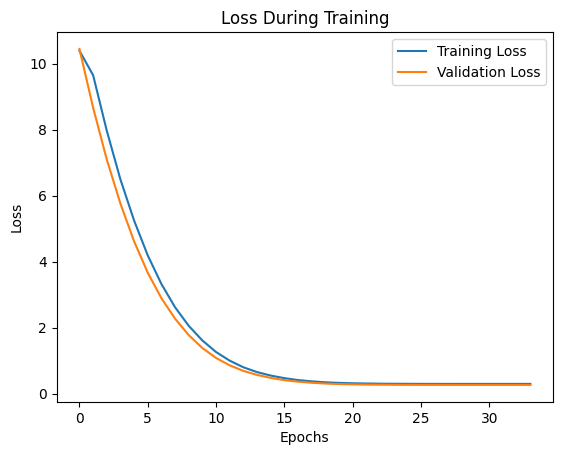

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Austin Nolte 10/20/24

#### Model 2: Baseline Convoluted Neural Network (CNN)

This is our first Convolutional Neural Network (CNN) model, designed to process image data (128x128 RGB images). The model consists of a single convolutional layer followed by a MaxPooling layer, flattening, and dense layers for regression (predicting house prices). We also implement **early stopping** to prevent overfitting and **model checkpointing** to save the best-performing model during training.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error
import numpy as np
import tensorflow.keras.backend as K

# Clear previous Keras session
K.clear_session()

# Define the CNN model
model = Sequential()

# Input shape of image data: 128x128 images with 3 color channels (RGB)
model.add(Input(shape=(128, 128, 3)))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the Conv2D layers to feed into dense layers
model.add(Flatten())

model.add(Dense(128, activation='sigmoid'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

# Summary of the model
model.summary()

# Austin Nolte 10/20/24

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 124, 124, 64)        │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 246016)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      31,490,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,495,169 (120.14 MB)

 Trainable params: 31,495,169 (120.14 MB)

 Non-trainable params: 0 (0.00 B)

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

checkpoint_callback = ModelCheckpoint(filepath='cnn_model_Austin_sigmoidAdam_2.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Austin Nolte 10/20/24

**Training the CNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(img_arr_train, y_train,validation_data=(img_arr_test, y_test),epochs=100,batch_size=32,verbose=2,callbacks=[early_stopping_callback, checkpoint_callback])

# Austin Nolte 10/20/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 42.63077, saving model to cnn_model_Austin_sigmoidAdam_2.keras
11/11 - 43s - 4s/step - loss: 42.9505 - val_loss: 42.6308
Epoch 2/100

Epoch 2: val_loss improved from 42.63077 to 34.10982, saving model to cnn_model_Austin_sigmoidAdam_2.keras
11/11 - 56s - 5s/step - loss: 38.9103 - val_loss: 34.1098
Epoch 3/100

Epoch 3: val_loss improved from 34.10982 to 26.78249, saving model to cnn_model_Austin_sigmoidAdam_2.keras
11/11 - 20s - 2s/step - loss: 30.8630 - val_loss: 26.7825
Epoch 4/100

Epoch 4: val_loss improved from 26.78249 to 20.65330, saving model to cnn_model_Austin_sigmoidAdam_2.keras
11/11 - 24s - 2s/step - loss: 24.0657 - val_loss: 20.6533
Epoch 5/100

Epoch 5: val_loss improved from 20.65330 to 15.69077, saving model to cnn_model_Austin_sigmoidAdam_2.keras
11/11 - 18s - 2s/step - loss: 18.4416 - val_loss: 15.6908
Epoch 6/100

Epoch 6: val_loss improved from 15.69077 to 11.74398, saving model to cnn_model_Austin_sigmoidAdam_2.k

**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Predict on the test set
y_pred = model.predict(img_arr_test)

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"CNN Test RMSE: {rmse}")
# Austin Nolte 10/20/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
CNN Test RMSE: 207209.1875


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.8f}')

# Austin Nolte 10/20/24

R-squared Score: -0.00163531


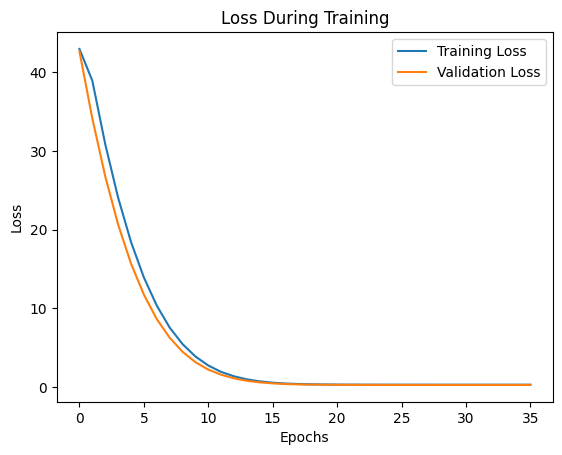

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Austin Nolte 10/20/24

#### Model 3: Baseline Convoluted Neural Network (CNN)

This is our first Convolutional Neural Network (CNN) model, designed to process image data (128x128 RGB images). The model consists of a single convolutional layer followed by a MaxPooling layer, flattening, and dense layers for regression (predicting house prices). We also implement **early stopping** to prevent overfitting and **model checkpointing** to save the best-performing model during training.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error
import numpy as np
import tensorflow.keras.backend as K

# Clear previous Keras session
K.clear_session()

# Define the CNN model
model = Sequential()

# Input shape of image data: 128x128 images with 3 color channels (RGB)
model.add(Input(shape=(128, 128, 3)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(3, 3)))

# Flatten the output of the Conv2D layers to feed into dense layers
model.add(Flatten())

model.add(Dense(256, activation='sigmoid'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

# Summary of the model
model.summary()

# Austin Nolte 10/20/24

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 42, 42, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 225792)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      57,803,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57,806,849 (220.52 MB)

 Trainable params: 57,806,849 (220.52 MB)

 Non-trainable params: 0 (0.00 B)

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

checkpoint_callback = ModelCheckpoint(filepath='cnn_model_Austin_sigmoidAdam_3.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Austin Nolte 10/20/24

**Training the CNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(img_arr_train, y_train,validation_data=(img_arr_test, y_test),epochs=100,batch_size=32,verbose=2,callbacks=[early_stopping_callback, checkpoint_callback])

# Austin Nolte 10/20/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 55.27170, saving model to cnn_model_Austin_sigmoidAdam_3.keras
11/11 - 46s - 4s/step - loss: 59.8862 - val_loss: 55.2717
Epoch 2/100

Epoch 2: val_loss improved from 55.27170 to 37.17143, saving model to cnn_model_Austin_sigmoidAdam_3.keras
11/11 - 60s - 5s/step - loss: 47.2662 - val_loss: 37.1714
Epoch 3/100

Epoch 3: val_loss improved from 37.17143 to 23.51861, saving model to cnn_model_Austin_sigmoidAdam_3.keras
11/11 - 73s - 7s/step - loss: 31.0299 - val_loss: 23.5186
Epoch 4/100

Epoch 4: val_loss improved from 23.51861 to 13.99971, saving model to cnn_model_Austin_sigmoidAdam_3.keras
11/11 - 19s - 2s/step - loss: 19.1621 - val_loss: 13.9997
Epoch 5/100

Epoch 5: val_loss improved from 13.99971 to 7.82866, saving model to cnn_model_Austin_sigmoidAdam_3.keras
11/11 - 52s - 5s/step - loss: 11.1190 - val_loss: 7.8287
Epoch 6/100

Epoch 6: val_loss improved from 7.82866 to 4.12893, saving model to cnn_model_Austin_sigmoidAdam_3.keras

**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Predict on the test set
y_pred = model.predict(img_arr_test)

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"CNN Test RMSE: {rmse}")
# Austin Nolte 10/20/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
CNN Test RMSE: 207116.765625


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.8f}')

# Austin Nolte 10/20/24

R-squared Score: -0.00074208


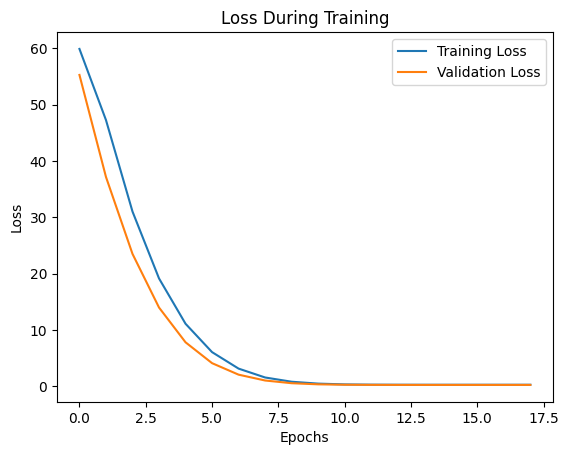

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Austin Nolte 10/20/24

#### Model 4: Baseline Convoluted Neural Network (CNN)

This is our first Convolutional Neural Network (CNN) model, designed to process image data (128x128 RGB images). The model consists of a single convolutional layer followed by a MaxPooling layer, flattening, and dense layers for regression (predicting house prices). We also implement **early stopping** to prevent overfitting and **model checkpointing** to save the best-performing model during training.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error
import numpy as np
import tensorflow.keras.backend as K

# Clear previous Keras session
K.clear_session()

# Define the CNN model
model = Sequential()

# Input shape of image data: 128x128 images with 3 color channels (RGB)
model.add(Input(shape=(128, 128, 3)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=16, kernel_size=(3, 3)))
model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())






# Flatten the output of the Conv2D layers to feed into dense layers
model.add(Flatten())

model.add(Dense(64, activation='sigmoid'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

# Summary of the model
model.summary()

# Austin Nolte 10/20/24

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 63, 63, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 59, 59, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 29, 29, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 29, 29, 8)           │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6728)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         430,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 437,561 (1.67 MB)

 Trainable params: 437,481 (1.67 MB)

 Non-trainable params: 80 (320.00 B)

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

checkpoint_callback = ModelCheckpoint(filepath='cnn_model_Austin_sigmoidAdam_4.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Austin Nolte 10/20/24

**Training the CNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(img_arr_train, y_train,validation_data=(img_arr_test, y_test),epochs=100,batch_size=32,verbose=2,callbacks=[early_stopping_callback, checkpoint_callback])

# Austin Nolte 10/20/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.79804, saving model to cnn_model_Austin_sigmoidAdam_4.keras
11/11 - 7s - 605ms/step - loss: 1.0915 - val_loss: 0.7980
Epoch 2/100

Epoch 2: val_loss improved from 0.79804 to 0.42438, saving model to cnn_model_Austin_sigmoidAdam_4.keras
11/11 - 1s - 48ms/step - loss: 0.7144 - val_loss: 0.4244
Epoch 3/100

Epoch 3: val_loss did not improve from 0.42438
11/11 - 0s - 16ms/step - loss: 0.3252 - val_loss: 0.4971
Epoch 4/100

Epoch 4: val_loss did not improve from 0.42438
11/11 - 0s - 15ms/step - loss: 0.1887 - val_loss: 0.7576
Epoch 5/100

Epoch 5: val_loss improved from 0.42438 to 0.38436, saving model to cnn_model_Austin_sigmoidAdam_4.keras
11/11 - 0s - 19ms/step - loss: 0.1277 - val_loss: 0.3844
Epoch 6/100

Epoch 6: val_loss did not improve from 0.38436
11/11 - 0s - 21ms/step - loss: 0.0844 - val_loss: 0.4405
Epoch 7/100

Epoch 7: val_loss did not improve from 0.38436
11/11 - 0s - 14ms/step - loss: 0.0480 - val_loss: 0.3956
Epoch 8/10

**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Predict on the test set
y_pred = model.predict(img_arr_test)

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"CNN Test RMSE: {rmse}")
# Austin Nolte 10/20/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
CNN Test RMSE: 232172.234375


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.8f}')

# Austin Nolte 10/20/24

R-squared Score: -0.25751221


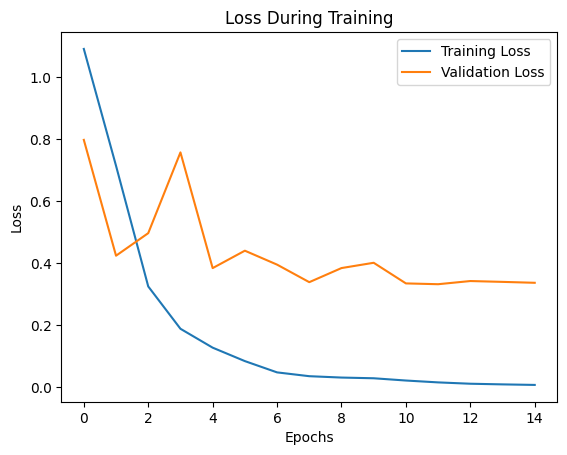

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Austin Nolte 10/20/24

#### Model 5: Baseline Convoluted Neural Network (CNN)

This is our fourth Convolutional Neural Network (CNN) model, designed to process image data (128x128 RGB images). The model consists of a single convolutional layer followed by a MaxPooling layer, flattening, and dense layers for regression (predicting house prices). We also implement **early stopping** to prevent overfitting and **model checkpointing** to save the best-performing model during training.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error
import numpy as np
import tensorflow.keras.backend as K

# Clear previous Keras session
K.clear_session()

# Define the CNN model
model = Sequential()

# Input shape of image data: 128x128 images with 3 color channels (RGB)
model.add(Input(shape=(128, 128, 3)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=16, kernel_size=(3, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())


# Flatten the output of the Conv2D layers to feed into dense layers
model.add(Flatten())

model.add(Dense(64, activation='sigmoid'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

# Summary of the model
model.summary()

# Austin Nolte 10/20/24

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         921,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 927,313 (3.54 MB)

 Trainable params: 927,281 (3.54 MB)

 Non-trainable params: 32 (128.00 B)

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

checkpoint_callback = ModelCheckpoint(filepath='cnn_model_Austin_sigmoidAdam_5.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Austin Nolte 10/20/24

**Training the CNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(img_arr_train, y_train,validation_data=(img_arr_test, y_test),epochs=100,batch_size=32,verbose=2,callbacks=[early_stopping_callback, checkpoint_callback])

# Austin Nolte 10/20/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 1.10878, saving model to cnn_model_Austin_sigmoidAdam_5.keras
11/11 - 4s - 344ms/step - loss: 2.0459 - val_loss: 1.1088
Epoch 2/100

Epoch 2: val_loss improved from 1.10878 to 0.46295, saving model to cnn_model_Austin_sigmoidAdam_5.keras
11/11 - 0s - 21ms/step - loss: 0.6278 - val_loss: 0.4630
Epoch 3/100

Epoch 3: val_loss did not improve from 0.46295
11/11 - 0s - 14ms/step - loss: 0.2540 - val_loss: 0.5287
Epoch 4/100

Epoch 4: val_loss did not improve from 0.46295
11/11 - 0s - 14ms/step - loss: 0.1470 - val_loss: 0.5474
Epoch 5/100

Epoch 5: val_loss improved from 0.46295 to 0.45266, saving model to cnn_model_Austin_sigmoidAdam_5.keras
11/11 - 0s - 36ms/step - loss: 0.0798 - val_loss: 0.4527
Epoch 6/100

Epoch 6: val_loss improved from 0.45266 to 0.41050, saving model to cnn_model_Austin_sigmoidAdam_5.keras
11/11 - 0s - 28ms/step - loss: 0.0443 - val_loss: 0.4105
Epoch 7/100

Epoch 7: val_loss did not improve from 0.41050
11/11 - 0

**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Predict on the test set
y_pred = model.predict(img_arr_test)

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"CNN Test RMSE: {rmse}")
# Austin Nolte 10/20/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
CNN Test RMSE: 227426.546875


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.8f}')

# Austin Nolte 10/20/24

R-squared Score: -0.20662951


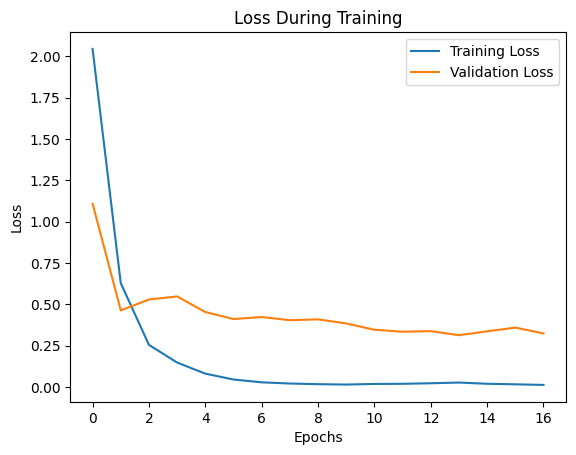

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Austin Nolte 10/20/24

#### Model 6: Baseline Convoluted Neural Network (CNN)

This is our sixth Convolutional Neural Network (CNN) model, designed to process image data (128x128 RGB images). The model consists of a single convolutional layer followed by a MaxPooling layer, flattening, and dense layers for regression (predicting house prices). We also implement **early stopping** to prevent overfitting and **model checkpointing** to save the best-performing model during training.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error
import numpy as np
import tensorflow.keras.backend as K

# Clear previous Keras session
K.clear_session()

# Define the CNN model
model = Sequential()

# Input shape of image data: 128x128 images with 3 color channels (RGB)
model.add(Input(shape=(128, 128, 3)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=16, kernel_size=(3, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=8, kernel_size=(3, 3), activation ='sigmoid'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(BatchNormalization())


# Flatten the output of the Conv2D layers to feed into dense layers
model.add(Flatten())

model.add(Dense(32, activation='sigmoid'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

# Summary of the model
model.summary()

# Austin Nolte 10/20/24

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 9, 9, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 9, 9, 8)             │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 648)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          20,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,513 (107.47 KB)

 Trainable params: 27,497 (107.41 KB)

 Non-trainable params: 16 (64.00 B)

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

checkpoint_callback = ModelCheckpoint(filepath='cnn_model_Austin_sigmoidAdam_6.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Austin Nolte 10/20/24

**Training the CNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(img_arr_train, y_train,validation_data=(img_arr_test, y_test),epochs=100,batch_size=32,verbose=2,callbacks=[early_stopping_callback, checkpoint_callback])

# Austin Nolte 10/20/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.29318, saving model to cnn_model_Austin_sigmoidAdam_6.keras
11/11 - 5s - 412ms/step - loss: 0.3812 - val_loss: 0.2932
Epoch 2/100

Epoch 2: val_loss improved from 0.29318 to 0.27839, saving model to cnn_model_Austin_sigmoidAdam_6.keras
11/11 - 0s - 19ms/step - loss: 0.2864 - val_loss: 0.2784
Epoch 3/100

Epoch 3: val_loss did not improve from 0.27839
11/11 - 0s - 14ms/step - loss: 0.2337 - val_loss: 0.3186
Epoch 4/100

Epoch 4: val_loss did not improve from 0.27839
11/11 - 0s - 27ms/step - loss: 0.2250 - val_loss: 0.3179
Epoch 5/100

Epoch 5: val_loss improved from 0.27839 to 0.27584, saving model to cnn_model_Austin_sigmoidAdam_6.keras
11/11 - 0s - 17ms/step - loss: 0.1854 - val_loss: 0.2758
Epoch 6/100

Epoch 6: val_loss improved from 0.27584 to 0.27036, saving model to cnn_model_Austin_sigmoidAdam_6.keras
11/11 - 0s - 17ms/step - loss: 0.1820 - val_loss: 0.2704
Epoch 7/100

Epoch 7: val_loss improved from 0.27036 to 0.27004, savi

**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Predict on the test set
y_pred = model.predict(img_arr_test)

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"CNN Test RMSE: {rmse}")
# Austin Nolte 10/20/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
CNN Test RMSE: 208173.171875


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.8f}')

# Austin Nolte 10/20/24

R-squared Score: -0.01097667


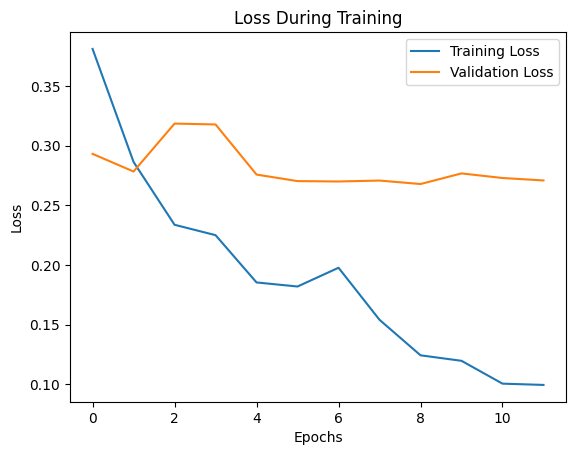

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Austin Nolte 10/20/24

#### Model 7: Baseline Convoluted Neural Network (CNN)

This is our first Convolutional Neural Network (CNN) model, designed to process image data (128x128 RGB images). The model consists of a single convolutional layer followed by a MaxPooling layer, flattening, and dense layers for regression (predicting house prices). We also implement **early stopping** to prevent overfitting and **model checkpointing** to save the best-performing model during training.



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error
import numpy as np
import tensorflow.keras.backend as K

# Clear previous Keras session
K.clear_session()

# Define the CNN model
model = Sequential()

# Input shape of image data: 128x128 images with 3 color channels (RGB)
model.add(Input(shape=(128, 128, 3)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Flatten the output of the Conv2D layers to feed into dense layers
model.add(Flatten())

model.add(Dense(64, activation='sigmoid'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

# Summary of the model
model.summary()

# Austin Nolte 10/20/24

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 128)         │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       7,372,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,410,817 (28.27 MB)

 Trainable params: 7,410,817 (28.27 MB)

 Non-trainable params: 0 (0.00 B)

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

checkpoint_callback = ModelCheckpoint(filepath='cnn_model_Austin_sigmoidAdam_7.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Austin Nolte 10/20/24

**Training the CNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(img_arr_train, y_train,validation_data=(img_arr_test, y_test),epochs=100,batch_size=32,verbose=2,callbacks=[early_stopping_callback, checkpoint_callback])

# Austin Nolte 10/20/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 22.74642, saving model to cnn_model_Austin_sigmoidAdam_7.keras
11/11 - 4s - 384ms/step - loss: 22.1918 - val_loss: 22.7464
Epoch 2/100

Epoch 2: val_loss improved from 22.74642 to 19.65903, saving model to cnn_model_Austin_sigmoidAdam_7.keras
11/11 - 3s - 287ms/step - loss: 21.5728 - val_loss: 19.6590
Epoch 3/100

Epoch 3: val_loss improved from 19.65903 to 16.83461, saving model to cnn_model_Austin_sigmoidAdam_7.keras
11/11 - 8s - 697ms/step - loss: 18.5904 - val_loss: 16.8346
Epoch 4/100

Epoch 4: val_loss improved from 16.83461 to 14.32887, saving model to cnn_model_Austin_sigmoidAdam_7.keras
11/11 - 1s - 85ms/step - loss: 15.8918 - val_loss: 14.3289
Epoch 5/100

Epoch 5: val_loss improved from 14.32887 to 12.12817, saving model to cnn_model_Austin_sigmoidAdam_7.keras
11/11 - 7s - 663ms/step - loss: 13.5026 - val_loss: 12.1282
Epoch 6/100

Epoch 6: val_loss improved from 12.12817 to 10.19333, saving model to cnn_model_Austin_sigmoi

**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Predict on the test set
y_pred = model.predict(img_arr_test)

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"CNN Test RMSE: {rmse}")
# Austin Nolte 10/20/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
CNN Test RMSE: 207057.71875


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.8f}')

# Austin Nolte 10/20/24

R-squared Score: -0.00017142


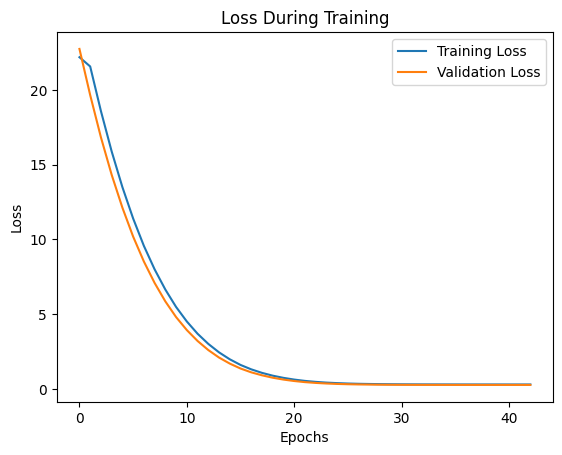

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Austin Nolte 10/20/24

#### Model 8: Baseline Convoluted Neural Network (CNN)

This is our first Convolutional Neural Network (CNN) model, designed to process image data (128x128 RGB images). The model consists of a single convolutional layer followed by a MaxPooling layer, flattening, and dense layers for regression (predicting house prices). We also implement **early stopping** to prevent overfitting and **model checkpointing** to save the best-performing model during training.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error
import numpy as np
import tensorflow.keras.backend as K

# Clear previous Keras session
K.clear_session()

# Define the CNN model
model = Sequential()

# Input shape of image data: 128x128 images with 3 color channels (RGB)
model.add(Input(shape=(128, 128, 3)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=256, kernel_size=(3, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the Conv2D layers to feed into dense layers
model.add(Flatten())

model.add(Dense(128, activation='sigmoid'))
model.add(Dense(64))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(16))
model.add(Dense(8, activation='sigmoid'))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

# Summary of the model
model.summary()

# Austin Nolte 10/20/24

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 128)         │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,359,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,883,649 (14.81 MB)

 Trainable params: 3,883,649 (14.81 MB)

 Non-trainable params: 0 (0.00 B)

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

checkpoint_callback = ModelCheckpoint(filepath='cnn_model_Austin_sigmoidAdam_8.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Austin Nolte 10/20/24

**Training the CNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(img_arr_train, y_train,validation_data=(img_arr_test, y_test),epochs=100,batch_size=32,verbose=2,callbacks=[early_stopping_callback, checkpoint_callback])

# Austin Nolte 10/20/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.27184, saving model to cnn_model_Austin_sigmoidAdam_8.keras
11/11 - 6s - 552ms/step - loss: 0.3331 - val_loss: 0.2718
Epoch 2/100

Epoch 2: val_loss improved from 0.27184 to 0.26799, saving model to cnn_model_Austin_sigmoidAdam_8.keras
11/11 - 2s - 194ms/step - loss: 0.3024 - val_loss: 0.2680
Epoch 3/100

Epoch 3: val_loss improved from 0.26799 to 0.26798, saving model to cnn_model_Austin_sigmoidAdam_8.keras
11/11 - 1s - 110ms/step - loss: 0.2993 - val_loss: 0.2680
Epoch 4/100

Epoch 4: val_loss did not improve from 0.26798
11/11 - 0s - 34ms/step - loss: 0.3000 - val_loss: 0.2683
Epoch 5/100

Epoch 5: val_loss did not improve from 0.26798
11/11 - 1s - 56ms/step - loss: 0.2999 - val_loss: 0.2684
Epoch 6/100

Epoch 6: val_loss did not improve from 0.26798
11/11 - 1s - 59ms/step - loss: 0.2995 - val_loss: 0.2686
Epoch 6: early stopping


**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Predict on the test set
y_pred = model.predict(img_arr_test)

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"CNN Test RMSE: {rmse}")
# Austin Nolte 10/20/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step
CNN Test RMSE: 207286.3125


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.8f}')

# Austin Nolte 10/20/24

R-squared Score: -0.00238121


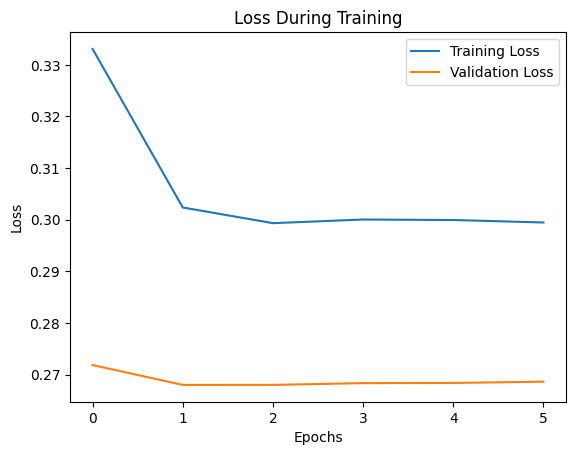

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Austin Nolte 10/20/24

#### Model 9: Baseline Convoluted Neural Network (CNN)

This is our first Convolutional Neural Network (CNN) model, designed to process image data (128x128 RGB images). The model consists of a single convolutional layer followed by a MaxPooling layer, flattening, and dense layers for regression (predicting house prices). We also implement **early stopping** to prevent overfitting and **model checkpointing** to save the best-performing model during training.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error
import numpy as np
import tensorflow.keras.backend as K

# Clear previous Keras session
K.clear_session()

# Define the CNN model
model = Sequential()

# Input shape of image data: 128x128 images with 3 color channels (RGB)
model.add(Input(shape=(128, 128, 3)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the Conv2D layers to feed into dense layers
model.add(Flatten())

model.add(Dense(128, activation='sigmoid'))
model.add(Dense(32))
model.add(Dense(8, activation='sigmoid'))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

# Summary of the model
model.summary()

# Austin Nolte 10/20/24

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,396,721 (28.22 MB)

 Trainable params: 7,396,721 (28.22 MB)

 Non-trainable params: 0 (0.00 B)

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=8, mode='min', verbose=2)

checkpoint_callback = ModelCheckpoint(filepath='cnn_model_Austin_sigmoidAdam_9.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Austin Nolte 10/20/24

**Training the CNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(img_arr_train, y_train,validation_data=(img_arr_test, y_test),epochs=100,batch_size=32,verbose=2,callbacks=[early_stopping_callback, checkpoint_callback])

# Austin Nolte 10/20/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 1.19981, saving model to cnn_model_Austin_sigmoidAdam_9.keras
11/11 - 4s - 357ms/step - loss: 1.4454 - val_loss: 1.1998
Epoch 2/100

Epoch 2: val_loss improved from 1.19981 to 0.73593, saving model to cnn_model_Austin_sigmoidAdam_9.keras
11/11 - 7s - 653ms/step - loss: 1.0483 - val_loss: 0.7359
Epoch 3/100

Epoch 3: val_loss improved from 0.73593 to 0.29309, saving model to cnn_model_Austin_sigmoidAdam_9.keras
11/11 - 4s - 342ms/step - loss: 0.5159 - val_loss: 0.2931
Epoch 4/100

Epoch 4: val_loss improved from 0.29309 to 0.27350, saving model to cnn_model_Austin_sigmoidAdam_9.keras
11/11 - 6s - 587ms/step - loss: 0.3106 - val_loss: 0.2735
Epoch 5/100

Epoch 5: val_loss improved from 0.27350 to 0.26992, saving model to cnn_model_Austin_sigmoidAdam_9.keras
11/11 - 5s - 432ms/step - loss: 0.3070 - val_loss: 0.2699
Epoch 6/100

Epoch 6: val_loss improved from 0.26992 to 0.26950, saving model to cnn_model_Austin_sigmoidAdam_9.keras
11/11 

**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Predict on the test set
y_pred = model.predict(img_arr_test)

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"CNN Test RMSE: {rmse}")
# Austin Nolte 10/20/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
CNN Test RMSE: 207040.734375


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.8f}')

# Austin Nolte 10/20/24

R-squared Score: -0.00000751


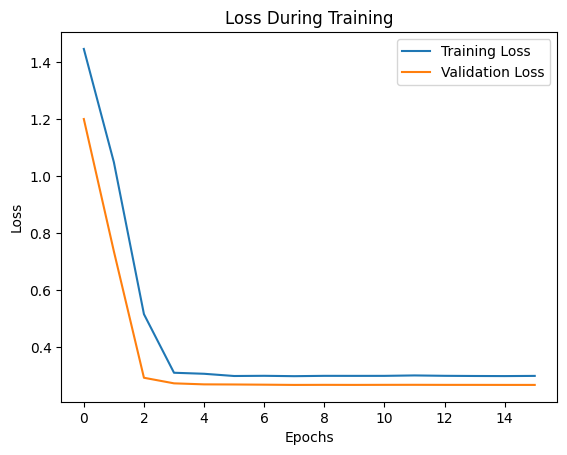

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Austin Nolte 10/20/24

#### Model 10: Baseline Convoluted Neural Network (CNN)

This is our first Convolutional Neural Network (CNN) model, designed to process image data (128x128 RGB images). The model consists of a single convolutional layer followed by a MaxPooling layer, flattening, and dense layers for regression (predicting house prices). We also implement **early stopping** to prevent overfitting and **model checkpointing** to save the best-performing model during training.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error
import numpy as np
import tensorflow.keras.backend as K

# Clear previous Keras session
K.clear_session()

# Define the CNN model
model = Sequential()

# Input shape of image data: 128x128 images with 3 color channels (RGB)
model.add(Input(shape=(128, 128, 3)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(1, 1), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Flatten the output of the Conv2D layers to feed into dense layers
model.add(Flatten())

model.add(Dense(128, activation='sigmoid'))
model.add(Dense(32))
model.add(Dense(8, activation='sigmoid'))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

# Summary of the model
model.summary()

# Austin Nolte 10/20/24

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 63, 63, 64)          │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 29, 29, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,292,657 (12.56 MB)

 Trainable params: 3,292,657 (12.56 MB)

 Non-trainable params: 0 (0.00 B)

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

checkpoint_callback = ModelCheckpoint(filepath='cnn_model_Austin_sigmoidAdam_10.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Austin Nolte 10/20/24

**Training the CNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(img_arr_train, y_train,validation_data=(img_arr_test, y_test),epochs=100,batch_size=32,verbose=2,callbacks=[early_stopping_callback, checkpoint_callback])

# Austin Nolte 10/20/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.42012, saving model to cnn_model_Austin_sigmoidAdam_10.keras
11/11 - 5s - 467ms/step - loss: 0.6951 - val_loss: 0.4201
Epoch 2/100

Epoch 2: val_loss improved from 0.42012 to 0.27412, saving model to cnn_model_Austin_sigmoidAdam_10.keras
11/11 - 0s - 37ms/step - loss: 0.3805 - val_loss: 0.2741
Epoch 3/100

Epoch 3: val_loss improved from 0.27412 to 0.26830, saving model to cnn_model_Austin_sigmoidAdam_10.keras
11/11 - 1s - 61ms/step - loss: 0.3033 - val_loss: 0.2683
Epoch 4/100

Epoch 4: val_loss did not improve from 0.26830
11/11 - 0s - 32ms/step - loss: 0.3008 - val_loss: 0.2684
Epoch 5/100

Epoch 5: val_loss did not improve from 0.26830
11/11 - 0s - 27ms/step - loss: 0.3016 - val_loss: 0.2694
Epoch 6/100

Epoch 6: val_loss did not improve from 0.26830
11/11 - 0s - 25ms/step - loss: 0.3092 - val_loss: 0.2727
Epoch 6: early stopping


**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Predict on the test set
y_pred = model.predict(img_arr_test)

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"CNN Test RMSE: {rmse}")
# Austin Nolte 10/20/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
CNN Test RMSE: 208861.21875


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.8f}')

# Austin Nolte 10/20/24

R-squared Score: -0.01767075


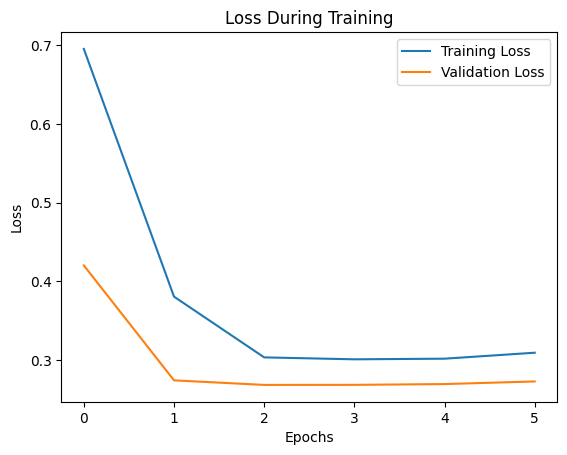

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Austin Nolte 10/20/24

### CNN Model Design and Testing (Alan Lei)

#### Model 1: First Convoluted Neural Network (CNN)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error
import numpy as np
import tensorflow.keras.backend as K
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the CNN model
model = Sequential()
model.add(Input(shape=(128, 128, 3))) # Input shape of image data: 128x128 images with 3 color channels (RGB)
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu')) # Conv2D Layer with MaxPooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flatten the output of the Conv2D layers to feed into dense layers
model.add(Dense(64, activation='sigmoid')) # Fully connected (dense) layer
model.add(Dense(32, activation='sigmoid')) # Fully connected (dense) layer
model.add(Dense(16, activation='sigmoid')) # Fully connected (dense) layer
model.add(BatchNormalization())
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Summary of the model
model.summary()

# Alan Lei 10/19/24

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 124, 124, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 123008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       7,872,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,877,697 (30.05 MB)

 Trainable params: 7,877,665 (30.05 MB)

 Non-trainable params: 32 (128.00 B)

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='cnn_model_Alan_test1.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Tyler Burguillos 10/14/24

**Training the CNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    img_arr_train, y_train,  # Image data for training
    validation_data=(img_arr_test, y_test),  # Validation on the image test data
    epochs=100,       # Max number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback]  # Include both callbacks
)

# Tyler Burguillos 10/14/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.08230, saving model to cnn_model_Alan_test1.keras
11/11 - 8s - 730ms/step - loss: 0.3792 - val_loss: 0.0823
Epoch 2/100

Epoch 2: val_loss did not improve from 0.08230
11/11 - 4s - 393ms/step - loss: 0.2165 - val_loss: 0.1039
Epoch 3/100

Epoch 3: val_loss did not improve from 0.08230
11/11 - 0s - 26ms/step - loss: 0.1689 - val_loss: 0.1297
Epoch 4/100

Epoch 4: val_loss did not improve from 0.08230
11/11 - 0s - 17ms/step - loss: 0.1326 - val_loss: 0.1580
Epoch 4: early stopping


**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Predict on the test set
y_pred = model.predict(img_arr_test)

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"CNN Test RMSE: {rmse}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step
CNN Test RMSE: 317906.5625


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')


R-squared Score: -1.36


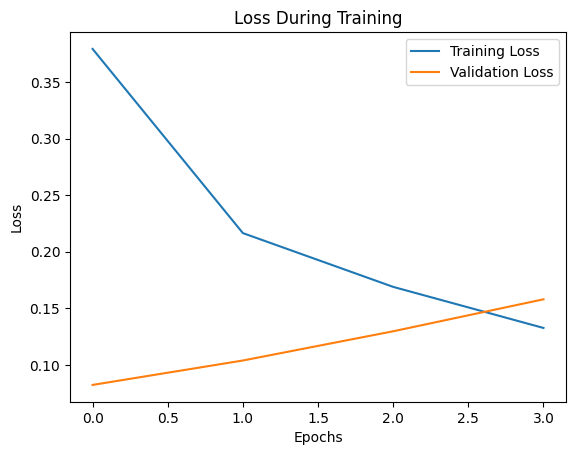

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Model 2: Convoluted Neural Network (CNN)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error
import numpy as np
import tensorflow.keras.backend as K
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the CNN model
model = Sequential()
model.add(Input(shape=(128, 128, 3))) # Input shape of image data: 128x128 images with 3 color channels (RGB)
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu')) # Conv2D Layer with MaxPooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flatten the output of the Conv2D layers to feed into dense layers
model.add(BatchNormalization())
model.add(Dense(128, activation='relu')) # Fully connected (dense) layer
model.add(Dense(64, activation='relu')) # Fully connected (dense) layer
model.add(Dense(16, activation='relu')) # Fully connected (dense) layer
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='SGD')

# Summary of the model
model.summary()

# Alan Lei 10/19/24

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 124, 124, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 123008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 123008)              │         492,032 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      15,745,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,248,929 (61.98 MB)

 Trainable params: 16,002,913 (61.05 MB)

 Non-trainable params: 246,016 (961.00 KB)

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='cnn_model_Alan_test2.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Tyler Burguillos 10/14/24

**Training the CNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    img_arr_train, y_train,  # Image data for training
    validation_data=(img_arr_test, y_test),  # Validation on the image test data
    epochs=100,       # Max number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback]  # Include both callbacks
)

# Tyler Burguillos 10/14/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 123.37526, saving model to cnn_model_Alan_test2.keras
11/11 - 4s - 353ms/step - loss: 1.8565 - val_loss: 123.3753
Epoch 2/100

Epoch 2: val_loss improved from 123.37526 to 57.49272, saving model to cnn_model_Alan_test2.keras
11/11 - 2s - 188ms/step - loss: 0.1821 - val_loss: 57.4927
Epoch 3/100

Epoch 3: val_loss improved from 57.49272 to 14.13263, saving model to cnn_model_Alan_test2.keras
11/11 - 1s - 67ms/step - loss: 0.0755 - val_loss: 14.1326
Epoch 4/100

Epoch 4: val_loss improved from 14.13263 to 9.92067, saving model to cnn_model_Alan_test2.keras
11/11 - 1s - 98ms/step - loss: 0.0529 - val_loss: 9.9207
Epoch 5/100

Epoch 5: val_loss improved from 9.92067 to 5.09203, saving model to cnn_model_Alan_test2.keras
11/11 - 1s - 63ms/step - loss: 0.0330 - val_loss: 5.0920
Epoch 6/100

Epoch 6: val_loss improved from 5.09203 to 0.18199, saving model to cnn_model_Alan_test2.keras
11/11 - 1s - 65ms/step - loss: 0.0308 - val_loss: 0.1820


**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Predict on the test set
y_pred = model.predict(img_arr_test)

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"CNN Test RMSE: {rmse}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step
CNN Test RMSE: 794625.0625


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')


R-squared Score: -13.73


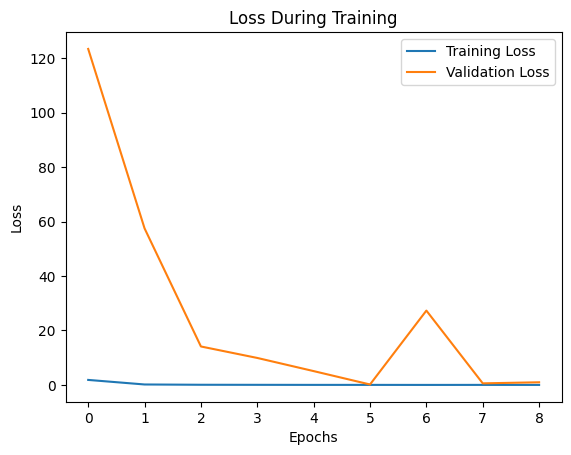

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Model 3: Convoluted Neural Network (CNN)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error
import numpy as np
import tensorflow.keras.backend as K
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the CNN model
model = Sequential()
model.add(Input(shape=(128, 128, 3))) # Input shape of image data: 128x128 images with 3 color channels (RGB)
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu')) # Conv2D Layer with MaxPooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flatten the output of the Conv2D layers to feed into dense layers
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid')) # Fully connected (dense) layer
model.add(Dense(32, activation='sigmoid')) # Fully connected (dense) layer
model.add(BatchNormalization())
model.add(Dense(16, activation='relu')) # Fully connected (dense) layer
model.add(Dense(8, activation='relu')) # Fully connected (dense) layer
model.add(Dense(4, activation='relu')) # Fully connected (dense) layer
model.add(Dense(2, activation='relu')) # Fully connected (dense) layer


model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Summary of the model
model.summary()

# Alan Lei 10/19/24

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 124, 124, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 123008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      31,490,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,536,809 (120.30 MB)

 Trainable params: 31,536,745 (120.30 MB)

 Non-trainable params: 64 (256.00 B)

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='cnn_model_Alan_test3.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Tyler Burguillos 10/14/24

**Training the CNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    img_arr_train, y_train,  # Image data for training
    validation_data=(img_arr_test, y_test),  # Validation on the image test data
    epochs=100,       # Max number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback]  # Include both callbacks
)

# Tyler Burguillos 10/14/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.85601, saving model to cnn_model_Alan_test3.keras
11/11 - 18s - 2s/step - loss: 0.3018 - val_loss: 0.8560
Epoch 2/100

Epoch 2: val_loss improved from 0.85601 to 0.74049, saving model to cnn_model_Alan_test3.keras
11/11 - 6s - 555ms/step - loss: 0.2700 - val_loss: 0.7405
Epoch 3/100

Epoch 3: val_loss improved from 0.74049 to 0.66449, saving model to cnn_model_Alan_test3.keras
11/11 - 7s - 677ms/step - loss: 0.2328 - val_loss: 0.6645
Epoch 4/100

Epoch 4: val_loss improved from 0.66449 to 0.60037, saving model to cnn_model_Alan_test3.keras
11/11 - 5s - 450ms/step - loss: 0.1903 - val_loss: 0.6004
Epoch 5/100

Epoch 5: val_loss improved from 0.60037 to 0.53807, saving model to cnn_model_Alan_test3.keras
11/11 - 11s - 1s/step - loss: 0.1448 - val_loss: 0.5381
Epoch 6/100

Epoch 6: val_loss improved from 0.53807 to 0.48725, saving model to cnn_model_Alan_test3.keras
11/11 - 7s - 665ms/step - loss: 0.1049 - val_loss: 0.4873
Epoch 7/100


**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Predict on the test set
y_pred = model.predict(img_arr_test)

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"CNN Test RMSE: {rmse}")

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step
CNN Test RMSE: 229399.84375


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')


R-squared Score: -0.23


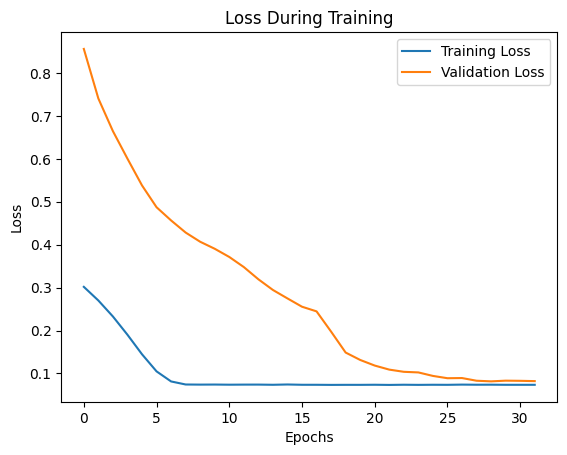

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Model 4: Convoluted Neural Network (CNN)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error
import numpy as np
import tensorflow.keras.backend as K
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the CNN model
model = Sequential()
model.add(Input(shape=(128, 128, 3))) # Input shape of image data: 128x128 images with 3 color channels (RGB)
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu')) # Conv2D Layer with MaxPooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dense(128, activation='relu')) # Fully connected (dense) layer
model.add(Flatten()) # Flatten the output of the Conv2D layers to feed into dense layers
model.add(Dense(64, activation='sigmoid')) # Fully connected (dense) layer
model.add(BatchNormalization())
model.add(Dense(32, activation='relu')) # Fully connected (dense) layer
model.add(Dense(16, activation='sigmoid')) # Fully connected (dense) layer
model.add(Dense(8, activation='relu')) # Fully connected (dense) layer
model.add(BatchNormalization())
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='SGD')

# Summary of the model
model.summary()

# Alan Lei 10/19/24

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 63, 63, 128)         │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 508032)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │      32,514,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 8)                   │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,522,273 (124.06 MB)

 Trainable params: 32,522,129 (124.06 MB)

 Non-trainable params: 144 (576.00 B)

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='cnn_model_Alan_test4.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Tyler Burguillos 10/14/24

**Training the CNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    img_arr_train, y_train,  # Image data for training
    validation_data=(img_arr_test, y_test),  # Validation on the image test data
    epochs=100,       # Max number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback]  # Include both callbacks
)

# Tyler Burguillos 10/14/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.06704, saving model to cnn_model_Alan_test4.keras
11/11 - 8s - 761ms/step - loss: 0.4564 - val_loss: 0.0670
Epoch 2/100

Epoch 2: val_loss did not improve from 0.06704
11/11 - 0s - 23ms/step - loss: 0.1448 - val_loss: 0.0768
Epoch 3/100

Epoch 3: val_loss did not improve from 0.06704
11/11 - 0s - 20ms/step - loss: 0.0923 - val_loss: 0.0920
Epoch 4/100

Epoch 4: val_loss did not improve from 0.06704
11/11 - 0s - 19ms/step - loss: 0.0811 - val_loss: 0.1082
Epoch 4: early stopping


**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Predict on the test set
y_pred = model.predict(img_arr_test)

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"CNN Test RMSE: {rmse}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 219ms/step
CNN Test RMSE: 263092.21875


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')


R-squared Score: -0.61


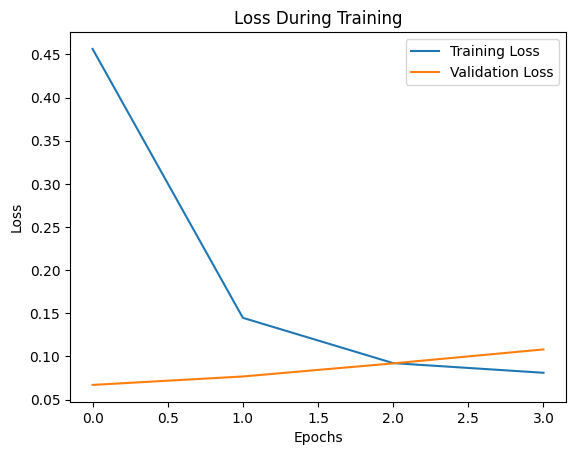

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Model 5: Convoluted Neural Network (CNN)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error
import numpy as np
import tensorflow.keras.backend as K
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the CNN model
model = Sequential()
model.add(Input(shape=(128, 128, 3))) # Input shape of image data: 128x128 images with 3 color channels (RGB)
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu')) # Conv2D Layer with MaxPooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dense(512, activation='sigmoid')) # Fully connected (dense) layer
model.add(Dense(256, activation='relu')) # Fully connected (dense) layer
model.add(Dense(128, activation='relu')) # Fully connected (dense) layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dense(64, activation='relu')) # Fully connected (dense) layer
model.add(Dense(32, activation='relu')) # Fully connected (dense) layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flatten the output of the Conv2D layers to feed into dense layers
model.add(Dense(16, activation='relu')) # Fully connected (dense) layer
model.add(Dense(8, activation='relu')) # Fully connected (dense) layer
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Summary of the model
model.summary()

# Alan Lei 10/20/24

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 63, 63, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 63, 63, 512)         │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 63, 63, 256)         │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 63, 63, 128)         │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 31, 31, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 31, 31, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 31, 31, 32)          │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 16)                  │         115,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 307,841 (1.17 MB)

 Trainable params: 307,777 (1.17 MB)

 Non-trainable params: 64 (256.00 B)

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='cnn_model_Alan_test5.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Tyler Burguillos 10/14/24

**Training the CNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    img_arr_train, y_train,  # Image data for training
    validation_data=(img_arr_test, y_test),  # Validation on the image test data
    epochs=100,       # Max number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback]  # Include both callbacks
)

# Tyler Burguillos 10/14/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.07549, saving model to cnn_model_Alan_test5.keras
11/11 - 15s - 1s/step - loss: 0.1454 - val_loss: 0.0755
Epoch 2/100

Epoch 2: val_loss improved from 0.07549 to 0.06860, saving model to cnn_model_Alan_test5.keras
11/11 - 8s - 753ms/step - loss: 0.0948 - val_loss: 0.0686
Epoch 3/100

Epoch 3: val_loss did not improve from 0.06860
11/11 - 1s - 100ms/step - loss: 0.0821 - val_loss: 0.0812
Epoch 4/100

Epoch 4: val_loss did not improve from 0.06860
11/11 - 1s - 64ms/step - loss: 0.0754 - val_loss: 0.0842
Epoch 5/100

Epoch 5: val_loss improved from 0.06860 to 0.06844, saving model to cnn_model_Alan_test5.keras
11/11 - 1s - 117ms/step - loss: 0.0748 - val_loss: 0.0684
Epoch 6/100

Epoch 6: val_loss did not improve from 0.06844
11/11 - 1s - 60ms/step - loss: 0.0747 - val_loss: 0.0715
Epoch 7/100

Epoch 7: val_loss did not improve from 0.06844
11/11 - 1s - 61ms/step - loss: 0.0859 - val_loss: 0.0698
Epoch 8/100

Epoch 8: val_loss did not 

**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Predict on the test set
y_pred = model.predict(img_arr_test)

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"CNN Test RMSE: {rmse}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step
CNN Test RMSE: 264407.6875


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')


R-squared Score: -0.63


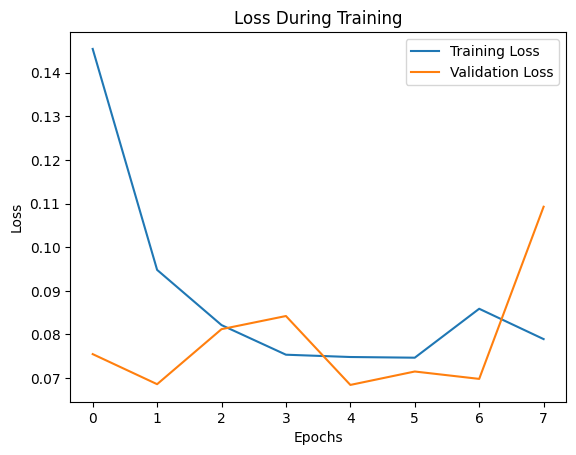

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Model 6: Convoluted Neural Network (CNN)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error
import numpy as np
import tensorflow.keras.backend as K
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the CNN model
model = Sequential()
model.add(Input(shape=(128, 128, 3))) # Input shape of image data: 128x128 images with 3 color channels (RGB)
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu')) # Conv2D Layer with MaxPooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flatten the output of the Conv2D layers to feed into dense layers
model.add(Dense(64, activation='tanh')) # Fully connected (dense) layer
model.add(Dense(32, activation='relu')) # Fully connected (dense) layer
model.add(Dense(16, activation='tanh')) # Fully connected (dense) layer
model.add(BatchNormalization())
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Summary of the model
model.summary()

# Alan Lei 10/20/24

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 124, 124, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 123008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       7,872,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,877,697 (30.05 MB)

 Trainable params: 7,877,665 (30.05 MB)

 Non-trainable params: 32 (128.00 B)

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='cnn_model_Alan_test6.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Tyler Burguillos 10/14/24

**Training the CNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    img_arr_train, y_train,  # Image data for training
    validation_data=(img_arr_test, y_test),  # Validation on the image test data
    epochs=100,       # Max number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback]  # Include both callbacks
)

# Tyler Burguillos 10/14/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.76681, saving model to cnn_model_Alan_test6.keras
11/11 - 9s - 790ms/step - loss: 0.7338 - val_loss: 0.7668
Epoch 2/100

Epoch 2: val_loss did not improve from 0.76681
11/11 - 0s - 19ms/step - loss: 0.2585 - val_loss: 0.7795
Epoch 3/100

Epoch 3: val_loss improved from 0.76681 to 0.53251, saving model to cnn_model_Alan_test6.keras
11/11 - 4s - 384ms/step - loss: 0.1886 - val_loss: 0.5325
Epoch 4/100

Epoch 4: val_loss improved from 0.53251 to 0.49402, saving model to cnn_model_Alan_test6.keras
11/11 - 2s - 181ms/step - loss: 0.1600 - val_loss: 0.4940
Epoch 5/100

Epoch 5: val_loss did not improve from 0.49402
11/11 - 0s - 19ms/step - loss: 0.1257 - val_loss: 0.5688
Epoch 6/100

Epoch 6: val_loss did not improve from 0.49402
11/11 - 0s - 16ms/step - loss: 0.1072 - val_loss: 0.5811
Epoch 7/100

Epoch 7: val_loss did not improve from 0.49402
11/11 - 0s - 27ms/step - loss: 0.0945 - val_loss: 0.5696
Epoch 7: early stopping


**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Predict on the test set
y_pred = model.predict(img_arr_test)

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"CNN Test RMSE: {rmse}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step
CNN Test RMSE: 603724.4375


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')


R-squared Score: -7.50


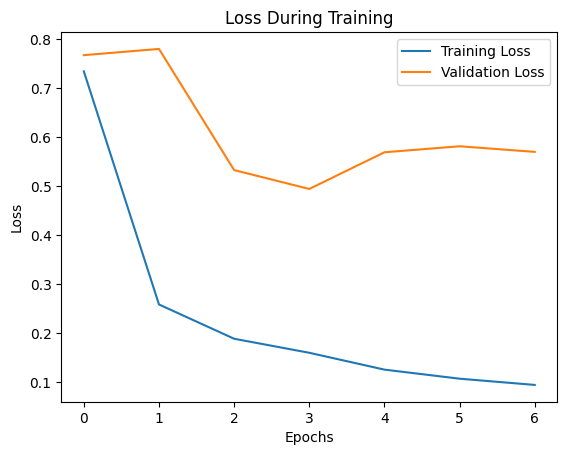

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Model 7: Convoluted Neural Network (CNN)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error
import numpy as np
import tensorflow.keras.backend as K
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the CNN model
model = Sequential()
model.add(Input(shape=(128, 128, 3))) # Input shape of image data: 128x128 images with 3 color channels (RGB)
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='tanh')) # Conv2D Layer with MaxPooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flatten the output of the Conv2D layers to feed into dense layers
model.add(Dense(256, activation='tanh')) # Fully connected (dense) layer
model.add(Dense(128, activation='relu')) # Fully connected (dense) layer
model.add(Dense(64, activation='tanh')) # Fully connected (dense) layer
model.add(BatchNormalization())
model.add(Dense(32, activation='relu')) # Fully connected (dense) layer
model.add(Dense(16, activation='relu')) # Fully connected (dense) layer
model.add(Dense(8, activation='relu')) # Fully connected (dense) layer
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='SGD')

# Summary of the model
model.summary()

# Alan Lei 10/20/24

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 127008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      32,514,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,559,361 (124.20 MB)

 Trainable params: 32,559,233 (124.20 MB)

 Non-trainable params: 128 (512.00 B)

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='cnn_model_Alan_test7.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Tyler Burguillos 10/14/24

**Training the CNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    img_arr_train, y_train,  # Image data for training
    validation_data=(img_arr_test, y_test),  # Validation on the image test data
    epochs=100,       # Max number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback]  # Include both callbacks
)

# Tyler Burguillos 10/14/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.15053, saving model to cnn_model_Alan_test7.keras
11/11 - 7s - 607ms/step - loss: 0.2873 - val_loss: 0.1505
Epoch 2/100

Epoch 2: val_loss did not improve from 0.15053
11/11 - 4s - 387ms/step - loss: 0.1336 - val_loss: 0.2389
Epoch 3/100

Epoch 3: val_loss did not improve from 0.15053
11/11 - 0s - 16ms/step - loss: 0.0886 - val_loss: 0.2886
Epoch 4/100

Epoch 4: val_loss did not improve from 0.15053
11/11 - 0s - 14ms/step - loss: 0.0780 - val_loss: 0.2938
Epoch 4: early stopping


**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Predict on the test set
y_pred = model.predict(img_arr_test)

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"CNN Test RMSE: {rmse}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step
CNN Test RMSE: 433562.4375


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')


R-squared Score: -3.39


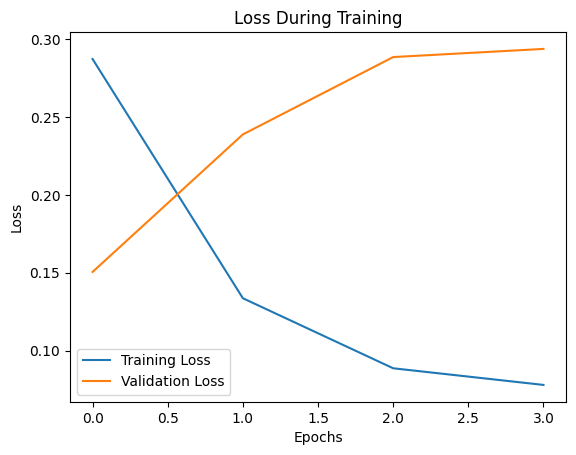

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Model 8: Convoluted Neural Network (CNN)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error
import numpy as np
import tensorflow.keras.backend as K
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the CNN model
model = Sequential()
model.add(Input(shape=(128, 128, 3))) # Input shape of image data: 128x128 images with 3 color channels (RGB)
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu')) # Conv2D Layer with MaxPooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flatten the output of the Conv2D layers to feed into dense layers
model.add(Dense(256, activation='tanh')) # Fully connected (dense) layer
model.add(Dense(128, activation='relu')) # Fully connected (dense) layer
model.add(BatchNormalization())
model.add(Dense(64, activation='tanh')) # Fully connected (dense) layer
model.add(Dense(32, activation='relu')) # Fully connected (dense) layer
model.add(BatchNormalization())
model.add(Dense(16, activation='tanh')) # Fully connected (dense) layer
model.add(Dense(8, activation='relu')) # Fully connected (dense) layer
model.add(BatchNormalization())
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='SGD')

# Summary of the model
model.summary()

# Alan Lei 10/20/24

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 124, 124, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 123008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      31,490,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8)                   │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,537,313 (120.31 MB)

 Trainable params: 31,536,977 (120.30 MB)

 Non-trainable params: 336 (1.31 KB)

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='cnn_model_Alan_test8.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Tyler Burguillos 10/14/24

**Training the CNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    img_arr_train, y_train,  # Image data for training
    validation_data=(img_arr_test, y_test),  # Validation on the image test data
    epochs=100,       # Max number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback]  # Include both callbacks
)

# Tyler Burguillos 10/14/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.24895, saving model to cnn_model_Alan_test8.keras
11/11 - 4s - 378ms/step - loss: 1.6298 - val_loss: 0.2489
Epoch 2/100

Epoch 2: val_loss improved from 0.24895 to 0.19507, saving model to cnn_model_Alan_test8.keras
11/11 - 3s - 265ms/step - loss: 0.4493 - val_loss: 0.1951
Epoch 3/100

Epoch 3: val_loss improved from 0.19507 to 0.12019, saving model to cnn_model_Alan_test8.keras
11/11 - 1s - 136ms/step - loss: 0.4951 - val_loss: 0.1202
Epoch 4/100

Epoch 4: val_loss did not improve from 0.12019
11/11 - 0s - 20ms/step - loss: 0.2518 - val_loss: 0.1986
Epoch 5/100

Epoch 5: val_loss did not improve from 0.12019
11/11 - 0s - 18ms/step - loss: 0.2732 - val_loss: 0.2927
Epoch 6/100

Epoch 6: val_loss did not improve from 0.12019
11/11 - 0s - 25ms/step - loss: 0.1321 - val_loss: 0.4098
Epoch 6: early stopping


**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Predict on the test set
y_pred = model.predict(img_arr_test)

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"CNN Test RMSE: {rmse}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step
CNN Test RMSE: 512074.46875


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')


R-squared Score: -5.12


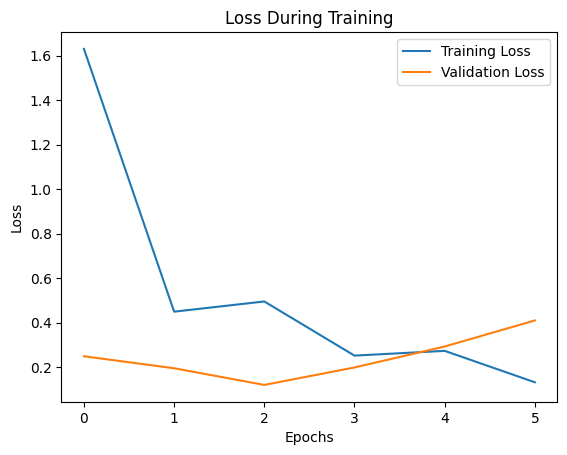

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Model 9: Convoluted Neural Network (CNN)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error
import numpy as np
import tensorflow.keras.backend as K
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the CNN model
model = Sequential()
model.add(Input(shape=(128, 128, 3))) # Input shape of image data: 128x128 images with 3 color channels (RGB)
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu')) # Conv2D Layer with MaxPooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flatten the output of the Conv2D layers to feed into dense layers
model.add(Dense(256, activation='relu')) # Fully connected (dense) layer
model.add(Dense(128, activation='relu')) # Fully connected (dense) layer
model.add(BatchNormalization())
model.add(Dense(64, activation='tanh')) # Fully connected (dense) layer
model.add(Dense(32, activation='tanh')) # Fully connected (dense) layer
model.add(BatchNormalization())
model.add(Dense(16, activation='relu')) # Fully connected (dense) layer
model.add(Dense(8, activation='relu')) # Fully connected (dense) layer
model.add(BatchNormalization())
model.add(Dense(4, activation='tanh')) # Fully connected (dense) layer
model.add(Dense(2, activation='tanh')) # Fully connected (dense) layer
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Summary of the model
model.summary()

# Alan Lei 10/20/24

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 124, 124, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 123008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      31,490,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8)                   │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,537,353 (120.31 MB)

 Trainable params: 31,537,017 (120.30 MB)

 Non-trainable params: 336 (1.31 KB)

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='cnn_model_Alan_test9.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Tyler Burguillos 10/14/24

**Training the CNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    img_arr_train, y_train,  # Image data for training
    validation_data=(img_arr_test, y_test),  # Validation on the image test data
    epochs=100,       # Max number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback]  # Include both callbacks
)

# Tyler Burguillos 10/14/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.59229, saving model to cnn_model_Alan_test9.keras
11/11 - 19s - 2s/step - loss: 0.5525 - val_loss: 0.5923
Epoch 2/100

Epoch 2: val_loss improved from 0.59229 to 0.23361, saving model to cnn_model_Alan_test9.keras
11/11 - 12s - 1s/step - loss: 0.3065 - val_loss: 0.2336
Epoch 3/100

Epoch 3: val_loss improved from 0.23361 to 0.20237, saving model to cnn_model_Alan_test9.keras
11/11 - 5s - 439ms/step - loss: 0.2348 - val_loss: 0.2024
Epoch 4/100

Epoch 4: val_loss improved from 0.20237 to 0.11176, saving model to cnn_model_Alan_test9.keras
11/11 - 6s - 514ms/step - loss: 0.1646 - val_loss: 0.1118
Epoch 5/100

Epoch 5: val_loss improved from 0.11176 to 0.06823, saving model to cnn_model_Alan_test9.keras
11/11 - 8s - 732ms/step - loss: 0.1324 - val_loss: 0.0682
Epoch 6/100

Epoch 6: val_loss did not improve from 0.06823
11/11 - 0s - 22ms/step - loss: 0.1055 - val_loss: 0.0920
Epoch 7/100

Epoch 7: val_loss did not improve from 0.06823
1

**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Predict on the test set
y_pred = model.predict(img_arr_test)

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"CNN Test RMSE: {rmse}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 201ms/step
CNN Test RMSE: 297988.1875


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')


R-squared Score: -1.07


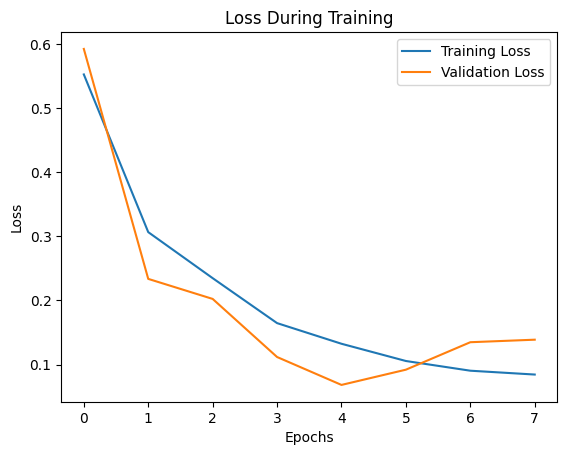

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Model 10: Convoluted Neural Network (CNN)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error
import numpy as np
import tensorflow.keras.backend as K
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the CNN model
model = Sequential()
model.add(Input(shape=(128, 128, 3))) # Input shape of image data: 128x128 images with 3 color channels (RGB)
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu')) # Conv2D Layer with MaxPooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu')) # Conv2D Layer with MaxPooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flatten the output of the Conv2D layers to feed into dense layers
model.add(Dense(512, activation='tanh')) # Fully connected (dense) layer
model.add(Dense(128, activation='relu')) # Fully connected (dense) layer
model.add(BatchNormalization())
model.add(Dense(64, activation='relu')) # Fully connected (dense) layer
model.add(Dense(32, activation='relu')) # Fully connected (dense) layer
model.add(BatchNormalization())
model.add(Dense(16, activation='relu')) # Fully connected (dense) layer
model.add(Dense(8, activation='relu')) # Fully connected (dense) layer
model.add(BatchNormalization())
model.add(Dense(4, activation='tanh')) # Fully connected (dense) layer
model.add(Dense(2, activation='tanh')) # Fully connected (dense) layer
model.add(BatchNormalization())
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Summary of the model
model.summary()

# Alan Lei 10/21/24

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 124, 124, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 58, 58, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 29, 29, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 53824)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      27,558,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8)                   │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 2)                   │               8 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,689,489 (105.63 MB)

 Trainable params: 27,689,149 (105.63 MB)

 Non-trainable params: 340 (1.33 KB)

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='cnn_model_Alan_test10.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Tyler Burguillos 10/14/24

**Training the CNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    img_arr_train, y_train,  # Image data for training
    validation_data=(img_arr_test, y_test),  # Validation on the image test data
    epochs=100,       # Max number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback]  # Include both callbacks
)

# Tyler Burguillos 10/14/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.06730, saving model to cnn_model_Alan_test10.keras
11/11 - 25s - 2s/step - loss: 1.5137 - val_loss: 0.0673
Epoch 2/100

Epoch 2: val_loss did not improve from 0.06730
11/11 - 0s - 44ms/step - loss: 0.7542 - val_loss: 0.1441
Epoch 3/100

Epoch 3: val_loss did not improve from 0.06730
11/11 - 0s - 34ms/step - loss: 0.8653 - val_loss: 0.1998
Epoch 4/100

Epoch 4: val_loss did not improve from 0.06730
11/11 - 1s - 50ms/step - loss: 0.8805 - val_loss: 0.2154
Epoch 4: early stopping


**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Predict on the test set
y_pred = model.predict(img_arr_test)

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"CNN Test RMSE: {rmse}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 371ms/step
CNN Test RMSE: 371264.40625


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')


R-squared Score: -2.22


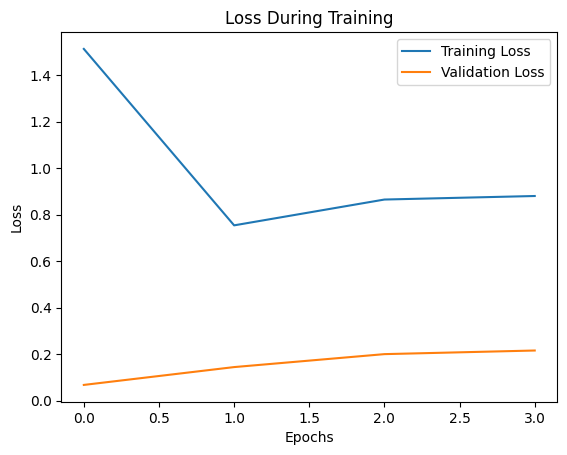

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Model 11: Convoluted Neural Network (CNN)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error
import numpy as np
import tensorflow.keras.backend as K
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the CNN model
model = Sequential()
model.add(Input(shape=(128, 128, 3))) # Input shape of image data: 128x128 images with 3 color channels (RGB)
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu')) # Conv2D Layer with MaxPooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flatten the output of the Conv2D layers to feed into dense layers
model.add(Dense(512, activation='tanh')) # Fully connected (dense) layer
model.add(Dense(128, activation='relu')) # Fully connected (dense) layer
model.add(BatchNormalization())
model.add(Dense(64, activation='relu')) # Fully connected (dense) layer
model.add(Dense(32, activation='relu')) # Fully connected (dense) layer
model.add(BatchNormalization())
model.add(Dense(16, activation='relu')) # Fully connected (dense) layer
model.add(Dense(8, activation='relu')) # Fully connected (dense) layer
model.add(BatchNormalization())
model.add(Dense(4, activation='tanh')) # Fully connected (dense) layer
model.add(Dense(2, activation='tanh')) # Fully connected (dense) layer
model.add(BatchNormalization())
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Summary of the model
model.summary()

# Alan Lei 10/21/24

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8)                   │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │              

 Total params: 2,534,641 (9.67 MB)

 Trainable params: 2,534,301 (9.67 MB)

 Non-trainable params: 340 (1.33 KB)

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='cnn_model_Alan_test11.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Tyler Burguillos 10/14/24

**Training the CNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    img_arr_train, y_train,  # Image data for training
    validation_data=(img_arr_test, y_test),  # Validation on the image test data
    epochs=100,       # Max number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback]  # Include both callbacks
)

# Tyler Burguillos 10/14/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.35720, saving model to cnn_model_Alan_test11.keras
11/11 - 26s - 2s/step - loss: 1.4714 - val_loss: 0.3572
Epoch 2/100

Epoch 2: val_loss improved from 0.35720 to 0.31667, saving model to cnn_model_Alan_test11.keras
11/11 - 1s - 79ms/step - loss: 0.6049 - val_loss: 0.3167
Epoch 3/100

Epoch 3: val_loss did not improve from 0.31667
11/11 - 1s - 60ms/step - loss: 0.3661 - val_loss: 0.3558
Epoch 4/100

Epoch 4: val_loss did not improve from 0.31667
11/11 - 0s - 33ms/step - loss: 0.2342 - val_loss: 0.3258
Epoch 5/100

Epoch 5: val_loss did not improve from 0.31667
11/11 - 0s - 34ms/step - loss: 0.2131 - val_loss: 0.3188
Epoch 5: early stopping


**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Predict on the test set
y_pred = model.predict(img_arr_test)

# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"CNN Test RMSE: {rmse}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 396ms/step
CNN Test RMSE: 451649.0625


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')


R-squared Score: -3.76


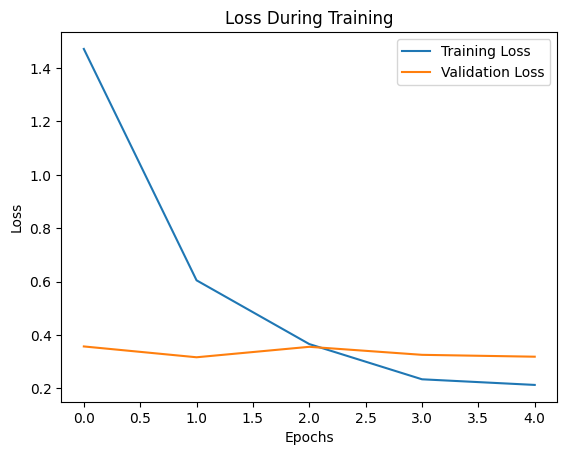

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### CNN Model Design and Testing (Nishan Majarjan)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error
import numpy as np
import tensorflow.keras.backend as K
# Import the Adam optimizer
from tensorflow.keras.optimizers import Adam

# Clear previous Keras session
K.clear_session()

# Define the new CNN model
model = Sequential()

# Input layer for 128x128 images with 3 channels (RGB)
model.add(Input(shape=(128, 128, 3)))

# First convolutional block
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())  #  Batch Normalization
model.add(MaxPooling2D(pool_size=(2, 2)))


# Second convolutional block
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())  #  Batch Normalization
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a dropout layer to prevent overfitting
model.add(Dropout(0.5))  # Dropout rate of 50%
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1))
# Now you can use Adam
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

# Summary of the model
model.summary()

#Nishan Maharjan 10/19/2024

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 256)         │         147,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 230400)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      29,491,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,642,241 (113.08 MB)

 Trainable params: 29,641,601 (113.07 MB)

 Non-trainable params: 640 (2.50 KB)

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:



*    **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
*   **Model Checkpoin**t: Saves the best version of the model during training based on the validation loss.





.


In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=2, restore_best_weights=True)
# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='best_cnn_model_nishan.keras',
                                      monitor='val_loss',
                                      save_best_only=True,
                                      mode='min',
                                      verbose=2)
#Nishan Maharjan 10/19/2024

In [ ]:
# Train the model with image data and labels
history = model.fit(
    img_arr_train, y_train,  # Image data for training
    validation_data=(img_arr_test, y_test),  # Validation on the image test data
    epochs=200,
    batch_size=32,
    verbose=2,
    callbacks=[early_stopping_callback, checkpoint_callback]  # both callbacks
)
#Nishan Maharjan 10/19/2024

Epoch 1/200

Epoch 1: val_loss improved from inf to 2579.25342, saving model to best_cnn_model_nishan.keras
11/11 - 37s - 3s/step - loss: 4120.4570 - val_loss: 2579.2534
Epoch 2/200

Epoch 2: val_loss improved from 2579.25342 to 535.10736, saving model to best_cnn_model_nishan.keras
11/11 - 15s - 1s/step - loss: 91.8186 - val_loss: 535.1074
Epoch 3/200

Epoch 3: val_loss improved from 535.10736 to 402.77444, saving model to best_cnn_model_nishan.keras
11/11 - 7s - 644ms/step - loss: 407.0723 - val_loss: 402.7744
Epoch 4/200

Epoch 4: val_loss improved from 402.77444 to 93.05928, saving model to best_cnn_model_nishan.keras
11/11 - 9s - 805ms/step - loss: 522.5527 - val_loss: 93.0593
Epoch 5/200

Epoch 5: val_loss improved from 93.05928 to 27.98675, saving model to best_cnn_model_nishan.keras
11/11 - 9s - 798ms/step - loss: 231.6069 - val_loss: 27.9868
Epoch 6/200

Epoch 6: val_loss improved from 27.98675 to 13.49533, saving model to best_cnn_model_nishan.keras
11/11 - 7s - 662ms/step - 

**Evaluating Model with RMSE, R², and Loss Chart**


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step
CNN Test RMSE: 433494.625
R-squared Score: -3.38


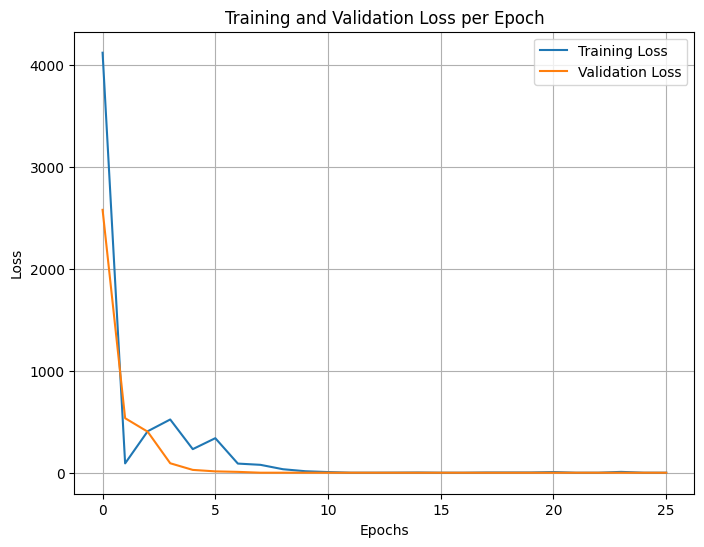

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Predict on the test set
y_pred = model.predict(img_arr_test)

# Decode the predictions back to the original price range (assuming a custom function is provided)
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"CNN Test RMSE: {rmse}")

# Calculate the R-squared score (how well the model predicts the variance in the data)
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')

# Plot the training and validation loss
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
#Nishan Maharjan 10/19/2024

## Integrating the Best FNN with the Best CNN

After selecting the best FNN and CNN configurations, we will integrate them to create a combined model that leverages both textual and visual features.

### Steps:

1. **Combine the FNN and CNN Outputs**:
   - Concatenate the outputs of the best FNN and CNN models before the final prediction layer.
   - Experiment with different configurations for the combined model (e.g., adding additional dense layers after concatenation).

2. **Train the Combined Model**:
   - Use the best hyperparameters from the individual FNN and CNN experiments.
   - Apply early stopping and model checkpointing to save the best version of the combined model.

3. **Evaluate the Combined Model**:
   - Compare the performance of the combined model to the individual FNN and CNN results.
   - Tabulate results to understand the added value of integrating textual and visual features.

### Hybrid Model Design and Testing (Tyler Burguillos)

#### Hybrid Model 1 Design: Combining CNN and FNN with TensorFlow Functional API

This hybrid model combines the strengths of a **Convolutional Neural Network (CNN)** for image data and a **Fully Connected Neural Network (FNN)** for textual data. The model uses TensorFlow's Functional API to allow for flexible layer connections and multi-input processing.

---

##### **Model Architecture**

###### **Image Input**
- **Input shape:** (128, 128, 3)  
- **Purpose:** Process images with three color channels (RGB) using the CNN branch.

###### **Textual Input**
- **Input shape:** (43 features)  
- **Purpose:** Process structured textual data through the FNN branch.

---

##### **CNN Branch for Image Input**

This branch extracts features from the image input using multiple convolution and pooling layers.

1. **Conv2D Layer 1:** 16 filters, 3x3 kernel, ReLU activation  
2. **Batch Normalization Layer 1:** Normalizes the activations  
3. **MaxPooling Layer 1:** Reduces spatial dimensions (2x2 pool)

4. **Conv2D Layer 2:** 32 filters, 5x5 kernel, ReLU activation  
5. **Batch Normalization Layer 2:** Normalizes the activations  
6. **MaxPooling Layer 2:** Reduces spatial dimensions (2x2 pool)

7. **Conv2D Layer 3:** 128 filters, 3x3 kernel, ReLU activation  
8. **Batch Normalization Layer 3:** Normalizes the activations  
9. **MaxPooling Layer 3:** Reduces spatial dimensions (2x2 pool)

10. **Flatten Layer:** Flattens the 2D outputs into a 1D vector.

---

##### **FNN Branch for Textual Input**

This branch processes the structured textual features through fully connected layers.

1. **Dense Layer 1:** 64 neurons, ReLU activation  
2. **Batch Normalization Layer:** Normalizes the activations  
3. **Dense Layer 2:** 32 neurons, ReLU activation

---

##### **Merging the CNN and FNN Branches**

Both branches are concatenated to combine the extracted image and textual features.

- **Concatenate Layer:** Combines the flattened CNN branch and FNN branch outputs.

---

##### **Final Dense Layers for Regression**

The merged output is passed through a fully connected layer and the final output layer for predicting house prices.

1. **Dense Layer:** 128 neurons, ReLU activation  
2. **Output Layer:** Single neuron for regression (predicting house prices)

---

##### **Compiling the Model**

The model is compiled using:
- **Optimizer:** Adam with a learning rate of 0.0001  
- **Loss Function:** Mean Squared Error (MSE)



Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ image_input (InputLayer)  │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 126, 126, 16)   │            448 │ image_input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_12    │ (None, 126, 126, 16)   │             64 │ conv2d_9[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_9           │ (None, 63, 63, 16)     │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_10 (Conv2D)        │ (None, 59, 59, 32)     │         12,832 │ max_pooling2d_9[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_13    │ (None, 59, 59, 32)     │            128 │ conv2d_10[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_10          │ (None, 29, 29, 32)     │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_11 (Conv2D)        │ (None, 27, 27, 128)    │         36,992 │ max_pooling2d_10[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ text_input (InputLayer)   │ (None, 43)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_14    │ (None, 27, 27, 128)    │            512 │ conv2d_11[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_16 (Dense)          │ (None, 64)             │          2,816 │ text_input[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_11          │ (None, 13, 13, 128)    │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_15    │ (None, 64)             │            256 │ dense_16[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_3 (Flatten)       │ (None, 21632)          │              0 │ max_pooling2d_11[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_17 (Dense)          │ (None, 32)             │          2,080 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_3             │ (None, 21664)          │              0 │ flatten_3[0][0],       │
│ (Concatenate)        

 Total params: 2,829,377 (10.79 MB)

 Trainable params: 2,828,897 (10.79 MB)

 Non-trainable params: 480 (1.88 KB)

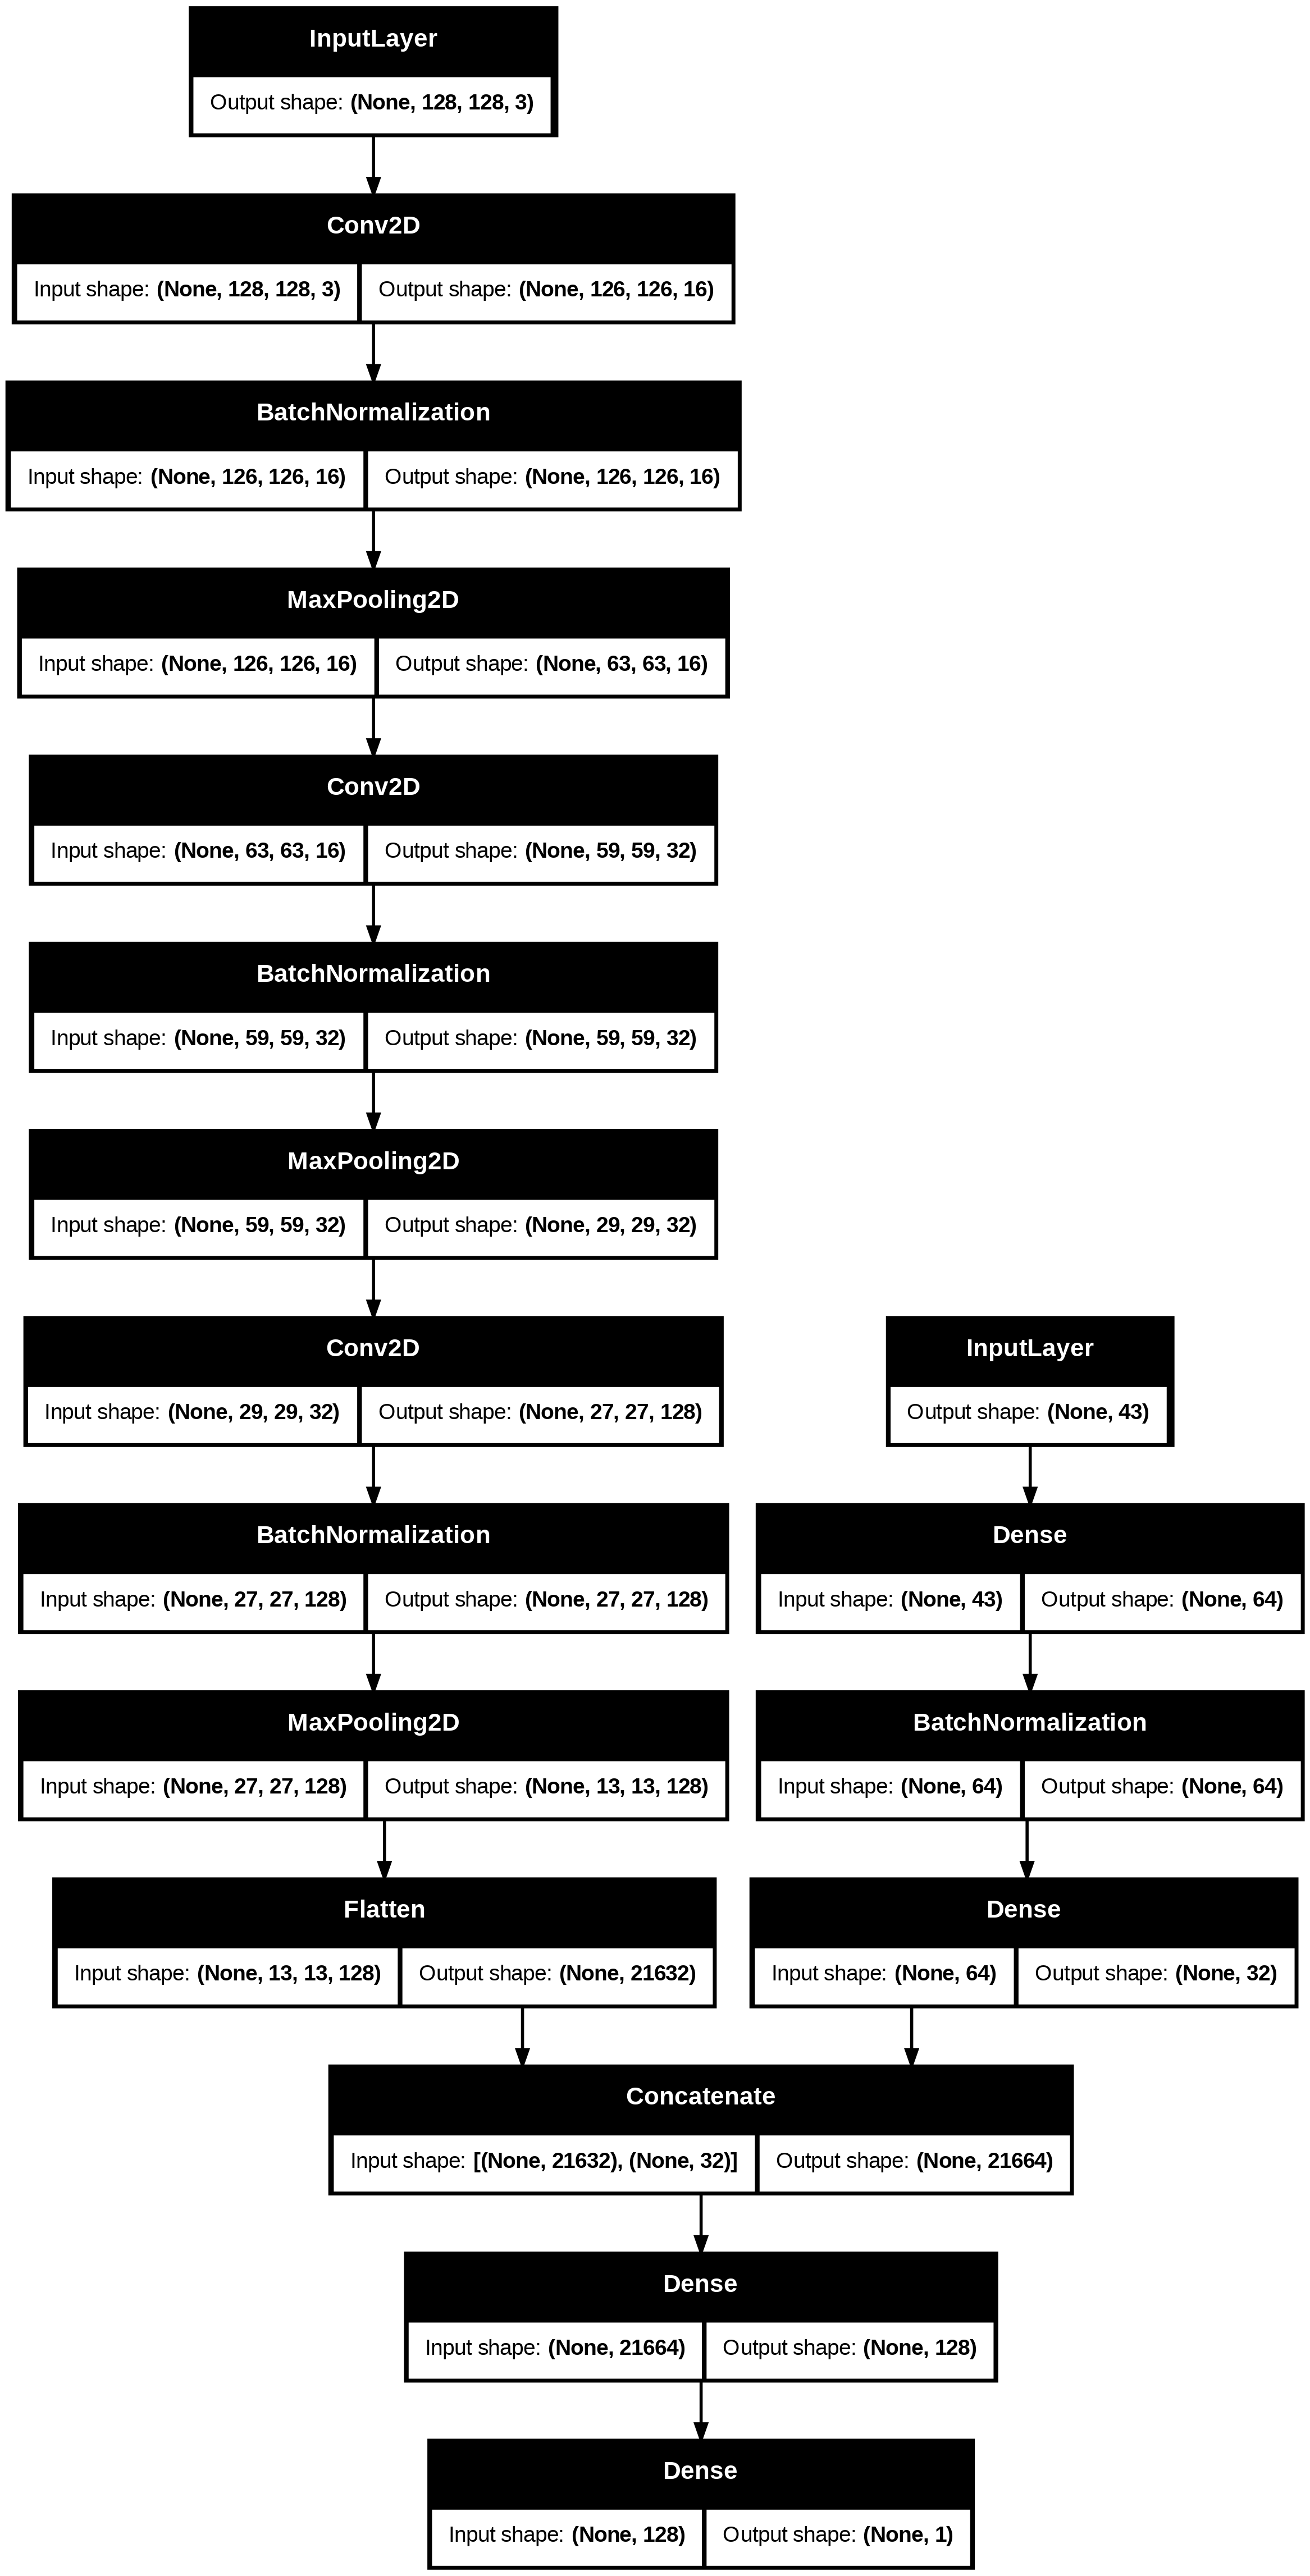

In [ ]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization,
    Dropout, Concatenate
)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow.keras.backend as K
from tensorflow.keras.utils import plot_model

# Image input (shape: (128, 128, 3))
image_input = Input(shape=(128, 128, 3), name="image_input")

# Textual input (shape: 43 features)
text_input = Input(shape=(43,), name="text_input")

# CNN branch (for image input)
cnn_branch = Conv2D(16, (3, 3), activation='relu')(image_input)
cnn_branch = BatchNormalization()(cnn_branch)
cnn_branch = MaxPooling2D(pool_size=(2, 2))(cnn_branch)

cnn_branch = Conv2D(32, (5, 5), activation='relu')(cnn_branch)
cnn_branch = BatchNormalization()(cnn_branch)
cnn_branch = MaxPooling2D(pool_size=(2, 2))(cnn_branch)

cnn_branch = Conv2D(128, (3, 3), activation='relu')(cnn_branch)
cnn_branch = BatchNormalization()(cnn_branch)
cnn_branch = MaxPooling2D(pool_size=(2, 2))(cnn_branch)

cnn_branch = Flatten()(cnn_branch)

# FNN branch (for textual input)
fnn_branch = Dense(64, activation='relu')(text_input)
fnn_branch = BatchNormalization()(fnn_branch)
fnn_branch = Dense(32, activation='relu')(fnn_branch)

# Combine CNN and FNN branches
merged = Concatenate()([cnn_branch, fnn_branch])

# Final dense layers for regression
dense_layer = Dense(128, activation='relu')(merged)
output = Dense(1)(dense_layer)  # Single neuron for regression (predicting price)

# Define the hybrid model
hybrid_model = Model(inputs=[image_input, text_input], outputs=output)

# Compile the model with Adam optimizer and MSE loss
learning_rate = 0.0001
adam_optimizer = Adam(learning_rate=learning_rate)
hybrid_model.compile(optimizer=adam_optimizer, loss='mean_squared_error')

# Summary of the hybrid model
hybrid_model.summary()

# Plot graph
plot_model(hybrid_model, show_shapes=True)

In [ ]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=2)
checkpoint_callback = ModelCheckpoint(
    filepath='hybrid_model.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2
)

history = hybrid_model.fit(
    [img_arr_train, X_text_train], y_train,  # Use image + textual data for training
    validation_data=([img_arr_test, X_text_test], y_test),  # Validation on both datasets
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping_callback, checkpoint_callback],
    verbose=2
)

Epoch 1/100

Epoch 1: val_loss improved from inf to 2.37106, saving model to hybrid_model.keras
11/11 - 9s - 861ms/step - loss: 8.6345 - val_loss: 2.3711
Epoch 2/100

Epoch 2: val_loss improved from 2.37106 to 0.66944, saving model to hybrid_model.keras
11/11 - 4s - 370ms/step - loss: 3.1177 - val_loss: 0.6694
Epoch 3/100

Epoch 3: val_loss improved from 0.66944 to 0.16258, saving model to hybrid_model.keras
11/11 - 0s - 38ms/step - loss: 0.3753 - val_loss: 0.1626
Epoch 4/100

Epoch 4: val_loss did not improve from 0.16258
11/11 - 0s - 17ms/step - loss: 0.1521 - val_loss: 0.1731
Epoch 5/100

Epoch 5: val_loss did not improve from 0.16258
11/11 - 0s - 27ms/step - loss: 0.1093 - val_loss: 0.1692
Epoch 6/100

Epoch 6: val_loss improved from 0.16258 to 0.15357, saving model to hybrid_model.keras
11/11 - 1s - 48ms/step - loss: 0.0845 - val_loss: 0.1536
Epoch 7/100

Epoch 7: val_loss improved from 0.15357 to 0.14244, saving model to hybrid_model.keras
11/11 - 1s - 57ms/step - loss: 0.0647 - 

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step
Hybrid Model RMSE: 279959.78125
Hybrid Model R-squared Score: -0.83


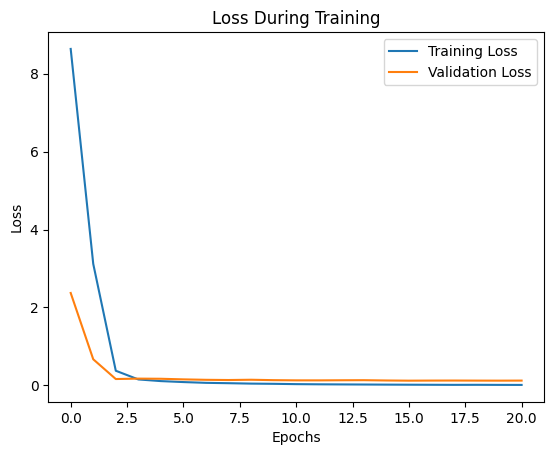

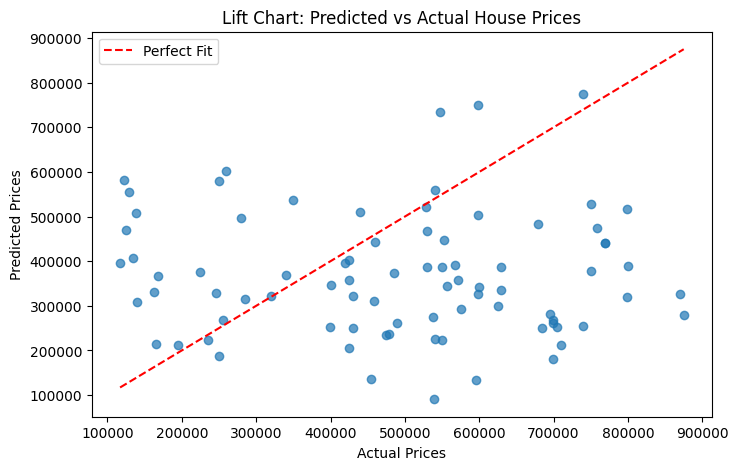

In [ ]:
# Predict on the test set
y_pred = hybrid_model.predict([img_arr_test, X_text_test])

# Decode predictions and test values back to the original range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE and R-squared score
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Hybrid Model RMSE: {rmse}")

r2 = r2_score(y_test_original, y_pred_original)
print(f"Hybrid Model R-squared Score: {r2:.2f}")

# Plot Loss Curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Lift Chart: Compare predicted vs actual values
plt.figure(figsize=(8, 5))
plt.scatter(y_test_original, y_pred_original, alpha=0.7)
plt.plot([min(y_test_original), max(y_test_original)],
         [min(y_test_original), max(y_test_original)],
         color='red', linestyle='--', label='Perfect Fit')
plt.title('Lift Chart: Predicted vs Actual House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()


#### Hybrid Model 2 Design: Combining CNN and FNN with TensorFlow Functional API

This hybrid model combines the strengths of a **Convolutional Neural Network (CNN)** for image data and a **Fully Connected Neural Network (FNN)** for textual data. The model uses TensorFlow's Functional API to allow for flexible layer connections and multi-input processing.

---

##### **Model Architecture**

###### **Image Input**
- **Input shape:** (128, 128, 3)  
- **Purpose:** Process images with three color channels (RGB) using the CNN branch.

###### **Textual Input**
- **Input shape:** (43 features)  
- **Purpose:** Process structured textual data through the FNN branch.

---

##### **CNN Branch for Image Input**

This branch extracts features from the image input using multiple convolution and pooling layers.

1. **Conv2D Layer 1:** 16 filters, 3x3 kernel, ReLU activation  
2. **Batch Normalization Layer 1:** Normalizes the activations  
3. **MaxPooling Layer 1:** Reduces spatial dimensions (2x2 pool)

4. **Conv2D Layer 2:** 32 filters, 5x5 kernel, ReLU activation  
5. **Batch Normalization Layer 2:** Normalizes the activations  
6. **MaxPooling Layer 2:** Reduces spatial dimensions (2x2 pool)

7. **Conv2D Layer 3:** 128 filters, 3x3 kernel, ReLU activation  
8. **Batch Normalization Layer 3:** Normalizes the activations  
9. **MaxPooling Layer 3:** Reduces spatial dimensions (2x2 pool)

10. **Flatten Layer:** Flattens the 2D outputs into a 1D vector.

---

##### **FNN Branch for Textual Input**

This branch processes the structured textual features through fully connected layers.

1. **Dense Layer 1:** 64 neurons, ReLU activation  
2. **Batch Normalization Layer:** Normalizes the activations  
3. **Dense Layer 2:** 32 neurons, ReLU activation

---

##### **Merging the CNN and FNN Branches**

Both branches are concatenated to combine the extracted image and textual features.

- **Concatenate Layer:** Combines the flattened CNN branch and FNN branch outputs.

---

##### **Final Dense Layers for Regression**

The merged output is passed through a fully connected layer and the final output layer for predicting house prices.

1. **Dense Layer:** 128 neurons, ReLU activation  
2. **Output Layer:** Single neuron for regression (predicting house prices)

---

##### **Compiling the Model**

The model is compiled using:
- **Optimizer:** Adam with a learning rate of 0.0001  
- **Loss Function:** Mean Squared Error (MSE)



Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ image_input (InputLayer)  │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_33 (Conv2D)        │ (None, 126, 126, 16)   │            448 │ image_input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_48    │ (None, 126, 126, 16)   │             64 │ conv2d_33[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_33          │ (None, 63, 63, 16)     │              0 │ batch_normalization_4… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_34 (Conv2D)        │ (None, 59, 59, 32)     │         12,832 │ max_pooling2d_33[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_49    │ (None, 59, 59, 32)     │            128 │ conv2d_34[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ text_input (InputLayer)   │ (None, 43)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_34          │ (None, 29, 29, 32)     │              0 │ batch_normalization_4… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_64 (Dense)          │ (None, 64)             │          2,816 │ text_input[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_35 (Conv2D)        │ (None, 27, 27, 64)     │         18,496 │ max_pooling2d_34[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_51    │ (None, 64)             │            256 │ dense_64[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_50    │ (None, 27, 27, 64)     │            256 │ conv2d_35[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_65 (Dense)          │ (None, 32)             │          2,080 │ batch_normalization_5… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_35          │ (None, 13, 13, 64)     │              0 │ batch_normalization_5… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_52    │ (None, 32)             │            128 │ dense_65[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_22 (Flatten) 

 Total params: 1,424,785 (5.44 MB)

 Trainable params: 1,424,369 (5.43 MB)

 Non-trainable params: 416 (1.62 KB)

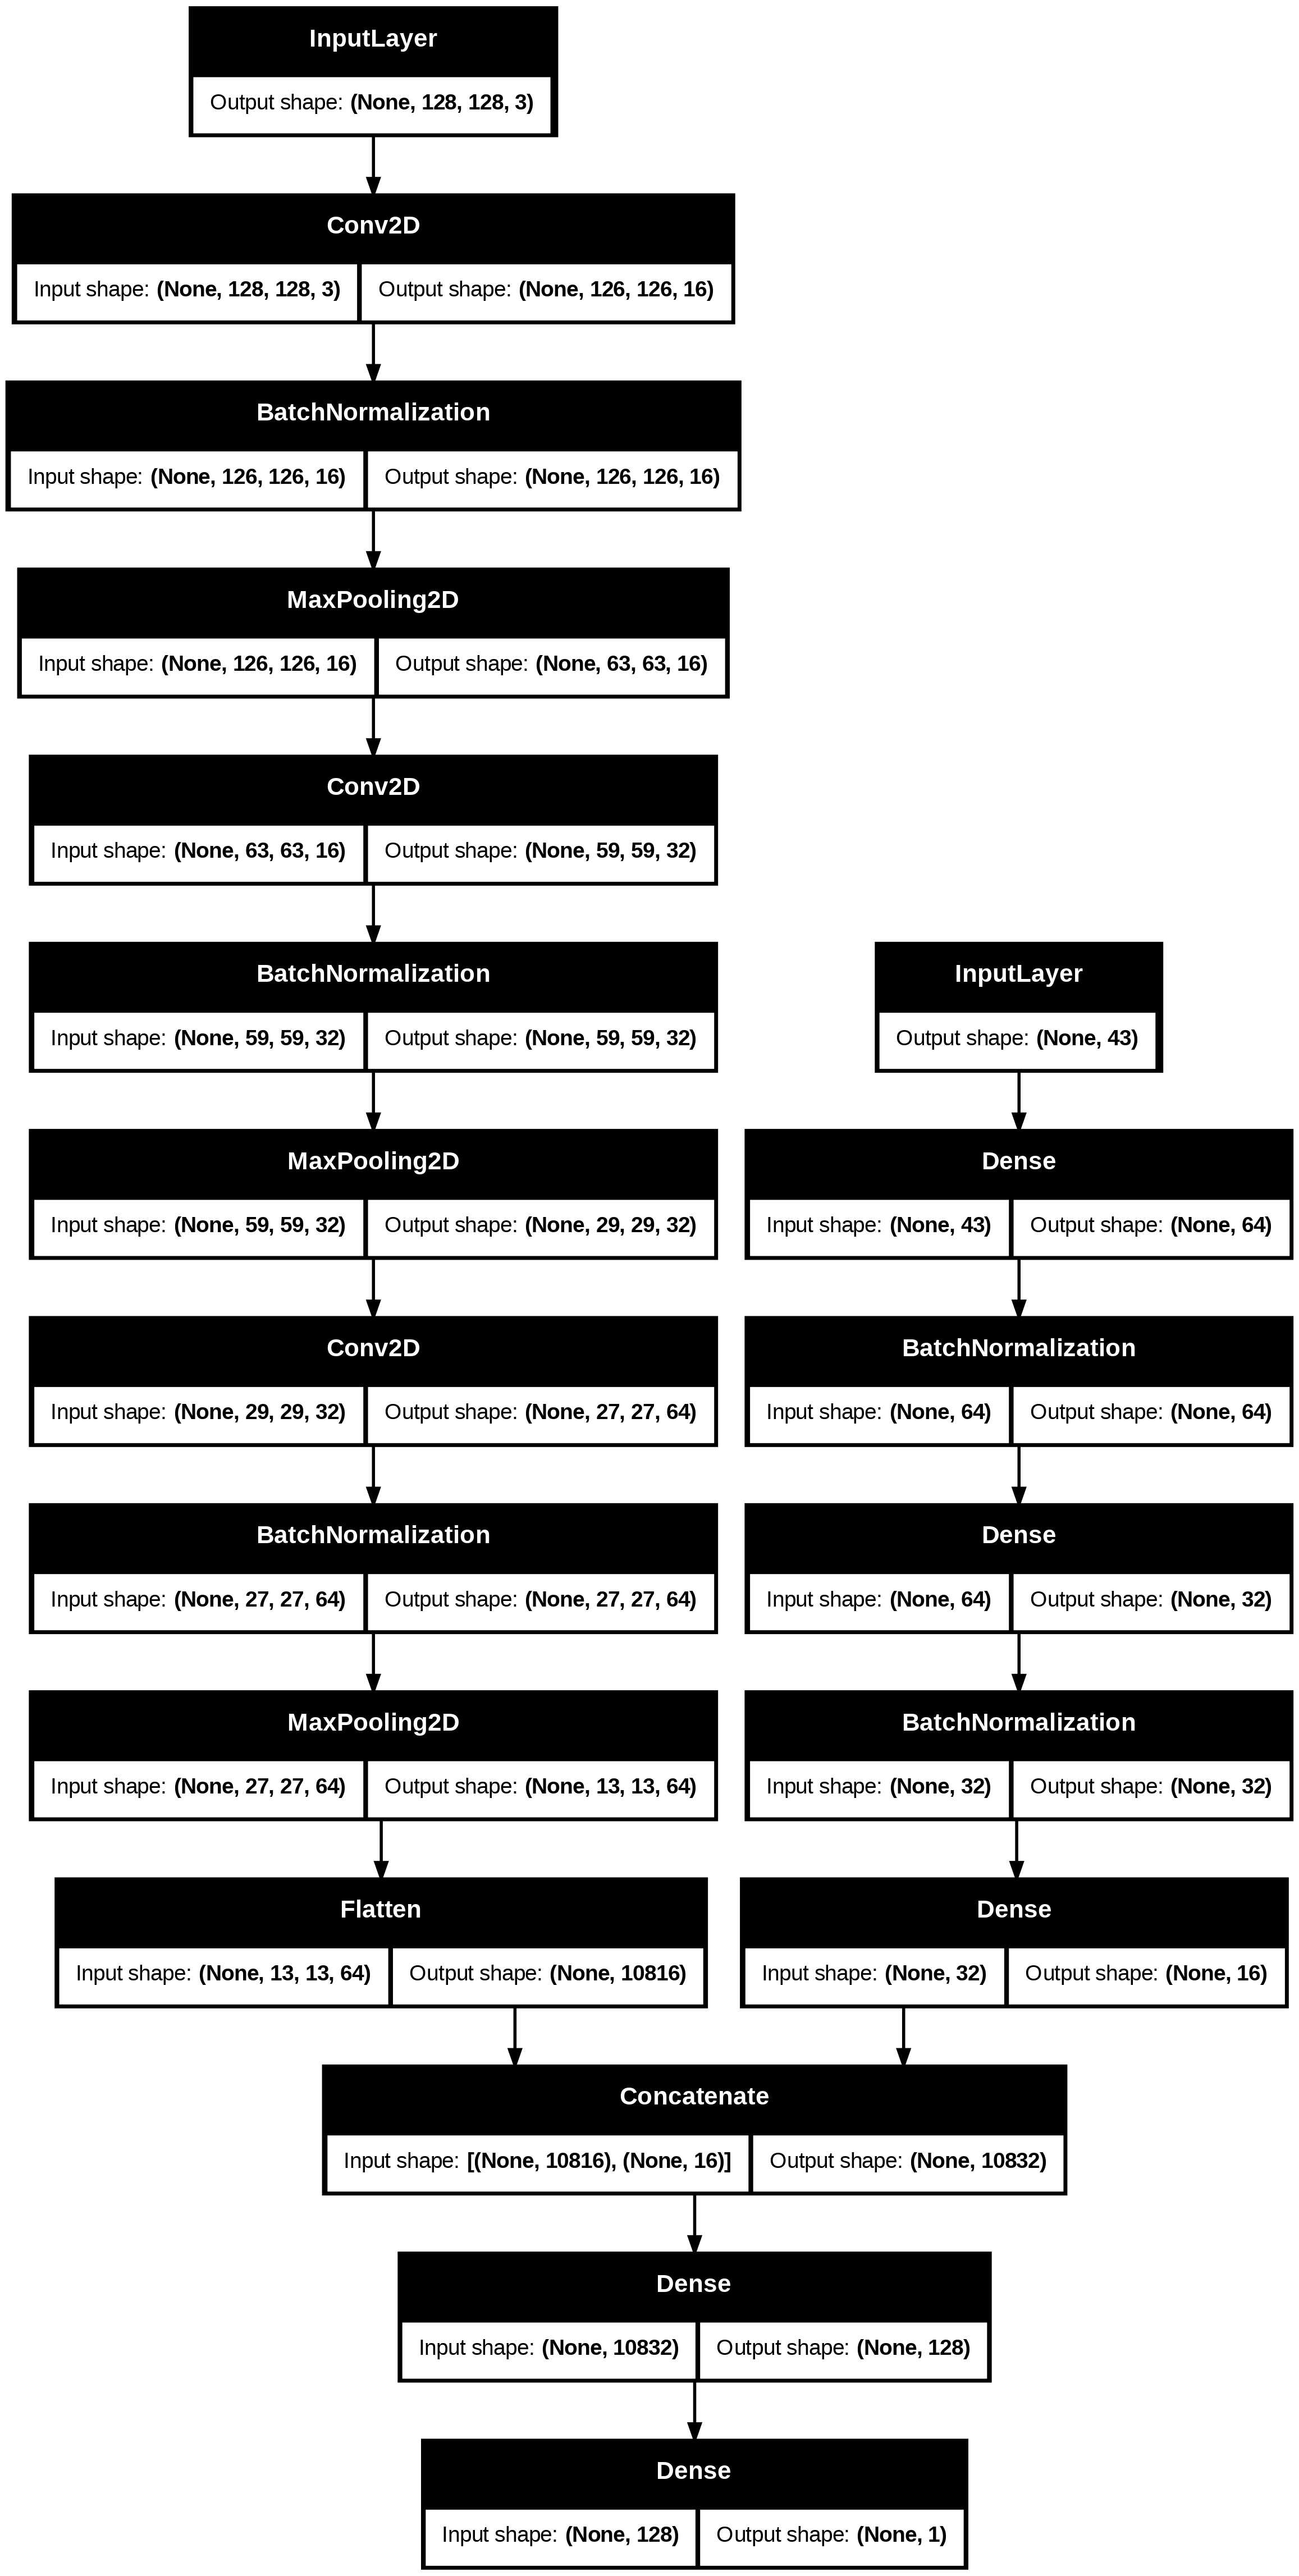

In [ ]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization,
    Dropout, Concatenate
)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow.keras.backend as K
from tensorflow.keras.utils import plot_model

# Image input (shape: (128, 128, 3))
image_input = Input(shape=(128, 128, 3), name="image_input")

# Textual input (shape: 43 features)
text_input = Input(shape=(43,), name="text_input")

# CNN branch (for image input)
cnn_branch = Conv2D(16, (3, 3), activation='relu')(image_input)
cnn_branch = BatchNormalization()(cnn_branch)
cnn_branch = MaxPooling2D(pool_size=(2, 2))(cnn_branch)

cnn_branch = Conv2D(32, (5, 5), activation='relu')(cnn_branch)
cnn_branch = BatchNormalization()(cnn_branch)
cnn_branch = MaxPooling2D(pool_size=(2, 2))(cnn_branch)

cnn_branch = Conv2D(64, (3, 3), activation='relu')(cnn_branch)
cnn_branch = BatchNormalization()(cnn_branch)
cnn_branch = MaxPooling2D(pool_size=(2, 2))(cnn_branch)

cnn_branch = Flatten()(cnn_branch)

# FNN branch (for textual input)
fnn_branch = Dense(64, activation='relu')(text_input)
fnn_branch = BatchNormalization()(fnn_branch)
fnn_branch = Dense(32, activation='relu')(fnn_branch)
fnn_branch = BatchNormalization()(fnn_branch)
fnn_branch = Dense(16, activation='relu')(fnn_branch)

# Combine CNN and FNN branches
merged = Concatenate()([cnn_branch, fnn_branch])

# Final dense layers for regression
dense_layer = Dense(128, activation='relu')(merged)
output = Dense(1)(dense_layer)  # Single neuron for regression (predicting price)

# Define the hybrid model
hybrid_model = Model(inputs=[image_input, text_input], outputs=output)

# Compile the model with Adam optimizer and MSE loss
learning_rate = 0.0001
adam_optimizer = Adam(learning_rate=learning_rate)
hybrid_model.compile(optimizer=adam_optimizer, loss='mean_squared_error')

# Summary of the hybrid model
hybrid_model.summary()

# Plot graph
plot_model(hybrid_model, show_shapes=True)

In [ ]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=2)
checkpoint_callback = ModelCheckpoint(
    filepath='hybrid_model.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2
)

history = hybrid_model.fit(
    [img_arr_train, X_text_train], y_train,  # Use image + textual data for training
    validation_data=([img_arr_test, X_text_test], y_test),  # Validation on both datasets
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping_callback, checkpoint_callback],
    verbose=2
)

Epoch 1/100

Epoch 1: val_loss improved from inf to 8.12064, saving model to hybrid_model.keras
11/11 - 12s - 1s/step - loss: 2.0051 - val_loss: 8.1206
Epoch 2/100

Epoch 2: val_loss improved from 8.12064 to 2.80921, saving model to hybrid_model.keras
11/11 - 0s - 36ms/step - loss: 1.3648 - val_loss: 2.8092
Epoch 3/100

Epoch 3: val_loss improved from 2.80921 to 0.20305, saving model to hybrid_model.keras
11/11 - 1s - 49ms/step - loss: 0.5749 - val_loss: 0.2031
Epoch 4/100

Epoch 4: val_loss improved from 0.20305 to 0.14125, saving model to hybrid_model.keras
11/11 - 0s - 28ms/step - loss: 0.3164 - val_loss: 0.1413
Epoch 5/100

Epoch 5: val_loss improved from 0.14125 to 0.12154, saving model to hybrid_model.keras
11/11 - 0s - 32ms/step - loss: 0.1279 - val_loss: 0.1215
Epoch 6/100

Epoch 6: val_loss improved from 0.12154 to 0.09254, saving model to hybrid_model.keras
11/11 - 0s - 31ms/step - loss: 0.0815 - val_loss: 0.0925
Epoch 7/100

Epoch 7: val_loss improved from 0.09254 to 0.08794

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 236ms/step
Hybrid Model RMSE: 251005.8125
Hybrid Model R-squared Score: -0.47


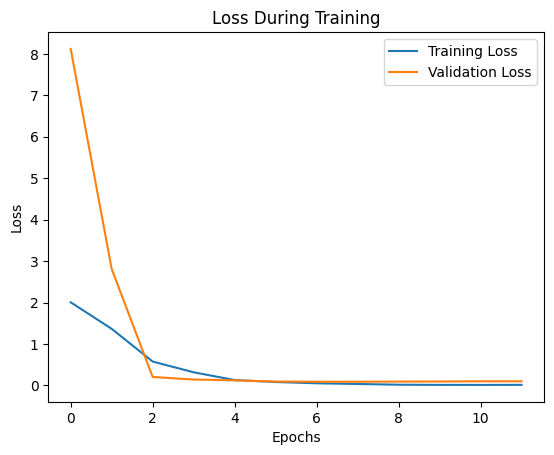

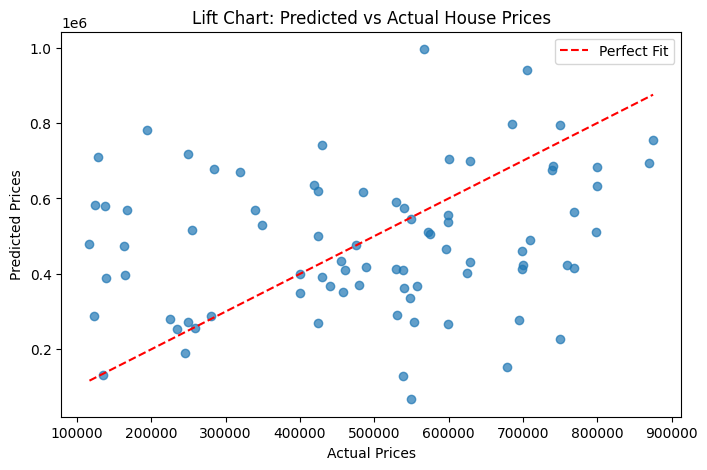

In [ ]:
# Predict on the test set
y_pred = hybrid_model.predict([img_arr_test, X_text_test])

# Decode predictions and test values back to the original range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE and R-squared score
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Hybrid Model RMSE: {rmse}")

r2 = r2_score(y_test_original, y_pred_original)
print(f"Hybrid Model R-squared Score: {r2:.2f}")

# Plot Loss Curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Lift Chart: Compare predicted vs actual values
plt.figure(figsize=(8, 5))
plt.scatter(y_test_original, y_pred_original, alpha=0.7)
plt.plot([min(y_test_original), max(y_test_original)],
         [min(y_test_original), max(y_test_original)],
         color='red', linestyle='--', label='Perfect Fit')
plt.title('Lift Chart: Predicted vs Actual House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()

#### Hybrid Model Design with Transfer Learning (VGG16 + FNN) Using TensorFlow Functional API

This hybrid model enhances the **CNN branch** with **transfer learning** from **VGG16** to leverage pre-trained image features. The model combines these features with structured textual data using a **Fully Connected Neural Network (FNN)** for house price prediction.

---

##### **Model Architecture**

###### **Image Input (Transfer Learning with VGG16)**
- **Input Shape:** (128, 128, 3)  
- **Purpose:** Use VGG16 to extract pre-trained features from image data.

###### **Textual Input**
- **Input Shape:** (43 features)  
- **Purpose:** Process structured data through an FNN branch.

---

##### **CNN Branch with Transfer Learning: VGG16**

Instead of building a CNN from scratch, we use the **VGG16 model** pre-trained on ImageNet and remove its top layers. This allows us to reuse learned features and fine-tune them for our task.

1. **VGG16 Layer:** Pre-trained on ImageNet, `include_top=False` to exclude the final classification layers.  
2. **Trainable Layers:** Optionally, we can freeze the VGG16 layers or allow them to train further.

3. **Flatten Layer:** Converts the VGG16 output to a 1D vector.

---

##### **FNN Branch for Textual Input**

This branch processes the structured textual data through dense layers.

1. **Dense Layer 1:** 64 neurons, ReLU activation  
2. **Batch Normalization Layer:** Normalizes the activations  
3. **Dense Layer 2:** 32 neurons, ReLU activation

---

##### **Merging the VGG16 and FNN Branches**

The outputs from the **VGG16-based CNN** and **FNN** branches are concatenated for combined feature learning.

- **Concatenate Layer:** Merges the CNN and FNN outputs.

---

##### **Final Dense Layers for Regression**

The merged output is processed through additional dense layers for the final prediction.

1. **Dense Layer:** 128 neurons, ReLU activation  
2. **Output Layer:** Single neuron for regression (predicting house prices)

---

##### **Compiling the Model**

The model is compiled with:
- **Optimizer:** Adam with a learning rate of 0.0001  
- **Loss Function:** Mean Squared Error (MSE)

Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ vgg_input (InputLayer)    │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 128, 128, 64)   │          1,792 │ vgg_input[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 128, 128, 64)   │         36,928 │ block1_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_pool               │ (None, 64, 64, 64)     │              0 │ block1_conv2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_conv1 (Conv2D)     │ (None, 64, 64, 128)    │         73,856 │ block1_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_conv2 (Conv2D)     │ (None, 64, 64, 128)    │        147,584 │ block2_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 32, 32, 128)    │              0 │ block2_conv2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv1 (Conv2D)     │ (None, 32, 32, 256)    │        295,168 │ block2_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv2 (Conv2D)     │ (None, 32, 32, 256)    │        590,080 │ block3_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ image_input (InputLayer)  │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv3 (Conv2D)     │ (None, 32, 32, 256)    │        590,080 │ block3_conv2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_48 (Conv2D)        │ (None, 126, 126, 16)   │            448 │ image_input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_pool               │ (None, 16, 16, 256)    │              0 │ block3_conv3[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_72    │ (None, 126, 126, 16)   │             64 │ conv2d_48[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv1 (Conv2D)     │ (None, 16, 16, 512)    │      1,180,160 │ block3_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_48          │ (None, 63, 63, 16)     │              0 │ batch_normalization_7… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv2 (Conv2D)     │ (None, 16, 16, 512)    │      2,359,808 │ block4_conv1[0][0]     │
├──────────────────────

 Total params: 18,592,641 (70.93 MB)

 Trainable params: 3,877,473 (14.79 MB)

 Non-trainable params: 14,715,168 (56.13 MB)

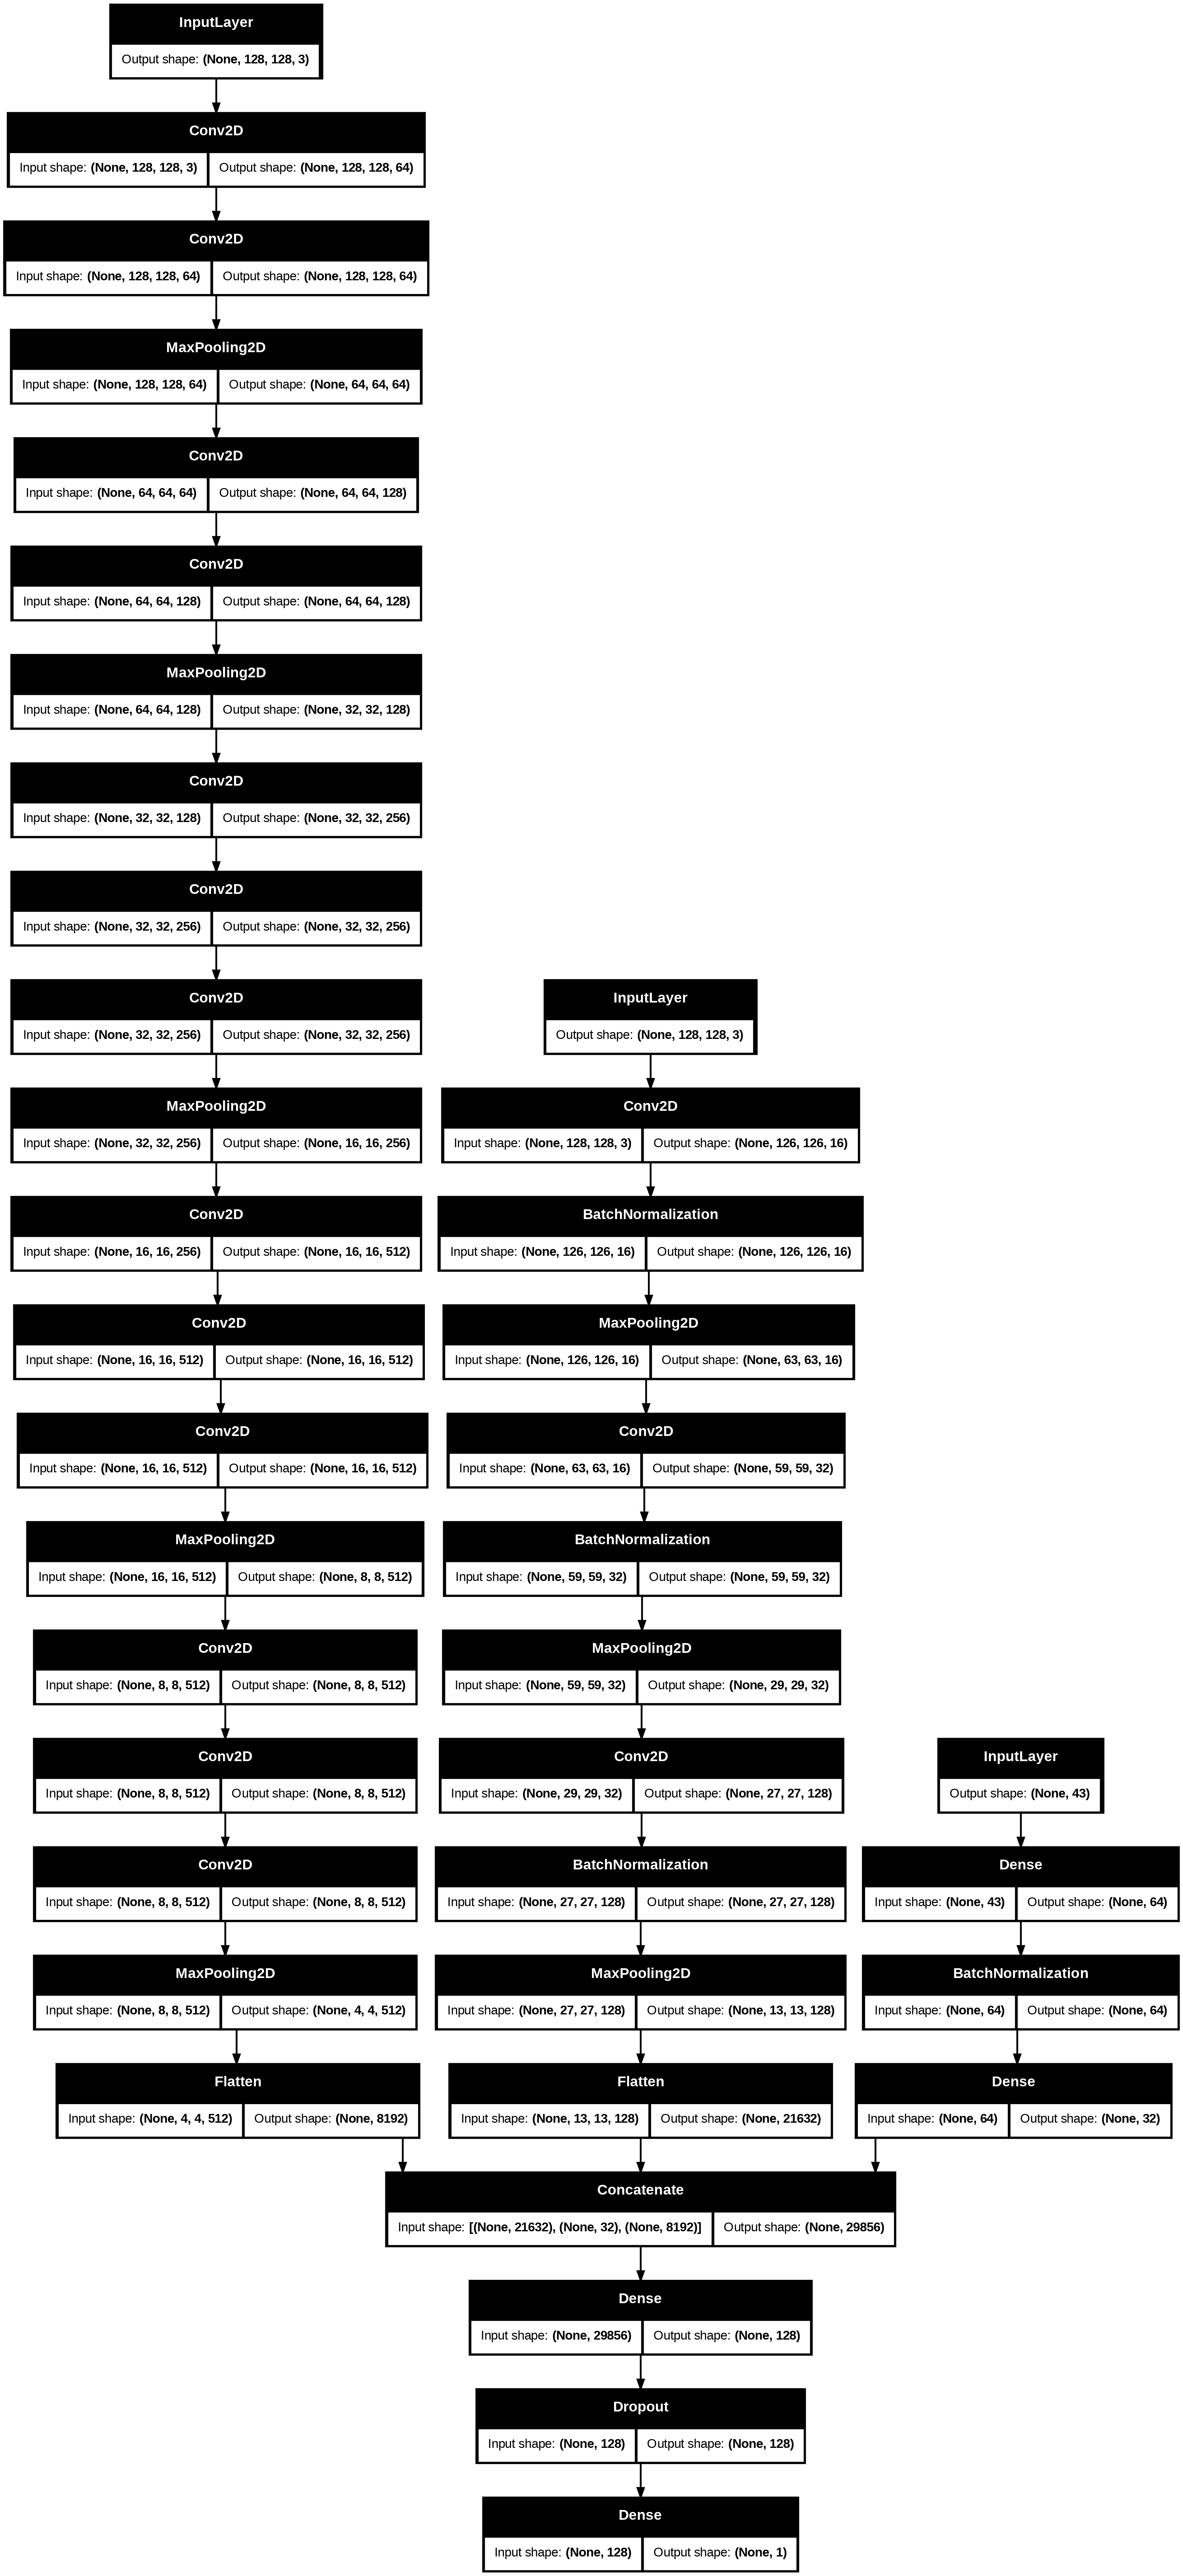

In [ ]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization,
    Dropout, Concatenate
)
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Input Layers
# Image Input (128x128x3)
image_input = Input(shape=(128, 128, 3), name="image_input")

# Textual Input (43 features)
text_input = Input(shape=(43,), name="text_input")

# VGG16 Transfer Learning Input (128x128x3)
vgg_input = Input(shape=(128, 128, 3), name="vgg_input")
vgg_model = VGG16(include_top=False, input_tensor=vgg_input, weights='imagenet')
for layer in vgg_model.layers:
    layer.trainable = False  # Freeze VGG16 layers

vgg_branch = Flatten()(vgg_model.output)  # Flatten the VGG output

# CNN Branch
cnn_branch = Conv2D(16, (3, 3), activation='relu')(image_input)
cnn_branch = BatchNormalization()(cnn_branch)
cnn_branch = MaxPooling2D(pool_size=(2, 2))(cnn_branch)

cnn_branch = Conv2D(32, (5, 5), activation='relu')(cnn_branch)
cnn_branch = BatchNormalization()(cnn_branch)
cnn_branch = MaxPooling2D(pool_size=(2, 2))(cnn_branch)

cnn_branch = Conv2D(128, (3, 3), activation='relu')(cnn_branch)
cnn_branch = BatchNormalization()(cnn_branch)
cnn_branch = MaxPooling2D(pool_size=(2, 2))(cnn_branch)
cnn_branch = Flatten()(cnn_branch)

# FNN Branch
fnn_branch = Dense(64, activation='relu')(text_input)
fnn_branch = BatchNormalization()(fnn_branch)
fnn_branch = Dense(32, activation='relu')(fnn_branch)

# Combine Branches
merged = Concatenate()([cnn_branch, fnn_branch, vgg_branch])

# Final Dense Layers for Regression
dense_layer = Dense(128, activation='relu')(merged)
dense_layer = Dropout(0.2)(dense_layer)  # Regularization to avoid overfitting
output = Dense(1)(dense_layer)  # Output layer for regression

# Define the Hybrid Model
hybrid_model = Model(inputs=[image_input, text_input, vgg_input], outputs=output)

# Compile the Model
learning_rate = 0.0001
adam_optimizer = Adam(learning_rate=learning_rate)
hybrid_model.compile(optimizer=adam_optimizer, loss='mean_squared_error')

# Display Model Summary
hybrid_model.summary()
plot_model(hybrid_model, show_shapes=True)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=2)
model_checkpoint = ModelCheckpoint(
    filepath='hybrid_model_VGG.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2
)

# Create two separate copies of the image data for the CNN and VGG16 branches
cnn_img_arr_train = img_arr_train.copy()  # For CNN branch
vgg_img_arr_train = img_arr_train.copy()  # For VGG16 branch

cnn_img_arr_test = img_arr_test.copy()    # For CNN branch test set
vgg_img_arr_test = img_arr_test.copy()    # For VGG16 branch test set


# Train the model with separate inputs for CNN and VGG16 branches
history = hybrid_model.fit(
    [img_arr_train, X_text_train, img_arr_train], y_train,  # Image + Textual + VGG inputs
    validation_data=([img_arr_test, X_text_test, img_arr_test], y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, model_checkpoint],
    verbose=2
)


Epoch 1/100

Epoch 1: val_loss improved from inf to 63.53553, saving model to hybrid_model_VGG.keras
11/11 - 13s - 1s/step - loss: 125.6821 - val_loss: 63.5355
Epoch 2/100

Epoch 2: val_loss improved from 63.53553 to 36.12469, saving model to hybrid_model_VGG.keras
11/11 - 5s - 424ms/step - loss: 61.2568 - val_loss: 36.1247
Epoch 3/100

Epoch 3: val_loss improved from 36.12469 to 8.91688, saving model to hybrid_model_VGG.keras
11/11 - 2s - 204ms/step - loss: 28.2812 - val_loss: 8.9169
Epoch 4/100

Epoch 4: val_loss improved from 8.91688 to 2.52693, saving model to hybrid_model_VGG.keras
11/11 - 2s - 169ms/step - loss: 11.9697 - val_loss: 2.5269
Epoch 5/100

Epoch 5: val_loss improved from 2.52693 to 1.79627, saving model to hybrid_model_VGG.keras
11/11 - 2s - 138ms/step - loss: 5.1417 - val_loss: 1.7963
Epoch 6/100

Epoch 6: val_loss did not improve from 1.79627
11/11 - 1s - 60ms/step - loss: 2.1371 - val_loss: 1.8695
Epoch 7/100

Epoch 7: val_loss improved from 1.79627 to 1.55123, sav

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 422ms/step
Hybrid Model RMSE: 528076.875
Hybrid Model R-squared Score: -5.51


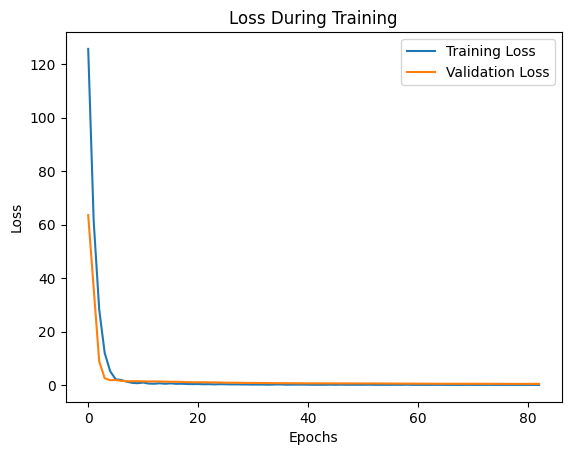

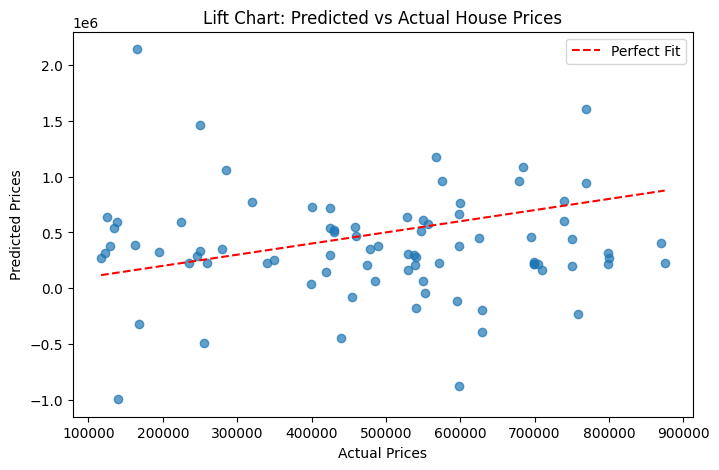

In [ ]:
# Predict on the test set with three inputs
y_pred = hybrid_model.predict([img_arr_test, X_text_test, img_arr_test])

# Decode predictions and actual values to original range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE and R² score
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
r2 = r2_score(y_test_original, y_pred_original)

print(f"Hybrid Model RMSE: {rmse}")
print(f"Hybrid Model R-squared Score: {r2:.2f}")

# Plot Loss Curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# --- Plot Lift Chart ---
plt.figure(figsize=(8, 5))
plt.scatter(y_test_original, y_pred_original, alpha=0.7)
plt.plot([min(y_test_original), max(y_test_original)],
         [min(y_test_original), max(y_test_original)],
         color='red', linestyle='--', label='Perfect Fit')
plt.title('Lift Chart: Predicted vs Actual House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()

### Hybrid Model Design and Testing (Austin Nolte)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ text_in (InputLayer)      │ (None, 43)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ image_in (InputLayer)     │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_19 (Dense)          │ (None, 64)             │          2,816 │ text_in[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_11 (Conv2D)        │ (None, 126, 126, 128)  │          3,584 │ image_in[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_20 (Dense)          │ (None, 48)             │          3,120 │ dense_19[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_11          │ (None, 63, 63, 128)    │              0 │ conv2d_11[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_5 (Dropout)       │ (None, 48)             │              0 │ dense_20[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_5 (Flatten)       │ (None, 508032)         │              0 │ max_pooling2d_11[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_21 (Dense)          │ (None, 32)             │          1,568 │ dropout_5[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_5             │ (None, 508064)         │              0 │ flatten_5[0][0],       │
│ (Concatenate)             │                        │                │ dense_21[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_22 (Dense)          │ (None, 64)             │     32,516,160 │ concatenate_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_23 (Dense)          │ (None, 1)              │             65 │ dense_22[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 32,527,313 (124.08 MB)

 Trainable params: 32,527,313 (124.08 MB)

 Non-trainable params: 0 (0.00 B)

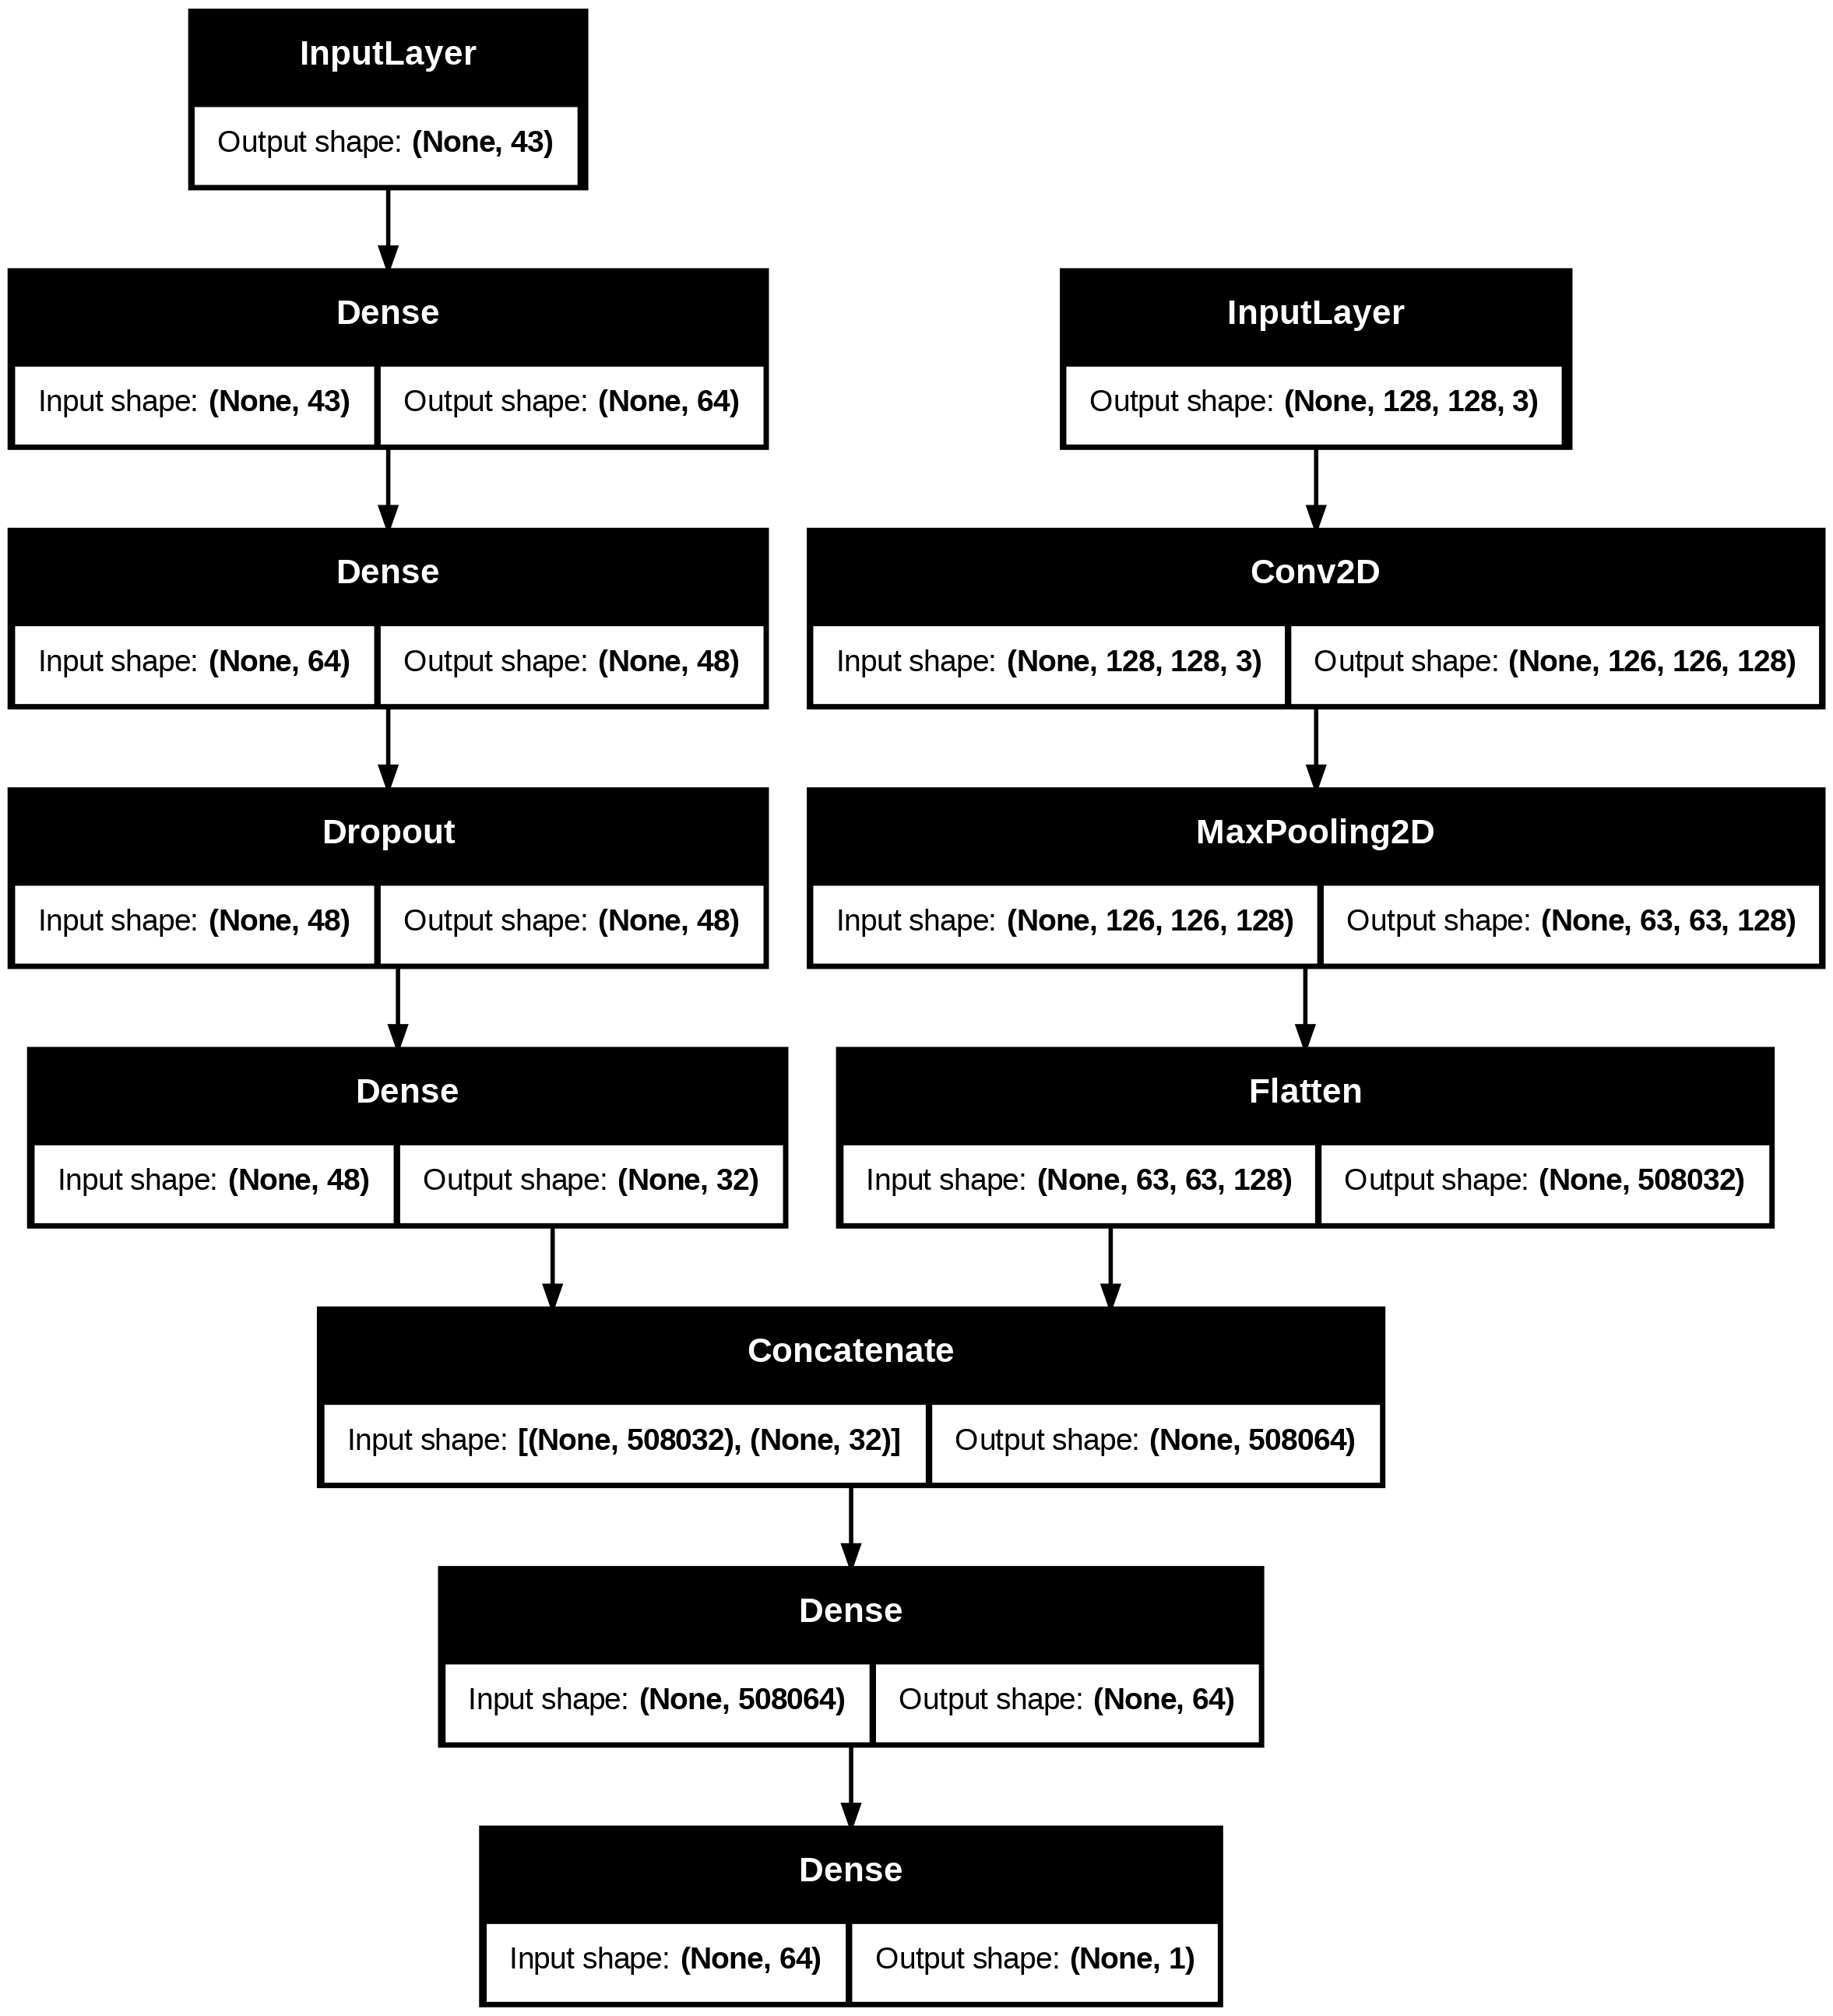

In [ ]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization,
    Dropout, Concatenate
)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow.keras.backend as K
from tensorflow.keras.utils import plot_model

# Image input 128x128 and rgb for 3 channels
image_in = Input(shape=(128, 128, 3), name="image_in")

# Textual input (shape: 43 features)
text_in = Input(shape=(43,), name="text_in")

# CNN branch copying model 7 from sigmoid and adam
cnnb = Conv2D(32, (3, 3), activation='sigmoid')(image_in)
cnnb = MaxPooling2D(pool_size=(2, 2))(cnnb)
cnnb = Conv2D(128, (3, 3), activation='sigmoid')(image_in)
cnnb = MaxPooling2D(pool_size=(2, 2))(cnnb)
cnnb = Flatten()(cnnb)

# FNN branch copying model 7 from sigmoid and adam fnn tests
fnnb = Dense(64, activation='sigmoid')(text_in)
fnnb = Dense(48)(fnnb)
fnnb = Dropout(0.1)(fnnb)
fnnb = Dense(32,activation='sigmoid')(fnnb)

# Combine CNN and FNN branches
merged = Concatenate()([cnnb, fnnb])

# Final dense layers for regression
dense_layer = Dense(64, activation='sigmoid')(merged)
output = Dense(1)(dense_layer)  # Single neuron for regression (predicting price)

# Define the hybrid model
hybrid_model = Model(inputs=[image_in, text_in], outputs=output)

# Compile the model with Adam optimizer and MSE loss
learning_rate = 0.0001
adam_optimizer = Adam(learning_rate=learning_rate)
hybrid_model.compile(optimizer=adam_optimizer, loss='mean_squared_error')

# Summary of the hybrid model
hybrid_model.summary()

# Plot graph
plot_model(hybrid_model, show_shapes=True)

# Austin Nolte 10/20/24

In [ ]:
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=5,
    mode='min',
    verbose=2)

checkpoint_callback = ModelCheckpoint(
    filepath='hybrid_model_Austin_sigmoidAdam.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=2
)

history = hybrid_model.fit(
    [img_arr_train, X_text_train], y_train,
    validation_data=([img_arr_test, X_text_test], y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping_callback, checkpoint_callback],
    verbose=2
)
# Austin Nolte 10/20/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 26.90080, saving model to hybrid_model_Austin_sigmoidAdam.keras
11/11 - 29s - 3s/step - loss: 24.4901 - val_loss: 26.9008
Epoch 2/100

Epoch 2: val_loss improved from 26.90080 to 26.54859, saving model to hybrid_model_Austin_sigmoidAdam.keras
11/11 - 22s - 2s/step - loss: 26.9033 - val_loss: 26.5486
Epoch 3/100

Epoch 3: val_loss improved from 26.54859 to 26.19748, saving model to hybrid_model_Austin_sigmoidAdam.keras
11/11 - 9s - 838ms/step - loss: 26.5504 - val_loss: 26.1975
Epoch 4/100

Epoch 4: val_loss improved from 26.19748 to 25.84968, saving model to hybrid_model_Austin_sigmoidAdam.keras
11/11 - 6s - 583ms/step - loss: 26.2001 - val_loss: 25.8497
Epoch 5/100

Epoch 5: val_loss improved from 25.84968 to 25.50658, saving model to hybrid_model_Austin_sigmoidAdam.keras
11/11 - 5s - 419ms/step - loss: 25.8534 - val_loss: 25.5066
Epoch 6/100

Epoch 6: val_loss improved from 25.50658 to 25.16822, saving model to hybrid_model_Austin_s

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step
Hybrid Model RMSE: 953482.5625
Hybrid Model R-squared Score: -20.21


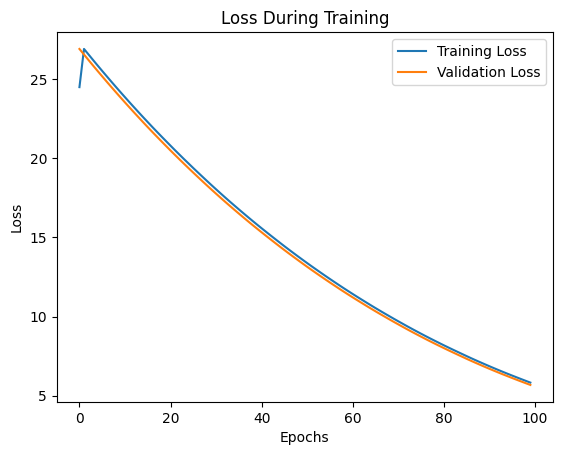

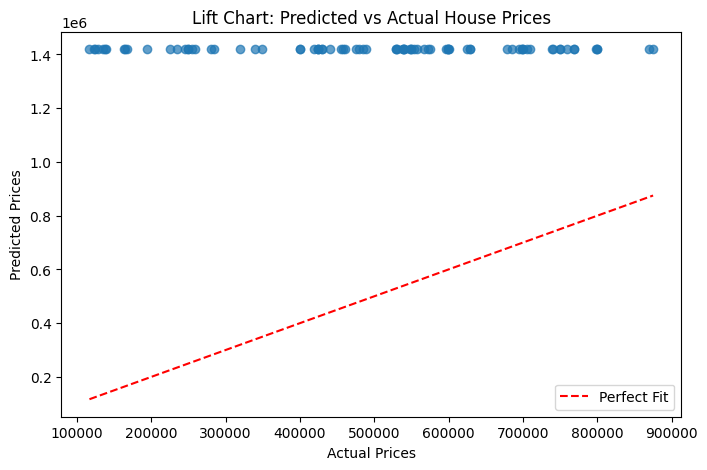

In [ ]:
# Predict on the test set
y_pred = hybrid_model.predict([img_arr_test, X_text_test])

# Decode predictions and test values back to the original range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE and R-squared score
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Hybrid Model RMSE: {rmse}")

r2 = r2_score(y_test_original, y_pred_original)
print(f"Hybrid Model R-squared Score: {r2:.2f}")

# Plot Loss Curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Lift Chart: Compare predicted vs actual values
plt.figure(figsize=(8, 5))
plt.scatter(y_test_original, y_pred_original, alpha=0.7)
plt.plot([min(y_test_original), max(y_test_original)],
         [min(y_test_original), max(y_test_original)],
         color='red', linestyle='--', label='Perfect Fit')
plt.title('Lift Chart: Predicted vs Actual House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()

# Austin Nolte 10/20/24

### Hybrid Model Design and Testing (Alan Lei)


#### Hybrid Model 1



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ image_input (InputLayer)  │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 126, 126, 16)   │            448 │ image_input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 126, 126, 16)   │             64 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 63, 63, 16)     │              0 │ batch_normalization_4… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 59, 59, 32)     │         12,832 │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_5     │ (None, 59, 59, 32)     │            128 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, 29, 29, 32)     │              0 │ batch_normalization_5… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 25, 25, 128)    │        102,528 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ text_input (InputLayer)   │ (None, 43)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_6     │ (None, 25, 25, 128)    │            512 │ conv2d_5[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 64)             │          2,816 │ text_input[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_5           │ (None, 12, 12, 128)    │              0 │ batch_normalization_6… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_7     │ (None, 64)             │            256 │ dense_2[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 18432)          │              0 │ max_pooling2d_5[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 16)             │          1,040 │ batch_normalization_7… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 18448)          │              0 │ flatten_1[0][0],       │
│                      

 Total params: 2,482,225 (9.47 MB)

 Trainable params: 2,481,745 (9.47 MB)

 Non-trainable params: 480 (1.88 KB)

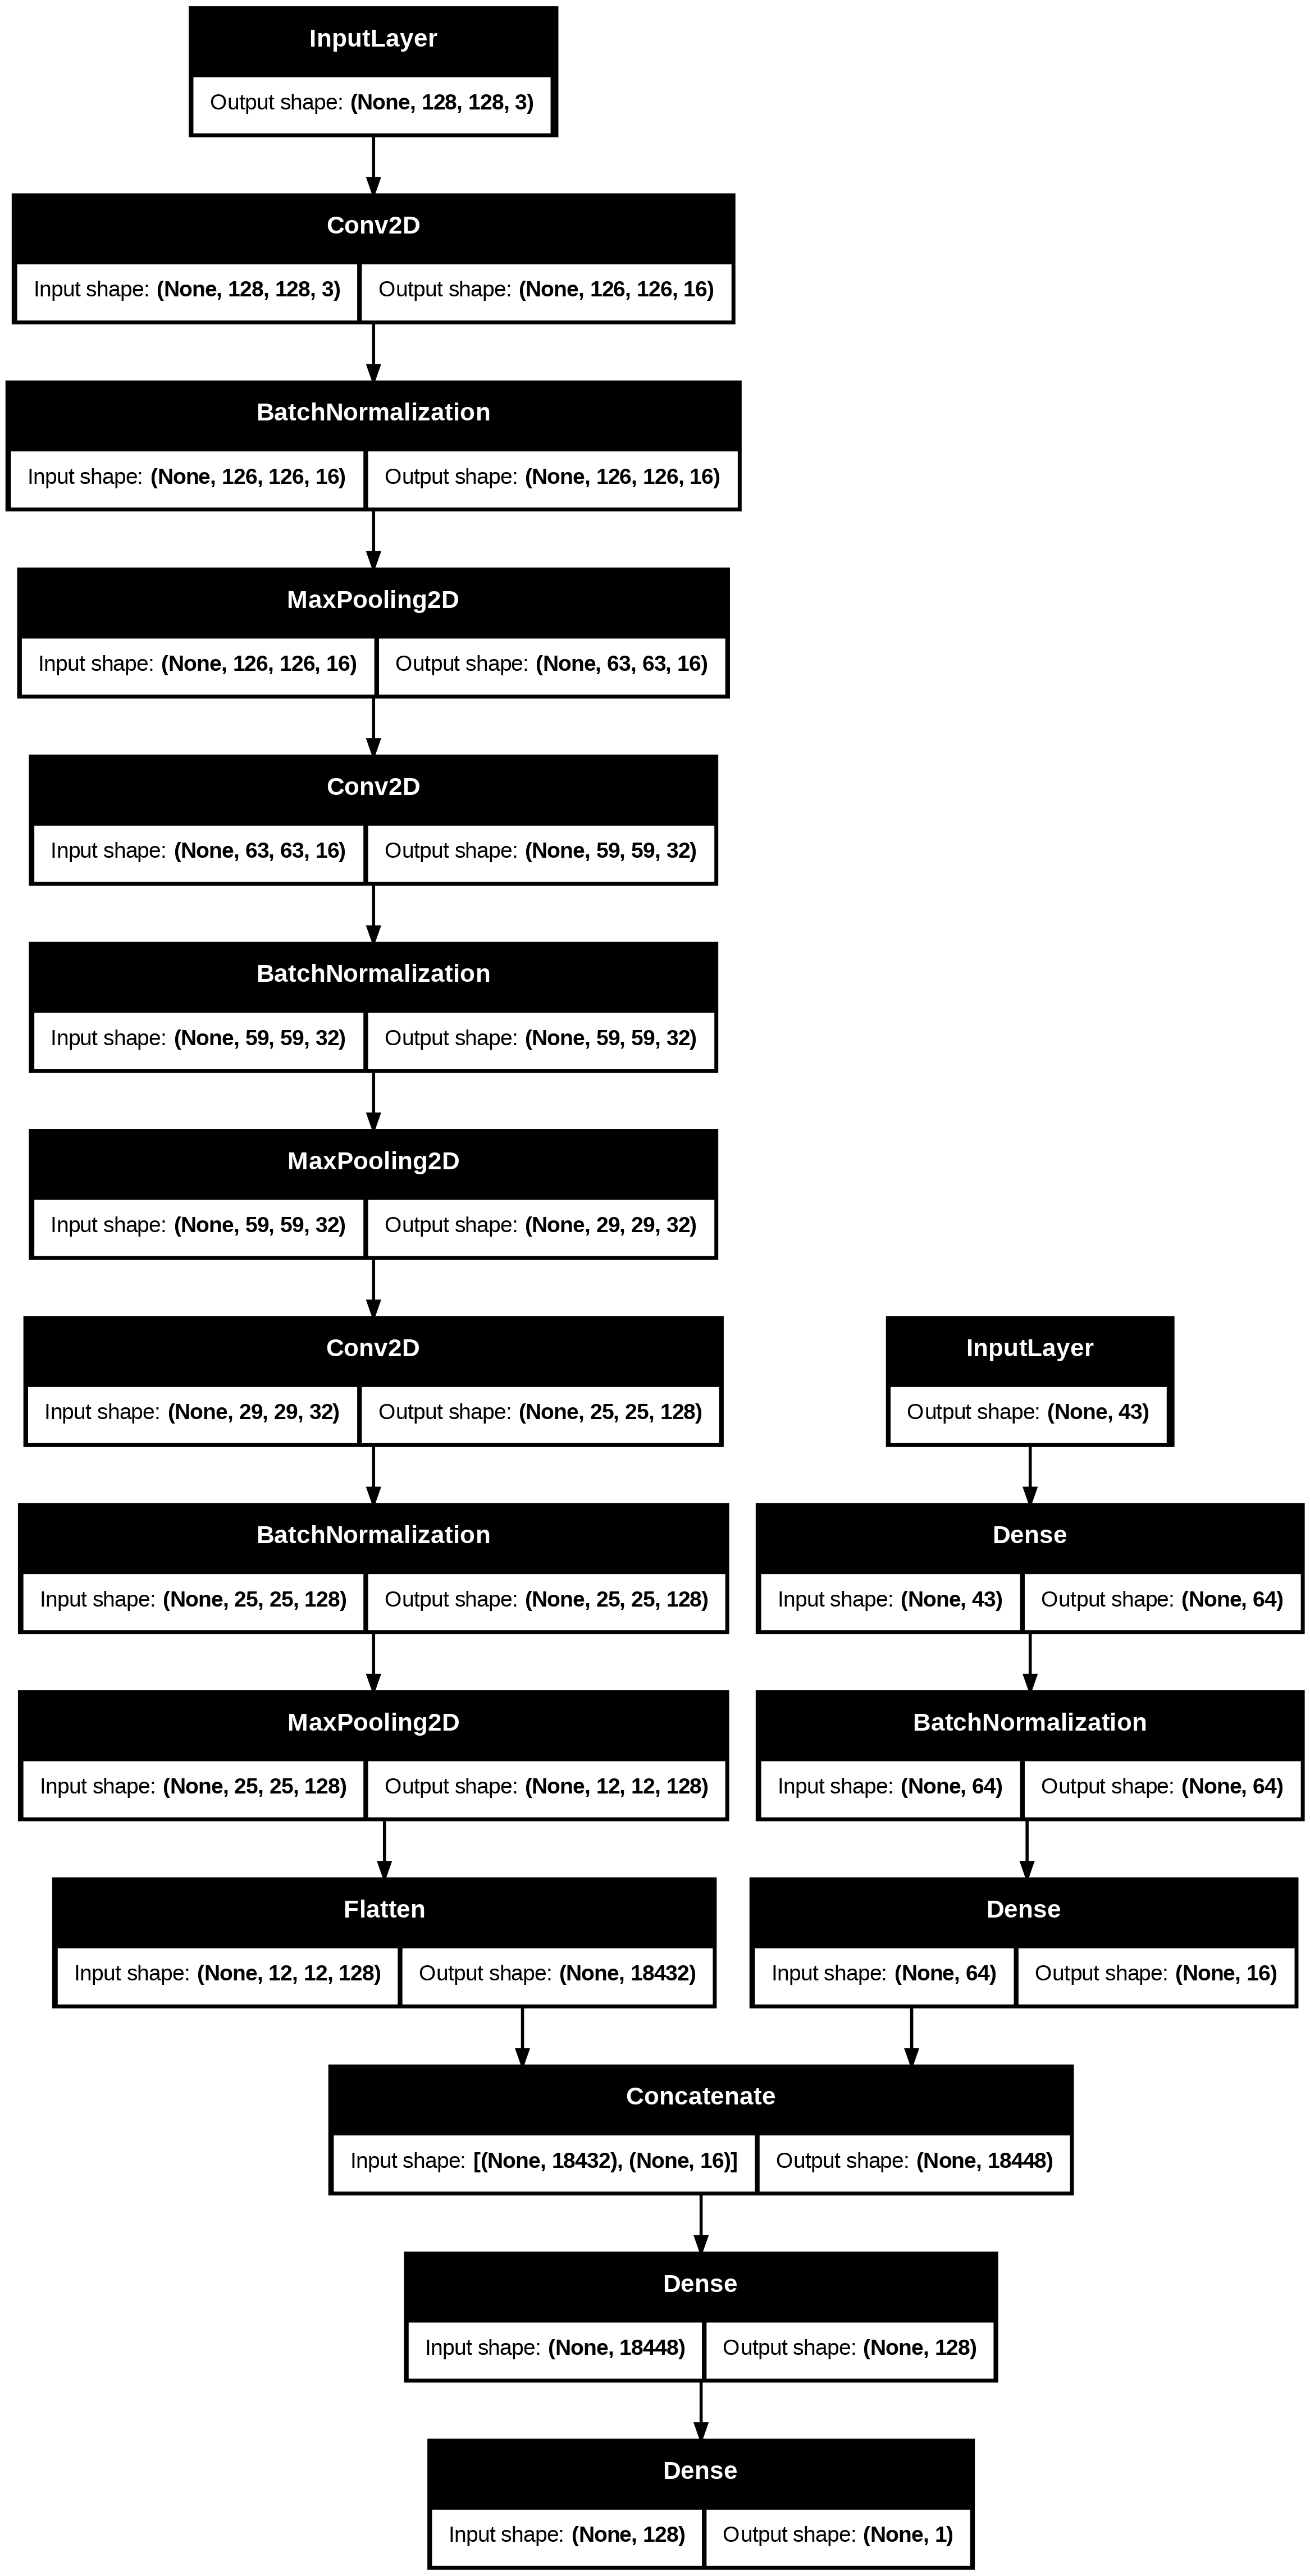

In [ ]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization,
    Dropout, Concatenate
)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow.keras.backend as K
from tensorflow.keras.utils import plot_model

# Image input (shape: (128, 128, 3))
image_input = Input(shape=(128, 128, 3), name="image_input")

# Textual input (shape: 43 features)
text_input = Input(shape=(43,), name="text_input")

# CNN branch (for image input)
cnn_branch = Conv2D(16, (3, 3), activation='relu')(image_input)
cnn_branch = BatchNormalization()(cnn_branch)
cnn_branch = MaxPooling2D(pool_size=(2, 2))(cnn_branch)

cnn_branch = Conv2D(32, (5, 5), activation='tanh')(cnn_branch)
cnn_branch = BatchNormalization()(cnn_branch)
cnn_branch = MaxPooling2D(pool_size=(2, 2))(cnn_branch)

cnn_branch = Conv2D(128, (5, 5), activation='tanh')(cnn_branch)
cnn_branch = BatchNormalization()(cnn_branch)
cnn_branch = MaxPooling2D(pool_size=(2, 2))(cnn_branch)

cnn_branch = Flatten()(cnn_branch)

# FNN branch (for textual input)
fnn_branch = Dense(64, activation='tanh')(text_input)
fnn_branch = BatchNormalization()(fnn_branch)
fnn_branch = Dense(16, activation='relu')(fnn_branch)

# Combine CNN and FNN branches
merged = Concatenate()([cnn_branch, fnn_branch])

# Final dense layers for regression
dense_layer = Dense(128, activation='relu')(merged)
output = Dense(1)(dense_layer)  # Single neuron for regression (predicting price)

# Define the hybrid model
hybrid_model = Model(inputs=[image_input, text_input], outputs=output)

# Compile the model with Adam optimizer and MSE loss
learning_rate = 0.0001
adam_optimizer = Adam(learning_rate=learning_rate)
hybrid_model.compile(optimizer=adam_optimizer, loss='mean_squared_error')

# Summary of the hybrid model
hybrid_model.summary()

# Plot graph
plot_model(hybrid_model, show_shapes=True)

# Alan Lei 10/22/24

In [ ]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=2)
checkpoint_callback = ModelCheckpoint(
    filepath='hybrid_model_Alan_test1.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2
)

history = hybrid_model.fit(
    [img_arr_train, X_text_train], y_train,  # Use image + textual data for training
    validation_data=([img_arr_test, X_text_test], y_test),  # Validation on both datasets
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping_callback, checkpoint_callback],
    verbose=2
)

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.18316, saving model to hybrid_model_Alan_test1.keras
11/11 - 21s - 2s/step - loss: 10.8846 - val_loss: 0.1832
Epoch 2/100

Epoch 2: val_loss improved from 0.18316 to 0.10487, saving model to hybrid_model_Alan_test1.keras
11/11 - 0s - 34ms/step - loss: 0.4996 - val_loss: 0.1049
Epoch 3/100

Epoch 3: val_loss did not improve from 0.10487
11/11 - 0s - 18ms/step - loss: 0.1418 - val_loss: 0.1630
Epoch 4/100

Epoch 4: val_loss did not improve from 0.10487
11/11 - 0s - 26ms/step - loss: 0.1397 - val_loss: 0.1699
Epoch 5/100

Epoch 5: val_loss did not improve from 0.10487
11/11 - 0s - 27ms/step - loss: 0.1081 - val_loss: 0.1384
Epoch 6/100

Epoch 6: val_loss did not improve from 0.10487
11/11 - 0s - 27ms/step - loss: 0.0856 - val_loss: 0.1173
Epoch 7/100

Epoch 7: val_loss did not improve from 0.10487
11/11 - 0s - 28ms/step - loss: 0.0795 - val_loss: 0.1196
Epoch 7: early stopping


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 222ms/step
Hybrid Model RMSE: 276643.53125
Hybrid Model R-squared Score: -0.79


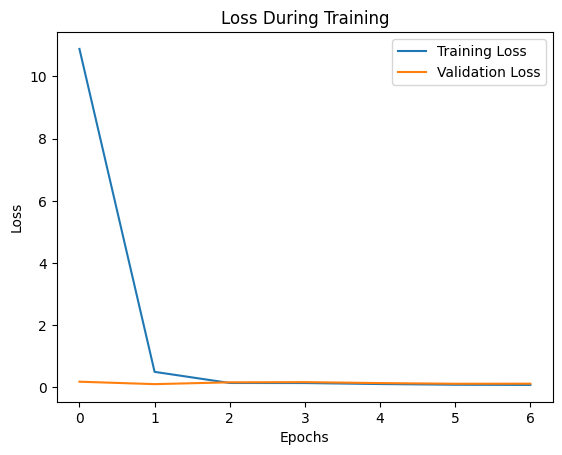

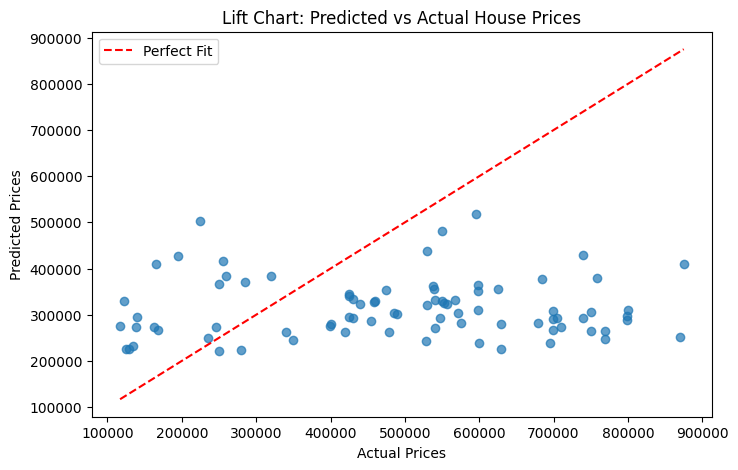

In [ ]:
# Predict on the test set
y_pred = hybrid_model.predict([img_arr_test, X_text_test])

# Decode predictions and test values back to the original range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE and R-squared score
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Hybrid Model RMSE: {rmse}")

r2 = r2_score(y_test_original, y_pred_original)
print(f"Hybrid Model R-squared Score: {r2:.2f}")

# Plot Loss Curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Lift Chart: Compare predicted vs actual values
plt.figure(figsize=(8, 5))
plt.scatter(y_test_original, y_pred_original, alpha=0.7)
plt.plot([min(y_test_original), max(y_test_original)],
         [min(y_test_original), max(y_test_original)],
         color='red', linestyle='--', label='Perfect Fit')
plt.title('Lift Chart: Predicted vs Actual House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()

#### Hybrid Model 2



Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ image_input (InputLayer)  │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 126, 126, 16)   │            448 │ image_input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_8     │ (None, 126, 126, 16)   │             64 │ conv2d_6[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_6           │ (None, 63, 63, 16)     │              0 │ batch_normalization_8… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 59, 59, 32)     │         12,832 │ max_pooling2d_6[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ text_input (InputLayer)   │ (None, 43)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_9     │ (None, 59, 59, 32)     │            128 │ conv2d_7[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 128)            │          5,632 │ text_input[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_7           │ (None, 29, 29, 32)     │              0 │ batch_normalization_9… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_12    │ (None, 128)            │            512 │ dense_6[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 27, 27, 64)     │         18,496 │ max_pooling2d_7[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 64)             │          8,256 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_10    │ (None, 27, 27, 64)     │            256 │ conv2d_8[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_13    │ (None, 64)             │            256 │ dense_7[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_8           │ (None, 13, 13, 64)     │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)      

 Total params: 535,065 (2.04 MB)

 Trainable params: 534,105 (2.04 MB)

 Non-trainable params: 960 (3.75 KB)

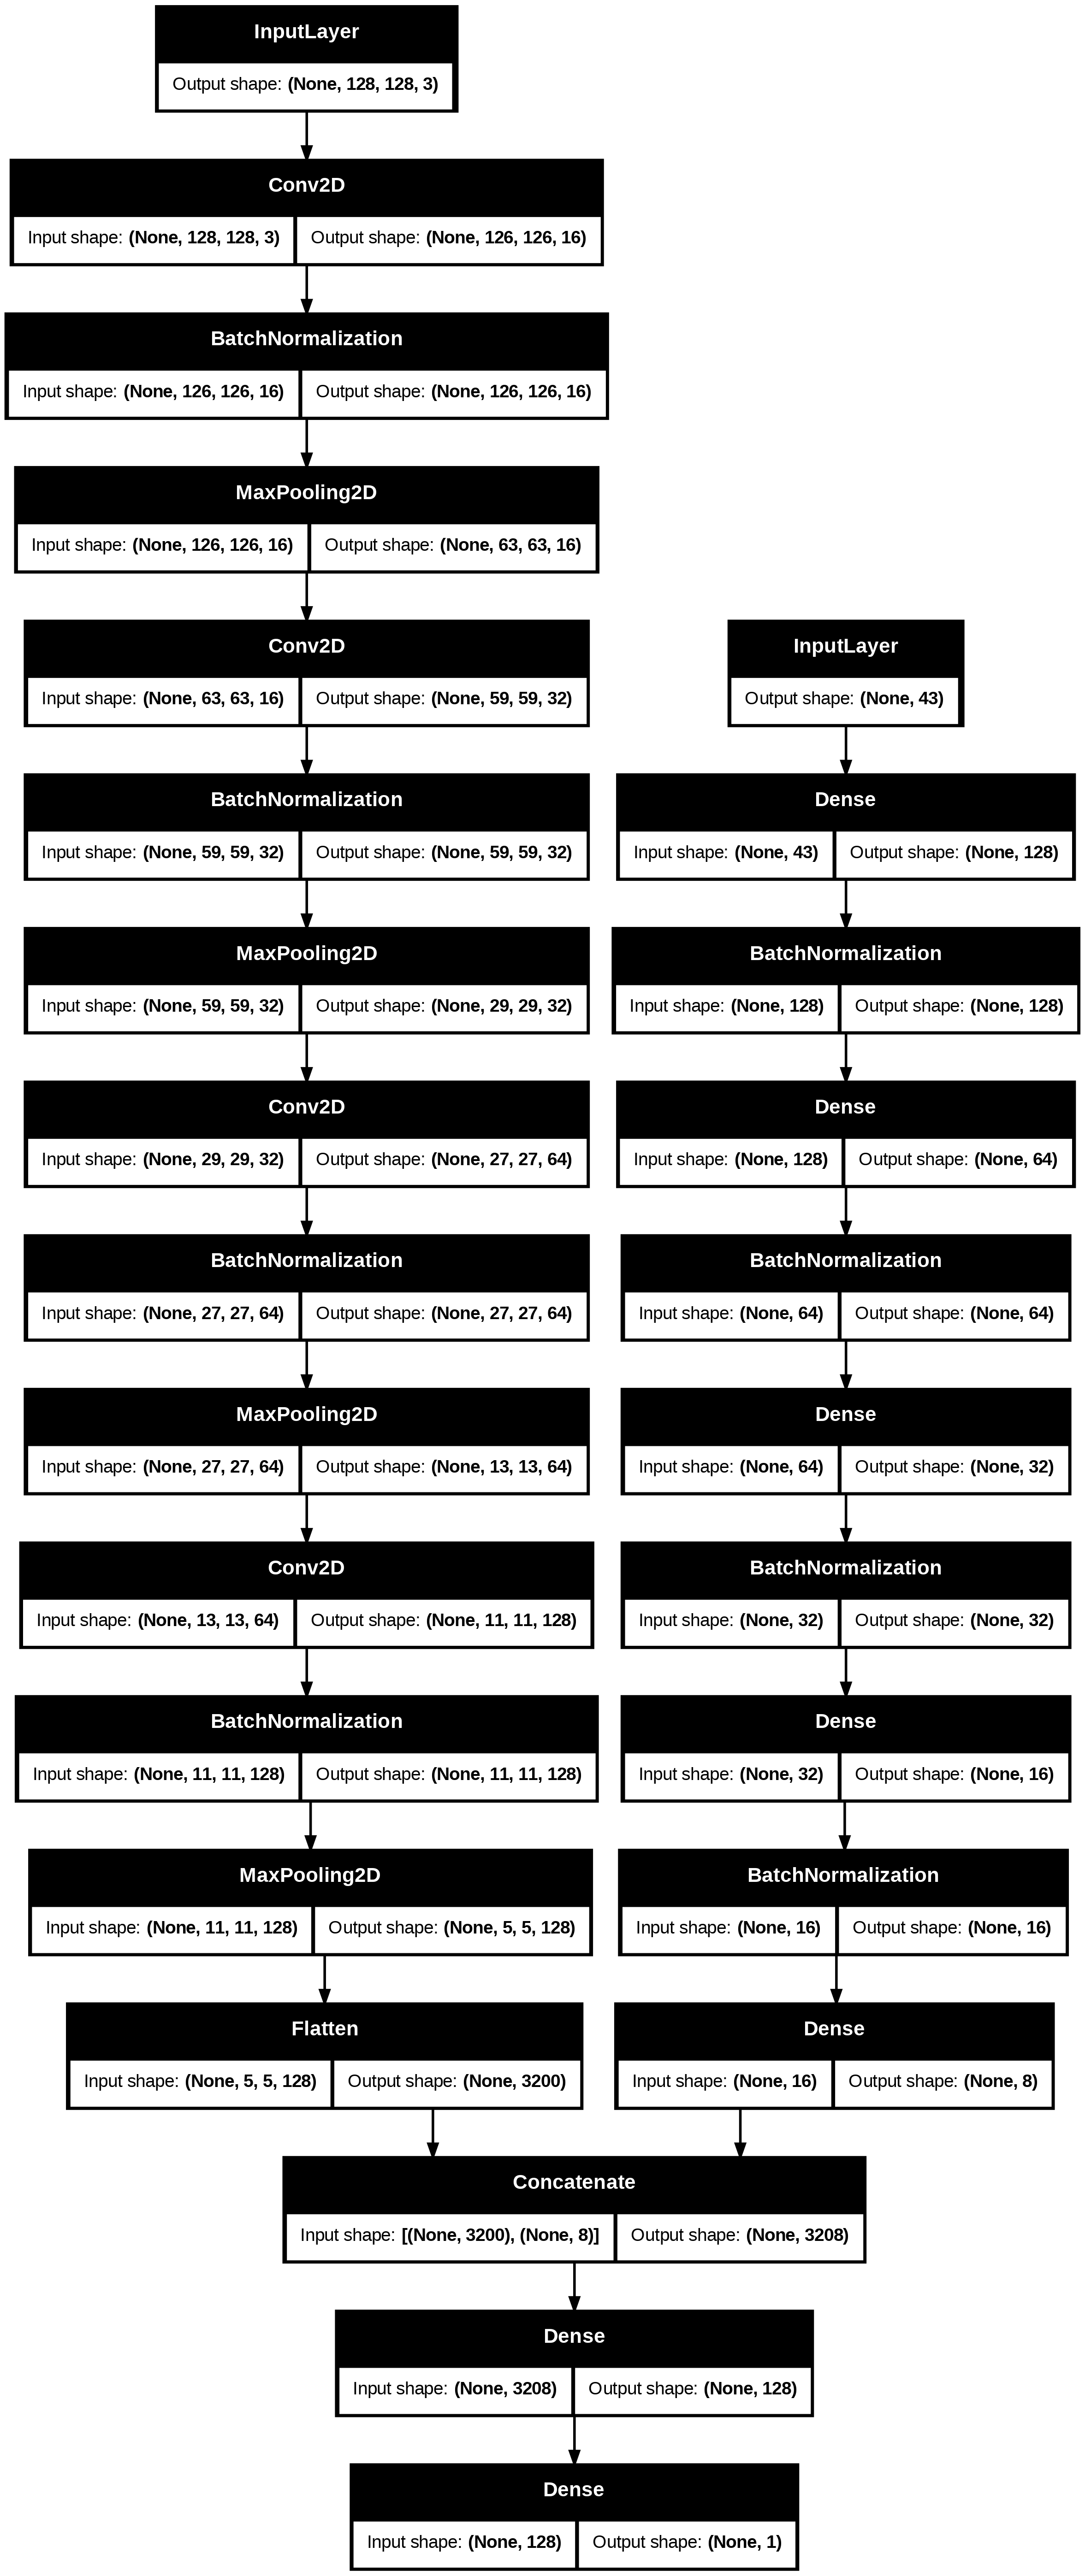

In [ ]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization,
    Dropout, Concatenate
)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow.keras.backend as K
from tensorflow.keras.utils import plot_model

# Image input (shape: (128, 128, 3))
image_input = Input(shape=(128, 128, 3), name="image_input")

# Textual input (shape: 43 features)
text_input = Input(shape=(43,), name="text_input")

# CNN branch (for image input)
cnn_branch = Conv2D(16, (3, 3), activation='relu')(image_input)
cnn_branch = BatchNormalization()(cnn_branch)
cnn_branch = MaxPooling2D(pool_size=(2, 2))(cnn_branch)

cnn_branch = Conv2D(32, (5, 5), activation='tanh')(cnn_branch)
cnn_branch = BatchNormalization()(cnn_branch)
cnn_branch = MaxPooling2D(pool_size=(2, 2))(cnn_branch)

cnn_branch = Conv2D(64, (3, 3), activation='relu')(cnn_branch)
cnn_branch = BatchNormalization()(cnn_branch)
cnn_branch = MaxPooling2D(pool_size=(2, 2))(cnn_branch)

cnn_branch = Conv2D(128, (3, 3), activation='tanh')(cnn_branch)
cnn_branch = BatchNormalization()(cnn_branch)
cnn_branch = MaxPooling2D(pool_size=(2, 2))(cnn_branch)

cnn_branch = Flatten()(cnn_branch)

# FNN branch (for textual input)
fnn_branch = Dense(128, activation='tanh')(text_input)
fnn_branch = BatchNormalization()(fnn_branch)
fnn_branch = Dense(64, activation='relu')(fnn_branch)
fnn_branch = BatchNormalization()(fnn_branch)
fnn_branch = Dense(32, activation='relu')(fnn_branch)
fnn_branch = BatchNormalization()(fnn_branch)
fnn_branch = Dense(16, activation='relu')(fnn_branch)
fnn_branch = BatchNormalization()(fnn_branch)
fnn_branch = Dense(8, activation='relu')(fnn_branch)

# Combine CNN and FNN branches
merged = Concatenate()([cnn_branch, fnn_branch])

# Final dense layers for regression
dense_layer = Dense(128, activation='relu')(merged)
output = Dense(1)(dense_layer)  # Single neuron for regression (predicting price)

# Define the hybrid model
hybrid_model = Model(inputs=[image_input, text_input], outputs=output)

# Compile the model with Adam optimizer and MSE loss
learning_rate = 0.0001
adam_optimizer = Adam(learning_rate=learning_rate)
hybrid_model.compile(optimizer=adam_optimizer, loss='mean_squared_error')

# Summary of the hybrid model
hybrid_model.summary()

# Plot graph
plot_model(hybrid_model, show_shapes=True)

# Alan Lei 10/22/24

In [ ]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=2)
checkpoint_callback = ModelCheckpoint(
    filepath='hybrid_model_Alan_test2.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2
)

history = hybrid_model.fit(
    [img_arr_train, X_text_train], y_train,  # Use image + textual data for training
    validation_data=([img_arr_test, X_text_test], y_test),  # Validation on both datasets
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping_callback, checkpoint_callback],
    verbose=2
)

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.20151, saving model to hybrid_model_Alan_test2.keras
11/11 - 16s - 1s/step - loss: 1.2483 - val_loss: 0.2015
Epoch 2/100

Epoch 2: val_loss did not improve from 0.20151
11/11 - 0s - 16ms/step - loss: 0.4313 - val_loss: 0.3359
Epoch 3/100

Epoch 3: val_loss improved from 0.20151 to 0.17215, saving model to hybrid_model_Alan_test2.keras
11/11 - 0s - 26ms/step - loss: 0.2576 - val_loss: 0.1721
Epoch 4/100

Epoch 4: val_loss did not improve from 0.17215
11/11 - 0s - 15ms/step - loss: 0.1001 - val_loss: 0.1961
Epoch 5/100

Epoch 5: val_loss did not improve from 0.17215
11/11 - 0s - 14ms/step - loss: 0.0773 - val_loss: 0.1798
Epoch 6/100

Epoch 6: val_loss did not improve from 0.17215
11/11 - 0s - 16ms/step - loss: 0.0758 - val_loss: 0.2441
Epoch 7/100

Epoch 7: val_loss did not improve from 0.17215
11/11 - 0s - 27ms/step - loss: 0.0512 - val_loss: 0.2294
Epoch 8/100

Epoch 8: val_loss did not improve from 0.17215
11/11 - 0s - 28ms/step -

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 446ms/step
Hybrid Model RMSE: 379649.90625
Hybrid Model R-squared Score: -2.36


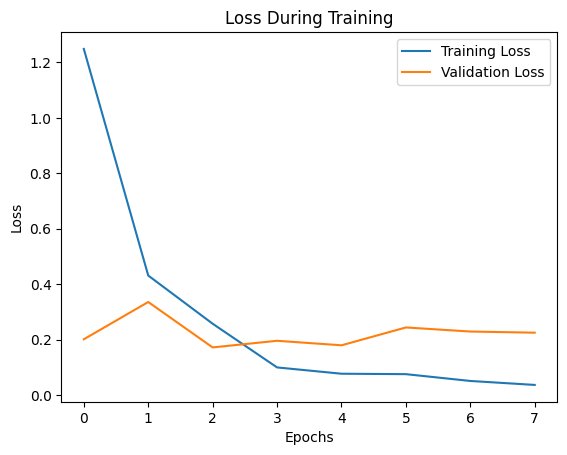

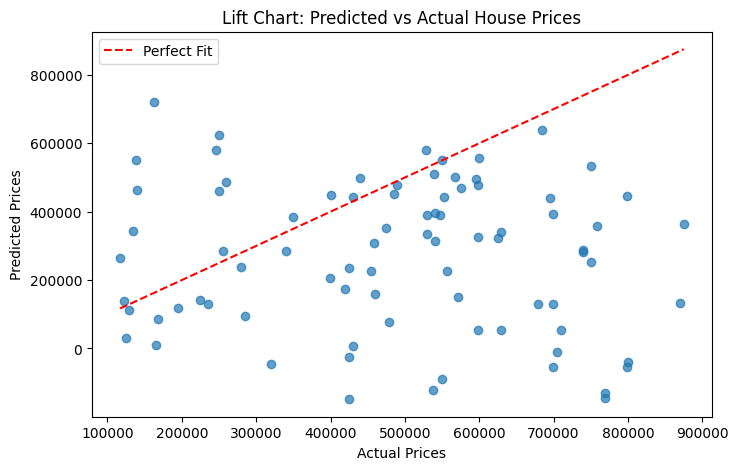

In [ ]:
# Predict on the test set
y_pred = hybrid_model.predict([img_arr_test, X_text_test])

# Decode predictions and test values back to the original range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE and R-squared score
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Hybrid Model RMSE: {rmse}")

r2 = r2_score(y_test_original, y_pred_original)
print(f"Hybrid Model R-squared Score: {r2:.2f}")

# Plot Loss Curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Lift Chart: Compare predicted vs actual values
plt.figure(figsize=(8, 5))
plt.scatter(y_test_original, y_pred_original, alpha=0.7)
plt.plot([min(y_test_original), max(y_test_original)],
         [min(y_test_original), max(y_test_original)],
         color='red', linestyle='--', label='Perfect Fit')
plt.title('Lift Chart: Predicted vs Actual House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()



### Hybrid Model Design and Testing (Nishan Majarjan)



## Hyperparameter Tuning and Final Model Selection

**Model Definition:** A hybrid model was built using Keras, integrating a Convolutional Neural Network (CNN) for image input and a Feedforward Neural Network (FNN) for textual input. The architecture included multiple layers with hyperparameters such as:

**Learning Rate:** Optimized between 1e-5 and 1e-3.

**Batch Size:** Selected from a range of 16 to 128 in increments of 16.

**CNN Filters**: Varied between 16 and 64.

**Dense Units:** Adjusted between 32 and 256.

**Dropout Rate:** Tuned between 0.0 and 0.5.

**Hyperparameter Search:** Keras Tuner’s RandomSearch was utilized to explore the defined hyperparameter space. The search aimed to minimize validation loss across multiple trials, with each model evaluated twice for reliability.

**Model Training:** The best hyperparameters were used to build and train the final model. Early stopping was implemented to prevent overfitting during training, monitored through validation loss.

**Final Evaluation on Test Set:**  After training, the best model was evaluated on a separate test set, and the Root Mean Squared Error (RMSE) was computed to assess performance. Additionally, predictions were visualized in a Lift Chart to compare predicted values against actual prices.

**Documentation and Comparison of Results:** The results from all experiments were summarized, highlighting the performance metrics and facilitating comparisons among different model configurations.

In [ ]:
!pip install keras-tuner

In [ ]:


import keras_tuner as kt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization,
    Dropout, Concatenate
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# Define a model-building function for Keras Tuner
def build_hybrid_model(hp):
    # Hyperparameter search space
    learning_rate = hp.Float('learning_rate', min_value=1e-5, max_value=1e-3, sampling='LOG')
    batch_size = hp.Int('batch_size', min_value=16, max_value=128, step=16)
    cnn_filters = hp.Int('cnn_filters', min_value=16, max_value=64, step=16)
    dense_units = hp.Int('dense_units', min_value=32, max_value=256, step=32)
    dropout_rate = hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)

    # Image input (shape: (128, 128, 3))
    image_input = Input(shape=(128, 128, 3), name="image_input")

    # Textual input (shape: 43 features)
    text_input = Input(shape=(43,), name="text_input")

    # CNN branch (for image input)
    cnn_branch = Conv2D(cnn_filters, (3, 3), activation='relu')(image_input)
    cnn_branch = BatchNormalization()(cnn_branch)
    cnn_branch = MaxPooling2D(pool_size=(2, 2))(cnn_branch)

    cnn_branch = Conv2D(cnn_filters * 2, (3, 3), activation='relu')(cnn_branch)
    cnn_branch = BatchNormalization()(cnn_branch)
    cnn_branch = MaxPooling2D(pool_size=(2, 2))(cnn_branch)
    cnn_branch = Flatten()(cnn_branch)

    # FNN branch (for textual input)
    fnn_branch = Dense(dense_units, activation='relu')(text_input)
    fnn_branch = BatchNormalization()(fnn_branch)
    fnn_branch = Dropout(dropout_rate)(fnn_branch)
    fnn_branch = Dense(dense_units // 2, activation='relu')(fnn_branch)
    fnn_branch = BatchNormalization()(fnn_branch)

    # Combine CNN and FNN branches
    merged = Concatenate()([cnn_branch, fnn_branch])

    # Final dense layers for regression
    dense_layer = Dense(dense_units, activation='relu')(merged)
    output = Dense(1)(dense_layer)  # Single neuron for regression (predicting price)

    # Define the hybrid model
    hybrid_model = Model(inputs=[image_input, text_input], outputs=output)

    # Compile the model
    adam_optimizer = Adam(learning_rate=0.00001)
    hybrid_model.compile(optimizer=adam_optimizer, loss='mean_squared_error')

    # Summary of the hybrid model
    hybrid_model.summary()

  # Plot the model architecture
    return hybrid_model


In [ ]:
from keras_tuner import RandomSearch

# Define the Keras Tuner RandomSearch
tuner = RandomSearch(
    build_hybrid_model,  # the model-building function
    objective='val_loss',  # minimize validation loss
    max_trials=3,  # number of models to try
    executions_per_trial=2,  # test each model twice for reliability
    directory='kt_hybrid_tuning',  # directory to save tuner results
    project_name='hybrid_model_tuning'
)

# Display a search space summary
tuner.search_space_summary()

# Early stopping callback
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=2)

# Run the hyperparameter search
tuner.search(
    [img_arr_train, X_text_train], y_train,  # Training data
    validation_data=([img_arr_test, X_text_test], y_test),  # Validation data
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping_callback],
    verbose=2
)

# Show a summary of the best hyperparameters
tuner.results_summary()


Reloading Tuner from kt_hybrid_tuning/hybrid_model_tuning/tuner0.json
Search space summary
Default search space size: 5
learning_rate (Float)
{'default': 1e-05, 'conditions': [], 'min_value': 1e-05, 'max_value': 0.001, 'step': None, 'sampling': 'log'}
batch_size (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 128, 'step': 16, 'sampling': 'linear'}
cnn_filters (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 64, 'step': 16, 'sampling': 'linear'}
dense_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
dropout_rate (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
Results summary
Results in kt_hybrid_tuning/hybrid_model_tuning
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 03 summary
Hyperparameters:
learning_rate: 2.8608252372199756e-05
batch_size: 96
cnn_filters: 64
dense_units: 96
dro

In [ ]:
# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the best model
best_model = tuner.hypermodel.build(best_hps)

# Train the best model with early stopping and the same data
history = best_model.fit(
    [img_arr_train, X_text_train], y_train,
    validation_data=([img_arr_test, X_text_test], y_test),
    epochs=100,
    batch_size=best_hps.get('batch_size'),
    callbacks=[early_stopping_callback],
    verbose=2
)

# Evaluate the best model on the test set
y_pred = best_model.predict([img_arr_test, X_text_test])
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Best Model RMSE: {rmse}")



Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ image_input (InputLayer)  │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_10 (Conv2D)        │ (None, 126, 126, 64)   │          1,792 │ image_input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_20    │ (None, 126, 126, 64)   │            256 │ conv2d_10[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ text_input (InputLayer)   │ (None, 43)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_10          │ (None, 63, 63, 64)     │              0 │ batch_normalization_2… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_20 (Dense)          │ (None, 96)             │          4,224 │ text_input[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_11 (Conv2D)        │ (None, 61, 61, 128)    │         73,856 │ max_pooling2d_10[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_22    │ (None, 96)             │            384 │ dense_20[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_21    │ (None, 61, 61, 128)    │            512 │ conv2d_11[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_5 (Dropout)       │ (None, 96)             │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_11          │ (None, 30, 30, 128)    │              0 │ batch_normalization_2… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_21 (Dense)          │ (None, 48)             │          4,656 │ dropout_5[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_5 (Flatten)       │ (None, 115200)         │              0 │ max_pooling2d_11[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_23    │ (None, 48)             │            192 │ dense_21[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_5             │ (None, 115248)         │              0 │ flatten_5[0][0],       │
│ (Concatenate)             │                        │                │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_22 (Dense)          │ (None, 96)             │     11,063,904 │ concatenate_5[0][0]    │
├──────────────────────

 Total params: 11,149,873 (42.53 MB)

 Trainable params: 11,149,201 (42.53 MB)

 Non-trainable params: 672 (2.62 KB)

Epoch 1/100
4/4 - 17s - 4s/step - loss: 5.7801 - val_loss: 173.5249
Epoch 2/100
4/4 - 8s - 2s/step - loss: 2.2228 - val_loss: 4.0473
Epoch 3/100
4/4 - 1s - 133ms/step - loss: 1.4018 - val_loss: 30.3101
Epoch 4/100
4/4 - 1s - 148ms/step - loss: 1.2217 - val_loss: 16.4401
Epoch 5/100
4/4 - 0s - 108ms/step - loss: 0.5096 - val_loss: 1.0475
Epoch 6/100
4/4 - 1s - 137ms/step - loss: 0.5303 - val_loss: 0.7067
Epoch 7/100
4/4 - 1s - 156ms/step - loss: 0.2169 - val_loss: 2.2477
Epoch 8/100
4/4 - 1s - 155ms/step - loss: 0.2256 - val_loss: 2.1282
Epoch 9/100
4/4 - 1s - 155ms/step - loss: 0.1382 - val_loss: 0.6970
Epoch 10/100
4/4 - 0s - 83ms/step - loss: 0.0917 - val_loss: 0.4080
Epoch 11/100
4/4 - 1s - 155ms/step - loss: 0.0878 - val_loss: 0.6062
Epoch 12/100
4/4 - 0s - 87ms/step - loss: 0.0403 - val_loss: 0.8841
Epoch 13/100
4/4 - 1s - 152ms/step - loss: 0.0521 - val_loss: 0.6503
Epoch 14/100
4/4 - 0s - 83ms/step - loss: 0.0262 - val_loss: 0.3983
Epoch 15/100
4/4 - 0s - 119ms/step - loss: 0.02

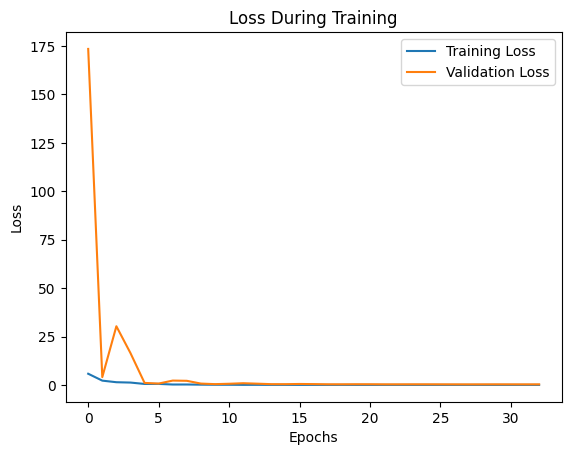

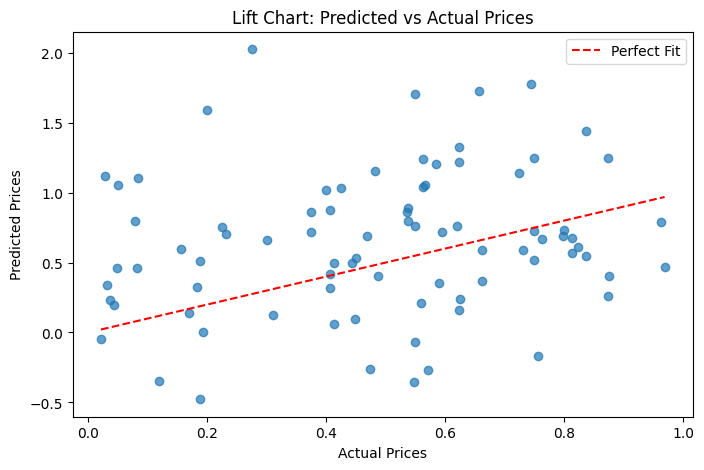

In [ ]:
# Plot Loss Curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Lift Chart (Predicted vs Actual)
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
plt.title('Lift Chart: Predicted vs Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()

##New Data Preprocessing

###Defining Image Preprocessing Functions with Histogram Equalization and ORB Feature Extraction

Based on research from **Eman H. Ahmed, Mohamed N. Moustafa** in *House Price Estimation from Visual and Textual Features*, we adapt their image processing pipeline for project. While the original research used **SURF (Speeded Up Robust Features)**, we opted for **ORB (Oriented FAST and Rotated BREIF)** due to the following reasons:

- **SURF is patented** and not accessible through Google Colab.
- **ORB is faster** and more efficient for **smaller datasets**.
- ORB also **preserves key feature information** like corners and edges, which might improve house price estimation.

These preprocessing functions apply **histogram equalization** to enhance the contrast in the image, followed by **ORB feature extraction** to capture meaningful features for each rooom category (bathroom, bedroom, kitchen, and frontal view).

In [ ]:
import cv2
import numpy as np
from google.colab import drive

# Force Mount Google Drive
drive.mount('/content/drive')

# Function to apply histogram equalization
def equalize_histogram(image):
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  equalized_img = cv2.equalizeHist(gray)
  return equalized_img

def extract_orb_features(image, n_features=100):
  orb = cv2.ORB_create(nfeatures=n_features)
  keypoints, descriptors = orb.detectAndCompute(image, None)
  # If no descriptors are found, return a zero vector
  if descriptors is None:
    return np.zeros((n_features, 32)).flatten()  # Flattened to ensure consistent shape

  # If fewer descriptors are found, pad with zeros
  if descriptors.shape[0] < n_features:
    padding = np.zeros((n_features - descriptors.shape[0], 32))
    descriptors = np.vstack([descriptors, padding])

  # If more descriptors are found, truncate to the required size
  return descriptors[:n_features].flatten()

# Function to preprocess images with both histogram equalization and ORB extraction
def process_images(image_paths):
  features = []
  for path in image_paths:
    image = cv2.imread(path)
    equalized_img = equalize_histogram(image)
    orb_features = extract_orb_features(equalized_img)
    features.append(orb_features)
  return np.array(features)  # Use dtype=object to handle variable-length arrays


Mounted at /content/drive


### Loading Textual and Image Datasets for House Price Prediction

In [ ]:
import pandas as pd
import os
import cv2
import glob

# Load textual data from HousesInfo.txt
filename_read = "/content/drive/My Drive/Project3/HousesInfo.txt"
cols = ["Bedrooms", "Bathrooms", "area", "zipcode", "price"]
df = pd.read_csv(filename_read, sep=" ", header=None, names=cols)

print(df.head())  # Verify that the textual data has loaded correctly
print(f"Loaded {df.shape[0]} houses with textual data.")

# Filter the dataset for houses priced between 100K and 900K
price_filter = (df['price'] >= 100000) & (df['price'] <= 900000)
df = df[price_filter]  # Filter textual data

# Load image paths from different categories
def load_image_paths(img_type):
  images = []
  for number in range(1, 536):
    path = f"/content/drive/My Drive/Project3/{number}_{img_type}.jpg"
    if os.path.isfile(path):
      images.append(path)
  return images

# Load paths for each category of images
bathroom_images = load_image_paths("bathroom")
bedroom_images = load_image_paths("bedroom")
frontal_images = load_image_paths("frontal")
kitchen_images = load_image_paths("kitchen")

# Create a DataFrame with paths for each type of image
img_df = pd.DataFrame({
    'bathroom_img': bathroom_images,
    'bedroom_img': bedroom_images,
    'frontal_img': frontal_images,
    'kitchen_img': kitchen_images
})

img_df = img_df[price_filter.values]  # Apply the same filter to align with the textual data

# Function to apply histogram equalization to each RGB channel
def equalize_histogram_rgb(image):
    # Split the image into its RGB channels
    channels = cv2.split(image)
    # Apply histogram equalization to each channel
    eq_channels = [cv2.equalizeHist(ch) for ch in channels]
    # Merge the equalized channels back into an RGB image
    equalized_img = cv2.merge(eq_channels)
    return equalized_img

# Function to load, convert to RGB, equalize, and resize images for CNN
def load_and_preprocess_images(image_paths, target_size=(128, 128)):
    images = []
    for path in image_paths:
        img = cv2.imread(path)
        if img is not None:
            rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
            equalized_img = equalize_histogram_rgb(rgb_img)  # Apply histogram equalization
            resized_img = cv2.resize(equalized_img, target_size)  # Resize
            images.append(resized_img)
    return np.array(images)

# Load and preprocess images for each category
bathroom_images_raw = load_and_preprocess_images(img_df['bathroom_img'])
bedroom_images_raw = load_and_preprocess_images(img_df['bedroom_img'])
frontal_images_raw = load_and_preprocess_images(img_df['frontal_img'])
kitchen_images_raw = load_and_preprocess_images(img_df['kitchen_img'])


# Combine images for each house (axis=1 groups the four categories)
raw_images = np.stack([bathroom_images_raw, bedroom_images_raw, frontal_images_raw, kitchen_images_raw], axis=1)

# Save the preprocessed images for later use
np.save('/content/drive/My Drive/Project3/processed_raw_images.npy', raw_images)

print(f"Saved Raw Images Shape: {raw_images.shape}")  # Should be (406, 4, 128, 128, 3)

print(img_df.head())  # Verify that image paths are loaded correctly


   Bedrooms  Bathrooms  area  zipcode   price
0         4        4.0  4053    85255  869500
1         4        3.0  3343    36372  865200
2         3        4.0  3923    85266  889000
3         5        5.0  4022    85262  910000
4         3        4.0  4116    85266  971226
Loaded 535 houses with textual data.
Saved Raw Images Shape: (406, 4, 128, 128, 3)
                                        bathroom_img  \
0    /content/drive/My Drive/Project3/1_bathroom.jpg   
1    /content/drive/My Drive/Project3/2_bathroom.jpg   
2    /content/drive/My Drive/Project3/3_bathroom.jpg   
6    /content/drive/My Drive/Project3/7_bathroom.jpg   
10  /content/drive/My Drive/Project3/11_bathroom.jpg   

                                        bedroom_img  \
0    /content/drive/My Drive/Project3/1_bedroom.jpg   
1    /content/drive/My Drive/Project3/2_bedroom.jpg   
2    /content/drive/My Drive/Project3/3_bedroom.jpg   
6    /content/drive/My Drive/Project3/7_bedroom.jpg   
10  /content/drive/My Drive/P

In [ ]:
# Filter the dataset to keep only houses with prices between 100K and 900K

# Define the price filter condition
price_filter = (df['price'] >= 100000) & (df['price'] <= 900000)

# Apply the filter to the textual data (df)
df = df[price_filter]

# Apply the same filter to the image data
img_df = img_df[price_filter.values]  # Ensures the filtered rows match with the textual data

# Display the new shapes to confirm the alignment
print(f"Textual data shape after filtering: {df.shape}")
print(f"Image data shape after filtering: {img_df.shape}")

# Verify the range of prices after filtering
print(f"Minimum house price: {df['price'].min()}")
print(f"Maximum house price: {df['price'].max()}")

Textual data shape after filtering: (406, 5)
Image data shape after filtering: (406, 4)
Minimum house price: 100000
Maximum house price: 899900


###Applying Preprocessing to Images

In [ ]:
# Extract features for each category of images
bathroom_features = process_images(img_df['bathroom_img'])
bedroom_features = process_images(img_df['bedroom_img'])
frontal_features = process_images(img_df['frontal_img'])
kitchen_features = process_images(img_df['kitchen_img'])

# Concatenate features into one array for each house
image_features = np.hstack([
    bathroom_features, bedroom_features, frontal_features, kitchen_features
])
print(f"Image features shape: {image_features.shape}")

Image features shape: (406, 12800)


###Visualizing Original, Equalized, and ORB-Processed Images for Feature Verification

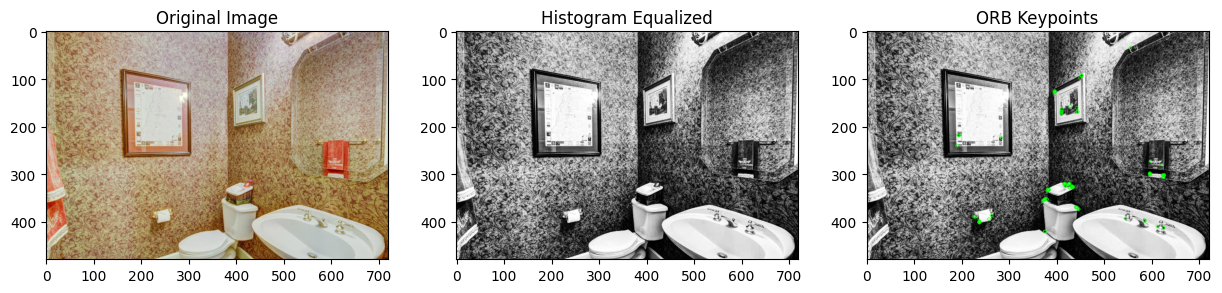

In [ ]:
import matplotlib.pyplot as plt

# Function to visualize the original, equalized, and ORB-featured images
def display_image_samples(img_path):
    # Load original image
    original_img = cv2.imread(img_path)

    # Apply histogram equalization
    equalized_img = equalize_histogram(original_img)

    # Extract ORB features
    orb = cv2.ORB_create(nfeatures=100)
    keypoints, _ = orb.detectAndCompute(equalized_img, None)
    orb_img = cv2.drawKeypoints(equalized_img, keypoints, None, color=(0, 255, 0))

    # Display images side by side
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.imshow(equalized_img, cmap='gray')
    plt.title('Histogram Equalized')

    plt.subplot(1, 3, 3)
    plt.imshow(orb_img)
    plt.title('ORB Keypoints')

    plt.show()

# Example usage: Display sample from the first bathroom image
sample_img_path = img_df['bathroom_img'].iloc[0]
display_image_samples(sample_img_path)


###Normalizing and Encoding Textual Data

In [ ]:
# Function to encode a numeric column to a range between normalized_low and normalized_high
def encode_numeric_range(df, name, normalized_low=-1, normalized_high=1, data_low=None, data_high=None):
  if data_low is None:
    data_low = min(df[name])
    data_high = max(df[name])

  # Normalize the column using Min-Max normalization
  df[name] = ((df[name] - data_low) / (data_high - data_low)) \
             * (normalized_high - normalized_low) + normalized_low

  return data_low, data_high  # Return original min and max for decoding later

# Function to decode a numeric column back to its original range
def decode_numeric_range(preds, original_low, original_high, normalized_low=-1, normalized_high=1):
  # Inverse transform using the original min and max
  return ((preds - normalized_low) / (normalized_high - normalized_low)) \
         * (original_high - original_low) + original_low

# Apply normalization to numerical columns
for col in ["Bedrooms", "Bathrooms", "area"]:
  encode_numeric_range(df, col, normalized_low=0, normalized_high=1)

###One-Hot Encoding Zip Codes

In [ ]:
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

# Apply one-hot encoding to the 'zipcode' column
encode_text_dummy(df, "zipcode")

###Splitting Data into Training and Testing Sets

In [ ]:
from sklearn.model_selection import train_test_split
import json

# Define features and target
X_text = df.drop(columns=['price'])
y = df['price']

# Use train_test_split ONCE to split both textual and image data
X_text_train, X_text_test, y_train, y_test, image_features_train, image_features_test = train_test_split(
    X_text, y, image_features, test_size=0.2, random_state=42
)

# Verify split consistency
print(f"Textual data training shape: {X_text_train.shape}")
print(f"Image data training shape: {image_features_train.shape}")

# Save the price_low and price_high values to a JSON file
def save_price_range(price_low, price_high, filename='price_range.json'):
    data = {'price_low': price_low, 'price_high': price_high}
    with open(filename, 'w') as f:
        json.dump(data, f)
    print(f"Saved price range to {filename}")

# Ensure target encoding is applied consistently
price_low, price_high = encode_numeric_range(df, 'price', normalized_low=0, normalized_high=1)
save_price_range(price_low, price_high)

# Convert DataFrame to numpy arrays for TensorFlow
def to_xy(df, target):
    result = [x for x in df.columns if x != target]
    return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

# Apply the same split indices for consistent encoding
X_text_train, y_train = to_xy(df[df.index.isin(X_text_train.index)], 'price')
X_text_test, y_test = to_xy(df[df.index.isin(X_text_test.index)], 'price')

# Summary of Data Shapes
print("Final Data Shapes:")
print(f"Textual data training shape: {X_text_train.shape}")
print(f"Textual data testing shape: {X_text_test.shape}")
print(f"Image data training shape: {image_features_train.shape}")
print(f"Image data testing shape: {image_features_test.shape}")
print(f"Target training shape: {y_train.shape}")
print(f"Target testing shape: {y_test.shape}")


Textual data training shape: (324, 43)
Image data training shape: (324, 12800)
Saved price range to price_range.json
Final Data Shapes:
Textual data training shape: (324, 43)
Textual data testing shape: (82, 43)
Image data training shape: (324, 12800)
Image data testing shape: (82, 12800)
Target training shape: (324,)
Target testing shape: (82,)


### Saving Processed Data for Future Use

In [ ]:
# Save processed data for faster experimentation
np.save('/content/drive/My Drive/Project3/processed_image_features_orb.npy', image_features)
df.to_csv('/content/drive/My Drive/Project3/processed_text_data_orb.csv', index=False)

###Loading Saved Data for Model Training

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
import json

# Force Mount Google Drive
drive.mount('/content/drive')

# Load previously processed data
img_arr = np.load('/content/drive/My Drive/Project3/processed_image_features_orb.npy')
df = pd.read_csv('/content/drive/My Drive/Project3/processed_text_data_orb.csv')

# Load the preprocessed images for CNN
raw_images = np.load('/content/drive/My Drive/Project3/processed_raw_images.npy')

# Load the price_low and price_high values from a JSON file
def load_price_range(filename='price_range.json'):
    with open(filename, 'r') as f:
        data = json.load(f)
    print(f"Loaded price range from {filename}: {data}")
    return data['price_low'], data['price_high']

price_low, price_high = load_price_range()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loaded price range from price_range.json: {'price_low': 100000, 'price_high': 899900}


In [ ]:
# Function to encode a numeric column to a range between normalized_low and normalized_high
def encode_numeric_range(df, name, normalized_low=0, normalized_high=1, data_low=None, data_high=None):
  if data_low is None:
    data_low = min(df[name])
    data_high = max(df[name])

  # Normalize the column using Min-Max normalization
  df[name] = ((df[name] - data_low) / (data_high - data_low)) * (normalized_high - normalized_low) + normalized_low

  return data_low, data_high  # Return original min and max for decoding later

# Function to decode a numeric column back to its original range
def decode_numeric_range(preds, original_low, original_high, normalized_low=0, normalized_high=1):
  # Inverse transform using the original min and max
  return ((preds - normalized_low) / (normalized_high - normalized_low)) * (original_high - original_low) + original_low

from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from collections.abc import Sequence  # This is used in the professor's code

# Convert the entire dataframe (except non-numeric columns) to float32
df = df.astype({col: np.float32 for col in df.select_dtypes(include=[np.number]).columns})

# Convert a Pandas dataframe to the x, y inputs that TensorFlow needs
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column.
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

# Define the features (textual data) and target (price)
X_text = df.drop(columns=['price'])  # Drop the target column from the features
y = df['price']  # Target variable

# Split the textual data and image data
X_text_train, X_text_test, X_img_train, X_img_test, y_train, y_test = train_test_split(X_text, raw_images, y, test_size=0.2, random_state=42)
img_arr_train, img_arr_test = train_test_split(img_arr, test_size=0.2, random_state=42)

# Encode target variable (price) to [0, 1] range
price_low, price_high = encode_numeric_range(df, 'price', normalized_low=0, normalized_high=1)

# Convert Pandas dataframe to X, y for TensorFlow (for textual data)
X_text_train, y_train = to_xy(df[df.index.isin(X_text_train.index)], 'price')
X_text_test, y_test = to_xy(df[df.index.isin(X_text_test.index)], 'price')

print("Textual data training set shape:", X_text_train.shape)
print("Textual data testing set shape:", X_text_test.shape)
print("Image data training set shape:", img_arr_train.shape)
print("Image data testing set shape:", img_arr_test.shape)
print(f"Image training set shape: {X_img_train.shape}")
print(f"Image testing set shape: {X_img_test.shape}")
print("Target training set shape:", y_train.shape)
print("Target testing set shape:", y_test.shape)

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

print(f"Combined Raw Images Shape: {raw_images.shape}")  # (406, 4, 128, 128, 3)


Textual data training set shape: (324, 43)
Textual data testing set shape: (82, 43)
Image data training set shape: (324, 12800)
Image data testing set shape: (82, 12800)
Image training set shape: (324, 4, 128, 128, 3)
Image testing set shape: (82, 4, 128, 128, 3)
Target training set shape: (324,)
Target testing set shape: (82,)
Combined Raw Images Shape: (406, 4, 128, 128, 3)


## Building and Training the FNN Models

Each teammate will create and train their own version of a Fully-Connected Neural Network (FNN) for predicting house prices. We'll experiment with different configurations by varying the number of layers, activation functions, optimizers, and other hyperparameters. The results from each model will be tabulated and compared to identify the best-performing setup.

### Steps:

1. **Design FNN Architectures**:
   - Vary the number of layers (e.g., 2, 3, 4 layers) and neurons per layer.
   - Experiment with different activation functions (e.g., ReLU, tanh, sigmoid).

2. **Train Each Model**:
   - Use different optimizers like Adam or SGD.
   - Apply early stopping to prevent overfitting.
   - Implement model checkpointing to save the best-performing model during training.

3. **Evaluate the Models**:
   - Compare metrics like RMSE and Lift chart.
   - Tabulate results to analyze the impact of different configurations.
   - Use the saved model checkpoints to assess the best results for each configuration.


### FNN Model Design and Testing (Tyler Burguillos)



#### Model 1: Baseline Fully-Connected Neural Network (FNN)

This is our first model, a simple Fully-Connected Neural Network (FNN) with one hidden layer consisting of 25 neurons and a ReLU activation function. We also implement **early stopping** to prevent overfitting and **model checkpointing** to save the best-performing model during training.

##### Key Features:
- **Hidden Layer**: 25 neurons with ReLU activation.
- **Output Layer**: Single neuron for regression (predicting house prices).
- **Optimizer**: Adam optimizer.
- **Loss Function**: Mean Squared Error (MSE).
- **Early Stopping**: Stops training if validation loss does not improve for 3 epochs.
- **Model Checkpointing**: Saves the model with the lowest validation loss.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Clear previous Keras session
K.clear_session()

# Define the FNN model
model = Sequential()
model.add(Input(shape=(X_text_train.shape[1],)))
model.add(Dense(25, activation='relu')) # Hidden layer
model.add(Dense(1)) # Output layer for regression (predicting house prices)

# Compile the model with mean_squared_error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Tyler Burguillos 10/11/24

**Implementing Early Stopping and Model Checkpointing**

To ensure we prevent overfitting and save the best-performing model, we use early stopping and model checkpointing:

- **Early Stopping**: Monitors the validation loss and stops training after 3 epochs with no improvement.
- **Model Checkpoint**: Saves the best version of the model during training based on the validation loss.

In [ ]:
# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=2)

# Model checkpoint to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='fnn_model_tyler_1.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=2)

# Tyler Burguillos 10/11/24

**Training the FNN Model with Early Stopping and Checkpointing**


In [ ]:
history = model.fit(
    X_text_train, y_train,
    validation_data=(X_text_test, y_test), # Use validation data to monitor the training
    epochs=100,       # Maximum number of epochs
    batch_size=32,    # Batch size
    verbose=2,        # Verbosity mode (0=silent, 1=progress bar, 2=one line per epoch)
    callbacks=[early_stopping_callback, checkpoint_callback] # Include both callbacks
)

# Tyler Burguillos 10/11/24

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.39115, saving model to fnn_model_tyler_1.keras
11/11 - 3s - 277ms/step - loss: 0.4705 - val_loss: 0.3911
Epoch 2/100

Epoch 2: val_loss improved from 0.39115 to 0.28475, saving model to fnn_model_tyler_1.keras
11/11 - 0s - 20ms/step - loss: 0.3419 - val_loss: 0.2848
Epoch 3/100

Epoch 3: val_loss improved from 0.28475 to 0.20911, saving model to fnn_model_tyler_1.keras
11/11 - 0s - 24ms/step - loss: 0.2479 - val_loss: 0.2091
Epoch 4/100

Epoch 4: val_loss improved from 0.20911 to 0.15667, saving model to fnn_model_tyler_1.keras
11/11 - 0s - 18ms/step - loss: 0.1813 - val_loss: 0.1567
Epoch 5/100

Epoch 5: val_loss improved from 0.15667 to 0.11982, saving model to fnn_model_tyler_1.keras
11/11 - 0s - 18ms/step - loss: 0.1344 - val_loss: 0.1198
Epoch 6/100

Epoch 6: val_loss improved from 0.11982 to 0.09410, saving model to fnn_model_tyler_1.keras
11/11 - 0s - 19ms/step - loss: 0.1011 - val_loss: 0.0941
Epoch 7/100

Epoch 7: val_loss 

**Evaluating Model with RMSE, R², and Loss Chart**

In [ ]:
# Calculate RMSE on the test set
y_pred = model.predict(X_text_test)# Quick check to ensure the values are normalized
price_low=1000000
price_high=899990
# Decode the predictions back to the original price range
y_pred_original = decode_numeric_range(y_pred, price_low, price_high)

# Decode the actual test values for comparison
y_test_original = decode_numeric_range(y_test, price_low, price_high)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"Test RMSE: {rmse}")

# Tyler Burguillos 10/11/24

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Test RMSE: 16526.98487214277


In [ ]:
# Calculate R-squared score
r2 = r2_score(y_test_original, y_pred_original)
print(f'R-squared Score: {r2:.2f}')

# Tyler Burguillos 10/11/24

R-squared Score: 0.59


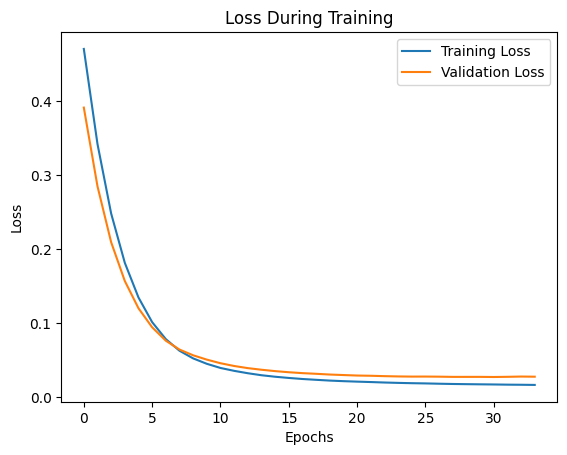

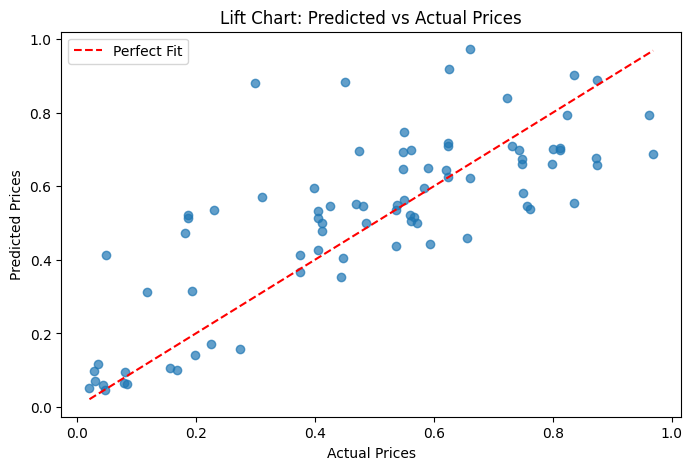

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss for training and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Lift Chart (Predicted vs Actual)
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
plt.title('Lift Chart: Predicted vs Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()
# Tyler Burguillos 10/11/24